In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [28]:
HOME_FOLDER = '/home/deeplearning/Abhijit/nas_drive/Abhijit/WholeBody/CT_ce/Data/Visceral/'
file_name = '10000109_1_CTce_ThAb.mat'

# load Data
data = sio.loadmat(HOME_FOLDER + file_name)

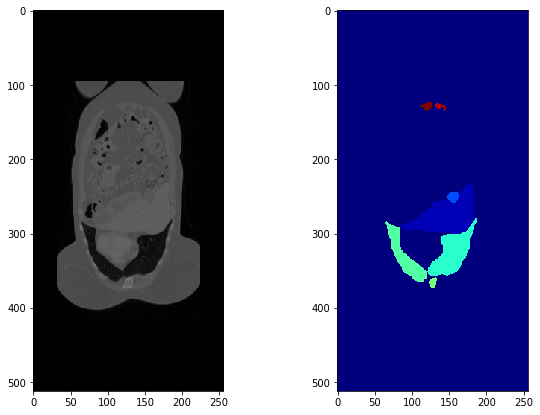

In [46]:
dat_vol = data['DatVol']
lab_vol = data['LabVol']

dat_vol = dat_vol.transpose((1,2,0))
lab_vol = lab_vol.transpose((1,2,0))

dat_vol = dat_vol.transpose((2,0,1))
lab_vol = lab_vol.transpose((2,0,1))

dat_vol = dat_vol.transpose((1,2,0))
lab_vol = lab_vol.transpose((1,2,0))

slice = 100
fig = plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.imshow(np.squeeze(dat_vol[slice,:,:]), cmap='gray', vmin=0, vmax=1)
plt.subplot(1,2,2) 
plt.imshow(np.squeeze(lab_vol[slice,:,:]), cmap='jet')
plt.show()

In [63]:
import h5py
import os
from utils.data_utils import get_imdb_dataset

data_params = dict(data_dir = "datasets/brain/malc_coronal",
train_data_file = "Data_train.h5",
train_label_file = "Label_train.h5",
train_class_weights_file = "Class_Weight_train.h5",
train_weights_file = "Weight_train.h5",
test_data_file = "Data_test.h5",
test_label_file = "Label_test.h5",
test_class_weights_file = "Class_Weight_test.h5",
test_weights_file = "Weight_test.h5")

train_data, test_data = get_imdb_dataset(data_params)

In [65]:
a = np.random.rand(10)

In [66]:
a

array([0.5370944 , 0.17741359, 0.26409858, 0.62356764, 0.1236315 ,
       0.56892356, 0.17537311, 0.58988331, 0.16161873, 0.61969324])

In [67]:
a[0:3]

array([0.5370944 , 0.17741359, 0.26409858])

In [48]:
len(train_data)

1819

(1973, 1, 256, 256)


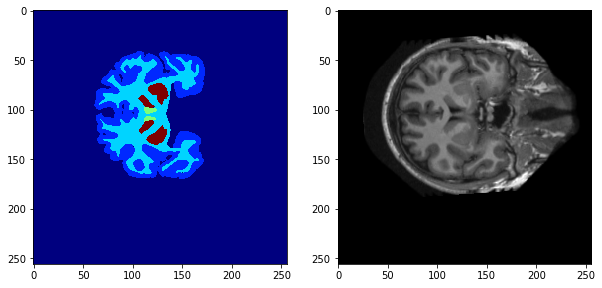

In [64]:
# dat_vol = data['DatVol']
# lab_vol = data['LabVol']
# dat_vol = dat_vol.transpose((1,2,0))
# lab_vol = lab_vol.transpose((1,2,0))
#dat_vol = dat_vol.reshape(256,256,512)

print(train_data.X.shape)
slice = 50
id = 5

sample = train_data.X[slice]
label = train_data.y[slice]

fig = plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.imshow(np.squeeze(label), cmap='jet')
plt.subplot(1,2,2) 
lab = train_data.y[slice,:,:]
plt.imshow(np.squeeze(sample), cmap='gray', vmin=0, vmax=1)
plt.show()

In [78]:
np.unique(train_data.y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [ ]:
x = np.ra

In [145]:
lab_list = [4,5,6,7]


index_list = {i: (train_data.y == i) for i in lab_list}



In [167]:
labels = train_data.y
i = 6

num_slices, H, W = labels.shape
thresh = 0.01
total_slices = labels == i
pixel_sum = np.sum(total_slices, axis=(1, 2)).squeeze()
pixel_sum = pixel_sum / (H * W)
print(pixel_sum[31])
threshold_list = [idx for idx, slice in enumerate(pixel_sum) if slice > thresh]
threshold_list

0.00998687744140625


[30, 515, 516, 517]

In [146]:
index_list[4].shape

(684, 512, 256)

In [178]:
from utils.data_utils import get_imdb_dataset

data_params = dict({'data_dir': "datasets/silver_corpus",
'train_data_file' : "Data_train.h5",
'train_label_file' : "Label_train.h5",
'train_class_weights_file' : "Class_Weight_train.h5",
'train_weights_file' : "Weight_train.h5",
'test_data_file' : "Data_test.h5",
'test_label_file' : "Label_test.h5",
'test_class_weights_file' : "Class_Weight_test.h5",
'test_weights_file' : "Weight_test.h5",
'labels' : ["Background", "Left WM", "Left Cortex", "Left Lateral ventricle", "Left Inf LatVentricle", "Left Cerebellum WM", "Left Cerebellum Cortex", "Left Thalamus", "Left Caudate", "Left Putamen", "Left Pallidum", "3rd Ventricle", "4th Ventricle", "Brain Stem", "Left Hippocampus", "Left Amygdala", "CSF (Cranial)", "Left Accumbens", "Left Ventral DC", "Right WM", "Right Cortex", "Right Lateral Ventricle", "Right Inf LatVentricle", "Right Cerebellum WM", "Right Cerebellum Cortex", "Right Thalamus", "Right Caudate", "Right Putamen", "Right Pallidum", "Right Hippocampus", "Right Amygdala", "Right Accumbens", "Right Ventral DC"]
                   })

def load_data(data_params):
    print("Loading dataset")
    train_data, test_data = get_imdb_dataset(data_params)
    print("Train size: %i" % len(train_data))
    print("Test size: %i" % len(test_data))
    return train_data, test_data

train_data, test_data = load_data(data_params)

Loading dataset
Train size: 2576
Test size: 304


(684, 1, 512, 256)


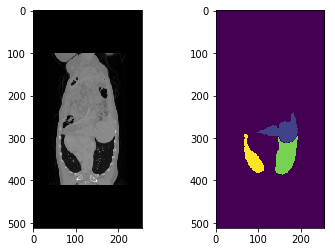

In [9]:
print(np.shape(train_data.X))

fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.squeeze(train_data.X[10,0,:,:]), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(np.squeeze(train_data.y[10,:,:]))
plt.show()

In [10]:
import torch

train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True,
                                               num_workers=4, pin_memory=True)

In [17]:
data_iter = iter(train_loader)
a,b,c = data_iter.next()

In [20]:
print(a.size())
print(b.size())
print(c.size())

torch.Size([4, 1, 512, 256])
torch.Size([4, 512, 256])
torch.Size([4, 512, 256])


In [182]:
print (len(np.unique((test_data.y == 9).nonzero()[0])))

102


In [43]:
class PowTwo:
    def __init__(self, max = 0):
        self.max = max

    def __iter__(self):
        self.n = 0
        return self

    def __next__(self):
        if self.n > self.max:
            raise StopIteration

        result = 2 ** self.n
        self.n += 1
        return result

In [44]:
def PowTwoGen(max = 0):
    n = 0
    while n < max:
        yield 2 ** n
        n += 1

In [47]:
for i in PowTwoGen(4):
    print(i)


1
2
4
8


In [163]:
import torch
print(torch.__version__)

0.4.1


In [159]:
np.mean(dice, 0).shape

(12,)

## Dice score distribution

### Fold 2 performance for each query volumes taking different support volumes

<function matplotlib.pyplot.show(*args, **kw)>

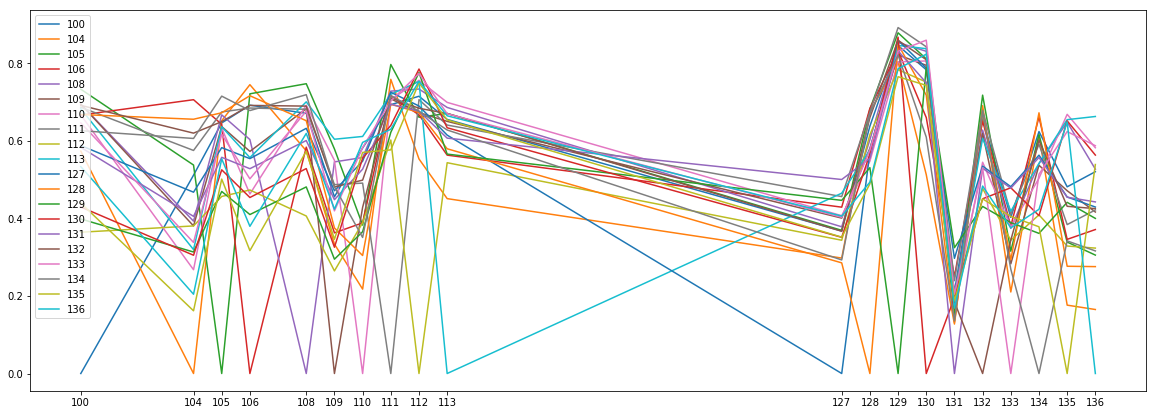

In [226]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,7))

x_label = [100,104,105,106,108,109,110,111,112,113,127,128,129,130,131,132,133,134,135,136]

support_dict = {
                100 : [0.0, 0.5114704370498657, 0.6461676359176636, 0.6919791102409363, 0.6710923910140991, 0.45571333169937134, 0.581500768661499, 0.693270742893219, 0.7150452733039856, 0.6552679538726807, 0.3674713671207428, 0.6379934549331665, 0.845862865447998, 0.7833962440490723, 0.2103118598461151, 0.6567501425743103, 0.4028048515319824, 0.6239369511604309, 0.48144662380218506, 0.5204244256019592],
                104 : [0.5735440254211426, 0.0, 0.6519305109977722, 0.7448689937591553, 0.5743967294692993, 0.33369743824005127, 0.21760646998882294, 0.7585787177085876, 0.5533087849617004, 0.4510006606578827, 0.2977422773838043, 0.6746432781219482, 0.8037357330322266, 0.5128619074821472, 0.12756593525409698, 0.6906278729438782, 0.21022950112819672, 0.6145012974739075, 0.1762998402118683, 0.16505154967308044],
                105 : [0.7331516742706299, 0.5376337170600891,0.0, 0.7213193774223328, 0.7473273277282715, 0.5791393518447876, 0.38276761770248413, 0.7969285845756531, 0.6608975529670715, 0.6706421375274658, 0.3692973852157593, 0.6818562150001526, 0.8786770701408386, 0.8113416433334351, 0.15233853459358215, 0.7178783416748047, 0.31534695625305176, 0.6162503957748413, 0.33897703886032104, 0.30537620186805725],
                106 : [0.6666091680526733, 0.7061291337013245, 0.6425547003746033,0.0, 0.583795428276062, 0.3627351224422455, 0.3885175883769989, 0.7165568470954895, 0.6670050621032715, 0.5631759762763977, 0.4289710819721222, 0.683616042137146, 0.8323858380317688, 0.6601120233535767, 0.2498467117547989, 0.6512517929077148, 0.3800507187843323, 0.6616358757019043, 0.3459606170654297, 0.37123599648475647],
                108 : [0.694491446018219, 0.3929036557674408, 0.6670035719871521, 0.6033294796943665,0.0, 0.5457329154014587, 0.5570259094238281, 0.7282130718231201, 0.7336255311965942, 0.6861452460289001, 0.3783806562423706, 0.6027718782424927, 0.8536879420280457, 0.8309762477874756, 0.2002291977405548, 0.6277222037315369, 0.3742772042751312, 0.5411954522132874, 0.6482676267623901, 0.5270723104476929],
                109 : [0.694771409034729, 0.38060563802719116, 0.6368585824966431, 0.5727428197860718, 0.6828380823135376, 0.0, 0.42846202850341797, 0.7083683013916016, 0.6729909777641296, 0.6501868367195129, 0.40077415108680725, 0.5808258652687073, 0.8216392397880554, 0.7948228716850281, 0.1976059377193451, 0.6191174387931824, 0.28285640478134155, 0.5370138883590698, 0.47137773036956787, 0.41645824909210205],
                110 : [0.6667512059211731, 0.267714262008667, 0.6325926184654236, 0.4629935920238495, 0.6919431090354919, 0.5496543049812317,0.0, 0.7059609293937683, 0.756234347820282, 0.6991941332817078, 0.4069613516330719, 0.5476572513580322, 0.8037844896316528, 0.8060080409049988, 0.1758752167224884, 0.5448753237724304, 0.37741950154304504, 0.5036183595657349, 0.6684078574180603, 0.5822376012802124],
                111 : [0.6867053508758545, 0.575234055519104, 0.6745291352272034, 0.68460613489151, 0.6814894080162048, 0.4870295226573944, 0.49102431535720825,0.0, 0.7062375545501709, 0.6407230496406555, 0.4562642276287079, 0.6740305423736572, 0.8921276330947876, 0.8426393270492554, 0.23946446180343628, 0.6787695288658142, 0.41107308864593506, 0.5911264419555664, 0.38403329253196716, 0.42178019881248474],
                112 : [0.3643953502178192, 0.3805847465991974, 0.4566038250923157, 0.47326937317848206, 0.40620285272598267, 0.2645311951637268, 0.38876810669898987, 0.6021702289581299,0.0, 0.5436107516288757, 0.3436792492866516, 0.6160292625427246, 0.7835952639579773, 0.7516709566116333, 0.188449427485466, 0.47723641991615295, 0.3437827527523041, 0.4091569781303406, 0.3287266492843628, 0.3234187066555023],
                113 : [0.6827244162559509, 0.3195548951625824, 0.6362364292144775, 0.5568619966506958, 0.7006120681762695, 0.6041564345359802, 0.6113337874412537, 0.7199760675430298, 0.7531906962394714,0.0, 0.4650435447692871, 0.5764287114143372, 0.846172034740448, 0.8377161026000977, 0.19616909325122833, 0.6064939498901367, 0.418585866689682, 0.5419021248817444, 0.6546822190284729, 0.662817656993866],
                127 : [0.587951123714447, 0.4675833582878113, 0.5824498534202576, 0.5541715621948242, 0.6322727799415588, 0.4713435173034668, 0.5476251840591431, 0.7253098487854004, 0.6898899078369141, 0.61477130651474,0.0, 0.5711468458175659, 0.8593184351921082, 0.787666380405426, 0.2969958186149597, 0.5348294973373413, 0.4817452132701874, 0.5630455017089844, 0.45522844791412354, 0.42932242155075073],
                128 : [0.6678974628448486, 0.655745267868042, 0.6723902225494385, 0.7163590788841248, 0.6519193649291992, 0.37531721591949463, 0.30428996682167053, 0.694358766078949, 0.6731394529342651, 0.5796070098876953, 0.28533735871315,0.0, 0.8487563133239746, 0.7178508639335632, 0.13196301460266113, 0.6718236207962036, 0.29358169436454773, 0.6723350286483765, 0.2765677869319916, 0.27566295862197876],
                129 : [0.3984921872615814, 0.3133450448513031, 0.46950045228004456, 0.40995362401008606, 0.48115065693855286, 0.2947852313518524, 0.36569905281066895, 0.6219914555549622, 0.776026725769043, 0.5658328533172607, 0.4465447962284088, 0.5308073163032532,0.0, 0.7898931503295898, 0.3244459629058838, 0.43088197708129883, 0.3892028331756592, 0.3613777458667755, 0.44142162799835205, 0.40001845359802246],
                130 : [0.4294610619544983, 0.30500471591949463, 0.5253121256828308, 0.4538939297199249, 0.5284906029701233, 0.3256385624408722, 0.5551092624664307, 0.6396906971931458, 0.7851771116256714, 0.6337884068489075, 0.3512260615825653, 0.5659396648406982, 0.8674022555351257,0.0, 0.19575074315071106, 0.4505715072154999, 0.4790080189704895, 0.4070449471473694, 0.6515107750892639, 0.5633296966552734],
                131 : [0.5831570625305176, 0.40527501702308655, 0.5575261116027832, 0.5281779170036316, 0.6007986068725586, 0.4483209252357483, 0.5269898772239685, 0.6945183277130127, 0.6765950918197632, 0.6070109605789185, 0.5003176331520081, 0.5549235343933105, 0.8318772315979004, 0.7497807145118713,0.0, 0.529288113117218, 0.47804850339889526, 0.5571324825286865, 0.4546213746070862, 0.4425462484359741],
                132 : [0.6915493607521057, 0.6198840737342834, 0.6495019793510437, 0.6914045810699463, 0.6895912885665894, 0.481048047542572, 0.4987127184867859, 0.7109763622283936, 0.683981716632843, 0.6706048846244812, 0.3668763041496277, 0.6602684855461121, 0.8592825531959534, 0.8093301057815552, 0.1847119778394699,0.0, 0.34407728910446167, 0.6017281413078308, 0.43120357394218445, 0.4252195656299591],
                133 : [0.6462548971176147, 0.33802473545074463, 0.6168957948684692, 0.5020302534103394, 0.6765556335449219, 0.4194784462451935, 0.5826871395111084, 0.7030920386314392, 0.7736069560050964, 0.6699862480163574, 0.4028349220752716, 0.576088547706604, 0.8311458826065063, 0.8596270680427551, 0.20453447103500366, 0.5301890969276428,0.0, 0.5137621760368347, 0.6239224672317505, 0.587448000907898],
                134 : [0.62623530626297, 0.6061576008796692, 0.7153198719024658, 0.6781341433525085, 0.7189886569976807, 0.4815883934497833, 0.35085251927375793, 0.7168852686882019, 0.6763830184936523, 0.6279983520507812, 0.29291507601737976, 0.6703431606292725, 0.821254312992096, 0.6096566319465637, 0.13554129004478455, 0.674455463886261, 0.26900142431259155,0.0, 0.3419715166091919, 0.3161517381668091],
                135 : [0.4395698308944702, 0.16170525550842285, 0.5014156699180603, 0.3168960511684418, 0.5732924938201904, 0.34614259004592896, 0.5701782703399658, 0.576734721660614, 0.7493336796760559, 0.6539533138275146, 0.351665735244751, 0.489035427570343, 0.7654629349708557, 0.7430556416511536, 0.1872212290763855, 0.4503318965435028, 0.40529265999794006, 0.37833884358406067,0.0, 0.5389986038208008],
                136 : [0.5334357023239136, 0.2044713795185089, 0.5536483526229858, 0.37958914041519165, 0.6191627979278564, 0.4239257276058197, 0.5960586667060852, 0.6298166513442993, 0.7537199258804321, 0.6645967960357666, 0.4059741199016571, 0.49337664246559143, 0.7861526608467102, 0.8234444260597229, 0.16876372694969177, 0.48341548442840576, 0.3755977749824524, 0.4234609603881836, 0.6488217711448669,0.0]
               }

legend = []
for key,val in support_dict.items():
    plt.plot(x_label, val)
    legend.append(str(key))

plt.legend(legend, loc='upper left')
plt.xticks(x_label)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

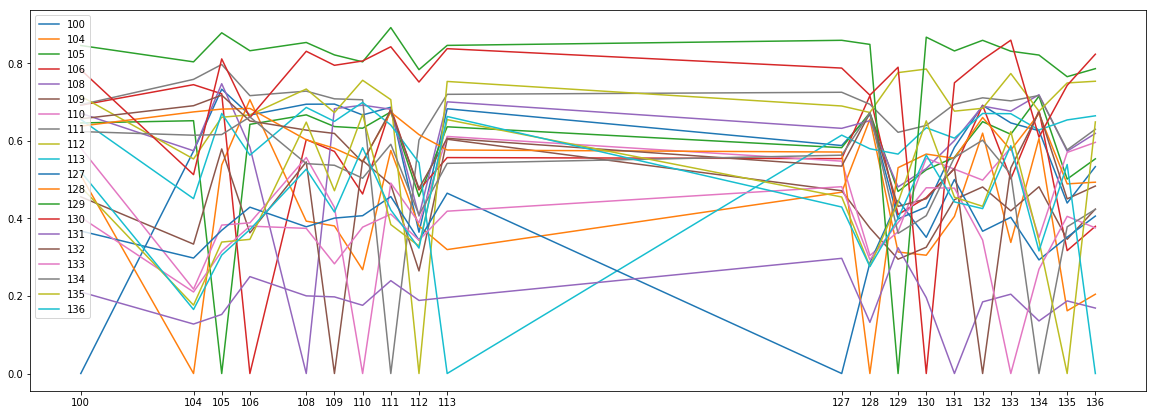

In [241]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,7))

x_label = [100,104,105,106,108,109,110,111,112,113,127,128,129,130,131,132,133,134,135,136]
# x_label = [100,104,105]

support_arr = np.array([
                [0.0, 0.5114704370498657, 0.6461676359176636, 0.6919791102409363, 0.6710923910140991, 0.45571333169937134, 0.581500768661499, 0.693270742893219, 0.7150452733039856, 0.6552679538726807, 0.3674713671207428, 0.6379934549331665, 0.845862865447998, 0.7833962440490723, 0.2103118598461151, 0.6567501425743103, 0.4028048515319824, 0.6239369511604309, 0.48144662380218506, 0.5204244256019592],
                [0.5735440254211426, 0.0, 0.6519305109977722, 0.7448689937591553, 0.5743967294692993, 0.33369743824005127, 0.21760646998882294, 0.7585787177085876, 0.5533087849617004, 0.4510006606578827, 0.2977422773838043, 0.6746432781219482, 0.8037357330322266, 0.5128619074821472, 0.12756593525409698, 0.6906278729438782, 0.21022950112819672, 0.6145012974739075, 0.1762998402118683, 0.16505154967308044],
                [0.7331516742706299, 0.5376337170600891,0.0, 0.7213193774223328, 0.7473273277282715, 0.5791393518447876, 0.38276761770248413, 0.7969285845756531, 0.6608975529670715, 0.6706421375274658, 0.3692973852157593, 0.6818562150001526, 0.8786770701408386, 0.8113416433334351, 0.15233853459358215, 0.7178783416748047, 0.31534695625305176, 0.6162503957748413, 0.33897703886032104, 0.30537620186805725],
                [0.6666091680526733, 0.7061291337013245, 0.6425547003746033,0.0, 0.583795428276062, 0.3627351224422455, 0.3885175883769989, 0.7165568470954895, 0.6670050621032715, 0.5631759762763977, 0.4289710819721222, 0.683616042137146, 0.8323858380317688, 0.6601120233535767, 0.2498467117547989, 0.6512517929077148, 0.3800507187843323, 0.6616358757019043, 0.3459606170654297, 0.37123599648475647],
                [0.694491446018219, 0.3929036557674408, 0.6670035719871521, 0.6033294796943665,0.0, 0.5457329154014587, 0.5570259094238281, 0.7282130718231201, 0.7336255311965942, 0.6861452460289001, 0.3783806562423706, 0.6027718782424927, 0.8536879420280457, 0.8309762477874756, 0.2002291977405548, 0.6277222037315369, 0.3742772042751312, 0.5411954522132874, 0.6482676267623901, 0.5270723104476929],
                [0.694771409034729, 0.38060563802719116, 0.6368585824966431, 0.5727428197860718, 0.6828380823135376, 0.0, 0.42846202850341797, 0.7083683013916016, 0.6729909777641296, 0.6501868367195129, 0.40077415108680725, 0.5808258652687073, 0.8216392397880554, 0.7948228716850281, 0.1976059377193451, 0.6191174387931824, 0.28285640478134155, 0.5370138883590698, 0.47137773036956787, 0.41645824909210205],
                [0.6667512059211731, 0.267714262008667, 0.6325926184654236, 0.4629935920238495, 0.6919431090354919, 0.5496543049812317,0.0, 0.7059609293937683, 0.756234347820282, 0.6991941332817078, 0.4069613516330719, 0.5476572513580322, 0.8037844896316528, 0.8060080409049988, 0.1758752167224884, 0.5448753237724304, 0.37741950154304504, 0.5036183595657349, 0.6684078574180603, 0.5822376012802124],
                [0.6867053508758545, 0.575234055519104, 0.6745291352272034, 0.68460613489151, 0.6814894080162048, 0.4870295226573944, 0.49102431535720825,0.0, 0.7062375545501709, 0.6407230496406555, 0.4562642276287079, 0.6740305423736572, 0.8921276330947876, 0.8426393270492554, 0.23946446180343628, 0.6787695288658142, 0.41107308864593506, 0.5911264419555664, 0.38403329253196716, 0.42178019881248474],
                [0.3643953502178192, 0.3805847465991974, 0.4566038250923157, 0.47326937317848206, 0.40620285272598267, 0.2645311951637268, 0.38876810669898987, 0.6021702289581299,0.0, 0.5436107516288757, 0.3436792492866516, 0.6160292625427246, 0.7835952639579773, 0.7516709566116333, 0.188449427485466, 0.47723641991615295, 0.3437827527523041, 0.4091569781303406, 0.3287266492843628, 0.3234187066555023],
                [0.6827244162559509, 0.3195548951625824, 0.6362364292144775, 0.5568619966506958, 0.7006120681762695, 0.6041564345359802, 0.6113337874412537, 0.7199760675430298, 0.7531906962394714,0.0, 0.4650435447692871, 0.5764287114143372, 0.846172034740448, 0.8377161026000977, 0.19616909325122833, 0.6064939498901367, 0.418585866689682, 0.5419021248817444, 0.6546822190284729, 0.662817656993866],
                [0.587951123714447, 0.4675833582878113, 0.5824498534202576, 0.5541715621948242, 0.6322727799415588, 0.4713435173034668, 0.5476251840591431, 0.7253098487854004, 0.6898899078369141, 0.61477130651474,0.0, 0.5711468458175659, 0.8593184351921082, 0.787666380405426, 0.2969958186149597, 0.5348294973373413, 0.4817452132701874, 0.5630455017089844, 0.45522844791412354, 0.42932242155075073],
                [0.6678974628448486, 0.655745267868042, 0.6723902225494385, 0.7163590788841248, 0.6519193649291992, 0.37531721591949463, 0.30428996682167053, 0.694358766078949, 0.6731394529342651, 0.5796070098876953, 0.28533735871315,0.0, 0.8487563133239746, 0.7178508639335632, 0.13196301460266113, 0.6718236207962036, 0.29358169436454773, 0.6723350286483765, 0.2765677869319916, 0.27566295862197876],
                [0.3984921872615814, 0.3133450448513031, 0.46950045228004456, 0.40995362401008606, 0.48115065693855286, 0.2947852313518524, 0.36569905281066895, 0.6219914555549622, 0.776026725769043, 0.5658328533172607, 0.4465447962284088, 0.5308073163032532,0.0, 0.7898931503295898, 0.3244459629058838, 0.43088197708129883, 0.3892028331756592, 0.3613777458667755, 0.44142162799835205, 0.40001845359802246],
                [0.4294610619544983, 0.30500471591949463, 0.5253121256828308, 0.4538939297199249, 0.5284906029701233, 0.3256385624408722, 0.5551092624664307, 0.6396906971931458, 0.7851771116256714, 0.6337884068489075, 0.3512260615825653, 0.5659396648406982, 0.8674022555351257,0.0, 0.19575074315071106, 0.4505715072154999, 0.4790080189704895, 0.4070449471473694, 0.6515107750892639, 0.5633296966552734],
                [0.5831570625305176, 0.40527501702308655, 0.5575261116027832, 0.5281779170036316, 0.6007986068725586, 0.4483209252357483, 0.5269898772239685, 0.6945183277130127, 0.6765950918197632, 0.6070109605789185, 0.5003176331520081, 0.5549235343933105, 0.8318772315979004, 0.7497807145118713,0.0, 0.529288113117218, 0.47804850339889526, 0.5571324825286865, 0.4546213746070862, 0.4425462484359741],
                [0.6915493607521057, 0.6198840737342834, 0.6495019793510437, 0.6914045810699463, 0.6895912885665894, 0.481048047542572, 0.4987127184867859, 0.7109763622283936, 0.683981716632843, 0.6706048846244812, 0.3668763041496277, 0.6602684855461121, 0.8592825531959534, 0.8093301057815552, 0.1847119778394699,0.0, 0.34407728910446167, 0.6017281413078308, 0.43120357394218445, 0.4252195656299591],
                [0.6462548971176147, 0.33802473545074463, 0.6168957948684692, 0.5020302534103394, 0.6765556335449219, 0.4194784462451935, 0.5826871395111084, 0.7030920386314392, 0.7736069560050964, 0.6699862480163574, 0.4028349220752716, 0.576088547706604, 0.8311458826065063, 0.8596270680427551, 0.20453447103500366, 0.5301890969276428,0.0, 0.5137621760368347, 0.6239224672317505, 0.587448000907898],
                [0.62623530626297, 0.6061576008796692, 0.7153198719024658, 0.6781341433525085, 0.7189886569976807, 0.4815883934497833, 0.35085251927375793, 0.7168852686882019, 0.6763830184936523, 0.6279983520507812, 0.29291507601737976, 0.6703431606292725, 0.821254312992096, 0.6096566319465637, 0.13554129004478455, 0.674455463886261, 0.26900142431259155,0.0, 0.3419715166091919, 0.3161517381668091],
                [0.4395698308944702, 0.16170525550842285, 0.5014156699180603, 0.3168960511684418, 0.5732924938201904, 0.34614259004592896, 0.5701782703399658, 0.576734721660614, 0.7493336796760559, 0.6539533138275146, 0.351665735244751, 0.489035427570343, 0.7654629349708557, 0.7430556416511536, 0.1872212290763855, 0.4503318965435028, 0.40529265999794006, 0.37833884358406067,0.0, 0.5389986038208008],
                [0.5334357023239136, 0.2044713795185089, 0.5536483526229858, 0.37958914041519165, 0.6191627979278564, 0.4239257276058197, 0.5960586667060852, 0.6298166513442993, 0.7537199258804321, 0.6645967960357666, 0.4059741199016571, 0.49337664246559143, 0.7861526608467102, 0.8234444260597229, 0.16876372694969177, 0.48341548442840576, 0.3755977749824524, 0.4234609603881836, 0.6488217711448669,0.0]
            ])


for i in range(20):
    plt.plot(x_label, support_arr[:,i])
    legend.append(str(x_label[i]))

# print()

# legend = []
# for key,val in support_dict.items():
#     plt.plot(x_label, val)
#     legend.append(str(key))


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    print("here")
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)


plt.legend(legend, loc='upper left')
plt.xticks(x_label)
plt.show

### 

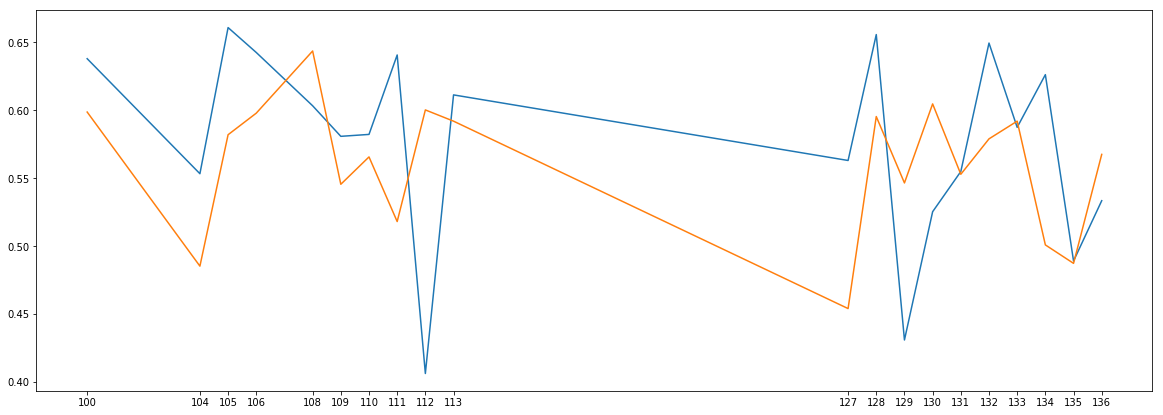

In [223]:
fig = plt.figure(figsize=(20,7))

x_label = [100,104,105,106,108,109,110, 111,112,113, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136]

# avg_dice = {100: 0.6379934549,104: 0.5533087849617004,105: 0.660897553,106: 0.6425547004,108: 0.6033294797,109:0.5808258653,110:0.5822376013}
avg_dice_fold2 = [0.6379934549,0.5533087849617004,0.660897553,0.6425547004,0.6033294797,0.5808258653,0.5822376013, 0.6407230496, 0.4062028527, 0.6113337874, 0.5630455017, 0.655745267868042, 0.430881977081299, 0.525312125682831, 0.55492353439331, 0.6495019794, 0.5874480009, 0.62623530626297, 0.489035427570343, 0.533435702323914]


avg_dice_fold3 = [0.5987046658992767, 0.48525990545749664, 0.5820086598396301, 0.5978919267654419, 0.6436559855937958, 0.5455217361450195, 0.5656688213348389, 0.5180828273296356, 0.6002712547779083, 0.5919896066188812, 0.4540085196495056, 0.5953916609287262, 0.5465087294578552, 0.6047046780586243, 0.5528902411460876, 0.5789677798748016, 0.5919922590255737, 0.5008856356143951, 0.4873017966747284, 0.5675234198570251]


plt.plot(x_label, avg_dice_fold2)
plt.plot(x_label, avg_dice_fold3)
plt.xticks(x_label)
plt.show()


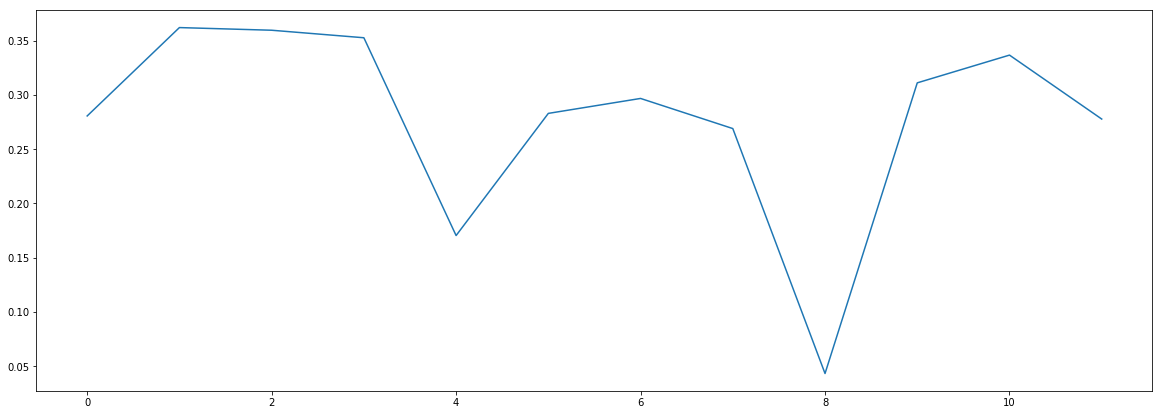

In [162]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,7))

avg_dice_fold3 = [0.28069389, 0.36218336, 0.35973031, 0.35280009, 0.17044072, 0.2830655, 0.2968441, 0.26907062, 0.04323799, 0.31121721, 0.33680055, 0.27784496]
avg_dice_fold2 = [0.00800693, 0.11912694, 0.33788297, 0.36038163, 0.10730912, 0.31690405, 0.3746841,  0.3417134,  0.18134422, 0.3039944,  0.37308369, 0.3709786]

# data = [0.05042015761137009, 0.3327322006225586, 0.26945871114730835, 0.06896550953388214, 0.0, 0.004555808380246162, 0.04760133847594261, 0.0012195120798423886, 0.10918772965669632, 0.3361344635486603, 0.2374344766139984, 0.009606147184967995]


plt.plot(avg_dice_fold3)
plt.show()

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIQAAAGfCAYAAAAu+wnJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvqOYd8AAAIABJREFUeJzs3Xl03ed9HvjnBUAAJAGCO8BVlChS1mLJsmTZsbwljuMlXpKJM7aTTLamTtq4TZtm2rSTyaRJM6dN50zaHDuN3cRxmjZxbaeTyI5SxXEcx5JiW5ItWZslLqLERQR3AlxAEsBv/gAhUxJFgiCAHy7u53OOj4mLK9zn+Oga9zz8vt+3VFUVAAAAAJpHS90BAAAAAJhZCiEAAACAJqMQAgAAAGgyCiEAAACAJqMQAgAAAGgyCiEAAACAJqMQAgAAAGgyCiEAAACAJqMQAgAAAGgybXW98PLly6sNGzbU9fIAAAAAc84DDzxwoKqqFRd7Xm2F0IYNG3L//ffX9fIAAAAAc04p5emJPM+RMQAAAIAmoxACAAAAaDIKIQAAAIAmoxACAAAAaDIKIQAAAIAmoxACAAAAaDIKIQAAAIAmoxACAAAAaDIKIQAAAIAmoxACAAAAaDIKIQAAAIAmoxACAAAAaDIKIQAAAIAmoxACAAAAaDIKIQAAajc4dKbuCADQVBRCAADUakv/YG75tb/Kv/ncY6mqqu44ANAUFEIAANTqf3xjd06PjOZ3734q//ELW+qOAwBNoa3uAAAANK+qqvLZh/bkDZtXZGV3R/7DX21JV0dbfur1V9UdDQDmNIUQAAC1+fozR7Lr8Mn80+/enPe8YnVOnB7Ov/nzx9PV0Zb337a+7ngAMGc5MgYAQG3ueHB3Otpa8j3X96attSX/4X03542bV+Rf/n8P52tPHao7HgDMWQohAABqMTwymj9/+Nm8+dqV6e6clyRpb2vJ7/zILVm2sD0f/dK2mhMCwNylEAIAoBb3bjuYA8dO5903rX7e4/PbW/PDr74iX/jWvmzff6ymdAAwtymEAACoxR0P7Ul3R1vedM3KF33vh1+zPu2tLfnEvTtmPhgANAGFEAAAM27ozEjuemRv3npDXzrntb7o+yu7O/Oum1bn0/fvytETZ2pICABzm0IIAIAZ9zdP7MvgqeEXHRc710++bkNOnhnJJ+97ZgaTAUBzUAgBADDj7nhoT5Z3tee1G5e95HOuX92T11y1NH9w744Mj4zOYDoAmPsUQgAAzKgn+wfzhcf35XtfviptrRf+OPqTt1+ZPUeHctej/TOUDgCag0IIAIAZ85kHduXdH7473Z3z8qOv3XDR57/52t6sX7ogH7/nqekPBwBNRCEEAMC0O3l6JP/8Mw/lFz79UF6xbnHu/LnXZeOKrov+c60tJT/+2g154OnD+b/+7JFs3Tc4A2kBYO5rqzsAAABz185DJ3LXo3vzyft2Zuu+Y/lH33V1fu7Nmy56VOxcH7htfR7efTR/9LVn8gd/93Ruu3JpfuQ1V+SdL1+VlpYyjekBYO4qVVVd/EmlvC3Jf0zSmuR3q6r6ty/xvPcm+XSSV1VVdf+Ffuatt95a3X//BZ8CAEADqqoqH79nR/7kgV157NmBJMnL+rrzi29/Wd50zcpJ/9wDx07l0/fvyh9/7Zk8c+hEfvqNV+Vfvv3aqYoNAHNCKeWBqqpuvdjzLjohVEppTfKRJG9JsivJfaWUO6qqeuwFz+tO8o+TfHVykQEAmAu+vOVAfu1zj+WmdYvzf7zj2nzP9b25YtnCy/65y7s68g/etDE//Yar8st3PJKPfml7rly2MO+/bf0UpAaA5jKRI2O3JdlaVdX2JCmlfDLJe5I89oLn/VqS30jyC1OaEACAhvL79zyV5V0d+dRPvyYdba1T/vNbWkp+5V3XZ+ehk/mlP30k65YuyO1XL5/y1wGAuWwih7fXJNl5zte7zj72nFLKzUnWVVX1uSnMBgBAg9m2/1i++MT+/Mhr1k9LGTSurbUlH/6hm7NxRVd+5r8+YNk0AFyiiRRC59vU99zioVJKS5LfTPLPLvqDSvlgKeX+Usr9+/fvn3hKAAAawh/cuyPtrS354VdfMe2v1d05L7/347emo60lP/GJ+3Lo+Olpf00AmCsmUgjtSrLunK/XJtlzztfdSW5I8jellB1JXpPkjlLKixYYVVX1saqqbq2q6tYVK1ZMPjUAALPO0ZNn8pkHduWdN63Kiu6OGXnNtUsW5D//6K3pP3oq/+xTD2Z09OIXpgAAEyuE7kuyqZRyZSmlPcn7k9wx/s2qqo5WVbW8qqoNVVVtSPKVJO++2C1jAADMLZ++f2dOnB7JT95+5Yy+7s3rl+SX3nltvvjE/vznL2+f0dcGgEZ10UKoqqrhJB9KcleSx5N8qqqqR0spv1pKefd0BwQAYPYbGa3yiXt35LYNS3PDmp4Zf/3/7TVX5B0v78tv3PVEHnj60Iy/PgA0molMCKWqqjurqtpcVdXGqqp+/exjv1xV1R3nee6bTAcBADSXzz/Wn12HT+Ynbt9Qy+uXUvJvf+DGrFk8P//oj76Rw/YJAcAFTagQAgCAC/n9e57KmsXz85bremvLsKhzXj78Qzdn/7FT+d8/81Cqyj4hAHgpCiEAAC7LgWOn8tWnDuUDt61LW2u9Hy9vXLs4/+od1+avHt+Xzzywq9YsADCbKYQAALgsuw6fTJK8rG9RzUnG/Nh3bMjN6xfn3/3PJzIwdKbuOAAwKymEAAC4LLvPFkKrF8+vOcmYlpaSf/3u63Pw+Kn81l9tqTsOAMxKCiEAAC7L7iMnkiRrlsyOQigZOzr2vlvX5RP37sjWfYN1xwGAWUchBADAZdlzZCjdHW3pmT+v7ijP8wtvvSbz21vzrz/7mAXTAPACCiEAAC7LrsMnZ9V00LjlXR35+bdszpe3HMhfPtZfdxwAmFUUQgAAXJbdR07Omv1BL/Qjr7kim3u78mufeyxDZ0bqjgMAs4ZCCACAy7L78ImsmaWF0LzWlvz8W67JrsMn8/VnDtcdBwBmDYUQAACTNjh0JgNDw7PyyNi4a/q6k4ztOgIAxiiEAACYtPGSZbZOCCXJqp7OJMnuwydrTgIAs4dCCACASRu/cn627hBKks55rVnR3fFcVgBAIQQAwGXYfXZCaO0sPjKWjE0w7T5iQggAximEAACYtN2HT2Zea8mKro66o1zQmsXz7RACgHMohAAAmLTdR05mVc/8tLSUuqNc0JolYxNCo6NV3VEAYFZQCAEAMGl7jpyc1Qulx61ZPD+nh0dz4PipuqMAwKygEAIAYNJ2Hz45q6+cHzdeWjk2BgBjFEIAAEzK6eHR9A8ONcSE0PgtaK6eB4AxCiEAACalf2AoVZWGKITGp5hcPQ8AYxRCAABMyq6z0zaNcGSsZ/68dHe0mRACgLMUQgAATMruI2cLoQaYEErGbxqzQwgAEoUQAACTND5ts2pxZ81JJmb14vnPlVgA0OwUQgAATMqeIyezorsjHW2tdUeZkDWL52f3YTuEACBRCAEAMEm7j5xsmONiydiRsYGh4QwOnak7CgDUTiEEAMCk7D5ysiEWSo8bL6/22CMEAAohAAAuXVVVDTkhlLh6HgAShRAAAJNw4NjpnB4ebaxC6GxWV88DgEIIAIBJaLQr55NkRVdH2ltbsstNYwCgEAIA4NLtGS+EGmiHUEtLyarFnXYIAUAUQgAATML4savVDTQhlLh6HgDGKYQAALhku4+cTHdHW3rmz6s7yiVZvXj+c8fdAKCZKYQAALhkuw431pXz49Ysnp99g6dyeni07igAUCuFEAAAl2zPkZMNd1wsGdt5VFXJ3qP2CAHQ3BRCAABcst1HTjbUDWPj1p7NvOuIPUIANDeFEAAAl+T4qeEcPXmmISeExjOPL8UGgGalEAIA4JL0D4wdt1rV01lzkku3avFY5gtdPb9132B+4ve/lgd3HpmpWAAw4xRCAABckv6BU0mSlYs6ak5y6TraWrOyuyO7L3Bk7A/ufTpffGJ/fvB37s3H734qVVXNYEIAmBltdQcAAKCx7Bscm67pXdR4E0LJ2GLpl7p6fmS0yl88sjdv2Lwi7a0t+dXPPZavbD+Yf//em9KzYN4MJwWA6WNCCACASzJ+ZGxld+NNCCVje4ReaofQfTsO5cCxU/nBW9bmP//oLfml7702X3xiX9714btz/NTwDCcFgOmjEAIA4JL0D5zKgvbWdHU05rD52sXzs+foUEZHX3wU7M6Hn01HW0u+62UrU0rJT73+qvzm+16RZw6dyEN2CgEwhyiEAAC4JP0DQ+ld1JlSSt1RJmXNkvk5PTyaA8dPPe/x8eNi33nNyiw8p+z6jquWJUke2XN0RnMCwHRSCAEAcEn2DZxq2ONiSXL1yq4kyV2P9j/v8ft3HMr+wVN5x42rnvf4sq6OrOrpzKN7BmYsIwBMN4UQAACXpH9wqGEXSidjEz+vuWpp/p+7nsjBY9+eEho/Lvbml6180T9z/eqePLLbhBAAc4dCCACACauqKvsGTqW3Aa+cH1dKya+954YcPzWcf/sX30qSjJ49Lvama1Y877jYuBvWLMr2A8dz4rTF0gDMDQohAAAmbPDUcE6eGWnoCaEk2dTbnb/3+ivz6Qd25f4dh/LAM4ezb/BU3vHyVed9/vWre1JVyePPOjYGwNygEAIAYML2jV853+CFUJL84+/alNU9nfmlP30kdzy4J+1tLXnztb3nfe4NaxYliT1CAMwZCiEAACasf2Bs504jL5Uet7CjLb/8ruvyrb2D+a9ffTpv2rwiXec5LpYkfYs6s3Rhuz1CAMwZCiEAACas/+yEUKMfGRv31uv78qZrVqSqku+98fzHxZKxvUPXr15kQgiAOUMhBADAhM2lCaFkrOj59e9/eX78tRvy1uv7Lvjc61f35Mn+wZweHp2hdAAwfRRCAABMWP/AULo72s57E1ejWrN4fn7l3denc17rBZ93w5pFOTNS5cn+wRlKBgDTRyEEAMCE7RscysoGvnL+cly/uidJ8ugee4QAaHwKIQAAJqx/4NSc2R90qa5YuiBdHW15ZLc9QgA0PoUQAAAT1j8w1LSFUEtLyXWrFpkQAmBOUAgBADAhVVVl38Cppj0yliTXr1mUx58dzMhoVXcUALgsCiEAACbk6MkzOT0ympXdzTkhlCQ3rO7JyTMjeerAsbqjAMBlUQgBADAh41fO9zb5hFASe4QAaHgKIQAAJqR/YChJmnaHUJJcvaIrHW0t9ggB0PAUQgAATMhzhVATHxlra23Jy/q6TQgB0PAUQgAATMi+wbEjY828VDpJrl/Tk0f3HE1VWSwNQONSCAEAMCH9A0PpmT8vnfNa645SqxtW92RgaDjPHDpRdxQAmDSFEAAAE9I/MNTUC6XH3bx+cZLk688crjkJAEyeQggAgAnpHzjV1Aulx23u7U5XR1seeFohBEDjUggBADAh+waGsqLbhFBrS8nN6xfngaeP1B0FACZNIQQAwEWNjlbZN2hCaNwr1y/JE3sHMjh0pu4oADApCiEAAC7q0InTGR6t0mtCKElyyxVLMlolD+08WncUAJgUhRAAABe1b2DsynkTQmNesX5xSok9QgA0LIUQAAAX1T84lCRZqRBKkizqnJdrervzgJvGAGhQCiEAAC5q38BYIeTa+W975RVL8o1nDmd0tKo7CgBcMoUQAAAX1X/2yJhbxr7tleuXZHBoOFv3H6s7CgBcMoUQAAAX1T8wlKUL29PR1lp3lFnjliuWJLFHCIDGpBACAOCi+gdOZaXpoOfZsGxBli5sVwgB0JAUQgAAXNS+wSELpV+glJJXrl+SryuEAGhACiEAAC6qf2AovSaEXuSWK5Zk+4HjOXT8dN1RAOCSTKgQKqW8rZTyRCllaynlF8/z/Z8ppTxcSnmwlHJ3KeW6qY8KAEAdTg+PZv/gqax0w9iLjO8RMiUEQKO5aCFUSmlN8pEkb09yXZIPnKfw+aOqql5eVdUrkvxGkv93ypMCAFCLv/7WvoxW3y4/+LYb1/akraXkgWcUQgA0lolMCN2WZGtVVdurqjqd5JNJ3nPuE6qqGjjny4VJqqmLCABAnT51/86s7O7IGzatqDvKrNM5rzXXr+mxWBqAhjORQmhNkp3nfL3r7GPPU0r52VLKtoxNCP3jqYkHAECd9h4dyt88sS/vvWVt2lqtnzyfW9YvyUM7j+TU8EjdUQBgwibyW72c57EXTQBVVfWRqqo2JvkXSX7pvD+olA+WUu4vpdy/f//+S0sKAMCM+5Ov78polfyvt66rO8qs9aZrVuTU8Gj+7ME9dUcBgAmbSCG0K8m5nwDWJrnQb7tPJvm+832jqqqPVVV1a1VVt65YYeQYAGA2q6oqn7p/Z1595dJsWL6w7jiz1us3Lc91qxbld760LSOjNicA0BgmUgjdl2RTKeXKUkp7kvcnuePcJ5RSNp3z5fcm2TJ1EQEAqMNXnzqUpw+eMB10EaWU/Ox3Xp3t+4/nrkf31h0HACbkooVQVVXDST6U5K4kjyf5VFVVj5ZSfrWU8u6zT/tQKeXRUsqDSX4+yY9NW2IAAGbEp+7bme6Otrzj5avqjjLrve2Gvly1fGE+8sWtqSpTQgDMfm0TeVJVVXcmufMFj/3yOX/+uSnOBQBAjQaGzuTOR57N//LKtZnf3lp3nFmvtaXkZ964Mf/8T76Zv91yIG/cbD0CALObqyIAAHiROx7ck6Ezo3mf42IT9n03r8mqns585Itb644CABelEAIA4EU+ff/OvKyvOzeu7ak7SsNob2vJB99wVb721KHcv+NQ3XEA4IIUQgAAPM/Rk2fy0K6jeddNq1NKqTtOQ3n/q9Zn6cL2/PbfbKs7CgBckEIIAIDn2b7/WJLkmt7umpM0nvntrfmx79iQv/7Wvuw5crLuOADwkhRCAAA8z7b9x5MkV61YWHOSxvS2G/qSJHdvOVBzEgB4aQohAACeZ/v+Y5nXWrJu6YK6ozSkzb1dWdndkb/dsr/uKADwkhRCAAA8z7b9x7J+6YLMa/VRcTJKKXndpuW5Z+uBjI5WdccBgPPyWx4AgOfZtv94Nq7oqjtGQ3v9puU5fOJMHt0zUHcUADgvhRAAAM8ZHhnN0wePZ+NKhdDluP3q5UmSL291bAyA2UkhBADAc3YePpkzI1WuWm6h9OVY2d2Zl/V158tPWiwNwOykEAIA4DnjV86bELp8b9i8Ig88fTgnTg/XHQUAXkQhBADAc7aNF0LLFUKX63VXL8/pkdF89alDdUcBgBdRCAEA8Jxt+45neVd7ehbMqztKw7vtyqVpb2vJ3VscGwNg9lEIAQDwnO0HjuUq00FTonNea27bsDRf3mKxNACzj0IIAIDnbNt/PBtXWig9VV6/aXme7D+WvUeH6o4CAM+jEAIAIEly+PjpHDp+OhtXmBCaKq/bNHb9/N1bHRsDYHZRCAEAkGTsuFiSXLXChNBUubZvUZYtbHdsDIBZRyEEAECSsYXSSUwITaGWlpLXbVqee7YeyOhoVXccAHiOQggAgCTJtgPH0t7akrVLFtQdZU551YalOXDsdPYcPVl3FAB4jkIIAIAkYxNCG5YvSGtLqTvKnLK5tztJsmXfsZqTAMC3KYQAAEgytkPIcbGpt2nl2P+mW/sVQgDMHgohAAByZmQ0zxw8YaH0NFiysD3LuzqyZd9g3VEA4DkKIQAA8vTBExkerUwITZNNK7scGQNgVlEIAQCQ7fvHr5xXCE2HTb1d2dp/LFXlpjEAZgeFEAAA2bZ/7Mp5R8amx6aVXRk8NZz+gVN1RwGAJAohAAAyNiG0srsjizrn1R1lTrp65fhNY/YIATA7KIQAAMi2/cdMB02jTb1jR/G2uGkMgFlCIQQA0OSqqsq2/cctlJ5Gyxa2Z8mCeRZLAzBrKIQAAJrc/mOncvTkGYXQNCqlZNPK7mx1ZAyAWUIhBADQ5LaePca0ube75iRz29W9XXnSTWMAzBIKIQCAJvdk/9jUyuZeE0LTadPKrhw9eSYHjp2uOwoAKIQAAJrdk/uOpWf+vKzo7qg7ypy2yU1jAMwiCiEAgCa3pX8wm3u7UkqpO8qcNn7T2FaLpQGYBRRCAABNrKqqPNl/LJvsD5p2K7s70t3ZphACYFZQCAEANLH9g2M3jG1eaX/QdBu7aawrW/oVQgDUTyEEANDEnnTD2IzatLI7W0wIATALKIQAAJrY+A1jjozNjE29XTlw7FQOH3fTGAD1UggBADSxLfuOZfGCeVne1V53lKZw9dmjeVv3mxICoF4KIQCAJralfzCbV3a7YWyGjE9i2SMEQN0UQgAATWrshrHB565DZ/qt7unMwvbWbNk3WHcUAJqcQggAoEntGzyVgaFhC6VnUCklV6/scvU8ALVTCAEANKlvL5Q2ITSTrl7Z7cgYALVTCAEANClXztdjU29X9g4M5ejJM3VHAaCJKYQAAJrUlv7BLF3YnuVdHXVHaSrXPLdY2h4hAOqjEAIAaFJb9h3LppWOi820zX1jhdATCiEAaqQQAgBoQuM3jDkuNvNW93Smq6MtT+5VCAFQH4UQAEAT6h84lcGhYQula1BKyebeLhNCANRKIQQA0ISeu2FspQmhOlzT150n9g6mqqq6owDQpBRCAABNaLwQ2mxCqBabe7tz+MSZHDh2uu4oADQphRAAQBPa0n8syxa2Z5kbxmoxftPYk46NAVAThRAAQBN6ct+g/UE1eu6mMYulAaiJQggAoMmMjlbZ2n/MDWM1Wt7VkWUL2xVCANRGIQQA0GSeOng8g6eGc8OanrqjNLXNvd1uGgOgNgohAIAm8+AzR5Ikr1i3uOYkze2avu5s6R/M6KibxgCYeQohAIAm8+DOI+nqaMvGFXYI1Wlzb3eOnx7J7iMn644CQBNSCAEANJmHdh3Jy9f0pLWl1B2lqV3TN1bIuWkMgDoohAAAmsjQmZE8/uxAXrHecbG6bTq71NseIQDqoBACAGgijz07kDMjlf1Bs8CiznlZs3h+nnTTGAA1UAgBADQRC6Vnl829XXmi/1jdMQBoQgohAIAm8tCuI1nV05neRZ11RyHJ5r7ubNt3LMMjo3VHAaDJKIQAAJrIgzuP5Ka1poNmi2t6u3N6ZDQ7Dh6vOwoATUYhBADQJA4fP52nD56wUHoW2Ty+WHqvY2MAzCyFEABAk3hw19j+IBNCs8fVK7vSUtw0BsDMUwgBADSJB585kpaS3Li2p+4onNU5rzUbli100xgAM04hBADQJB7adSSbVnZnYUdb3VE4x+be7jxpQgiAGaYQAgBoAlVV5aGdR1w3Pwtdu2pRdhw8noPHTtUdBYAmohACAGgCzxw6kcMnzlgoPQu95brejFbJXzyyt+4oADQRhRAAQBN4cKeF0rPVtau6c/XKrnz2oT11RwGgiSiEAACawIM7j2T+vNZs7u2qOwovUErJu25cna/tOJS9R4fqjgNAk1AIAQA0gQd3HsnL1/SkrdXHv9noXTetSlUln/umKSEAZoZPBAAAc9zJ0yN5dPdAbrY/aNa6akVXblizKJ/95rN1RwGgSSiEAADmuK/tOJTTI6N57dXL647CBbzrxtV5aOeRPHPwRN1RAGgCCiEAgDnu7i37097akts2LK07ChfwzptWJ0k+69gYADNgQoVQKeVtpZQnSilbSym/eJ7v/3wp5bFSyjdLKV8opVwx9VEBAJiML285kFuuWJL57a11R+EC1iyen1uvWOK2MQBmxEULoVJKa5KPJHl7kuuSfKCUct0LnvaNJLdWVXVjks8k+Y2pDgoAwKXbP3gq39o7mNdtclysEbzrptX51t7BPNk/WHcUAOa4iUwI3ZZka1VV26uqOp3kk0nec+4Tqqr6YlVV44edv5Jk7dTGBABgMu7ddiBJ8nqFUEN4+8v70lJiSgiAaTeRQmhNkp3nfL3r7GMv5e8l+YvLCQUAwNT48pYDWbxgXq5f3VN3FCZgZXdnvmPjMoUQANNuIoVQOc9j1XmfWMqPJLk1yb9/ie9/sJRyfynl/v379088JQAAl6yqqty95UBu37g8rS3n+0jHbPTajcuz4+CJnDg9XHcUAOawiRRCu5KsO+frtUle9FcWpZTvTvJ/JHl3VVWnzveDqqr6WFVVt1ZVdeuKFSsmkxcAgAnatv9Y9g4M5XbXzTeUvkWdSZK9R4dqTgLAXDaRQui+JJtKKVeWUtqTvD/JHec+oZRyc5KPZqwM2jf1MQEAuFRf3mJ/UCNa1XO2EBpQCAEwfS5aCFVVNZzkQ0nuSvJ4kk9VVfVoKeVXSynvPvu0f5+kK8mnSykPllLueIkfBwDADLl7y4FcsWxB1i1dUHcULkHv2UKoXyEEwDRqm8iTqqq6M8mdL3jsl8/583dPcS4AAC7DmZHRfGX7wXzfzRe6C4TZaPzI2LOOjAEwjSZyZAwAgAbzjWeO5PjpkbzO/qCGs7CjLd2dbelXCAEwjRRCAABz0N1bD6SljN1YRePpW9RphxAA00ohBAAwB929ZX9evnZxehbMqzsKk9DX0+mWMQCmlUIIAGCOeWLvYL7+zJF898tW1h2FSTIhBMB0UwgBAMwxH/3Stsyf15ofec0VdUdhkvp6OrN/8FSGR0brjgLAHKUQAgCYQ3YeOpE/e2hPPnDb+ixZ2F53HCapr6czo1Wy/9ipuqMAMEcphAAA5pDf/fL2tJTk77/hyrqjcBnGr563RwiA6aIQAgCYIw4cO5VP3rcz3/eKNVnVM7/uOFyGvh6FEADTSyEEADBH/P49T+X0yGh+5k0b647CZXpuQshiaQCmiUIIAGAOGBw6k//yd0/nbdf3ZeOKrrrjcJmWLmxPe2uLCSEApo1CCABgDvhvX30mg0PD+Qemg+aEUkp6ezpMCAEwbRRCAAANrqqq/MG9O3L71cty49rFdcdhivQt6jQhBMC0UQgBADS4rfuO5dmjQ3nXjavrjsIU6uuZb0IIgGmjEAIAaHD3bD2QJLn96uU1J2Eq9S3qyN6jQ6mqqu4oAMxBCiEAgAZ3z7aDWbd0ftYtXVB3FKZQ76LOnBoezdGTZ+qOAsAcpBACAGhgwyOj+cr2g7l9o+mguWZVz/wkybP2CAEwDRTMLcf3AAAZvUlEQVRCAAAN7JE9AxkcGs5rHRebc/p6OpLEHiEApoVCCACggY3vD3rtxmU1J2Gq9Z2dEHLTGADTQSEEANDA7t12IC/r687yro66ozDFVnZ3pBSFEADTQyEEANCghs6M5L4dh90uNkfNa23JsoUd6XdkDIBpoBACAGhQDzx9OKeHR3P71Y6LzVWrejotlQZgWiiEAAAa1D1bD6StpeS2KxVCc1Xvok4TQgBMC4UQAECDumfbwdy0bnG6OtrqjsI06evpMCEEwLRQCAEANKCjJ8/k4V1Hcrvbxea0VT3zc/TkmQydGak7CgBzjEIIAKABfXX7wYxWsVB6jutd1JnETWMATD2FEABAA7p328HMn9eam9cvqTsK02hVz1gh5NgYAFNNIQQA0GBGR6v8zRP78qorl6a9zce5uWx8QshiaQCmmk8QAAAN5otP7MuOgyfy/TevrjsK06zv7ITQXoUQAFNMIQQA0GB+50vbsmbx/LzzRoXQXNfV0ZbujjY7hACYcgohAIAGct+OQ7lvx+H8/ddfmXmtPso1g96eToUQAFPOpwgAgAbyO3+zLUsXtud9r1pfdxRmyKqezjzryBgAU0whBADQIJ7YO5gvfGtffuw7NmR+e2vdcZghvYs6029CCIApphACAGgQH/3Stixob82PfscVdUdhBvUt6sz+Y6cyPDJadxQA5hCFEABAA9h1+ETueGhP3v+q9VmysL3uOMygvp7OjIxWOXDsdN1RAJhDFEIAAA3gd7/8VJLkp15/Zc1JmGl9i1w9D8DUUwgBAMxyp4dH8ydf35V33rgqqxfPrzsOM6yv52whZI8QAFNIIQQAMMv93faDGRwazrtuWl13FGrw7ULoZM1JAJhLFEIAALPcXY/uzYL21tx+9fK6o1CDpQvaM6+1ZO/AqbqjADCHKIQAAGax0dEqn3+sP2+6ZkU657lqvhm1tJT0Luo0IQTAlFIIAQDMYt/YeTj7B0/lrdf31R2FGvUt6rRUGoAppRACAJjF7nq0P/NaS77zZSvrjkKNens60+/IGABTSCEEADBLVVWVux7dm+/YuDyLOufVHYcarVrUmWePnkxVVXVHAWCOUAgBAMxST/Yfy9MHT+St1/fWHYWa9fV0ZujMaAZODtcdBYA5QiEEADBL3fXo3pSSvOU6hVCzG796/tkBi6UBmBoKIQCAWequR/fmleuXZGV3Z91RqFnforF/B/YetVgagKmhEAIAmIV2HjqRR/cMOC5GkqT3bCHU76YxAKaIQggAYBb6y8f6kyTfc53r5vl2IfSsCSEApohCCABgFvqLh5/NNb3d2bB8Yd1RmAXa21qyvKvdhBAAU0YhBAAwyzy480juf/pwfuCWNXVHYRbp6+m0QwiAKaMQAgCYZX77i1vTM39efujVV9QdhVmkb1GnI2MATBmFEADALPJk/2D+8rH+/NhrN6Sro63uOMwivYs6HRkDYMoohAAAZpHf+ZttWdDemp947Ya6ozDLrOrpzOETZzJ0ZqTuKADMAQohAIBZYuehE/mzh/bkA7etz5KF7XXHYZZx9TwAU0khBAAwS3z0b7elpSR///VX1R2FWWhVz/wksVgagCmhEAIAmAX2DQ7lU/fvyntvWZu+ns664zAL9fV0JEn2mhACYAoohAAAajYyWuW3vrAlwyOj+ek3bKw7DrPU+JExE0IATAVXVwAA1GRktMrnvrkn//ELW7J9//G879Z12bB8Yd2xmKW6O+elq6PN1fMATAmFEABADf5u28H88p89ki37jmVzb1f+0w+/Mm+9vq/uWMxyvYs6LJUGYEoohAAAZlhVVfmFTz+UUpIP/9DNeccNq9LSUuqORQNY1TPfDiEApoQdQgAAM2zHwRPZfeRkfvqNG/POG1crg5iw3kWddggBMCUUQgAAM+zurQeSJK+7ennNSWg0fT0d2Td4KiOjVd1RAGhwCiEAgBl2z5YDWbN4fjYsW1B3FBpMX8/8jIxWOXjsVN1RAGhwCiEAgBk0Mlrl77YfzO1XL0spjopxafrOXj3vpjEALpdCCABgBj2652iOnjyT2x0XYxLGCyGLpQG4XAohAIAZNL4/6LUbFUJcur6es4WQCSEALpNCCABgBt2z9UBe1tedFd0ddUehAS1b2J55rcWEEACXTSEEADBDhs6M5L4dh90uxqS1tJSs7O5MvwkhAC6TQggAYIbcv+NwTg+P5vZNCiEmr6+n01JpAC6bQggAYIbcvfVA5rWW3LZhad1RaGB9izrT78gYAJdJIQQAMEPu2XogN69fkoUdbXVHoYGNTwhVVVV3FAAamEIIAGAGHD5+Oo/sOWp/EJetb1FnTp4ZycDQcN1RAGhgCiEAgBnwd9sPpqqS2xVCXKbxq+cdGwPgciiEAABmwN1bD6Sroy03re2pOwoNbrwQslgagMsxoUKolPK2UsoTpZStpZRfPM/331BK+XopZbiU8t6pjwkA0LiqqsqXntif11y1LG2t/j6Oy9O36OyEkEIIgMtw0U8kpZTWJB9J8vYk1yX5QCnluhc87ZkkP57kj6Y6IABAo3vs2YHsPnIyb7luZd1RmANWLupIkux1ZAyAyzCRKy5uS7K1qqrtSVJK+WSS9yR5bPwJVVXtOPu90WnICADQ0D7/WH9KSb7rZb11R2EO6GhrzbKF7Y6MAXBZJjKzvCbJznO+3nX2MQAAJuCvHu/PK9cvyYrujrqjMEf09XRaKg3AZZlIIVTO81g1mRcrpXywlHJ/KeX+/fv3T+ZHAAA0lD1HTuaR3QN5y3Wmg5g6fYs6TQgBcFkmUgjtSrLunK/XJtkzmRerqupjVVXdWlXVrStWrJjMjwAAaCh/9Xh/kuS7r1UIMXV6TQgBcJkmUgjdl2RTKeXKUkp7kvcnuWN6YwEAzA2ff6w/Vy1fmKtXdtUdhTlk1aLOHDp+OkNnRuqOAkCDumghVFXVcJIPJbkryeNJPlVV1aOllF8tpbw7SUopryql7Eryg0k+Wkp5dDpDAwA0goGhM/nK9oOOizHlenvGrp7fN3Cq5iQANKqJ3DKWqqruTHLnCx775XP+fF/GjpIBAHDWl57YnzMjlUKIKde3aKwQ2jswlPXLFtScBoBGNJEjYwAATMLnH+vPsoXtuXn9krqjMMes6vl2IQQAk6EQAgCYBmdGRvPFJ/blu162Mq0t57u0FSZv/MjY3qMna04CQKNSCAEATIOvPXUog0PDjosxLbo72rKwvTV7j9ohBMDkKIQAAKbB5x/rT0dbS16/aUXdUZiDSinp7enM3gETQgBMjkIIAGAafPWpQ7ntyqWZ395adxTmqL5Fndl71A4hACZHIQQAMMVGR6ts338sm3u7647CHNbX05l+184DMEkKIQCAKbb7yMmcGh7NxhVddUdhDutb1Jn+gaGMjlZ1RwGgASmEAACm2Nb9x5IkV69UCDF9VvV0Zni0yoHjpoQAuHQKIQCAKbZt31ghtHHFwpqTMJf1Lhq/et4eIQAunUIIAGCKbdt/PEsWzMuyro66ozCH9fUohACYPIUQAMAU27bvmP1BTLvxQqh/QCEEwKVTCAEATLFt+xVCTL/lCzvS1lLyrAkhACZBIQQAMIUOHz+dg8dPWyjNtGtpKeld1Jm9JoQAmASFEADAFNp29oaxjSstlGb69S7qcGQMgElRCAEATKHxQujqFd01J6EZ9PV0OjIGwKQohAAAptDWfcfS3taSNUvm1x2FJtC3aH72Hh1KVVV1RwGgwSiEAACm0Lb9x3PV8oVpbSl1R6EJ9PV05MTpkQyeGq47CgANRiEEADCFtu0/lo0WSjND+nrGJtH6HRsD4BIphAAApsjQmZHsPHTClfPMmL5FnUnipjEALplCCABgiuw4eDyjVVw5z4wZL4QslgbgUimEAACmyLZ9x5MkG1e4cp6ZsXJRRxJHxgC4dAohAIApsnXfsZSSXLXchBAzo3Nea5YubM+zjowBcIkUQgAAU2Tb/mNZs3h+5re31h2FJtK7qNOEEACXTCEEADBFtu47Zn8QM25VT6el0gBcMoUQAMAUGB2tsv3AMTeMMeP6ejotlQbgkimEAACmwJ6jJzN0ZlQhxIxbs3h+Dh0/nROnh+uOAkADUQgBAEyBrfuOJXHlPDNv7ZL5SZLdh0/WnASARqIQAgCYAtv2u3KeeqxdsiBJskshBMAlUAgBAEyBbfuPZcmCeVnW1VF3FJrMuqVjE0I7D5+oOQkAjUQhBAAwBR585kg293bXHYMmtKKrIx1tLSaEALgkCiEAgMu0bf+xPPbsQL7n+r66o9CESilZs2R+dpkQAuASKIQAAC7THQ/uSSnJO29cVXcUmtTaJQtMCAFwSRRCAACXoaqqfPabe/LqK5emd1Fn3XFoUuuWzFcIAXBJFEIAAJfh0T0D2b7/eN5905q6o9DE1i5ZkEPHT+f4qeG6owDQIBRCAACX4bMP7UlbS8nbb7A/iPqsXTJ205gpIQAmSiEEADBJo6NVPvfNZ/P6TcuzZGF73XFoYt8uhCyWBmBiFEIAAJP09WcOZ/eRk3n3K1bXHYUmt27pgiQmhACYOIUQAMAk3fHQnnS0teQt1zkuRr2WLWxP57yW7DxkQgiAiVEIAQBMwvDIaO58+Nm8+dqV6epoqzsOTa6U4up5AC6JQggAYBL+bvvBHDh2Ou++yXExZoe1S+Zn1xETQgBMjEIIAGAS/vQbe9LV0ZY3XbOy7iiQJFlnQgiAS6AQAgC4RHuOnMwdD+3O9928Op3zWuuOA0nGJoSOnDiTwaEzdUcBoAEohAAALtHH/nZ7qir56TdsrDsKPGftEjeNATBxCiEAgEuwb3Aof/y1Z/L9N6957qpvmA3WLpmfRCEEwMQohAAALsHvffmpnBkZzT/8zqvrjgLPM15Q7jpssTQAF6cQAgCYoMPHT+cPv/J03nXT6ly5fGHdceB5liyYlwXtrSaEAJgQhRAAwAT9/j1P5cTpkfys6SBmoVJK1i6Zn52HTAgBcHEKIQCACRgYOpPfv3dH3nZ9Xzb3dtcdB85rravnAZgghRAAwAR84p4dGRwazoe+y3QQs9e6JfPtEAJgQhRCAAAX8diegXz4r7fmbdf35YY1PXXHgZe0dsmCDAwN5+jJM3VHAWCWUwgBAFzAidPD+Ud//PUsXjAvv/79N9QdBy7o21fPmxIC4MIUQgAAF/Crn30s2w8cz2++7xVZ1tVRdxy4oLVLxq+et0cIgAtTCAEAvITPfXNPPnnfzvyDN27M7VcvrzsOXNS6peMTQgohAC5MIQQAcB47D53Iv/wfD+fm9YvzT9+yue44MCE98+elq6PNkTEALkohBADwAo8/O5Af+b2vJlXyW++/OfNafWSiMZRSsnbJ/Ow8ZEIIgAvz6QYA4Bx/+o3d+f7fvicnT4/kEz95W9YtXVB3JLgka109D8AEtNUdAABgNjg9PJr/+87H84l7d+S2K5fmwz90c1Z2d9YdCy7ZlcsX5m+3HMiZkVHTbQC8JL8hAACS/J9/+kg+ce+O/NTrrsx/+6lXK4NoWDetW5zTw6N5Yu9g3VEAmMUUQgBA03vm4Il85uu78uOv3ZBfeud1pipoaDetXZwk+cbOIzUnAWA282kHAGh6H/3bbWktJT/zxo11R4HLtnbJ/Czvas9DCiEALkAhBAA0tX0DQ/n0/bvyA7esTV+PY2I0vlJKblq7WCEEwAUphACApva7dz+V4dHR/Mwbr6o7CkyZV6xbnK37j2Vw6EzdUQCYpRRCAEDTOnLidP7rV57Ou25anSuWLaw7DkyZm9YtTlUlD+86WncUAGYphRAA0LR+/54dOXF6JP/wTVfXHQWmlMXSAFyMQggAaErHTg3nE/fuyFuu6801fd11x4Ep1bNgXq5avtAeIQBekkIIAGhKf/zVZ3L05Jn8wze5WYy56aZ1i/PgziOpqqruKADMQgohAKDpVFWV//bVp/OqDUty8/oldceBafGKdYuzb/BU9g4M1R0FgFlIIQQANJ37dhzOjoMn8r5Xra87Ckybm9aN7RF68BnHxgB4MYUQANB0Pn3/zixsb807Xt5XdxSYNteu6k57a0se3KUQAuDFFEIAQFM5fmo4f/7ws/neG1dlQXtb3XFg2nS0teba1YsslgbgvBRCAEBTufPhZ3Pi9Eh+8NZ1dUeBaXfzusV5eNfRjIxaLA3A8ymEAICm8ukHduXK5Qtz6xWWSTP33bSuJ8dPj2TrvmN1RwFgllEIAQBNY8eB4/naU4fy3lvWppRSdxyYdjetPbtYeufhmpMAMNtMqBAqpbytlPJEKWVrKeUXz/P9jlLKfz/7/a+WUjZMdVAAgMv1mQd2paUkP/DKtXVHgRlx5fKFWdTZlgd3Hq07CgCzzEULoVJKa5KPJHl7kuuSfKCUct0Lnvb3khyuqurqJL+Z5N9NdVAAgMsxMlrlT76+K6/ftCJ9PZ11x4EZUUrJTesW5/OP7c1/v++ZnDw9UnckAGaJiVytcVuSrVVVbU+SUsonk7wnyWPnPOc9SX7l7J8/k+TDpZRSVdWc3153345DlvQBQAN4sn8wzx4dyi997wv/Xgvmtn/y3Zvzr/7Hw/kXf/Jwfv3PH897b1mXN1+7Mq0tjk0CnOvm9YvT0dZad4wZM5FCaE2Sned8vSvJq1/qOVVVDZdSjiZZluTAVISczX7841/LcX/TAgANYenC9nz3dSvrjgEz6pYrluR//pPX574dh/OHX3k6f/iVHfn4PU/VHQtg1vnav3pzVi5SCJ3rfH918MKRmIk8J6WUDyb5YJKsX79+Ai89+338x1+Vkbk/CAUAc8K6JQua6m/+YFwpJbdduTS3Xbk0B45dlyf7B+uOBDDr9CyYV3eEGTWRQmhXknXnfL02yZ6XeM6uUkpbkp4kh174g6qq+liSjyXJrbfeOidalFdftazuCAAAMGHLuzqyvKuj7hgA1Gwit4zdl2RTKeXKUkp7kvcnueMFz7kjyY+d/fN7k/x1M+wPAgAAAGhEF50QOrsT6ENJ7krSmuTjVVU9Wkr51ST3V1V1R5LfS/KHpZStGZsMev90hgYAAABg8iZyZCxVVd2Z5M4XPPbL5/x5KMkPTm00AAAAAKbDRI6MAQAAADCHKIQAAAAAmoxCCAAAAKDJKIQAAAAAmoxCCAAAAKDJKIQAAAAAmoxCCAAAAKDJKIQAAAAAmoxCCAAAAKDJKIQAAAAAmoxCCAAAAKDJKIQAAAAAmkypqqqeFy5lf5Kna3nxqbc8yYG6Q8As5L0B5+e9AefnvQHn570BL+Z98dKuqKpqxcWeVFshNJeUUu6vqurWunPAbOO9AefnvQHn570B5+e9AS/mfXH5HBkDAAAAaDIKIQAAAIAmoxCaGh+rOwDMUt4bcH7eG3B+3htwft4b8GLeF5fJDiEAAACAJmNCCAAAAKDJKIQuQynlbaWUJ0opW0spv1h3HqhTKWVHKeXhUsqDpZT7zz62tJTy+VLKlrP/vaTunDDdSikfL6XsK6U8cs5j530vlDG/dfb3yDdLKa+sLzlMr5d4b/xKKWX32d8dD5ZS3nHO9/7l2ffGE6WUt9aTGqZfKWVdKeWLpZTHSymPllJ+7uzjfnfQ1C7w3vC7Y4oohCaplNKa5CNJ3p7kuiQfKKVcV28qqN13VlX1inOuf/zFJF+oqmpTki+c/Rrmuk8kedsLHnup98Lbk2w6+58PJvlPM5QR6vCJvPi9kSS/efZ3xyuqqrozSc5+pnp/kuvP/jO/ffazF8xFw0n+WVVV1yZ5TZKfPfse8LuDZvdS743E744poRCavNuSbK2qantVVaeTfDLJe2rOBLPNe5L8wdk//0GS76sxC8yIqqr+NsmhFzz8Uu+F9yT5L9WYryRZXEpZNTNJYWa9xHvjpbwnySerqjpVVdVTSbZm7LMXzDlVVT1bVdXXz/55MMnjSdbE7w6a3AXeGy/F745LpBCavDVJdp7z9a5c+F9OmOuqJH9ZSnmglPLBs4/1VlX1bDL2f+hJVtaWDur1Uu8Fv0sg+dDZYy8fP+dosfcGTamUsiHJzUm+Gr874DkveG8kfndMCYXQ5JXzPObKNprZ7VVVvTJjY8w/W/7/9u7YR6YwCsP488aiQCfRUGxEv6VEIlspdAoJBSIKBYVao9XQKoQOySZsbCH8C7aRsLQim5XdjkJlHcW9GxuZUWwmc7O+59fcmW+mOM07J3Py3e8mp4cuSNoF7CVq3QPgODAHfAXu9etmQ81JchB4Dtyqqu//+uqINfOh/9aIbNg7JsSB0M6tAse2vT8KrA1UizS4qlrrrxvAIt32zPWtLcz9dWO4CqVBjcuCvURNq6r1qtqsql/AQ/5s7TcbakqSvXR/eJ9U1Yt+2d6h5o3Khr1jchwI7dwycCLJbJJ9dIdXLQ1ckzSIJAeSHNp6DZwBPtBl4kr/tSvAy2EqlAY3LgtLwOX+iTEngW9btwdILfjr3JNzdL0DumxcSLI/ySzd4blvp12fNA1JAjwCPlXV/W0f2TvUtHHZsHdMzszQBexWVfUzyU3gDbAHeFxVKwOXJQ3lCLDY/WYzAzytqtdJloGFJNeAL8D5AWuUpiLJM2AeOJxkFbgD3GV0Fl4BZ+kOPfwBXJ16wdKUjMnGfJI5ui39n4HrAFW1kmQB+Ej3lJkbVbU5RN3SFJwCLgHvk7zr125j75DGZeOivWMyUuUtdZIkSZdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIsAAAGfCAYAAADf8FJEAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvqOYd8AAAIABJREFUeJzs3Xt02/d55/nPA5AEeAHBG3ixJYqkRDlW6rssO7GTJo2b2MnUTjvJ1JlN120y9Uk3PpNuNmcm7cykezzT3W46M905u8402VPPtjPJcWwnbbwdp25Su0mdRI4kW75bEkXdqAvvNwAkARLf/YMgTVOUBJIgfvgB79c5PCF++P3Ah/Ef0vnoeZ6vOecEAAAAAAAASFLA6wIAAAAAAABQPAiLAAAAAAAAsIywCAAAAAAAAMsIiwAAAAAAALCMsAgAAAAAAADLCIsAAAAAAACwjLAIAAAAAAAAywiLAAAAAAAAsIywCAAAAAAAAMsqvC5gtZaWFtfV1eV1GQAAAAAAACXj0KFDI865WC73Fl1Y1NXVpYMHD3pdBgAAAAAAQMkws1O53ssYGgAAAAAAAJYRFgEAAAAAAGAZYREAAAAAAACWERYBAAAAAABgGWERAAAAAAAAlhEWAQAAAAAAYBlhEQAAAAAAAJYRFgEAAAAAAGAZYREAAAAAAACWERYBAAAAAABgGWERAAAAAAAAlhEWAQAAAAAAYBlhEQAAAAAAAJYRFgEAAAAAAGAZYREAAADgE6PxOa9LAACUAcIiAAAAwAeODU7rtv/t7/TtA6e9LgUAUOIIiwAAAAAf+PaBM5rPOP2nHx5Taj7jdTkAgBJGWAQAAADkyfnJGaUX8h/kpOYz+suXzqqzqUbnJmf1xKEzef8ZAAAsISwCAAAA8mAkPqcP/vu/1//9bF/eP/vZt4Y0mkjpf713j27c3qCvPXec7iIAwJYhLAIAAADy4HuHz2k2vdgB5JzL62c/eeiMWiMhvb83pt+9q1dnJ2b05KGBvP4MAACWEBYBAAAAm+Sc0xMHz6gqGNDpsaQOn5nI22cPTc3quSPD+se3bFNFMKBf3B3Tjdsb9MhzfXQXAQC2BGERAAAAsEmvn5vSWxem9YW7elVVEdD3Dp/L22d/96WzWsg4ffKWbZIkM9MXst1F33mR7iIAQP7lFBaZ2d1mdsTM+szsy2u8/zkze9XMDpvZ82a2J3u9y8xmstcPm9mf5vsXAAAAALz25KEBVQUD+vRtO/RL17Tqv796XguZ9Y2ijSdSuvv//LH+0w+PKZN91jmnxw+e0d4djeqJ1S3f+4HdMd2Q7S6am1/I6+8CAMAVwyIzC0p6RNI9kvZI+tRSGLTCt5xz1znnbpT0VUn/ccV7x51zN2a/PpevwgEAAIBikJrP6HuHz+qX392maE2l7r3xKg1Pz2l//+i6Pue7L53VWxem9Sc/PKrf+eYhxefm9eLpCfUPJ/RP9m5/x71mpt+9q1cD4zO69d/9UA9960X95UsDGkuk8vmrAQDKVEUO9+yT1Oec65ckM3tM0n2S3li6wTk3teL+Wkn53egHAAAAFKln3xrUeDKtT2THxH7pXa2qC1XoqcPndMeulpw+wzmnxw+c0Q3borrvxqv1h0+/qV/72k+0vbFGNVVBffT6joue+eA1rfovv3Wrvv/qeT371rD++pXzqgiYvvM779UN2xvy+jsCAMpLLmNoV0s6s+L1QPbaO5jZ583suBY7i/75ire6zewlM/uRmb1vU9UCAAAARebJQwNqq188qUySwpVBfXhPm77/2vmcR8QOn5nQkcFp/fqtnfrMnd36i8/s09D0nP7urSF99LoO1YXW/jfeD17Tqq9+4gb9/Pc/pP/62X2azzi9dm4yb78bAKA85RIW2RrXLuoccs494pzbKelfSvrX2cvnJXU6526S9EVJ3zKz+ot+gNmDZnbQzA4ODw/nXj0AAADgoeHpOT13ZFi/etM2BQNv/7X5V268SlOz8/rx0ZGcPufxg2dUXRnUr9yw2EF0x64WPfX5O/WrN12t3/nAzis+HwiY3tPTrIBJFyZnN/bLAACQlUtYNCBp5ZD0NkmXO97hMUkflyTn3JxzbjT7/SFJxyXtXv2Ac+4bzrm9zrm9sVgs19oBAAAAT/1V9qSypRG0JXfualFjTaW+d/jsFT8jMTevpw6f08eu71AkXLl8vbO5Rn/y6zdq54rF1pdTEQyoNRLWuQnCIgDA5uQSFh2Q1Gtm3WZWJel+SU+tvMHMele8/JikY9nrseyCbJlZj6ReSf35KBwAAADw2pOHBnRTZ4N2tb4z0KkMBvTR6zr0wzcHlZibv+xn/PdXzyuRWtCv37r9svfloqMhrAtTM5v+HABAebtiWOScm5f0kKRnJL0p6XHn3Otm9rCZ3Zu97SEze93MDmtx3OyB7PX3S3rFzF6W9KSkzznnxvL+WwAAAAAFNpZI6cjgtO5+d/ua799349WaTWf0t29cuOznPH7gjHpitdq7o3HTNXVEwzpPZxEAYJNyOQ1NzrmnJT296tpXVnz/hUs89x1J39lMgQAAAEAxOjY4LUm6pj2y5vt7dzSqq7lGf/GzU/rVm7ateU/fUFwHT43r9+55l8zWWhW6Ph3Raj331rCcc3n5PABAecplDA0AAADAKseG4pKk3ra1w6JAwPRbd3TrpdMTOnRqfM17Hj94RhUB06/dvHaYtF4d0bBm0guanEnn5fMAAOWJsAgAAADYgL6huGqrgroqGr7kPZ+4ZZvqwxX6s+cvXts5m17Qd18c0IeubVUsEspLTR3RaknSeU5EAwBsAmERAAAAsAFHB6e1qy1y2XGv2lCF/ultO/Q3r13QmbHkO97742eOaCSe0m/d0Z23mtqzwdX5SZZcAwA2jrAIAAAA2IBjQ3H1tl75WPsH3rtDATP9vz89uXzthf5RPfqTE/qN23fo9p7mvNV0VcNSWERnEQBg4wiLAAAAgHWaSKY0PD2n3W1XDos6otX62PUd+vaBM5qeTSsxN68vPfmytjfW6Mv3vCuvdcXqQgqYdIGwCACwCTmdhgYAAADgbcvLrVvXXm692mfv7Nb3Dp/Ttw+c0cnRhAbGZ/TtB9+j2lB+/zpeEQyorT6scxOERQCAjSMsAgAAANbp2ODSSWhX7iySpOu3NWhfV5P+r2f7NDmT1j+7s1v7upu2pLb2aFgXpthZBADYOMbQAAAAgHU6OjitmqqgrsqePpaLz76vW5Mzae2M1epLH7lmy2q7Klqt83QWAQA2gc4iAAAAYJ36huLa1VqnQODSJ6Gtdte1bfrSh3frI+9uV7gyuGW1tUfDevatITnnLntSGwAAl0JnEQAAALBORwenc95XtCQYMD30S73qbVvfc+vVEQ1rJr2gyZn0lv4cAEDpIiwCAAAA1mEymdbQ9FzO+4oKrSM7GneeE9EAABtEWAQAAACsQ9/wtCSpt7VIw6KGsCTp/CRLrgEAG0NYBAAAAKzD0exJaLu3eJxsozqiS2ERnUUAgI0hLAIAAADW4dhgXNWVQV3dkPtJaIXUGgkrGDBORAMAbBhhEQAAALAOx4am130SWiEFA6bWSIjOIgDAhhEWAQAAoGy80D+q06PJTX3GscF40e4rWtIRDbOzCACwYYRFAAAAKAtjiZR+49Gf6+G/fmPDnzE1m9aFqVntKtKT0JZ0RKt1gc4iAMAGERYBAACgLDx24LRS8xnt7x9VeiGzoc84trTcurU4l1sv6YiGdW5yRs45r0sBAPgQYREAAABK3vxCRt/cf1p1oQrF5+b1ysDEhj6nb2haktRb5J1F7dGwZtMZTc6kvS4FAOBDhEUAAAAoeT98c0hnJ2b0b/7RtTKT/uHYSE7PzaYXtJB5uzvn2GBc4cqAtjXWbFWpeXFV9qQ2llwDADaCsAgAAAAl789/elJXRcP6xzdv0/VXR/WTviuHRXPzC/rgv/973fFHz+qrf/OWjg/HdXQorp2xOgWL9CS0Je3RsCSx5BoAsCGERQAAAChpRy5M62f9o/r0e3aoIhjQHbta9NLpCcXn5i/73A/fGNL5yVl1NIT1pz86rg/9hx/p+WPDRX8SmiRdFaWzCACwcYRFAAAAKGl/8bOTqqoI6P5bOyVJd/a2aD7jtP/46GWfe+LQGXVEw3ryc+/V/t/7kH7/o+/SDdsbdPcvdBSg6s2JRUIKBkznJwiLAADrV+F1AQAAAMBWmZxJ67svntV9N1ylptoqSdItOxoVrgzo+b4R3bWnbc3nLkzO6sdHh/U/fWCXggFTa31YD75/px58/85Clr9hwYCpLRKiswgAsCF0FgEAAKBkPXHwjGbSC3rgvV3L10IVQe3rbtbzl9lb9N2XBpRx0idu2VaAKrdGezTMziIAwIYQFgEAAKBkPXFwQDd3NugXro6+4/r7drWobyiuC2t03jjn9MTBAe3ralJXS22hSs27jobqNX8/AACuhLAIAAAAJSk1n1HfcFzv3dly0Xt39i5eW6u76NCpcZ0YSegTe/3bVSRJHfVhnZuckXPO61IAAD5DWAQAAICSdHosoYWMU0/s4u6ga9oiaqmr0vPHhi9674mDA6qpCupj1xX/IuvL6Wio1mw6o8mZtNelAAB8hrAIAAAAJal/OCFJ6oldfNR9IGC6Y1eLnu8bfUfnTTI1r79+5Zw+el2HakP+PgumIxqWJJ3jRDQAwDoRFgEAAKAk9Y8shUVr7x26Y1eLRuJzOjI4vXzt+69eUCK1oE/6eLH1kqsbqiVJp8eSHlcCAPAbf/9zCQAAAHAJ/cNxtdSFVB+uXPP992X3Fn3le6+rq7lGkvTCiTHtaK7Rvu6mgtW5Va5pj6gyaDp8ZkJ3/0K71+UAAHyEsAgAAAAlqX84ccmuIknqiFbrnl9o1+EzEzqT7b4xSV+4q1dmVqAqt064Mqh3XxXVi6fGvS4FAOAzhEUAAAAoSf0jCX3k3W2Xvec/f/qWAlXjjZs7G/XNF04pvZBRZZANFACA3PAnBgAAAErORDKlsURKPS0XL7cuJ7fsaNTcfEZvnJvyuhQAgI8QFgEAAKDkHM+ehNbdcukxtHJw844GSdKLpxlFAwDkjrAIAAAAJefEFU5CKxcd0WpdFQ3rxdMTXpcCAPARwiIAAACUnP7huCoCpu1NNV6X4rmbdjSy5BoAsC6ERQAAACg5/cMJdTbXsNRZ0i2djTo7MaMLk7NelwIA8An+9AQAAEDJ6R+Jl/1y6yU372iUxN4iAEDucgqLzOxuMztiZn1m9uU13v+cmb1qZofN7Hkz27Pivd/LPnfEzD6Sz+IBAACA1RYyTidHk9pZ5vuKluzpqFeoIsAoGgAgZ1cMi8wsKOkRSfdI2iPpUyvDoKxvOeeuc87dKOmrkv5j9tk9ku6X9G5Jd0v6WvbzAAAAgC1xdnxGqflM2S+3XlJVEdD126I6RGcRACBHuXQW7ZPU55zrd86lJD0m6b6VNzjnpla8rJXkst/fJ+kx59ycc+6EpL7s5wEAAABb4vhIXJLUE2MMbcnNOxr1+tkpzaYXvC4FAOADuYRFV0s6s+L1QPbaO5jZ583suBY7i/75ep4FAAAA8uXEcEKS1NNCZ9GSmzsblVrI6PVzk16XAgDwgVzCIlvjmrvognOPOOd2SvqXkv71ep41swfN7KCZHRweHs6hJAAAAGBt/SNx1Ycr1FRb5XUpRePmzuyS61MTHlcCAPCDXMKiAUnbV7zeJuncZe5/TNLH1/Osc+4bzrm9zrm9sVgsh5IAAACAtfUPJ9QTq5PZWv9uWZ5ikZA6m2p0iCXXAIAc5BIWHZDUa2bdZlalxYXVT628wcx6V7z8mKRj2e+fknS/mYXMrFtSr6Sfb75sAAAAYG2LYREjaKvdsqNRh06Py7mLGv0BAHiHK4ZFzrl5SQ9JekbSm5Ied869bmYPm9m92dseMrPXzeywpC9KeiD77OuSHpf0hqS/kfR55xxb9QAAALAlEnPzujA1q50st77IzZ0NGp6e08D4jNelAACKXEUuNznnnpb09KprX1nx/Rcu8+wfSvrDjRYIAAAA5OrECMutL2VvV5Mk6YUTY9reVONxNQCAYpbLGBoAAADgC8eH45KkHjqLLnJNW0QtdVV6/hgHygAALo+wCAAAACXjxEhCZtKOZjpnVgsETHfsatHzfaPsLQIAXBZhEQAAAEpG/3BC2xqrFa4Mel1KUbpzV4tG4nN668K016UAAIoYYREAAABKxomRhLpbGEG7lPf1xiRJzx8b8bgSAEAxIywCAABAybgwNaurG8Jel1G02qNh7Wqt0z/0ERYBAC6NsAgAAAAlwTmn8URKTbVVXpdS1O7c1aKfnxjVbHrB61IAAEWKsAgAAAAlYWpmXvMZp8YawqLLuXNXi2bTGb14atzrUgAARYqwCAAAACVhNDEnSWquIyy6nNt3NqsiYIyiAQAuibAIAAAAJWEskZIkNdWGPK6kuNWFKnRTZwNLrgEAl0RYBAAAgJIwmg2LmtlZdEV37orptXOTGs/+fwYAwEqERQAAACgJb3cWERZdyZ29LXJO+slxuosAABcjLAIAAEBJICzK3Q3booqEKxhFAwCsibAIAAAAJWE0nlJtVVDhyqDXpRS9imBA7+lp1j8cG5FzzutyAABFhrAIAAAAJWEsMacmTkLL2ft6W3R2YkYnR5NelwIAKDKERQAAACgJo4kUJ6Gtw02djZKkN89PeVwJAKDYEBYBAACgJIwlUpyEtg5dLbWSpBMjCY8rAQAUG8IiAAAAlISxRIrl1utQF6pQLBLSScIiAMAqhEUAAADwPeecRuksWreu5hqdYmcRAGAVwiIAAAD4XiK1oNR8hs6idepqrtWJUTqLAADvRFgEAAAA3xuLpySJsGidulpqNTw9p8TcvNelAACKCGERAAAAfG80MSdJaq4jLFqPrubFJdcn6S4CAKxAWAQAAADfG08udRaFPK7EX7paaiSJvUUAgHcgLAIAAIDvjWbH0FhwvT47sp1FJzgRDQCwAmERAAAAfG8swc6ijagLVSgWCekUY2gAgBUIiwAAAOB7Y4mUQhUB1VQFvS7Fd7qaa3RyhDE0AMDbCIsAAADge6OJlJpqq2RmXpfiO13NtSy4BgC8A2ERAAAAfG8sGxZh/bpaajU0PafE3LzXpQAAigRhEQAAAHxvlLBow7qyS67pLgIALCEsAgAAgO+NJeY4CW2DulpqJEmnRtlbBABYRFgEAAAA3xuLp9RUG/K6DF/ake0sOjFCZxEAYBFhEQAAAHxtNr2gRGpBzXV0Fm1EXahCsUhIpxhDAwBkERYBAADA18YSKUliZ9EmdDXX6OQIY2gAgEWERQAAAPA1wqLN62quZcE1AGAZYREAAAB8bTQbFrHgeuO6Wmo1ND2nxNy816UAAIoAYREAAAB8bSwxJ4nOos3oyi655kQ0AIBEWAQAAACfG40vdRZxGtpGdbXUSBKjaAAASYRFAAAA8LmxREoVAVN9dYXXpfjWjmxnEWERAEAiLAIAAIDPjSVSaqytkpl5XYpv1YUqFIuEdHKEsAgAQFgEAAAAnxtNpFhunQddzTU6OcLOIgBAjmGRmd1tZkfMrM/MvrzG+180szfM7BUz+zsz27HivQUzO5z9eiqfxQMAAABjiRTLrfOgq7mWMTQAgKQcwiIzC0p6RNI9kvZI+pSZ7Vl120uS9jrnrpf0pKSvrnhvxjl3Y/br3jzVDQAAAEgiLMqXrpZaDU3PKTE373UpAACP5dJZtE9Sn3Ou3zmXkvSYpPtW3uCce845t9Szul/StvyWCQAAAKxtND7HGFoedLHkGgCQlUtYdLWkMyteD2SvXcpnJX1/xeuwmR00s/1m9vEN1AgAAACsKb2Q0dTsvJpqQ16X4ns7mmskSWfG2FsEAOUul/NF1zpWwq15o9mnJe2V9IsrLnc6586ZWY+kZ83sVefc8VXPPSjpQUnq7OzMqXAAAABgPJGSJDXV0Vm0WZ3ZsOg0YREAlL1cOosGJG1f8XqbpHOrbzKzuyT9K0n3Oufmlq47585l/7df0t9Lumn1s865bzjn9jrn9sZisXX9AgAAAChfo0thUQ1h0WbVhyvVUFNJWAQAyCksOiCp18y6zaxK0v2S3nGqmZndJOnrWgyKhlZcbzSzUPb7Fkl3SHojX8UDAACgvI0thUXsLMqLzqYanR6b8boMAIDHrjiG5pybN7OHJD0jKSjpUefc62b2sKSDzrmnJP2xpDpJT5iZJJ3Onnx2raSvm1lGi8HUHznnCIsAAACQF0udRc2MoeXF9qYavX520usyAAAey2VnkZxzT0t6etW1r6z4/q5LPPdTSddtpkAAAADgUsbpLMqrHU01eua1C1rIOAUDa60uBQCUg1zG0AAAAICiNJpIyUxqZGdRXnQ21Wg+43R+klE0AChnhEUAAADwrbHEnBqqK+mCyZPOJk5EAwAQFgEAAMDHxhIpRtDyaHs2LDpDWAQAZY2wCAAAAL41Gk+puTbkdRkloyMaVkXAdGqUsAgAyhlhEQAAAHxlNr2gv3xpQP/kT3+mF06MqaMh7HVJJaMiGNC2xmrG0ACgzOV0GhoAAABQDP7iZyf1H/72qCZn0upqrtHv3fMu3X9rp9dllZTtTTWMoQFAmSMsAgAAgG/8+U9PKhYJ6T//Dzfr9p5mBVhsnXedTTV6+tXzXpcBAPAQY2gAAADwjYlkWvu6m/TeXS0ERVuks6lG48m0pmbTXpcCAPAIYREAAAB8wTmniZm0GmsqvS6lpHVmT0Q7zZJrAChbhEUAAADwhanZeS1knBprqrwupaR1Ni+GRewtAoDyRVgEAAAAXxhPpCSJsGiLbV/qLCIsAoCyRVgEAAAAXxhPZsOiWsbQtlJ9uFKNNZWERQBQxgiLAAAA4AsTycWFyw10Fm25zqYawiIAKGOERQAAAPCF5c4iwqItt52wCADKGmERAAAAfGE821nEaWhbb0dzjc6Oz2h+IeN1KQAADxAWAQAAwBcmkikFbHGnDrZWZ1ON5jNO5ydnvS4FAOABwiIAAAD4wngypWh1pQIB87qUkrd0ItoZRtEAoCwRFgEAAMAXxpNp9hUVSGc2LGJvEQCUJ8IiAAAA+MJEMqUG9hUVREe0WpVB0ynCIgAoS4RFAAAA8IXxBJ1FhRIMmLY1ciIaAJQrwiIAAAD4wkQypcZawqJC2d5Uw84iAChThEUAAADwhbFkSo2MoRVMZ1M1nUUAUKYIiwAAAFD0ZtMLmk1n1MAYWsF0NtVoIpnW5Eza61IAAAVGWAQAAICiN55MSRI7iwpo6UQ0RtEAoPwQFgEAAKDojScWu1sYQyucqxqqJUnnJ2c9rgQAUGiERQAAACh6E9nOIsbQCqc9GpYkXZic8bgSAEChERYBAACg6I0ns51FtXQWFUpLbUgVAaOzCADKEGERAAAAih47iwovEDC11Yd1gbAIAMoOYREAAACK3ttjaHQWFVJHNExnEQCUIcIiAAAAFL3xZFo1VUGFKoJel1JW2qJhXZgiLAKAckNYBAAAgKI3nkwxguaBjvqwzk/OyDnndSkAgAIiLAIAAEDRm0imWW7tgfZoWLPpjCZn0l6XAgAoIMIiAAAAFL2xBJ1FXuiIVksSe4sAoMwQFgEAAKDoTSRTaiAsKrj2aFiSOBENAMoMYREAAACK3ngyrUZOQiu4jmxYRGcRAJQXwiIAAAAUtYWM09Rsms4iD8QiIQVMnIgGAGWGsAgAAABFbXImLedEZ5EHKoMBxSIhXZic8boUAEABERYBAACgqI0nU5LEgmuPtEerGUMDgDJDWAQAAICiNpENixroLPJER32YBdcAUGZyCovM7G4zO2JmfWb25TXe/6KZvWFmr5jZ35nZjhXvPWBmx7JfD+SzeAAAAJS+8URaEp1FXmmPEhYBQLm5YlhkZkFJj0i6R9IeSZ8ysz2rbntJ0l7n3PWSnpT01eyzTZL+QNJtkvZJ+gMza8xf+QAAACh1jKF5qyMa1vTcvKZn016XAgAokFw6i/ZJ6nPO9TvnUpIek3Tfyhucc88555LZl/slbct+/xFJP3DOjTnnxiX9QNLd+SkdAAAA5WAiuRhSNNQyhuaF9mhYkjTIiWgAUDZyCYuulnRmxeuB7LVL+ayk72/wWQAAAOAdxpMpVQRMkVCF16WUpY5otSSx5BoAykguf+LaGtfcmjeafVrSXkm/uJ5nzexBSQ9KUmdnZw4lAQAAoFyMJ1NqqKmS2Vp/tcRW68h2FhEWAUD5yKWzaEDS9hWvt0k6t/omM7tL0r+SdK9zbm49zzrnvuGc2+uc2xuLxXKtHQAAAGVgPJFWIyeheaa1PiRJLLkGgDKSS1h0QFKvmXWbWZWk+yU9tfIGM7tJ0te1GBQNrXjrGUkfNrPG7GLrD2evAQAAADkZT6ZYbu2hUEVQLXVVdBYBQBm54hiac27ezB7SYsgTlPSoc+51M3tY0kHn3FOS/lhSnaQnsu3Bp51z9zrnxszs32oxcJKkh51zY1vymwAAAKAkTSTT2tFc43UZZa09GtaFyRmvywAAFEhOWwKdc09LenrVta+s+P6uyzz7qKRHN1ogAAAAytt4MqUbtzd4XUZZa6+v1sB48so3AgBKQi5jaAAAAIAnnHOaSKbVUMvOIi91RMO6MMUYGgCUC8IiAAAAFK1kakGphQw7izzWHg1rIpnWTGrB61IAAAVAWAQAAICiNZ5MSRKnoXmsIxqWJLqLAKBMEBYBAACgaE0k05KkBjqLPNWeDYvOs+QaAMoCYREAAACK1tudRYRFXuqIVkuSLkzSWQQA5YCwCAAAAEVrPNtZ1MSCa0+11y91FhEWAUA5ICwCAABA0RpPLHYWMYbmreqqoBpqKuksAoAyQVgEAACAorU0htZQTWeR19rrw3QWAUCZICwCAABA0ZpIphUJV6giyF9bvdYRDevCFAuuAaAc8KcuAAAAitZ4MsVy6yLRHq1mDA0AygRhEQAAAIrWeDKtxhpG0IpBe31YI/GU5uYXvC4FALDFCIsAAABQlFLzGR29MK3W7Elc8FZHdPG/w+DknMeVAAC2GmERAAAAitLjB8/owtSsPn37Dq9LgaRtjdWSpDPjSY8rAQBsNcIiAAAAFJ25+QXEj8laAAAgAElEQVR97bk+3dzZoPf3tnhdDiT1xOokSf3DcY8rAQBsNcIiAAAAFJ0nDg7o3OSsfveu3TIzr8uBpLb6kGqqgjo+nPC6FADAFiMsAgAAQFGZm1/QI9muovfRVVQ0zEzdLbU6MUJYBACljrAIAAAAReXxgwM6Pzmr//mX6SoqNj2xOvWPMIYGAKWOsAgAAABFY2lX0S07GnXnLrqKik1PS60Gxmc0m17wuhQAwBYiLAIAAEDR+G/7Ty92FbGrqCj1xGrlnHRqlBPRAKCUVXhdAAAAAHBscFpffeaIfvDGoG7vadIdu5q9Lglr6GlZPBHtxEhc17RHPK4GALBVCIsAAADgmaGpWf3xM0f0nRcHVFNVof/ll3frM3d201VUpLpjtZLEiWgAUOIIiwAAAOCZ3//L1/Tjo8P6rTu69fkP7lJTbZXXJeEy6kIVaqsPqZ+wCABKGmERAAAAPHNqNKFfeler/s0/2uN1KchRd0utTnAiGgCUNBZcAwAAwDMj8Tm1ROgm8pOeWJ36R+gsAoBSRlgEAAAAT6QXMhpPptVSF/K6FKxDT0utJpJpjSVSXpcCANgihEUAAADwxFLYQFjkLztjiyei9Q8zigYApYqwCAAAAJ4Ynp6TRFjkN90tiyeiMYoGAKWLsAgAAACeGIkvhkUxdhb5yrbGalUGjRPRAKCEERYBAADAEyNxxtD8qCIY0I7mWsbQAKCEERYBAADAE0udRYRF/tPTUssYGgCUMMIiAAAAeGJkek7hyoBqqoJel4J16o7V6tRoQgsZ53UpAIAtQFgEAAAAT4zE59RSF5KZeV0K1mlnS53SC04D40mvSwEAbAHCIgAAAHhiJJ5iBM2nemLZE9FYcg0AJYmwCAAAAJ5Y6iyC//TE6iRJx1lyDQAlibAIAAAAnhiJpxSLVHldBjagsaZS0epKnWDJNQCUJMIiAAAAFNxCxmksQWeRX5mZemK1jKEBQIkiLAIAAEDBjSdTyjgRFvlYT0ud+kcYQwOAUkRYBAAAgIIbic9JIizys55YrQan5pSYm/e6FABAnhEWAQAAoOBGplOSpJY6dhb5VVfz4olop0aTHlcCAMi3nMIiM7vbzI6YWZ+ZfXmN999vZi+a2byZfWLVewtmdjj79VS+CgcAAIB/LXcWRegs8qu2+sX/dkPTsx5XAgDIt4or3WBmQUmPSPplSQOSDpjZU865N1bcdlrSb0r60hofMeOcuzEPtQIAAKBELIdFtYRFftUaCUuShqbnPK4EAJBvVwyLJO2T1Oec65ckM3tM0n2SlsMi59zJ7HuZLagRAAAAJWY4PqeqYED11bn8dRTFqDXbWTRMWAQAJSeXMbSrJZ1Z8Xogey1XYTM7aGb7zezj66oOAAAAJWlkOqXmuiqZmdelYIPClUHVhys0NMUYGgCUmlz+KWetP8HdOn5Gp3PunJn1SHrWzF51zh1/xw8we1DSg5LU2dm5jo8GAACAH43E5zgJrQS01ocZQwOAEpRLZ9GApO0rXm+TdC7XH+CcO5f9335Jfy/ppjXu+YZzbq9zbm8sFsv1owEAAOBTi2ERJ6H5XWskRFgEACUol7DogKReM+s2sypJ90vK6VQzM2s0s1D2+xZJd2jFriMAAACUJzqLSkNrJKRBxtAAoORcMSxyzs1LekjSM5LelPS4c+51M3vYzO6VJDO71cwGJH1S0tfN7PXs49dKOmhmL0t6TtIfrTpFDQAAAGXGOafReEotEcIiv1saQ3NuPVsqAADFLqfjJ5xzT0t6etW1r6z4/oAWx9NWP/dTSddtskYAAACUkMmZtOYzjs6iEtAaCSk1n9HUzLyiNZVelwMAyJNcxtAAAACAvBmJL+64YWeR/7XWhyVJQ9OMogFAKSEsAgAAQEENT6ckSTE6i3yvNTtKyJJrACgthEUAAAAoqOXOInYW+d7bYRGdRQBQSgiLAAAAUFBLYVFzLWNofrc0hjY4RWcRAJQSwiIAAAAU1Eh8TsGAqbGGsMjv6kIVqqkKaoiwCABKCmERAAAACmpkOqWm2ioFAuZ1KciD1kiIMTQAKDGERQAAACiokficWlhuXTJaI2EWXANAiSEsAgAAQEEthkWMoJWK1vqQhgmLAKCkEBYBAACgoEbiKcXoLCoZrZGwhqYYQwOAUkJYBAAAgIJxzmk4PqeWCGFRqWitDymRWlB8bt7rUgAAeUJYBAAAgIKJz80rNZ9hDK2EtGaDP7qLAKB0EBYBAACgYEbiKUliwXUJaY2EJYkl1wBQQgiLAAAAUDAj8cVAgbCodLTWZzuLCIsAoGQQFgEAAKBgRrKBQjNjaCWDMTQAKD2ERQAAACiYpc4iTkMrHdHqSlVVBDRMZxEAlAzCIgAAABTMcDwlM6mpls6iUmFmao2EGEMDgBJCWAQAAICCGYnPqbGmShVB/hpaShbDIsbQAKBU8Kc0AAAACmZkek4t7CsqOa2RsAan6CwCgFJBWAQAAICCGUukGEErQa31IRZcA0AJISwCAABAwYwnU2quZbl1qWmNhDQ1O6/Z9ILXpQAA8oCwCAAAAAUznkyrsbbS6zKQZ62RsCRxIhoAlAjCIgAAABTEQsZpIplSYw1jaKWmtX6xW4wl1wBQGgiLAAAAUBBTM2llnAiLStBSZ9EQS64BoCQQFgEAAKAgxpIpSWLBdQla6iwaZMk1AJQEwiIAAAAUxEQ2LGokLCo5TTVVqgiYhthZBAAlgbAIAAAABTGWSEtaDBZQWgIBU0tdiLAIAEoEYREAAAAKYjyx1FnEaWilqLWesAgASgVhEQAAAApiaWcRC65LU2skpCF2FgFASSAsAgAAQEGMJ1KqqgiopirodSnYAq31YQ3TWQQAJYGwCAAAAAUxlkipqaZKZuZ1KdgCrZGQRhMppRcyXpcCANgkwiIAAAAUxHgyzUloJaw1EpYkuosAoAQQFgEAAKAgxpMpNbHcumS11YckSYPsLQIA3yMsAgAAQEGMJ1Isty5hbfWLnUWERQDgf4RFAAAAKIixJGFRKWuPLoVFjKEBgN8RFgEAAGDLLWScJmfYWVTKmmqqVBk0XaCzCAB8j7AIAAAAW25yJi3npKYadhaVqkDA1BoJa3CSsAgA/I6wCAAAAFtuLJGSJDqLSlxbfYjOIgAoAYRFAAAA2HLjycWwqImwqKS1R8OERQBQAgiLAAAAsOWWO4tYcF3SWiNhDbHgGgB8L6ewyMzuNrMjZtZnZl9e4/33m9mLZjZvZp9Y9d4DZnYs+/VAvgoHAACAf4wzhlYW2qNhxefmFZ+b97oUAMAmXDEsMrOgpEck3SNpj6RPmdmeVbedlvSbkr616tkmSX8g6TZJ+yT9gZk1br5sAAAA+MnY0hganUUlrb0+LEm6wJJrAPC1XDqL9knqc871O+dSkh6TdN/KG5xzJ51zr0jKrHr2I5J+4Jwbc86NS/qBpLvzUDcAAAB8ZCKZVrgyoOqqoNelYAu1ZcOiQfYWAYCv5RIWXS3pzIrXA9lrudjMswAAACgRY4kUXUVloD1KWAQApSCXsMjWuOZy/PycnjWzB83soJkdHB4ezvGjAQAA4BfjiRT7ispAW31IkjgRDQB8LpewaEDS9hWvt0k6l+Pn5/Ssc+4bzrm9zrm9sVgsx48GAACAX4wlU2oiLCp5NVUVioQrNMjOIgDwtVzCogOSes2s28yqJN0v6akcP/8ZSR82s8bsYusPZ68BAACgjIwnUmpgDK0stNeH6SwCAJ+7YljknJuX9JAWQ543JT3unHvdzB42s3slycxuNbMBSZ+U9HUzez377Jikf6vFwOmApIez1wAAAFBGxpNpNdVUel0GCqA9Gtbg1JzXZQAANqEil5ucc09LenrVta+s+P6AFkfM1nr2UUmPbqJGAAAA+Nj8QkaTM2l2FpWJ1khYfUMjXpcBANiEXMbQAAAAgA2bmElLEjuLykR7NKSh6TktZHI9EwcAUGwIiwAAALClxhMpSVIjO4vKQnt9WAsZp9E4o2gA4FeERQAAANhSY9mwiM6i8tBWH5YkllwDgI8RFgEAAGBLjSfpLCon7dHFsIgl1wDgX4RFAAAA2FLjycWdRY21nIZWDugsAgD/IywCAADAlhpjZ1FZaakLKRgwDU4SFgGAXxEWAQAAYEuNJ1KqqQoqXBn0uhQUQDBgitWF6CwCAB8jLAIAAMCWGkum6CoqM23RsAYJiwDAtwiLAAAAsKXGEylOQiszbZEQYREA+BhhEQAAALbUWDKtRsKistIeDesCO4sAwLcIiwAAALClJpIpNdZwElo5aasPa2p2XjOpBa9LAQBsAGERAAAAttRYgp1F5aa9PixJLLkGAJ8iLAIAAMCWSS9kND07z86iMtMeXQyL2FsEAP5EWAQAAIAtM55MSRI7i8pMW31IEmERAPgVYREAAAC2zHgiLUlqYgytrLQtjaGx5BoAfImwCAAAAFvm7c4iFlyXk0i4UrVVQXYWAYBPERYBAABgy4wnsmERnUVlpy0a1tDUnNdlAAA2gLAIAAAAW2Ys21nEguvy0xYJ01kEAD5FWAQAAIAts9RZ1FDDGFq5aY+G2VkEAD5FWAQAAIAtM5ZIqy5UoVBF0OtSUGBt9WENTc8qk3FelwIAWCfCIgAAAGyJmdSCTo4mWG5dptrrQ0ovuOVRRACAf1R4XQAAAABKx0QypScPDehHR4f1wokxpeYz+sA1Ma/Lggda68OSpOHpObXUhTyuBgCwHoRFAAAAyJt/8eQr+ts3BrWrtU6/cfsOfeCamPZ1N3ldFjwQiywGRMPTc7q2w+NiAADrQlgEAACAvJhfyOgnfSP61L5O/e+/dp3X5cBjsbq3wyIAgL+wswgAAAB58dq5KSVSC3rvzmavS0ERWOosGokTFgGA3xAWAQAAIC/2949Kkm7vISyCVBuqUHVlkM4iAPAhwiIAAADkxf7+Ue1qrVvuKAFikZCG6SwCAN8hLAIAAMCmpRcyOnBiTLf3sMwab4tFQnQWAYAPERYBAABg0147O6lEakHv6WnxuhQUkVhdiJ1FAOBDhEUAAADYtP39Y5Kk2+gswgotkSo6iwDAhwiLAAAAsGn7+0fV21qnljr2FeFtsbqwxpNppeYzXpcCAFgHwiIAAABsSnoho4MnxzgFDRdZWnY+mqC7CAD8hLAIAAAAm/Lq0r6inYRFeKelsIhRNADwF8IiAAAAbMr+/lFJ0r5u9hXhnZbCIpZcA4C/EBYBAABgU/b3j2l3G/uKcLGWuipJdBYBgN8QFgEAAGDD2FeEy1kKEAmLAMBfCIsAAACwYa8MTCqZWtB7CIuwhnBlUPXhCsIiAPAZwiIAAABsGPuKcCWxSEgj8ZTXZQAA1oGwCAAAABv20ulx7YzVqpl9RbiEWCREZxEA+ExOYZGZ3W1mR8ysz8y+vMb7ITP7dvb9F8ysK3u9y8xmzOxw9utP81s+AAAAvHRsKK53ddR7XQaKWEtdSMOchgYAvnLFsMjMgpIekXSPpD2SPmVme1bd9llJ4865XZL+RNL/seK94865G7Nfn8tT3QAAAPDYbHpBp8eS6m2t87oUFDE6iwDAf3LpLNonqc851++cS0l6TNJ9q+65T9KfZ79/UtKHzMzyVyYAAACKzfHhuJyTelsjXpeCIhaLhBSfm9dMasHrUgAAOcolLLpa0pkVrwey19a8xzk3L2lS0tKRGN1m9pKZ/cjM3rfJegEAAFAk+obikqTeNjqLcGmx7D6rEUbRAMA3cgmL1uoQcjnec15Sp3PuJklflPQtM7toqN3MHjSzg2Z2cHh4OIeSAAAA4LWjg9OqCJi6mmu9LgVFrCWyGBYNMYoGAL6RS1g0IGn7itfbJJ271D1mViEpKmnMOTfnnBuVJOfcIUnHJe1e/QOcc99wzu11zu2NxWLr/y0AAABQcMcG4+pqqVVVBQfs4tKWOovYWwQA/pHLn+wHJPWaWbeZVUm6X9JTq+55StID2e8/IelZ55wzs1h2QbbMrEdSr6T+/JQOAAAAL/UNxVlujStqzXYWcSIaAPjHFcOi7A6ihyQ9I+lNSY875143s4fN7N7sbX8mqdnM+rQ4bvbl7PX3S3rFzF7W4uLrzznnxvL9SwAAAKCw5uYXdHI0QViEK2qqrZKZNEJnEQD4RkUuNznnnpb09KprX1nx/aykT67x3HckfWeTNQIAAKDInBhJKOOkXW2chIbLqwgG1FxbRWcRAPgIA+YAAABYt6OD2ZPQ6CxCDlrqQuwsAgAfISwCAADAuvUNTitgUncLJ6HhymIRwiIA8BPCIgAAAKzbsaG4djTXKlwZ9LoU+ECMziIA8BXCIgAAAKzbMU5CwzrEIiGNxOfknPO6FABADgiLAAAAsC6p+YxOjiTU20ZYhNzEIiHNzWc0PTfvdSkAgBwQFgEAAGBdTo0mNJ9x6m3lJDTkpqUuJEmMogGATxAWAQAAYNmZsaR+enzksvcsnYS2izE05CgWISwCAD8hLAIAAMCyLz3xsn77zw8qk7n0bpljQ9Myk3bGCIuQm6WwaCROWAQAfkBYBAAAAEnSa2cn9cKJMSVSCzo7MXPJ+44NxbW9sUbVVZyEhtzEGEMDAF8hLAIAAIAk6dGfnFj+/ujg9CXv6xuMazfLrbEO0epKVQSMsAgAfIKwCAAAABqamtX/9/I5/drNV0uSjlwiLJpfyKh/JK5dLLfGOgQCppa6EGERAPgEYREAAAD0X/ef0nzG6Qsf6lVHNKxj2SXWq50cTSq94NTLcmusUywS0jA7iwDAFwiLAAAAytxsekHffOG07rq2TTuaa7W7LaIjF9buLOobWrzeyxga1ikWCbHgGgB8grAIAACgzP3VS2c1lkjpM3d0S5J2t9WpbziuhTVORFvqOOIkNKxXjDE0APANwiIAAIAy5pzToz85oT0d9bq9p0mStLstotR8RqdGExfd/+aFKW1rrFZtqKLQpcLnWiJVGomnlFkjhAQAFBfCIgAAgDL2D8dGdHQwrs/c2S0zk7QYFkkXn4jmnNPPT4xp747GgtcJ/4vVhbSQcRpJ0F0EAMWOsAgAAKCM/dVLZ9VYU6lfuaFj+drSPqKjq5ZcHx9OaCSe0m09zQWtEaVhd/tiCPnGuSmPKwEAXAlhEQAAQJlyzml//6jeu7NFoYrg8vWaqgp1NtXoyKrOohdOjEqSbutuKmidKA3XXR2VmfTymUmvSwEAXAFhEQAAQJk6PZbUuclZ3b7z4k6h3W11OrY6LOofUywSUndLbaFKRAmJhCu1K1anVwYmvC4FAHAFhEUAAABlan//YqfQe3ou7hTa3RZR/3BCqfmMpMUupBdOjOq27qbl3UbAet2wvUEvD0zIOZZcA0AxIywCAAAoU/v7x9RSF9LOWN1F713THtF8xunEyOKJaKdGkxqcmmNfETblhm1RjcRTOjsx43UpAIDLICwCAAAoQ845/ez4qG7vWbtTqLf1nSeiLe0rup19RdiEG7Y3SJJeGWBvEQAUM8IiAACAMnRqNKkLU7O6/RKdQj2xWgUDtiIsGlNzbZV2tV7chQTk6l3t9aoKBvTyGfYWAUAxIywCAAAoQ0v7ii4VFoUrg9rRXPN2WNQ/pn3sK8ImVVUEdO1V9TpMWAQARY2wCAAAoAz9rH9UsUhIO2OXPtnsmraIjg7GNTCe1NmJGd3GCBry4MZtUb16dlILGZZcA0CxIiwCAAAoM8457e8f1e09zZftFNrdFtGp0YR+fHREklhujby4YXuDkqkFHR+Oe10KAOASCIsAAADKzMnsyWa391y+U2h3W0QZJ33zhVNqqKnUNW2RAlWIUra05JpRNAAoXoRFAAAAZeZnxxf3Fb3nCp1C17QvLrN+/dyUbu1qUiDAviJsXndzrSKhCpZcA0ARIywCAAAoM/v7R9UaCam75dL7iiRpR3OtqoKLf11kXxHyJRAwXb89qlcGJr0uBQBwCYRFAAAAZcQ5p5/lsK9IkiqDAfVkF2Bf6tQ0YCNu2NagN89PaTa94HUpAIA1EBYBAACUkf6RhIan5/SenbmFP9d21Ks+XKFrO+q3uDKUk+u3NWg+4/TG+SmvSwEArIGwCAAAoIz8pG/xZLNcO4X+xd3X6Jv/7HYF2VeEPLoxu+T6FfYWAUBRqvC6AAAAABTG4TMT+urfHNG1HfXqaq7J6ZmOaLU6otVbXBnKTXs0rLb6kF5mbxEAFCU6iwAAAMrAa2cn9T/+2Qtqqq3Sf/nNW6+4rwjYajdsa+BENAAoUoRFAAAAJe7o4LR+489eUF2oQt/67dvUHg17XRKgG7Y3qH8kobMTM16XAgBYhbAIAACghJ0cSeif/j8vqDIY0Ld++3Zta8xt/AzYah+/6WpVBk1fe67P61IAAKsQFgEAAJSo2fSCPvff/v/27i5G7rKK4/j30LVYaAWhL2Jp6auNxYRCVkpoAsVE2nJhNdHQGrUhxKopURPUgDcS4wVeKAkIRAwNqECpCLGJCBowmhjetkiApTY2lNKltRVLCgFF2h4v5t+/22WmTGBnn+3O95M0O/PMM5tfkz17Zk/+L5s5eOgQd355MbMmn1g6klSbfvIELv34DDb27WTnvjdKx5EkDeKwSJIkaYz6wW+f42//eI3rLl3EvKmTSseR3mbdRfMIghs9ukiSRhWHRZIkSWPQA8/u5pePvsjaC+awdMHU0nGkpk47aQKfXzyTX20eYMe/Xi8dR5JUaWtYFBHLI2JrRGyLiKuavH58RNxdvf5YRMwa9NrV1frWiFg2fNElSZLUzMArb/Cde57mrNNP4lsXLygdRzqqry2dS89xwQ0Pe3SRJI0W7zgsiohxwI3ACmAhsDoiFg7ZdjnwSmbOA64Dfli9dyGwCjgTWA7cVH0/SZIkdcBbBw/x9bv+SibcsPocxvd4ILlGt2kfeD9fOO8M7n1ygO0ve3SRJI0GPW3sORfYlpnPA0TEBmAl8NygPSuBa6rH9wA/iYio1jdk5pvA9ojYVn2/R4Yn/ui1/eXX2fPqf0rHkCRJXWD/v9+if9er9L+0n2de2s/e197k+tVnM/NU73ymY8NXL5zLHY/t4NrfbeGyJbNLx5GkI8w45QSmnzyhdIwR1c6waDqwc9DzAWBxqz2ZeSAi9gOnVuuPDnnv9Hed9hhy21+2c/sjO0rHkCRJXeK4gLlTJrJk3mQu/MgUPnXWh0tHkto2ZdLxrDl/Fj/90/M82L+ndBxJOsK3ly1g3UXzSscYUe0Mi6LJWra5p533EhFrgbUAM2fObCPS6Lfm/Fks+9iHSseQJEld4ITxPSyYNokJ4z3bX8euKz+5gE8smMrBfNufC5JU1MxTuu9I3XaGRQPAjEHPTwd2tdgzEBE9wEnAvjbfS2beAtwC0NvbOya6w5wpE5kzZWLpGJIkSdIxYXzPcSyec2rpGJIk2rsb2hPA/IiYHRHjaVywetOQPZuANdXjzwIPZ2ZW66uqu6XNBuYDjw9PdEmSJEmSJA23dzyyqLoG0RXAg8A4YH1m9kfE94G+zNwE3Ar8orqA9T4aAyWqfRtpXAz7ALAuMw926P8iSZIkSZKk9yhylJ0T3Nvbm319faVjSJIkSZIkjRkRsTkze9vZ285paJIkSZIkSeoSDoskSZIkSZJUc1gkSZIkSZKkmsMiSZIkSZIk1RwWSZIkSZIkqeawSJIkSZIkSTWHRZIkSZIkSao5LJIkSZIkSVLNYZEkSZIkSZJqDoskSZIkSZJUc1gkSZIkSZKkmsMiSZIkSZIk1SIzS2c4QkT8E9hROscwmQy8XDqENApZG1Jz1obUnLUhNWdtSM1ZG82dkZlT2tk46oZFY0lE9GVmb+kc0mhjbUjNWRtSc9aG1Jy1ITVnbbx3noYmSZIkSZKkmsMiSZIkSZIk1RwWddYtpQNIo5S1ITVnbUjNWRtSc9aG1Jy18R55zSJJkiRJkiTVPLJIkiRJkiRJNYdFHRIRyyNia0Rsi4irSueRSoqIFyLimYh4KiL6qrVTIuIPEfH36usHS+eUOi0i1kfE3oh4dtBa01qIhuurPvJ0RJxTLrnUWS1q45qIeKnqHU9FxCWDXru6qo2tEbGsTGqpsyJiRkT8MSK2RER/RHyjWrdvqKsdpTbsG8PIYVEHRMQ44EZgBbAQWB0RC8umkoq7KDMXDbqF5VXAQ5k5H3ioei6NdbcBy4estaqFFcD86t9a4OYRyiiVcBtvrw2A66resSgz7weoPlOtAs6s3nNT9dlLGmsOAFdm5keB84B11c+/fUPdrlVtgH1j2Dgs6oxzgW2Z+Xxm/hfYAKwsnEkabVYCt1ePbwc+XTCLNCIy88/AviHLrWphJfDzbHgUODkiThuZpNLIalEbrawENmTmm5m5HdhG47OXNKZk5u7MfLJ6/BqwBZiOfUNd7ii10Yp9411wWNQZ04Gdg54PcPQfXmmsS+D3EbE5ItZWa9Myczc0fuEDU4ulk8pqVQv2EgmuqE6nWT/odGVrQ10nImYBZwOPYd+QakNqA+wbw8ZhUWdEkzVvO6dutiQzz6FxePS6iLigdCDpGGAvUbe7GZgLLAJ2Az+q1q0NdZWImAj8GvhmZr56tK1N1qwNjVlNasO+MYwcFnXGADBj0PPTgV2FskjFZeau6ute4D4ah33uOXxodPV1b7mEUlGtasFeoq6WmXsy82BmHgJ+xv9PGbA21DUi4n00/hi+IzPvrZbtG+p6zWrDvjG8HBZ1xhPA/IiYHRHjaVxMa1PhTFIREXFiREw6/Bi4GHiWRk2sqbatAX5TJqFUXKta2AR8qbq7zXnA/sOnHUjdYMi1Vj5Do3dAozZWRcTxETGbxsV8Hx/pfFKnRUQAtwJbMvPHg16yb6irtaoN+8bw6ikdYCzKzAMRcQXwIDAOWJ+Z/YVjSaVMA+5r/E6nB7gzMx+IiCeAjRFxOfAi8LmCGaURERF3AUuByRExAHwPuJbmtXA/cAmNizC+AVw24oGlEdKiNmnUNkMAAACQSURBVJZGxCIapwq8AHwFIDP7I2Ij8ByNO+Ksy8yDJXJLHbYE+CLwTEQ8data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIQAAAGfCAYAAAAu+wnJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvqOYd8AAAIABJREFUeJzs3Xl81dWd//H3ufdmgWyQnSwkLGEJqxABUdxAxaXQiutoba1W7Yxa67RT++vU6djpMjrTaltHa2vrUlt3K+NSVAQVECQgIDuBBEgCJCFkIXtyz+8P0UEMcklucm5yX8/Hg8eD+73f3PvGP8x9vO85n2OstQIAAAAAAED48LgOAAAAAAAAgN5FIQQAAAAAABBmKIQAAAAAAADCDIUQAAAAAABAmKEQAgAAAAAACDMUQgAAAAAAAGGGQggAAAAAACDMUAgBAAAAAACEGQohAAAAAACAMONz9cbJyck2NzfX1dsDAAAAAAD0O2vWrKmy1qac6D5nhVBubq4KCwtdvT0AAAAAAEC/Y4zZHch9bBkDAAAAAAAIMxRCAAAAAAAAYYZCCAAAAAAAIMxQCAEAAAAAAIQZCiEAAAAAAIAwQyEEAAAAAAAQZiiEAAAAAAAAwgyFEAAAAAAAQJihEAIAAAAAAAgzFEIAAAAAAABhhkIIAAAAAAAgzFAIAQAAAAAAhBkKIQAAAAAAgDBDIQQAAAAAABBmKIQAAECvaG33q6Ku2XUMAAAASPK5DgAAAPqv0kONWrqtUu9sr9SKoio1tHZo5ogkXXdaruaMTZXPy3dTAAAALlAIAQCAoCmqOKwPiqtVWFKt1burtbe6SZKUOWiAvnxKplLjovVs4V7d8uc1ykiI1vWnD9MNZwyTx2McJwcAAAgvFEIAAKDbOvxWP164SU+u3C1JSo6NVEFOor4+c5jOGpWiESkxMubj0ufWc0dq8ZYDemxFiX762hZt2V+nexdMZLUQAABAL6IQAgAA3dLa7tedz67TKxv26frTc3XdabnKTRr4aQF0LK/H6Pxx6TovP00PLinSf72xXU2tHXrgqlMU6aMUAgAA6A0UQgAAoMsaW9t185Nr9N6OKv3gwjG6+awRAf+sMUa3npunAZE+/eSVzWp8olAPXztVAyK9PZgYAAAAEoUQAADoopKqBn3n2XVav7dG9y6YqCtOze7S69xwxjDFRHr1g5c+0lWPvK8rTs3WmXkpyk4cGOTEAAAA+ASFEAAACJjfb/XO9ko9/n6Jlm6rVJTPo/+5Zqrmjk/v1uteNW2oYqN9+vlrW/XDlzZKkoYlx+iCcen69uy8frFqqLmtQ8ZIUb6+/28BAAB9n7HWOnnjgoICW1hY6OS9AQDAydtUXqt/emqtSg42KjUuStdMz9HV07KVGh8dtPew1mpnZYPe3f7xUfXvbK/UmPQ4PXTtVA1Ljgna+/Smoop6PfH+br2wplQFuYl6/BvTXEcCAAD9mDFmjbW24IT3UQgBAIATqWtu0yW/XqaW9g798OJ8zR2X3isDoJdsq9B3nlmnjg6r+y6fqLnjhwTttT/5DHS84dfd0d7h1+KtFXri/RItLzqoSJ9Ho9JitbGsTovuOFOj0+OC/p4AAAAShRAAAAgSa62+9ee1emvLAT1z8wxNzUns1fcvPdSof3pqrdaX1uqGM4bpu+eP7nQL2Rub9mvJtkpFeo0ifR5F+jyy9uMyq7apXXVNbaptalNdc5vqmtpU19SuiVkJeuqb04O2jau6oVVPr96jp1buUVlNkzISonXtaTm6siBbHmM04+eLtWBqln72lQlBeT8AAIBjBVoIMUMIAAB8oT8tL9HfN+3XDy8a2+tlkCRlDR6oZ285TT99dYseXVasv2/cr3+fN05z8tMkSeU1Tfq3hZv05uYDio/2yeMxam33q6XdLyMpfkCEEgZEKD7ap/gBEcocPEDx0REyRvrLqj16cMlO3XneqG5lPFDXrAcW79Dza0rV2u7XzBFJ+tEl+ZozNlU+7/+tpJo/OUMvrS3T9y8Yo4SBEZ95jbYOv7zGyOMJ/oolAACAY1EIAQCA41q3t0Y/f32L5oxN042zhjnLEeXz6p7543XxhCH6179t1I1PFGrO2DRNzRms37y9Q35r9YMLx+gbZwxTxFEFjLX2C7eENba066GlRbp4wpAubeOqb27T797ZpT8s26UOv9XlBdm6fmau8tI6f63rTsvVs4Wlem7NXt04a/in1w+3tOvS/1mulLgoPX79tM+USAAAAD2BLWMAAKBT1Q2t+tJvlskY6dXbZn1uRYsrbR1+PbqsWA+8tUNNbR06e3SKfjJ/fJeOqa9uaNWcX76joYkD9cK3Zsob4Oocv9/qLx/s0S/f3P7xf6dJGfre+aM1NOnEGS57aIUqD7doyT+fLY/HyFqrO55Zp5fXlUuSbjt3pP75/NEn/W8BAACQ2DIGAAC6obymSV99dJWqDrfomZtPC5kySJIivB7dctYIzZuUoeKqBs0ckdTlwdCJMZG6+5J83fHMOj3xfomuP/3Eq6B2HKjXXS9+pDW7D2nG8ET9v4vGamLWoIDf82szc3XbXz/U0u0VOndMmp4t3KuX15XrzvNGaW91o367pEjThyXpjLzkLv2bAAAAAkEhBAAAPqOo4rCue3SV6pvb9cQ3pmlyduBlR2/KGDRAGYMGdPt15k/O0Esflum+Rdt0Xn6asgZ3vsqnpb1DDy3dqQeXFCkmyqf/unySFkzJPOkyau74dKXGRenxFbuVOWig/m3hJp0+Mkn/dM5ItbR3aN3eGt3xzDq99u0zlBoX3e1/HwAAQGfYoA4AAD61fm+NLn94hVo7/Hr65hmaPjzJdaQeZ4zRT78yXpL0nWfWqbK+5XP3lFQ16CsPrtD9b+3QRROG6K07z9JlU7O6tDIpwuvRNdNz9M72St34xGrFRkXoV1dOltdjNDDSpwevmaLDLW264+l16vC72doPAAD6PwohAAAgSVq755D+4fcrFRPl0/O3zNS4jATXkXpN1uCB+vmlE7S+tFZz739Xizbt//S51z/apy/9ZpnKa5v0h+sK9MBVpyg5Nqpb73f19GxFeI1KDzXpgasmf2Yl0Ki0OP37vHFasfOgfvXm9m69DwAAwPGwZQwAAGhvdaNueqJQSbFReu6W05QWH35bleZPztTYIfH6zjPrdPOTa3TZ1CzFRfv0p+Ulmpw9SA9eM0WZQdiiJkmpcdG6+5J8RUV4dfrIz88KuqIgW2t31+i3S4oUG+3TLWeNCMr7AgAAfIJCCACAMFff3KYbHy9US7tfT990aliWQZ8YlRanl/7xdP168Q79z9Ii+a10/em5+sGFYxXpC+7C6q+elnvc54wx+tmlE9TY1qFfvL5VEV6PbjjjxAOvAQAAAkUhBABAGGvv8Ou2v36oosrDevz6aRqZGus6knORPo++e8FoXTAuXbVNbc5O+/J6jH55xSS1d/j1k1c2K9Ln0Vdn5DjJAgAA+h8KIQAAwth/vLpFS7dV6qdfGc8x58eYkOV+hlKE16MHrjpFbU+t0Y/+tlGxUV595ZQs17EAAEA/ENDaZ2PMXGPMNmNMkTHmrk6e/5UxZt2RP9uNMTXBjwoAAIJl+4F6feOx1XpsRYluOGOYrpnOypNQFenz6MFrpmhabqJ+vHCzahpbXUcCAAD9wAkLIWOMV9KDki6UlC/pamNM/tH3WGu/Y62dbK2dLOk3kl7sibAAAKB7DtQ1664XNmju/e9qdUm1fnDhGP2/i8a6joUTiPJ5dc+Xx6m+uU2/XlzkOg4AAOgHAtkyNk1SkbV2lyQZY56WNF/S5uPcf7WkfwtOPAAAECzvbK/ULU+uUbvfr6/PHKbbzh2pwTGRrmMhQGPS43Xlqdl64v0SXTtjqIanMO8JAAB0XSBbxjIl7T3qcemRa59jjMmRNEzS292PBgAAgqWwpFo3P1moYckxWnzn2br7S/mUQX3Qd84bpSifRz9/favrKAAAoI8LpBAynVyzx7n3KknPW2s7On0hY24yxhQaYworKysDzQgAALphU3mtrn9stTISBuiJG6ZpaNJA15HQRalx0frHc0bqzc0HtGJnles4AACgDwukECqVlH3U4yxJ5ce59ypJfz3eC1lrH7HWFlhrC1JSUgJPCQAAumRX5WFd9+gHiovy6ckbpys5Nsp1JHTTDWcMU+agAfqPV7aow3+87+gAAAC+WCCF0GpJecaYYcaYSH1c+iw89iZjzGhJgyW9H9yIAACgKw7UNeurj34gSXryxunKHDTAcSIEQ3SEV/8yd7Q276vTC2tLXccBAAB91AkLIWttu6RbJS2StEXSs9baTcaYe4wx84669WpJT1tr+aoKAADHmts6dNMThappbNXj35imEQwg7lfmTcrQpKwEPfDWDrW2+13HAQAAfVAgK4RkrX3NWjvKWjvCWvvTI9futtYuPOqeH1tr7+qpoAAAIDDWWn3/hQ3aUFarX105WeMzE1xHQpAZY3THnFEqq2nSi6wSAgAAXRBQIQQAAPqOh9/ZpZfXleu754/W+ePSXcdBDzl7dIomZiXot0uK1NbBKiEAAHByKIQAAOhH3tp8QPcu2qovTcrQP549wnUc9KCPVwnlqfRQk15aW+Y6DgAA6GMohAAA6CeKqxp0xzPrND4jQfcumChjjOtI6GHnjE7VxKwE/WbJDlYJAQCAk0IhBABAP9Dht7rz2XXyGOl3X52qAZFe15HQC4wxuv3cPO2tbtJLH7JKCAAABI5CCACAfuCRd3fpwz01+smXxyuD4+XDyuyxqRqfGa8HlxSpnVVCAAAgQBRCAAD0cVv31+lXb27XRRPSNW9Shus46GWfrBLafbBRf1tX7joOAADoIyiEAADow1rb/brzmfWKH+DTT+aPZ25QmDovP02j0+L05PslrqMAAIA+gkIIAIA+7Ldv79DmfXX6+aUTlRQb5ToOHDHG6MpTs7W+tFZb99e5jgMAAPoACiEAAPogv9/qD+/t0oNLd2rBlCydl5/mOhIc+/IpmYrwGj1XWOo6CgAA6AMohAAA6GPKapp0zR9W6T9e3aJzRqfqx/PyXUdCCEiMidR5+Wl66cMytbYzXBoAAHwxCiEAAPoIa61e+rBUc+9/VxtKa3Tvgon6/XVTFRcd4ToaQsTlU7NV3dCqt7cecB0FAACEOJ/rAAAA4Is1tXboxQ9L9aflJSqqOKyCnMH65RWTNTRpoOtoCDGz8pKVFh+lZwtLNXf8ENdxAABACKMQAgAgRPn9Vr95u0iPrSjWocY2jcuI1y+vmKT5kzPl9XCaGD7P5/VowZQsPfzOTh2oa1ZafLTrSAAAIESxZQwAgBD17o5K/eqt7ZqcPUjP3DRDr9x2hi6dkkUZhC90eUG2/FZ6cW2Z6ygAACCEUQgBABCiFq4rV3y0Tw9/daqmD0+SMRRBOLFhyTGalpuo5wr3ylrrOg4AAAhRFEIAAISg5rYOLdq0XxeOH6Ion9d1HPQxlxdkaVdVg9bsPuQ6CgAACFEUQgAAhKDFWyrU0NqheZMzXEdBH3TRhCEaGOnVwvXlrqMAAIAQRSEEAEAIWri+TClxUZoxPMl1FPRBMVE+Tc0ZrNUlrBACAACdoxACACDE1Da1acm2Sl0ycQgDpNFlU3MGa9v+OtU3t7mOAgAAQhCFEAAAIWbRpv1qbfdr3iS2i6HrpuYMlt9K6/bWuI4CAABCEIUQAAAh5n/Xl2to4kBNzh7kOgr6sMnZg+QxYrA0AADoFIUQAAAhpLK+RcuLqjRvUgbHzKNb4qIjNDo9nkIIAAB0ikIIAIAQ8uqGcvmtNJ/TxRAEU3MG6cM9NerwW9dRAABAiKEQAgAghCxcX64x6XHKS4tzHQX9wNScwTrc0q7tB+pdRwEAACGGQggAgBDx0oelWrunRvNYHYQgKchJlCQVsm0MAAAcg0IIAADHrLV6+J2d+s4z63Xa8CR97bRc15HQT2QNHqCUuCitpRACAADH8LkOAABAOOvwW/3klc16bEWJ5k3K0H2XT1SUz+s6FvoJY4ymDh3MYGkAAPA5rBACAMCRkqoGfevPa/TYihJ9c9Yw3X/lZMogBF1B7mDtqW5URX2z6ygAACCEsEIIAIBe5PdbLd1eoSfe362l2yrl8xj968VjdeOs4a6joZ+akjNYkrR29yHNHT/EcRoAABAqKIQAAOgFre1+vbC2VA+/s1O7DzYqNS5Kd8zJ0z9MG6rU+GjX8dCPjcuIV6TPo8ISCiEAAPB/KIQAAOhBzW0derZwrx5eulPltc2amJWg31x9iuaOT1eEl53b6HlRPq8mZSVozR7mCAEAgP9DIQQAQA8pPdSoK3+3UmU1TSrIGayfL5ioM/OSZYxxHQ1hZkrOYP1xWbGa2zoUHcGcKgAAwFBpAAC6zO+3+uWb27Vy18HPPXe4pV03PFaouuY2PXXjdD13y2k6a1QKZRCcKMhJVFuH1Udlta6jAACAEEEhBABAFz2/plS/XrxDX310lV5cW/rp9Q6/1bf/+qGKKg/rf66ZotNHsioIbk0ZOkiS9EFxteMkAAAgVFAIAQDQBbVNbfrPv2/VlKGDVJCTqDufXa/fLN4ha61+8foWLd5aoR9/KV+z8lJcRwWUFBulgpzBenxFiRpa2l3HAQAAIYBCCACALnjgrR2qbmzVPfPH6/FvTNOlp2Tqv9/crit/t1K/f69Y152Wo6+elus6JvCpH1w0RhX1Lfrdu7tcRwEAACGAQggAgJO0/UC9Hn+/RP8wbajGZyYo0ufRf18xSbefO1IflFRrVl6y7r4k33VM4DOm5iTq4glD9Mi7O7W/ttl1HAAA4FhAhZAxZq4xZpsxpsgYc9dx7rnCGLPZGLPJGPOX4MYEACA0WGv17/+7SbFRPn33/NGfXjfG6M7zR+uV287Q768rkI8j5RGCvj93jPx+6b/e2OY6CgAAcOyEn1aNMV5JD0q6UFK+pKuNMfnH3JMn6QeSTrfWjpN0Rw9kBQDAub9v3K/lRQf13fNHaXBM5OeeH5+ZwLHeCFlDkwbqazNz9MLaUm0q58QxAADCWSBfX06TVGSt3WWtbZX0tKT5x9zzTUkPWmsPSZK1tiK4MQEAcK+xtV3/8eoWjUmP09XThrqOA3TJrefkKWFAhH766hZZa13HAQAAjgRSCGVK2nvU49Ij1442StIoY8xyY8xKY8zcYAUEACBU/PKN7SqradJPvjyeLWHosxIGRuiO2XlasfOgXt+433UcAADgSCCfZk0n1479OsknKU/S2ZKulvQHY8ygz72QMTcZYwqNMYWVlZUnmxUAAGfW763RH5cX65rpQ3VqbqLrOEC3XDMjR+My4vXtpz/Uqxv2uY4DAAAcCKQQKpWUfdTjLEnlndzzsrW2zVpbLGmbPi6IPsNa+4i1tsBaW5CSktLVzAAA9Kq2Dr++/8IGpcRF6fsXjnEdB+i2CK9Hf7lxhiZlDdKtf12rJ1fudh0JAAD0skAKodWS8owxw4wxkZKukrTwmHv+JukcSTLGJOvjLWS7ghkUAABXfv/eLm3dX6975o9XfHSE6zhAUCQMjNCTN0zXuaNT9aO/bdQDb+1gphAAAGHkhIWQtbZd0q2SFknaIulZa+0mY8w9xph5R25bJOmgMWazpCWSvmetPdhToQEA6C3FVQ26/60dmjsuXReMS3cdBwiqAZFePfzVqVowJUu/ems7K4UAAAgjxtU3QQUFBbawsNDJewMAEAhrrf7h96u0sbxWb915ltLio11HAnqEtVaXPrRC9c3tevM7Z8qYzkZIAgCAvsAYs8ZaW3Ci+zgiBQCA4/j7xv16f9dB/cvcMZRB6NeMMbp8araKKg5rQ2mt6zgAAKAXUAgBANCJlvYO/fz1rRqdFqerT80+8Q8AfdzFE4co0ufRC2tLXUcBAAC9gEIIAIBOPLFit/ZUN+qHF4+Vz8uvS/R/CQMidH5+mhauL1dru991HAAA0MP4hAsAwDEOHm7Rr9/eobNHp+jMUSmu4wC9ZsHULNU0tuntrRWuowAAgB5GIQQAwDEeWLxDja0d+uFFY11HAXrVrJHJSomLYtsYAABhgEIIAICjFFXU66lVe3T1tGzlpcW5jgP0Kp/Xoy9PztCSrRU6eLjFdRwAANCDKIQAADjKz17bqoERXn1nzijXUQAnFkzNUrvfauH6ctdRAABAD6IQAgDgiJW7DurtrRX6x3NGKik2ynUcwIkx6fEalxGvF9eWuY4CAAB6EIUQAACSrLX6xetblR4fretPz3UdB3BqwZQsfVRWq+0H6l1HAQAAPYRCCAAASW9sPqB1e2t0x5w8RUd4XccBnJo/OUM+j9HTH+x1HQUAAPQQCiEAQNhr7/DrvkXbNDwlRpdNzXIdB3AuKTZKF00YoucK96qhpd11HAAA0AMohAAAYe/FD8tUVHFY3zt/tHxefjUCkvS1mbmqb2nXixxBDwBAv8SnXgBAWGtu69D9b27XpKwEzR2f7joOEDKmDB2kiVkJemxFifx+6zoOAAAIMgohAEBYe/L93Sqvbdb3546RMcZ1HCBkGGP09Zm52lnZoGVFVa7jAACAIKMQAgCErbrmNj24tEiz8pI1c2Sy6zhAyLl44hAlx0bqsRUlrqMAAIAgoxACAIStR97ZpZrGNn1/7hjXUYCQFOXz6h+m5+jtrRUqrmpwHQcAAAQRhRAAICxV1DXr0WXFumTiEI3PTHAdBwhZ104fKp/H6In3S1xHAQAAQUQhBAAIS795u0htHX599/zRrqMAIS01PloXTxyi5wpLdZgj6AEA6DcohAAAYaekqkF//WCPrpqWrdzkGNdxgJD39Zm5OtzSrqdW7nYdBQAABAmFEAAg7Pz3m9sV4fXo9nPzXEcB+oRThg7W2aNT9OvFO1Re0+Q6DgAACAIKIQBAWNlYVqv/XV+ub5yRq9T4aNdxgD7jJ/PHq8Na/XjhJtdRAABAEFAIAQDCxrb99frRyxs1aGCEbj5rhOs4QJ+SnThQt8/O0xubD+jNzQdcxwEAAN3kcx0AAICe5PdbvbOjUn9cVqz3dlQpOsKjn31lguKjI1xHA/qcb84arpc/LNe/vbxRM0ckKSaKj5IAAPRVrBACAPRb1lp97U8f6Po/rdb2A/X63gWj9f5ds3XplCzX0YA+KcLr0c8uHa/y2mb96s3truMAAIBu4GsdAEC/taG0Vu/tqNI/nTNC3549SpE+vgcBumtqTqKunjZUf1pRoi+fkqnxmQmuIwEAgC7gkzEAoN96tnCvoiM8uvmsEZRBQBDdNXeMBg+M1Pee36DWdr/rOAAAoAv4dAwA6JeaWju0cF25Lho/hHlBQJAlDIzQz74yXlv21em3S4pcxwEAAF1AIQQA6JcWbdqv+pZ2XVbAvCCgJ5w/Ll2XnpKpB5cUaWNZres4AADgJFEIAQD6pefW7FV24gDNGJbkOgrQb/3bl8YpKSZS//zserW0d7iOAwAATgKFEACg39lb3ajlRQd1+dRseTzGdRyg30oYGKFfLJigbQfq9evFO1zHAQAAJ4FCCADQ7zy/plTGSAumsl0M6GnnjknT5VOz9NDSnVq/t8Z1HAAAECAKIQBAv+L3Wz2/plRnjExW5qABruMAYeFHX8pXSlyUfvi3j9Tht67jAACAAFAIAQD6pKbWDv31gz2a/9tluuJ37+upVbt1qKFVK3YeVFlNky4vyHYdEQgb8dER+teL87WxrE5/+WCP6zgAACAAxlo33+IUFBTYwsJCJ+8NAOi7ymua9KflxXpm9V7VNbdrTHqc2jr82lnZoAivUWJMpJpaO/TBD+coOsLrOi4QNqy1uuYPq7SxrFZLvnu2kmKjPn2upb1Dz68p1SUTMpQwMMJhSgAA+j9jzBprbcGJ7vP1RhgAAIKhqbVDlz20QgfqWzR3fLq+PjNXBTmDJUmbyuv08royvfbRfl1/+lDKIKCXGWN0z/xxmnv/e/rPv2/VvZdNkiTVNLbqpifW6IOSau052KgfXDTWcVIAACBRCAEA+pA/Li9WeW2z/vrNGTptxGePkx+fmaDxmQn64cX5jtIBGJkapxtmDdPv3tmlK0/NVkpstL7+2AcqrW7S8JQYvfRhmb53wWj5vEwtAADANX4bAwD6hOqGVj28dKfmjE37XBkEIHTcfm6e0uOj9b3nN+gr/7Nc1Q2teuqb0/W980eror5Fy4qqXEcEAAAKsBAyxsw1xmwzxhQZY+7q5PmvG2MqjTHrjvy5MfhRAQDh7Ddv71BDa7vuunC06ygAvkBMlE8/uiRfuyobFBPl0wvfmqlTcxN17thUJQyI0Atry1xHBAAACmDLmDHGK+lBSedJKpW02hiz0Fq7+Zhbn7HW3toDGQEAYW73wQb9eeVuXXlqtkamxrmOA+AELpqQrke/VqBThg5WYkykJCnK59WXJg3Rc4WlqmtuU3w0w6UBAHApkBVC0yQVWWt3WWtbJT0taX7PxgIA4P/ct2ibfB6P7pgzynUUAAEwxmj22LRPy6BPLJiSpZZ2v17bsM9RMgAA8IlACqFMSXuPelx65NqxFhhjNhhjnjfGZAclHQAg7K3fW6NXNuzTN2cNU1p8tOs4ALphcvYgDU+J0QtrS11HAQAg7AVSCJlOrtljHv+vpFxr7URJb0l6vNMXMuYmY0yhMaawsrLy5JICAMLSf72xTUkxkbrprBGuowDoJmOMFkzJ0uqSQ9p9sMF1HAAAwloghVCppKNX/GRJKj/6BmvtQWtty5GHv5c0tbMXstY+Yq0tsNYWpKSkdCUvACCM7Ktt0rKiKn31tBzFRp1w7B2APuDSKZkyRgyXBgDAsUAKodWS8owxw4wxkZKukrTw6BuMMUOOejhP0pbgRQQAhKtX1u+TtdL8yZ3tVAbQFw1JGKDTRyTrxbWl8vuPXXQOAAB6ywkLIWttu6RbJS3Sx0XPs9baTcaYe4wx847cdrsxZpMxZr2k2yV9vacCAwDCx8vryzQpK0HDkmNcRwEQRAumZqr0UJNWFh90HQUAgLAVyAohWWtfs9aOstaOsNb+9Mi1u621C4/8/QfW2nHW2knW2nOstVt7MjQAoP8rqjisjWV1msfqIKDfmTtuiJJiIvXQ0p2uowAAELYCKoQAAOhtC9ctWlJiAAAgAElEQVSXy2OkL00ccuKbAfQpAyK9uvms4XpvR5UKS6pdxwEAICxRCAEAQo61VgvXlWnmiGSlctQ80C9dOyNHybGRuv+tHa6jAAAQliiEAAAhZ0NprUoONmre5AzXUQD0kIGRPt185ggtK6rSalYJAQDQ6yiEAAAh52/ryhTp82ju+HTXUQD0oGtmDD2ySmi76ygAAIQdCiEAQEjp8Fv97/p9Ond0quKjI1zHAdCDBkb6dMtZI7S86KA+KGaVEAAAvYlCCAAQUt7feVBVh1s0n+1iQFi4ZnqOkmOj9MBiVgkBANCbKIQAACHl5XVliovy6Zwxqa6jAOgFAyK9uuWs4VpedFB/+7DMdRwAAMIGhRAAIGS0tvu1aNN+nT8uXdERXtdxAPSSa2fkqCBnsO54Zp0eXFIka63rSAAA9HsUQgCAkLFiZ5Xqmtt10QSGSQPhJDrCqz/fOF3zJ2fovkXb9L3nN6i13e86FgAA/ZrPdQAAAD7x+kf7FRvl0xl5ya6jAOhl0RFe3X/lZOUmxeiBxTtUeqhR/33FZGUOGuA6GgAA/RIrhAAAIaGtw69Fm/drzthURfnYLgaEI2OMvnPeKN1/5WSt3VOjc+5bqh8v3KSK+mbX0QAA6HcohAAAIWHVrmrVNLbpwglDXEcB4NiXT8nUku+erQVTM/Xkyt06894l+sXrW9lGBgBAEFEIAQBCwusb92lgpFdnjUpxHQVACMgcNEA/v3SiFt95luaOS9fD7+zUn5YXu44FAEC/QSEEAHCuw2+1aNN+nTMmldPFAHxGbnKM7r/qFJ0+MkmPLitWS3tHwD/b3uHX4ZZ2VR1uUW1jWw+mBACg72GoNADAudUl1ao63KqLxrNdDEDnvnXWSF376Cq9tLZMV00b+oX3biyr1VWPrNThlvZPr3k9RvddNlGXTsnq6agAAPQJFEIAAOde/2ifoiM8Ons028UAdO70kUmakJmg3727S5cXZMvrMce996GlO2WMdOd5oxQd4VF0hFevbNinf3l+g5Jio9iaCgCA2DIGAHDM77d6feN+nT0qVTFRfE8BoHPGGH3r7BEqrmrQG5v2H/e+vdWNen3jPl0zPUe3z87TTWeO0HWn5eoPXytQXlqcvvXnNdpQWtOLyQEACE0UQgAAp9buOaSK+hZdOCHddRQAIe6Ccekalhyjh97ZKWttp/c8uqxYHmP09Zm5n7keHx2hx68/VYkxkbr+T6tVXNXQC4kBAAhdFEIAAKde+2i/Ir0enTsm1XUUACHO6zG6+czh2lBaqxU7D37u+ZrGVj1buFfzJmcoPSH6c8+nxkfriW9Mk5V03R9XqbaJQdMAgPBFIQQAcOqd7RWaOTJJcdERrqMA6AO+MiVTqXFRemjpzs8999SqPWps7dA3Zw0/7s8PT4nV76+bqr3VTfrjMo6xBwCELwohAIAzNY2t2lnZoFNzE11HAdBHRPm8unHWMC0rqtIT75d8unWspb1Dj68o0ay8ZI0dEv+FrzE1J1EXjEvTH5cXq66ZVUIAgPBEIQQAcObDPR8Pdp2aM9hxEgB9ybUzcjQrL1l3v7xJ1z+2WhV1zVq4rlwV9S1fuDroaLedm6f65nY9trykZ8MCABCiKIQAAM6s2X1IXo/RpKxBrqMA6EMGRvr0xDem6Z7547Ry10Gdf/+7uv+tHRqTHqdZeckBvcb4zATNGZumR5cVq55VQgCAMEQhBABwZs3uQ8ofEq8BkV7XUQD0McYYXXdarl69fZZyEgeqrKZJN84aLmNMwK9x++yRqm1q0xPv7+7BpAAAhCYKIQCAE+0dfq3bW8N2MQDdMiIlVs9/a6aeu+U0LZiSeVI/OzFrkM4ZnaI/vLdLDS3tPZQQAIDQRCEEAHBi6/56NbV1aAqFEIBuivB6dGpu4kmtDvrE7bPzdKixTU+uZJUQACC8UAgBAJxYu+eQJAZKA3DrlKGDdeaoFD3yLquEAADhhUIIAODEmt2HlB4frYyEaNdRAIS5O+bkqbqhVX94r9h1FAAAeg2FEADAiTW7D2lqzuAubfEAgGCaMnSwLp4wRL97d6cq6ppdxwEAoFdQCAEAet2BumaVHmrSKUM5bh5AaPiXuaPV1uHXr97a7joKAAC9gkIIANDr1u5mfhCA0JKTFKPrTsvVM6v3atv+etdxAADocRRCAIBet2b3IUX6PBqXkeA6CgB86rZzRyo2yqefvbbFdRQAAHochRAAoNet3XNIk7ISFOnj1xCA0DFoYKRuOzdP72yv1LvbK13HAQCgR/FJHADQq5rbOrSxrE5T2C4GIARdNzNHWYMH6GevbeEYegBAv0YhBADoVZvKa9Xa4deUoRRCAEJPlM+rf704X1v312vOL9/R6x/tk7XWdSwAAIKOQggA0KvWHBkoTSEEIFTNHZ+u5285TQkDIvStp9bqa39areKqBtexAAAIKgohAECvKiw5pJykgUqJi3IdBQCOqyA3Ua/cdobuviRfa3cf0sW/fk8Vdc2uYwEAEDQBFULGmLnGmG3GmCJjzF1fcN9lxhhrjCkIXkQAQH/R3Nah5UVVmjki2XUUADghn9ejb5wxTE/fNEONrR16e2uF60gAAATNCQshY4xX0oOSLpSUL+lqY0x+J/fFSbpd0qpghwQA9A/Li6rU0NqhC8aluY4CAAEblxGvjIRoLdlGIQQA6D8CWSE0TVKRtXaXtbZV0tOS5ndy308k3SuJtbQAgE69semA4qJ8rBAC0KcYY3T2mFQt21Gl1na/6zgAAARFIIVQpqS9Rz0uPXLtU8aYUyRlW2tfCWI2AEA/0uG3emvLAZ0zJlWRPkbYAehbzhmdqobWDhWWVLuOAgBAUATyidx0cu3TszeNMR5Jv5L0zyd8IWNuMsYUGmMKKysrA08JAOjzCkuqdbChVReMS3cdBQBO2swRSYr0erR0O59hAQD9QyCFUKmk7KMeZ0kqP+pxnKTxkpYaY0okzZC0sLPB0tbaR6y1BdbagpSUlK6nBgD0OYs2HVCkz6OzR/P/fwB9T0yUT9OGJWoJg6UBAP1EIIXQakl5xphhxphISVdJWvjJk9baWmttsrU211qbK2mlpHnW2sIeSQwA6HOstVq0ab9mjUxWTJTPdRwA6JKzR6doR8VhlR5qdB0FAIBuO2EhZK1tl3SrpEWStkh61lq7yRhzjzFmXk8HBAD0fZvK61RW08R2MQB92jljUiVJS7exbQwA0PcF9DWttfY1Sa8dc+3u49x7dvdjAQD6kzc27ZfHSLPHprqOAgBdNjw5RtmJA7R0W4WunZHjOg4AAN3CMS8AgB63aNMBFeQmKik2ynUUAOgyY4zOGZ2q5UUH1dzW4ToOAADdQiEEAOhRJVUN2nagnu1iAPqFc0anqqmtQ6s5fh4A0MdRCAEAetQbm/dLks7PT3OcBAC6b8bwJEX5PFqylTlCAIC+jUIIANCjlm6r1Ngh8cpOHOg6CgB024BIr2YMT9LSbRw/DwDo2yiEAAA9xu+3+qi0VlNzBrmOAgBBc87oFO2qalBJVYPrKAAAdBmFEACgx+yublR9S7smZCa4jgIAQTN77MdbYN/acsBxEgAAuo5CCADQYz4qq5UkjacQAtCPZCcO1Oi0OC3ewrYxAEDfRSEEAOgxG8tqFenzaFRanOsoABBUc/JT9UFJtWob21xHAQCgSyiEAAA95qPSWo1Nj1OEl183APqX2WPT1OG3WrqdVUIAgL6JT+gAgB5hrdXG8lq2iwHolyZnDVJybKTeYtsYAKCPohACAPSI3QcbVd/MQGkA/ZPHYzR7TJqWbqtQW4ffdRwAAE4ahRAAoEcwUBpAfzd7bKrqm9u1urjadRQAAE4ahRAAoEdsLKtVpJeB0gD6rzPykhXl8+hNjp8HAPRBFEIAgB7xUVmtxgyJU6SPXzUA+qeBkT6dMTJZb205IGut6zgAAJwUPqUDAILOWquNZQyUBtD/zR6bpr3VTdpRcdh1FAAATgqFEAAg6PZUN6qOgdIAwsDssamSpDc3s20MANC3UAgBAILuk4HSFEIA+ru0+GhNzErQYuYIAQD6GAohAEDQfcRAaQBhZM7YNH24t0YlVQ2uowAAEDAKIQBA0G0sq9XodAZKAwgPV03LVrTPq/ve2OY6CgAAAeOTOgAgqD4eKF3HQGkAYSM1LlrfnDVMr27Yp/V7a1zHAQAgIBRCAICg2lvdpNqmNuYHAQgrN501Qkkxkfr561s4gh4A0CdQCAEAgoqB0gDCUWyUT7fPztPKXdVauq3SdRwAAE6IQggAEFQbymoU4TUalR7rOgoA9Kqrpw1VTtJA/eL1rerws0oIABDaKIQAAEG1dvchjR0Sryif13UUAOhVkT6PvnfBaG07UK8X15a6jgMAwBeiEAIABM2hhlat2X1IZ49KcR0FAJy4eMIQTcpK0C/f3K6W9g7XcQAAOC4KIQBA0CzZViG/lWaPTXMdBQCcMMbojvNGaV9tsxZtOuA6DgAAx0UhBAAImsVbKpQSF8VAaQBh7ay8FGUnDtBTK3e7jgIAwHFRCAEAgqK13a93tldqzthUeTzGdRwAcMbjMbp62lCtKq5WUcVh13EAAOgUhRAAIChWFR/U4ZZ2zR7DdjEAuHxqtiK8Rn9Ztcd1FAAAOkUhBAAIisVbKhQd4dHpI5NdRwEA51LionTBuHQ9v2avmtsYLg0ACD0UQgCAbrPW6s3NB3TGyGQNiOS4eQCQpGum56iuuV2vbNjnOgoAAJ9DIQQA6LZtB+pVVtPE6WIAcJQZwxM1PCVGT61iuDQAIPRQCAEAum3xlgpJ0uwxqY6TAEDoMMbomuk5+nBPjTaX17mOAwDAZ1AIAQC67c3NBzQpK0Gp8dGuowBASFkwJVORPo/+8gGrhAAAoYVCCADQLZX1LVpfWqM5bBcDgM8ZNDBSl0wcopfWlulQQ6vrOAAAfIpCCADQLUu2VshaMT8IAI7jpjOHq6mtQ79dUuQ6CgAAn6IQAgB0y7s7KjUkIVpjh8S5jgIAIWlMerwun5qtJ94v0e6DDa7jAAAgKcBCyBgz1xizzRhTZIy5q5PnbzHGfGSMWWeMWWaMyQ9+VABAKNp9sFGj0uJkjHEdBQBC1p3nj5LP49G9i7a5jgIAgKQACiFjjFfSg5IulJQv6epOCp+/WGsnWGsnS7pX0i+DnhQAEJLKapqUOXiA6xgAENLS4qP1zTOH69UN+7R2zyHXcQAACGiF0DRJRdbaXdbaVklPS5p/9A3W2qPP0YyRZIMXEQAQqppaO1Td0KrMQRRCAHAiN585XMmxUfrZq1tkLR+XAQBuBVIIZUrae9Tj0iPXPsMY80/GmJ36eIXQ7cGJBwAIZWU1TZJEIQQAAYiJ8unO80apcPchLdq033UcAECYC6QQ6mwoxOe+0rDWPmitHSHp+5L+tdMXMuYmY0yhMaawsrLy5JICAELOp4UQW8YAICBXFGQpLzVW//n3bfL7WSUEAHAnkEKoVFL2UY+zJJV/wf1PS/pyZ09Yax+x1hZYawtSUlICTwkACEnlRwqhDFYIAUBAfF6PrpuZq+KqBpXXNrmOAwAIY4EUQqsl5RljhhljIiVdJWnh0TcYY/KOenixpB3BiwgACFVlh5rk9RilxUW5jgIAfcaY9DhJ0o4Dhx0nAQCEsxMWQtbadkm3SlokaYukZ621m4wx9xhj5h257VZjzCZjzDpJd0r6Wo8lBgCEjLKaJqXHR8vnDeT7BQCAJOWlxkqSdlTUO04CAAhnvkBusta+Jum1Y67dfdTfvx3kXACAPqCspomB0gBwkgYNjFRKXJS2s0IIAOAQX+kCALqs7FATA6UBoAtGpcVqxwFWCAEA3KEQAgB0SXuHX/vrmpUxKNp1FADoc/JS47Sj4jAnjQEAnKEQAgB0SUV9izr8VpmDBrqOAgB9Tl5arBpbOzhpDADgDIUQAKBLyo4cOc+WMQA4eaPSOGkMAOAWhRAAoEvKDh0phNgyBgAnbVTqx4XQduYIAQAcoRACAHTJJyuEMjhlDABOWsLACKXGRWlHBSuEAABuUAgBALqkrKZJiTGRGhjpcx0FAPqkPE4aAwA4RCEEAOiSskNNnDAGAN3ASWMAAJcohAAAXVJe06RMtosBQJeNSotTY2vHp1twAQDoTRRCAICTZq1VWU0TR84DQDfkpcVKkoqYIwQAcIBCCABw0moa29TY2sGWMQDoBk4aAwC4RCEEADhpn2xvyBrMljEA6KpPThrbfoAVQgCA3kchBAA4aRw5DwDBkZcWqx0VrBACAPQ+CiEAwEkrO/RxIcRQaQDonrzUOBVx0hgAwAEKIQDASSuvaVJ0hEeJMZGuowBAn8ZJYwAAVyiEAAAnraymSRmDBsgY4zoKAPRpo46cNMa2MQBAb6MQAgCctI+PnGe7GAB0V96Rk8Z2MFgaANDLKIQAACetvKaJE8YAIAg4aQwA4AqFEADgpDS3dajqcKsyEiiEACAYRqXFsWUMANDrKIQAACel/Mjg00xWCAFAUIxMjdWOA4fV2u53HQUAEEYohAAAJ+WTk3CYIQQAwXHmqGQ1tXVo6bYK11EAAGGEQggAcFLKDn1cCGVQCAFAUJyZl6Lk2Cg9v6bUdRQAQBihEAIAnJTymiZ5jJSeEO06CgD0Cz6vR5dOydTbWyt08HCL6zgAgDBBIQQAOCmlNU1Ki49WhJdfIQAQLAumZKndb/XyunLXUQAAYYJP8wCAk7L7YKOGJg50HQMA+pXR6XGamJXAtjEAQK+hEAIAnJSSqgYNS45xHQMA+p3LpmZp8746bSqvdR0FABAGKIQAAAGrbWrTwYZW5VIIAUDQfWlihiK9HlYJAQB6BYUQACBgJVUNksQKIQDoAYNjIjUnP1UvrytXa7vfdRwAQD9HIQQACFjJQQohAOhJl03NUnVDq5Zsq3AdBQDQz1EIAQACVlzVIGPEUGkA6CFn5qUoJS6KbWMAgB5HIQQACFhxVYMyEgYoOsLrOgoA9Es+r0fzJmVoydYKNbd1uI4DAOjHKIQAAAHjhDEA6HlThg5Wu9+qqOKw6ygAgH6MQggAEBBrrYqrGpSbzHYxAOhJ+RnxkqTN5XWOkwAA+jMKIQBAQA41tqmuuV25SawQAoCelJM4UAMjvdq8j0IIANBzKIQAAAEprvp468LwFAohAOhJHo/RmPQ4CiEAQI+iEAIABKS4qlGSWCEEAL0gPyNeW8rrZK11HQUA0E9RCAEAAlJS1SCvxyibI+cBoMflD0lQfUu7Sg81uY4CAOinAiqEjDFzjTHbjDFFxpi7Onn+TmPMZmPMBmPMYmNMTvCjAgBcKj7YoKzBAxTh5bsEAOhpnwyW3sRgaQBADznhp3pjjFfSg5IulJQv6WpjTP4xt30oqcBaO1HS85LuDXZQAIBbxZUcOQ8AvWV0Wpw8RtrCHCEAQA8J5GveaZKKrLW7rLWtkp6WNP/oG6y1S6y1jUcerpSUFdyYAACXrLUqOdjA/CAA6CUDIr0alhzDYGkAQI8JpBDKlLT3qMelR64dzw2SXu9OKABAaKmsb1FjawcrhACgF+VnJGgzW8YAAD0kkELIdHKt0+MOjDHXSiqQdN9xnr/JGFNojCmsrKwMPCUAwKniqgZJUi6FEAD0mvwh8SqraVJtY5vrKACAfiiQQqhUUvZRj7MklR97kzFmjqQfSppnrW3p7IWstY9YawustQUpKSldyQsAcOCTQmg4hRAA9JpPBktv2c8qIQBA8AVSCK2WlGeMGWaMiZR0laSFR99gjDlF0u/0cRlUEfyYAACXig82KNLrUcagAa6jAEDYGDskTpLYNgYA6BEnLISste2SbpW0SNIWSc9aazcZY+4xxsw7ctt9kmIlPWeMWWeMWXiclwMA9EElVQ3KThwgr6ezXcQAgJ6QGhet5NgoBksDAHqEL5CbrLWvSXrtmGt3H/X3OUHOBQAIISVVjQyUBgAH8jPiWSEEAOgRgWwZAwCEMb//4yPnKYQAoPflD4lXUcVhtbb7XUcBAPQzFEIAgC+0r65ZLe1+ThgDAAfyM+LV2uHXzsrDrqMAAPoZCiEAwBcqOXLC2LAkCiEA6G35DJYGAPQQCiEAwBfadaQQYoUQAPS+Ycmxio7wMFgaABB0FEIAgC9UUtWg6AiP0uOjXUcBgLDj9RiNTo/XFgohAECQUQgBAL5QcVWDcpNi5OHIeQBwIn9IvDaV18nvt66jAAD6EQohAMAX2ll5WCNSY13HAICwdcrQQaptalMRg6UBAEFEIQQAOK7mtg7trW7UiBQKIQBwZcawJEnSql0HHScBAPQnFEIAgOPafbBRfiuNSGGgNAC4kp04QEMSorWyuNp1FABAP0IhBAA4rl1HtiewQggA3DHGaPqwRK3aVS1rmSMEAAgOCiEAwHHtPFIIDePIeQBwavrwJFUdbtGuqgbXUQAA/QSFEADguHZWNigjIVoxUT7XUQAgrE0flihJWrWLbWMAgOCgEAIAHBcnjAFAaBiWHKOUuCitKmawNAAgOCiEAACdstZqZ8Vh5gcBQAhgjhAAINgohAAAnTpQ16KG1g5OGAOAEDF9eJL21zVrT3Wj6ygAgH6AQggA0KmdnDAGACHltOHMEQIABA+FEACgU58WQswQAoCQMCIlVsmxkVrJHCEAQBBQCAEAOrWrskH/v737j/G7vu8D/nz5t88/OWObYGPzy0Sh8UIqAihMbbJJK6RTaaWkIlO7ZItEt8F+adKUdFtXVZP2S02nqFm0dGXtqrYpW5INaWxpRVu1/WMJNE1KCLV9/PRhcrZjbHw2xtj33h/3NTP2HT7M2Z+7+zweErrv9/P9cPdE4u3P+an3j9XLl2TTmuVdRwEgk/sI3TbYRwgA3imFEABTevrAeK7fuCpV1XUUAAZuv25DXjz8akZfto8QAO+MQgiAKTlhDGDuud0+QgDMEoUQAOc59tqp7DtywgljAHPMTZvWZP3Q0nzdPkIAvEMKIQDO8+zBY0mcMAYw1yxaVLnt2uH84a4DefHwq13HAWAeUwgBcB4njAHMXZ/6y9fl+MnT+euf++P80e4DXccBYJ5SCAFwnqf3j2dRJds3DHUdBYBz3H79hjz8wJ3ZtGZFPvFfvpHPPbonExOt61gAzDMKIQDO8/SBY9k2PJTlSxZ3HQWAKVy/cXW+ev8H8+O3bMlnf293/vFD3+o6EgDzjEIIgPM8fcAJYwBz3dCyJfnsT74vP3XHtjz87X059tqpriMBMI8ohAB4k9MTLc8ePGb/IIB5oKry4XdvSmvJk/te6ToOAPOIQgiAN9l3+NW8dmoi11/pyHmA+WDnlnVJkidePNJxEgDmE4UQAG8y4oQxgHll09oV2bx2eZ4YPdx1FADmEYUQAG/y9P5BIWQPIYB5Y+eWdWYIAfC2KIQAeJOnDxzL+qGlGV61rOsoAMzQzi3r88zBYxm3sTQAM6QQAuBN9owdzU2b1nQdA4C3YefWtZMbS5slBMAMKYQAeENrLbvGjmbHZsvFAOaT99pYGoC3SSEEwBvGXnktR0+cyruvMkMIYD7ZtGZFrlq7It9RCAEwQwohAN6we+xokmSHJWMA887Orevy5wohAGZIIQTAG84UQjdZMgYw7+zcsi7PHjyWoyde7zoKAPOAQgiAN+weO5orVy/LhtXLu44CwNu0c+u6yY2l973SdRQA5oEZFUJVdVdV7aqqkar69BSf/1BVfbOqTlXVR2c/JgCXw+6xccvFAOapnYONpe0jBMBMXLAQqqrFST6f5O4kNyf5eFXdfM5tLyT5ZJLfmu2AAFwerbXsGTtqQ2mAeerK1ctz9boVThoDYEaWzOCe25KMtNaeSZKq+lKSe5J898wNrbXnBp9NXIKMAFwGLx5+NcdOnnbkPMA89t4t6/LEqEIIgAubyZKxLUn2nvV+dHANgAVkz9h4kuSmzWYIAcxXO7esyzM2lgZgBmZSCNUU19rF/LCquq+qHq+qxw8cOHAx3wKAS2TXmRPG7CEEMG/t3HpmHyEbSwPw1mZSCI0mueas91uT7LuYH9Za+2Jr7dbW2q0bN268mG8BwCWye+xoNq9dnnVDS7uOAsBFsrE0ADM1k0LosSQ7quq6qlqW5N4kD1/aWABcbrvHjlouBjDPbVi9PFvWr7SxNAAXdMFCqLV2KskDSb6W5KkkD7XWnqyqX6iqH0uSqvpAVY0m+ViS/1RVT17K0ADMromJlpH94wohgAXgvVvWmiEEwAXN5JSxtNYeSfLIOdd+7qzXj2VyKRkA89Del4/nxOsTuckJYwDz3o5Na/LoU/tz6vREliyeyYIAAPrIEwKA7Pre5IbSO8wQApj3tm0YyqmJln2HT3QdBYA5TCEEQPbsnzxyfscmM4QA5rttw0NJkucPHes4CQBzmUIIgOweO5ot61dmzQonjAHMd9s3DAqh7x/vOAkAc5lCCIDs+t7R7LB/EMCCsHnNiixbsigvHFIIATA9hRBAz506PZFnDhzLu+0fBLAgLFpU2TY8lOe/b8kYANNTCAH03POHjufk6QkbSgMsINuHhywZA+AtKYQAem734IQxR84DLBzbNgxl76Hjaa11HQWAOUohBNBzu8fGU5Xc6IQxgAVj2/BQjp08ne8fO9l1FADmKIUQQM/t3n80W69YmaFlS7qOAsAscdIYABeiEALouaf3j2fHJvsHASwk24ZXJUleOGRjaQCmphAC6LEzJ4ztsFwMYEG5ZnhlqswQAmB6CiGAHtv78qs5eXrC/kEAC8zyJYvzrrUr8oJCCIBpKIQAemzP2OQJYwohgIVn24ahPH9IIQTA1BRCAD02cmA8iUIIYCHaNjxkyRgA01IIAfTYyNh4rlq7ImtWLO06CgCzbPuGVTk4/lqOnzzVdRQA5iCFEECPjRwYz47NZgcBLETbhiePnn/BsjEApqAQAuipiYmWkf3juWGjQghgIdq+YbIQsmwMgKkohAB66qVXTgrRydQAAAmLSURBVOT4ydNmCAEsUNuHVyWJk8YAmJJCCKCn3jhhzAwhgAVp3dDSrFu5NM8fOtZ1FADmIIUQQE+N7J88YWzH5jUdJwHgUnHSGADTUQgB9NTI/vEMr1qW4VXLuo4CwCWybcOQTaUBmJJCCKCnRvaP58ZNlosBLGTbh4fy4suv5tTpia6jADDHKIQAeqi1lj37x7NDIQSwoG3fMJRTEy0vHTnRdRQA5hiFEEAPHRw/mSOvvm6GEMACt21w0ph9hAA4l0IIoIf27J88YWzHJhtKAyxk2zcMJYmTxgA4j0IIoIfOnDBmhhDAwrZ57YosW7woL5ghBMA5FEIAPTSyfzxrli/J5rXLu44CwCW0eFFl6/BKS8YAOI9CCKCH9oyN54ZNq1NVXUcB4BLbPjyUZw9aMgbAmymEAHpo5IATxgD64s4br8yusaP5kz0Hu44CwByiEALomSPHX8+Bo6/ZPwigJ37qju3ZesXK/Kv/9d2cnmhdxwFgjlAIAfTMyIHBCWObFUIAfbBi6eJ85u735C++dzQPPb636zgAzBEKIYCe2TM2OGFsoyPnAfriIzuvygeuvSK/+Lu7cvTE613HAWAOUAgB9My3Rw9nxdJF2XLFyq6jAHCZVFX++Y/enIPjJ/OFP3y66zgAzAEKIYAeeenIq/nyN1/Mj73v6ixe5IQxgD553zXr8xPv35L//CfPZu8hx9AD9J1CCKBHPv8HI2mt5e//lR1dRwGgA//0rndnUSX/+n8/1XUUADqmEALoidGXj+d3Htubn7z1mlwzPNR1HAA68K51K/PAh2/MI098L1/55mjXcQDokEIIoCd++fdHUqnc/+Ebu44CQIf+zg/fkNuuHc6/+B/fybMHj3UdB4COzKgQqqq7qmpXVY1U1aen+Hx5Vf3O4POvV9W1sx0UgIv3/PeP5b/96Wj+xu3bcvV6m0kD9NmSxYvyH+69JUsWL8o/+O0/y8lTE11HAqADFyyEqmpxks8nuTvJzUk+XlU3n3Pbp5K83Fq7MckvJfm3sx0UgIv3uUdHsmRR5e996IauowAwB1y9fmX+3Uf/Up548Uj+/df+ous4AHRgyQzuuS3JSGvtmSSpqi8luSfJd8+6554kPz94/d+T/HJVVWutzWLWOemx5w7l9MSC/88E5rHDx1/PV/9sNH/7zuuyae2KruMAMEf8yA9clZ++Y3t+5Y+fzfUbV+e6K1d1HQmgU+/ftj7LlyzuOsZlM5NCaEuSvWe9H01y+3T3tNZOVdWRJBuSHJyNkHPZJx/8Ro6dPN11DIC3NLRscX7mh80OAuDN/tmPviePPXcon/nKE11HAejcN372r2bTWoXQ2WqKa+dOiZnJPamq+5LclyTbtm2bwY+e+x785AdyeuFPhALmuavXrczGNcu7jgHAHLNi6eJ8+e9+MN8ePdx1FIDOrRta2nWEy2omhdBokmvOer81yb5p7hmtqiVJ1iU5dO43aq19MckXk+TWW29dEC3K7ddv6DoCAABctFXLl+SDN1zZdQwALrOZnDL2WJIdVXVdVS1Lcm+Sh8+55+Eknxi8/miS3+/D/kEAAAAA89EFZwgN9gR6IMnXkixO8mBr7cmq+oUkj7fWHk7yq0l+o6pGMjkz6N5LGRoAAACAizeTJWNprT2S5JFzrv3cWa9PJPnY7EYDAAAA4FKYyZIxAAAAABYQhRAAAABAzyiEAAAAAHpGIQQAAADQMwohAAAAgJ5RCAEAAAD0jEIIAAAAoGcUQgAAAAA9oxACAAAA6BmFEAAAAEDPKIQAAAAAekYhBAAAANAz1Vrr5gdXHUjyfCc/fPZdmeRg1yFgDjI2YGrGBkzN2ICpGRtwPuNiettbaxsvdFNnhdBCUlWPt9Zu7ToHzDXGBkzN2ICpGRswNWMDzmdcvHOWjAEAAAD0jEIIAAAAoGcUQrPji10HgDnK2ICpGRswNWMDpmZswPmMi3fIHkIAAAAAPWOGEAAAAEDPKITegaq6q6p2VdVIVX266zzQpap6rqqeqKpvVdXjg2vDVfV7VbVn8PWKrnPCpVZVD1bV/qr6zlnXphwLNelzg+fIn1fVD3aXHC6tacbGz1fVi4Nnx7eq6iNnffaZwdjYVVU/0k1quPSq6pqq+oOqeqqqnqyqfzi47tlBr73F2PDsmCUKoYtUVYuTfD7J3UluTvLxqrq521TQuQ+31m456/jHTyd5tLW2I8mjg/ew0P1akrvOuTbdWLg7yY7BP/cl+cJlyghd+LWcPzaS5JcGz45bWmuPJMngd6p7k/zA4N/5j4PfvWAhOpXkn7TW3pPkjiT3D8aAZwd9N93YSDw7ZoVC6OLdlmSktfZMa+1kki8luafjTDDX3JPk1wevfz3Jj3eYBS6L1tofJTl0zuXpxsI9Sf5rm/R/k6yvqnddnqRweU0zNqZzT5IvtdZea609m2Qkk797wYLTWnuptfbNweujSZ5KsiWeHfTcW4yN6Xh2vE0KoYu3Jcnes96P5q3/54SFriX53ar606q6b3Btc2vtpWTyD/QkmzpLB92abix4lkDywGDZy4NnLS02Nuilqro2yfuTfD2eHfCGc8ZG4tkxKxRCF6+muObINvrsztbaD2ZyGvP9VfVDXQeCecCzhL77QpIbktyS5KUkvzi4bmzQO1W1OsmXk/yj1torb3XrFNeMDxasKcaGZ8csUQhdvNEk15z1fmuSfR1lgc611vYNvu5P8tVMTs8cOzOFefB1f3cJoVPTjQXPEnqttTbWWjvdWptI8iv5/1P7jQ16paqWZvIvvL/ZWvvK4LJnB7031djw7Jg9CqGL91iSHVV1XVUty+TmVQ93nAk6UVWrqmrNmddJ/lqS72RyTHxicNsnkvzPbhJC56YbCw8n+ZuDE2PuSHLkzPIA6INz9j35iUw+O5LJsXFvVS2vqusyuXnuNy53PrgcqqqS/GqSp1prnz3rI88Oem26seHZMXuWdB1gvmqtnaqqB5J8LcniJA+21p7sOBZ0ZXOSr07+mZ0lSX6rtfZ/quqxJA9V1aeSvJDkYx1mhMuiqn47yYeSXFlVo0n+ZZJ/k6nHwiNJPpLJTQ+data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIQAAAGfCAYAAAAu+wnJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvqOYd8AAAIABJREFUeJzs3Xl81NW9//H3yWTfV5KQhSWEJewQdlywasEVd3FprbbWe2trrbf92Vtvbb166+3tbrFW21q1rWhbF7QudQVZFAIEZCeEJSEs2fd15vz+AClLgAEm+WZmXs/Hw8fDmTmZedM+HmX6zjmfY6y1AgAAAAAAQPAIcToAAAAAAAAAeheFEAAAAAAAQJChEAIAAAAAAAgyFEIAAAAAAABBhkIIAAAAAAAgyFAIAQAAAAAABBkKIQAAAAAAgCBDIQQAAAAAABBkKIQAAAAAAACCTKhTH5yammoHDhzo1McDAAAAAAAEnFWrVlVZa9NOtc6xQmjgwIEqKipy6uMBAAAAAAACjjFmlzfrODIGAAAAAAAQZCiEAAAAAAAAggyFEAAAAAAAQJChEAIAAAAAAAgyFEIAAAAAAABBhkIIAAAAAAAgyFAIAQAAAAAABBkKIQAAAAAAgCBDIQQAAAAAABBkKIQAAAAAAACCDIUQAAAAAABAkKEQAgAAAAAACDIUQgAAAAAAAEGGQggAAAAAACDIUAgBAAB4oa3Trab2LqdjAAAA+IRXhZAxZrYxZosxpsQYc383r+caYz4wxqwxxqwzxlzi+6gAAADOue/Ftbrklx+poa3T6SgAAABn7ZSFkDHGJWm+pDmSCiTNM8YUHLPsAUkvWmvHS7pR0uO+DgoAAIJbVVO7lpZUOfLZHV0efbDlgHbXtOjBVzc4kgEAAMCXvNkhNFlSibW21FrbIWmBpCuPWWMlxR/69wRJFb6LCAAA/FFLR5dKDjT55L08HquvPrdKN//uE60tq/PJe56OVbtq1dLh1qSBSXp5zR69Wryn1zMAAAD4kjeFUJaksiMelx967kg/kHSLMaZc0huSvt7dGxlj7jTGFBljiiorK88gLgAA6MvcHqsl26r0rReLVfjwu7rwZ4v03qb9Z/2+f1tVrlW7ahXmMnrkjU2y1vogrfcWb6tUaIjRU18o1ITcRD3wynqV17b0agYAAABf8qYQMt08d+y3sHmS/mitzZZ0iaTnjDHHvbe19klrbaG1tjAtLe300wIAgD5r1a4azfzf93XL7z/ROxv368px/TU8I07fenHtWZUntc0d+tGbm1Q4IEnfv6xAK3bU6J2NZ18ynY7FWys1ITdJidHh+sUN4+XxWH3rxbVye3q3mAIAAPAVbwqhckk5RzzO1vFHwu6Q9KIkWWuXS4qUlOqLgAAAoO9rbOvUN54vlivEaP5NE7TyexfqR1eP0RO3TJTbY3X3X9aoo8tzRu/947c3q6GtS/89d5TmTc5VXlqMHn1zszrdR79ffUundlQ1++KPc5SqpnZtqGjQOfkHv9rkpkTrB1eM1IodNXpycanPPw8AAKA3eFMIrZSUb4wZZIwJ18Gh0QuPWbNb0uckyRgzQgcLIc6EAQAQJB5+fZP21rfqlzeO06VjMhUZ5pIkDUyN0Y+vHaPisjo9+ubm037fVbtq9fyKMt0+Y6BGZMYr1BWi784ZodKqZj2/YvfhdSt31ujiXyzSZb/66IRXw2/d36h/bth3ws9ye6yau/nZJdsODrI+d+i/djdfOzFb5w5N09NLd/T68TUAAABfOGUhZK3tknS3pLclbdLB28Q2GGMeMsZccWjZfZK+YoxZK+l5SbdZvh0BABAU3t24Xy8Ulemu8/I0cUDyca9fMjpTt00fqD8s3aG31p+4kDlWl9ujB15Zr4z4SN1z4dDDz39uRD9NHZysX7y7TfWtnXpqcalufPJjeazU3OHW2yf4jAdeXq+7/rRK2/Y3HveatVZfebZIc375kdo63Ue9tnhrpZKiwzQqK+Hwc8YYzR6ZoQON7dpe6ftdSQAAAD0t1JtF1to3dHBY9JHPff+If98oaYZvowEAACet31OvV9bs0e0zB6l/YlS3a6qb2nX/S+s0IjNe3zyitDnWf14yQmvK6vTtv67VwNRoDc+IP27N2rI6/W7JDlU3tau2pVNVTe2qbGzXb26eoNiIf31lMcboe5cU6PJfL9GcXyxWRX2b5ozK0P9eO0aX/uojvVK8R9dMzD7qvUsrm7RiZ40k6dE3N+v3t0066vV3Nx3Q+5sPSJKeWbZTXz0vT9LB280Wb6vSzPw0uUKOHqs4Y0iKJGn59ioN6Rd7wj87AABAX+TNkTEAABBEWjvc+tEbm3Tl/KX63ZId+vwvFuvV4j3HHY2y1up7L69XfWunfnb9WIWHnvhrRXhoiB6/eYKiI1y67Q8rtaeu9ajXi8vqdPPvPtGSbZVq63QrKzFS5w1N039fOVKzR2Uc936jsxN09YQsHWhs139dVqDHb56g+MgwzR2XpaUlVdrf0HbU+heLyuUKMbp9xiC9t/mAlpVUHX6tvcuth/+xUUP6xeqc/FTN/6BE9S2dkqTN+xpV1dSuc/OPH42YmxytrMQoLdtefer/UAEAAPoYCiEAAHDYspIqzf7lYv12camum5it1+6eqfx+sbpnQbG+/vwa1TR3aG1ZnX7x7lbNfXyZ3tqwT9+6aJhGZB6/4+dYWYlR+uOXJqu5vUtf/MMK1bV0SJI+La/Xrb//RMkx4XrjnnP00r/P0O++OEk/uW6sbp02UMZ0d+Gp9OjVY/TR/5ulO2YOOrzmynFZ8ljptbX/uv+iy+3R31eXa9awNH1n9jBlJUbpkTc2yXPohrCnl+7UruoW/ddlBfrunBFqbO/SbxZtl3TwunlJOif/+NtRjTGalpei5aXVh98LAADAX1AIAQAASQeHJ9/0u08kSX/5yhQ9es0Yjc5O0Itfnab/uHio3lq/T4UPv6Mr5y/VL9/bJiPp/jnDdee5g73+jBGZ8XryC4XaXd2iO54p0urdtbrl958oPjJMf/nKFGUmdH80rTvhoSHHrR/SL1ZjshP0SvGew899uKVSlY3tur4wR5FhLn3788O0oaJBr67dowONbXrsvW26cEQ/nTc0TQX94zV3XJaeXrpD++rbtHhrpYalxykjIbLbDDOGpKiupVMb9zZ4nRsAAKAv8GqGEAAACHx/WLpDaXEReuuecxUV7jr8fKgrRHdfkK/zhvbTS2vKNTY7UefkpyolNuKMPmdaXop+fsM43f38al39+DJlJkRqwZ1TlZ0U7ZM/x9xxWXro9Y3atr9R+elxeqGoTKmxEZo1vJ8k6Yqx/fX7JTv0f29t0QcDK9Xh9uiBSwsO//y3Lhqqf6zbq/95Y5OKdtbqi9MHnPjPMvjgUbLl26uPGjoNAADQ17FDCAAAqKymRR9sOaB5k3KOKoOONDo7QQ9ePlJzx2edcRn0mUvHZOrhuaM0Kitez39lqnKSfVMGSdJlYzMVYqRXig/uAHp/8wFdMzFLYa6DX3tCQoz+85IRqqhv08K1Fbp95iANTI05/PM5ydG6eWquFq6tUIfbc9R188fKSIjU4LQYLdtedcI1AAAAfRE7hAAAgP6yYreMpBsn5/baZ948ZYBunnLi3Tdnql9cpGbmp+mVNRWKjQiT22N1fWHOUWum5aVozqgMrS2r092zhhz3HnfPGqK/FpWr0+3RpIHJJ/286Xkpenn1HnW6PYdLJwAAgL6Oby0AAASIxrZOPbFou+pbO0/r59q73HphZZkuHJF+wuvl/c1V4/trT12r5n9QosIBScpLO/5a+F/fNEH//NZ5iosMO+61lNgIPXLVKH3788MUGdb9jqnPzMhLVXOHW+vK63yWHwAAoKexQwgAgADw2RXwC9dWqLalQ9+dM8Lrn33z032qae7QLVN9v1vHKRcXZCgqbL2a2rt0/aScbte4QoxiI078VejKcVlefdbUwSmSpGUl1Zo44OS7iQAAAPoKdggBABAAXl6zRwvXVig1Nlx/Wr7r8JXu3vjTx7s0MCVaM4ek9mDC3hUTEao5ozIUFxGqS0dn9uhnJcWEqyAzXkuZIwQAAPwIhRAAAH5uV3Wz/uuV9Zo8MFnP3D5ZzR1uPb10p1c/u2lvg4p21eqWqQMUEmJ6Nmgv+8GVI/X6N2Yq5iS7gHxlxpAUrd5Vp7ZOd49/FgAAgC9QCAEA4Mc63R59Y0GxXCFGP79xnEb2T9BFBen647KdamrvOuXP/+njXYoIDdG1E7N7IW3vio8M04CUmFMv9IHpeanqcHu0aldtr3weAADA2aIQAgDAj/3i3a1aW1anR68Zo6xDA6HvnjVE9a2d+tPHu076s41tnXp5zR5dPra/EqPDeyNuwJo0KFmhIYbr5wEAgN+gEAIAwA/trm7RfS+u1eMfbteNk3J0yRFzcsbmJOqc/FT97qPSEx5hstbqwYUb1NLh1hemBc4waafERoRqbE6ilpZUOx0FAADAKxRCAAD4kT11rfruS+t0wU8/1OvrKnTHjEF68PKRx627e9YQVTV1aMGK3d2+zzPLduql1Xt074VDNSY7sadjB4XpeSlaV16nhrZOp6MAAACcEoUQAAB+Yld1sy786SL9fdUe3TwlV4u/M0sPXFagqHDXcWunDE7RpIFJ+u3iUrV0HD1L6OPSav33PzbpwhHp+voFQ3orfsCblpcij5VW7qhxOgoAAMApUQgBAOAnFqwsU4fbo7e+eY5+eOUopcdHnnT9PZ8bqr31bZr5vx9o/gclamjrVEVdq77259UakBKtn90wNuBuFnPShNwkRYSGcGwMAAD4hZ6/hxUAAJy1LrdHf19VrlnD0jQ4Ldarn5mZn6q/3TVNj71fov97e4ueWLRdKTHhau/y6MlbCxUfGdbDqYNLZJhLhQOTGCwNAAD8AjuEAADwA4u3VepAY7uuK8w5rZ8rHJisZ26frNfunqkZeamqqGvTz64fqyH9vCuVcHqm56Vq875GVTe1Ox0FAADgpNghBACAH3hxZblSY8N1wfB+Z/Tzo7MT9MStE9Xl9ijUxe+Desq0vBRJ0selNbp0TOYpVgMAADiHb4QAAPRx1U3tenfTfl01PkthZ1nmUAb1rDFZCYqNCNVSjo0BAIA+jm+FAAD0cS+v2aMuj9X1p3lcDL0v1BWiKYOStXw7g6UBAEDfRiEEAEAfZq3VCyvLND43UfnpcU7HgRem5aVoR1WzKupanY4CAABwQhRCAAD0YWvL67XtQBO7g/zI9LxUSdIydgkBAIA+jEIIAIA+7MWiMkWGhegyBhT7jeEZcUqOCef6eQAA0KdRCAEA0EdVN7XrteIKXTI6U3GRYU7HgZdCQoymDU7R8u3VstY6HQcAAKBbFEIAAPRBZTUtuvaJ5epwe/Sl6YOcjoPTNC0vRXvr27SjqtnpKAAAAN2iEAIAoI/ZtLdB1/xmmWqaO/TnL0/R6OwEpyPhNM0YwhwhAADQt4U6HQAAgGDV0eXRd1/6VOGhIRqaHquh6XFq63TrmwuKFRsZqr/eNU1DuVnMLw1MiVZmQqQWFlfo2onZigxzOR0JAADgKBRCAAA4ZOXOGv19dbmiw11q6XAffn5Iv1g9e/tk9U+McjAdzoYxRv8+a4i+/+p6XfvEMv321kJl8d8nAADoQyiEAABwyJKSKoWGGK383oVq7ujStv1N2lvfpotGpCshmiHS/u7WqQPUPyFS31xQrMsfW6L5N03QtLwUp2MBAABIYoYQAACOWVZSpfG5iYqJCFW/uEjNGJKqaydmUwYFkM+NSNcrd89QYnSYbvn9J/r7qnKnIwEAAEiiEAIAwBH1LZ1at6f+8PBhBK68tFi98rUZGpeTqB+9uUkdXR6nIwEAAFAIAQDghOWlVbJWmkkhFBTiI8N096whqmrq0Pub9zsdBwAAgEIIAAAnLC2pVky4S2NzEp2Ogl5y7tA0ZcRHasHKMqejAAAAeFcIGWNmG2O2GGNKjDH3d/P6z40xxYf+2WqMqfN9VAAAAsfSkipNGZyiMBe/mwkWrhCj6wuztWhrpSrqWp2OAwAAgtwpv4UaY1yS5kuaI6lA0jxjTMGRa6y191prx1lrx0l6TNJLPREWAIBAUFHXqtKqZk3nxqmgc11hjiTpr0UMlwYAAM7y5teSkyWVWGtLrbUdkhZIuvIk6+dJet4X4QAACERLS6okSTPzmR8UbHKSozVzSKpeLCqT22OdjgMAAIKYN4VQlqQjD7uXH3ruOMaYAZIGSXr/BK/faYwpMsYUVVZWnm5WAAACwtKSKqXGhmtYepzTUeCAGyblaE9d6+FiEAAAwAneFEKmm+dO9CutGyX9zVrr7u5Fa+2T1tpCa21hWlqatxkBAAgY1lot3V6t6XmpMqa7v2IR6C4qSFdSdJheYLg0AABwUKgXa8ol5RzxOFtSxQnW3ijpa2cbCgCAQLXtQJMqG9u5bj6IRYS6dPWEbD27fKeqm9oVGhKitzbs1Zvr9ym/X6y+/fnhCg9l2DgAAOhZ3hRCKyXlG2MGSdqjg6XPTccuMsYMk5QkablPEwIAEECWbDt4TGgG84OC2g2TcvT7JTt001OfaEdVszrcHvVPiNSHWypVXFan39wyUamxEU7HBAAAAeyUv36y1nZJulvS25I2SXrRWrvBGPOQMeaKI5bOk7TAWsuERAAATmDZ9ioNTIlWVmKU01HgoKHpcTp3aJrqWjt067QBWnj3DC29/wI9Nm+8Pt1TryseW6L1e+qdjgkAAAKYcaq/KSwstEVFRY58NgAATmjtcGvSI+/qynH99chVo52Ogz7AWnvcLKn1e+p157NFqmnp0C9uGK/ZozIcSgcAAPyRMWaVtbbwVOs4oA4AQC+w1uo7f1+n5o4uXTG2v9Nx0Ed0N1h8VFaCFn59pkZkxusbz6/Rih01DiQDAACBjkIIAIBeMP+DEr22tkLf+fxwTRmc4nQc9HGpsRF6+rZJyk6O0p3PFWl7ZZPTkQAAQIChEAIAoIe9vWGffvLPrZo7rr/uOm+w03HgJxKjw/XH2ybLZYy+9PRKVTe1Ox0JAAAEEAohAAB60OZ9Dbr3hWKNzU7Qo9eM6faIEHAiuSnR+t0XC7W/oU1ffrZIbZ1upyMBAIAAQSEEAEAPaeno0leeLVJsRKie/EKhIsNcTkeCHxqfm6Rf3jhOxWV1mvfUx9pY0eB0JAAAEAAohAAA6CHPLNulsppW/WreeKXHRzodB35s9qhM/fLG8dpV3aLLf71EP3xtgxraOp2OBQAA/BiFEAAAZ8haq5U7a9TU3nXca41tnfrt4u06b2iapjJEGj5wxdj+ev++83TjpBz9cdlOfe6ni/TB5gNOxwIAAH6KQggAgDOweV+D5j31sa57Yrn+7U+r5PbYo15/eulO1bV06lsXDXUoIQJRYnS4HrlqtF792gylxkbozueK9P7m/U7HAgAAfohCCACA01Df0qkfLNygS3+1RJv3Neraidn6aFuV5n9QctSapz4q1UUF6Rqbk+hgWgSqMdmJWnDnVA3PiNddz63Woq2VTkcCAAB+JtTpAAAA+Iv2Lrcu+dVH2lvfqpunDNB9Fw9VQlSYPB6rn7+7VRMHJGnGkFQ99VGpGtu62B2EHpUQFabn7piseU99ojufLdLTt03S9CGpTscCAAB+gh1CAAB4afHWKu2pa9Wvb5qg/547SonR4TLG6OGrRikvLVb3LFijzfsa9PTSHbp0dKZGZMY7HRkBLjE6XH/+8hQNTInRHc8UadWuGqcjAQAAP0EhBACAl/6xrkKJ0WG6qCD9qOejw0P1m5snqLndravmL1Nrp1v3XpTvUEoEm+SYcP3py1OUGB2mX7y7zek4AADAT1AIAQDghbZOt97ZuF+zR2YozHX8X5/56XF6eO4otXa6deW4LA3pF+dASgSrtLgIXTU+S8u2V6u2ucPpOAAAwA9QCAEA4IUPtxxQc4dbl47JPOGaayZm6093TNFDV47sxWTAQXNGZcrtsXpnE7eOAQCAU6MQAgDAC6+v26uUmHBNG5xy0nUz81MVFxnWS6mAfxmVFa/spCi9tX6f01EAAIAfoBACAOAUWjq69N6mA5o9KkOh3RwXA/oCY4xmj8zQkm1VamjrPOq1TrdHt/7+Ez23fKcj2QAAQN/Dt1oAAE7h/c0H1Nrp1mVj+jsdBTipOaMz1eH26P1NB456/sWiMn20rUqPvLFJe+paHUoHAAD6EgohAABO4fW1e5UWF6HJg5KdjgKc1PicRKXHR+jN9XsPP9fW6dZj75VoeEacrJX+541NDiYEAAB9BYUQAAAn0dTepQ+2HNAlozLkCjFOxwFOKiTk4LGxRVsr1dLRJUn608e7tK+hTd+/vEB3nZenf6zbq49Lqx1OCgAAnEYhBADASby3ab/auzy6bCzHxeAfZo/KVFunRx9uqVRTe5ce/3C7ZgxJ0fS8VN11Xp76J0Tqh69tlNtjnY4KAAAcRCEEAMBJvLZ2rzLiIzUxN8npKIBXJg9KVkpMuN74dK+eXrJDNc0d+o+Lh0mSosJd+s9LR2jT3gYtWLnb4aQAAMBJFEIAAJxAa4dbi7dWas7oDIVwXAx+whVidPHIDH2w+YCe/KhUF47op/FHFJqXjs7UlEHJ+snbW1Tf0nmSdwIAAIGMQggAgBNYsbNGHW6Pzh/Wz+kowGmZMypDzR1uNbZ16VsXDTvqNWOMHrx8pOpbO/Xzd7c6lBAAADiNQggAgBNYWlKlcFeIJg3kuBj8y7S8FKXFRejKcf1V0D/+uNcL+sdr3uRcPffxLm3b3+hAQgAA4DQKIQAATmBpSZUmDEhUdHio01GA0xLmCtFb95yjH1875oRr7rt4mGLCXXro9Y2ylgHTAAAEGwohAAC6UdPcoQ0VDZo5JNXpKMAZSYmNUESo64SvJ8eE696LhuqjbVV6Z+P+o1470Nimrz5XpLfW7+3pmAAAwCEUQgAAdGPZ9ipJ0nQKIQSwW6YOUH6/WD38j01q63RLkkorm3T148v09ob9+uYLxdpQUe9wSgAA0BMohAAA6MbSkirFRYRqTFaC01GAHhPmCtGDl4/U7poW/WHpDq3ZXatrfrNMrR1u/eG2QiVGheurz61SXUuH01EBAICPUQgBANCNJSVVmpqXolAXf1UisM3MT9XFBel67L0SzXvqY8VFhunv/zZdFwxP129umaADDe36+vNr5PYwZwgAgEDCt1wAAI6xu7pFZTWtzA9C0Hjg0gJ5rFV+vzj9/d+ma2BqjCRpfG6SfnjlSH20rUo//ecWh1MCAABf4toUAACOsfTQ/KAZFEIIErkp0frw2+crOSb8uEHU8ybnal15nR7/cLvG5ybpooJ0h1ICAABfYocQAADHWFJSpYz4SOWlxTgdBeg1mQlRJ7yV7AdXjNSIzHh97+VPVd/a2cvJAABAT6AQAgDgCB6P1bKSKk0fkiJjjNNxgD4hItSlH18zRlVN7Xr0zc1OxwEAAD5AIQQAwBE27m1QbUsn84OAY4zOTtAdMwfp+RW79XFptdNxAADAWfKqEDLGzDbGbDHGlBhj7j/BmuuNMRuNMRuMMX/xbUwAAHrHMuYHASd070VDlZMcpf986VO1dbqdjgMAAM7CKQshY4xL0nxJcyQVSJpnjCk4Zk2+pO9KmmGtHSnpmz2QFQCAHrekpFr5/WKVHh/pdBSgz4kOD9X/XDVapVXN+vX7JU7HAQAAZ8GbHUKTJZVYa0uttR2SFki68pg1X5E031pbK0nW2gO+jQkAQM/rdHu0ckcNu4OAkzgnP03XTMjWE4u26/kVu3Wgoc3pSAAA4Ax4c+18lqSyIx6XS5pyzJqhkmSMWSrJJekH1tq3jn0jY8ydku6UpNzc3DPJCwBAj9myr1GtnW5NHJDkdBSgT3vg0hFaU1ar7770qSRpRGa8zhuapnOHpqpwQLLCQxlTCQBAX+dNIdTdFSu2m/fJl3S+pGxJHxljRllr6476IWuflPSkJBUWFh77HgAAOGr17lpJ0vjcRIeTAH1bUky43r33PG3a16DFW6u0aOsB/e6jUj2xaLtiwl2alpeq84el6dqJ2YoM6/4qewAA4CxvCqFySTlHPM6WVNHNmo+ttZ2SdhhjtuhgQbTSJykBAOgFa3bXqV9chLISo5yOAvR5ISFGI/snaGT/BP3b+Xlqau/SspIqLd5WqQ+3VOrdTftVXFann1w31umoAACgG97s510pKd8YM8gYEy7pRkkLj1nziqRZkmSMSdXBI2SlvgwKAEBPW7O7VuNzE2VMd5tjAZxMbESoLh6ZoYfnjtZH35mlr83K099Wleu9TfudjgYAALpxykLIWtsl6W5Jb0vaJOlFa+0GY8xDxpgrDi17W1K1MWajpA8kfdtaW91ToQEA8LXqpnbtrG7R+FzmBwFnyxijez43VMMz4nT/S5+qtrnD6UgAAOAYXk38s9a+Ya0daq3Ns9Y+cui571trFx76d2ut/Za1tsBaO9pau6AnQwMA4GvFZQfH3k2gEAJ8Ijw0RD+7fpzqWjr0/YUbnI4DAACOwRUQAADo4PwgV4jR6KwEp6MAAaOgf7y+cUG+XltboTc+3et0HAAAcAQKIQAAdPCGsRGZcYoK50YkwJf+7fw8jclO0AOvrNeWfY1OxwEAAIdQCAEAgp7bY7W2rE7jczguBvhaqCtEP71urDq6PPr8LxbrxieX641P96rT7XE6GgAAQY1CCAAQ9LYdaFRzh1sTBiQ6HQUISPnpcVr07fP1ndnDVFbTqn//82qd878f6P3N3EAGAIBTKIQAAEFvze6DA6XZIQT0nJTYCP37+UO0+Duz9NQXCpUYHaYvP1OkZ5btPG5tU3uX3vx0r2pOcDvZe5v269bff8IRNAAAzkKo0wEAAHDa6l21So4J14CUaKejAAHPFWJ0UUG6puel6J4Fa/Tgwg3aWd2sBy4tUHuXW88u36XfLtqu2pZOxUWE6msXDNFt0wcqMsyl2uYO/fC1DXqluEKS9LW/rNZrd89k9hcAAGeAQggAEPTWlNVpfE6ijDFORwGCRkxEqH57a6Ee/sdGPb10pzbsaVBpVbOqmtp17tA03TwlVy+uLNOjb27Wc8t36YZJOXp2+U7VtXQ7I2VNAAAgAElEQVTqns/la1xOom5/ZqUeen2jfnT1aKf/OAAA+B0KIQBAUKtv7VTJgSbNHdff6ShA0HGFGD14+UgNSo3RD1/bqEkDk/SbWyZo0sBkSdLnR2ZoaUmVHvnHJv3sna0alRWvZ2+fooL+8ZKkr56bpycWbdc5+am6ZHSmk38UAAD8DoUQACCoFZcdmh+Uy/wgwClfmDZQV0/IVmzE8V9NZwxJ1Wtfn6m15XUanZWgMNe/RmDed/FQLS+t1v1/X6cx2QnKTuLYJwAA3mKoNAAgqK3ZXStjpDHZCU5HAYJad2XQZ1whRhNyk44qgyQpzBWiX904Th4rfXNBsbq4yh4AAK9RCAEAgtqa3XUalh6nuMgwp6MAOAMDUmL00JUjVbSrVm+u3+d0HAAA/AaFEAAgaHk8Vmt212p8bqLTUQCchbnjstQ/IVIvrS53OgoAAH6DQggAELQ27m1QQ1uXJg9KdjoKgLMQEmI0d3yWFm+r0oHGNqfjAADgFyiEAABB6+PSaknStMGpDicBcLaunpAlt8dqYXGF01EAAPALFEIAgKC1fHu1BqXGKCMh0ukoAM7SkH5xGpudoJdW7znutS63Ryt21MjjsQ4kAwCgb6IQAgAEpc/+D+LUwSlORwHgI1dPyNbGvQ3atLfhqOd//u5WXf/b5fr5u1sdSgYAQN9DIQQACEobKhrU2N6lqYOZHwQEisvH9ldoiNHLa/61S2jN7lr95sPtSokJ12Pvl+gtbiIDAEAShRAAIEj9a34QO4SAQJEcE65Zw/vp5TV71OX2qLXDrfteXKvMhCi9fe+5GpuTqPteLFbJgUanowIA4DgKIQBAUFpeWq28tBj1i2d+EBBIrpmQpcrGdi3dXq3/e3uLSqua9eNrxyg1NkJP3DJBUeEu3fnsKjW0dTodFQAAR1EIAQCCTqfbo5U7ajQtj91BQKCZNbyfEqLC9Oibm/WHpTv0xWkDNGPIwZsEMxOi9PjNE7W7pkXfXFCsupYOh9MCAOAcCiEAQND5dE+9mjvcXDcPBKCIUJcuH5upTXsbNDAlWv9vzvCjXp88KFkPXl6g9zcf0KRH3tWXn1mphWsr1NLR5VBiAACcEep0AAAAetvy7QfnB01hoDQQkG6aPED/3LBfP71+rKLDj/+6e+u0gRqfm6SFayu0sLhC7246oLjIUD02b7zOH9bPgcQAAPQ+Y6115IMLCwttUVGRI58NAAhut/7+E+1vaNM/7z3P6SgAHObxWK3YWaOHXtuorfsb9ZPrxmru+CynYwEAcMaMMaustYWnWseRMQBAUOno8qhoZy23iwGQJIWEGE0dnKIFX52qwoFJ+uYLxfrDkh1OxwIAoMdRCAEAgsq68jq1droZKA3gKPGRYfrjlyZr9sgMPfT6Rv3f25vl1E56AAB6A4UQACCoLN9eLWOkKYMohAAcLTLMpfk3T9ANhTma/8F2rd5d53QkAAB6DIUQACCoLC+t1vCMeCXFhDsdBUAf5AoxeuCyEQoPDdFrayucjgMAQI+hEAIABI299a1aubNG5+Rz3TyAE4uLDNP5Q9P0xqd75fZwbAwAEJgohAAAQePppTvlsdKtUwc4HQVAH3fZ2P460NiulTtrnI4CAECPoBACAASF+tZO/eWT3bp0dKZykqOdjgOgj/vc8H6KDAvR6+s4NgYACEwUQgCAoPDnT3apqb1Ld5472OkoAPxATESoPjc8XW9+uk9dbo/TcQAA8DkKIQBAwGvrdOvppTt1Tn6qRmUlOB0HgJ+4bEymqps79HEpx8YAAIGHQggAEPBeWbNHlY3tuuu8PKejAPAjs4b3U0y4i2NjAICA5FUhZIyZbYzZYowpMcbc383rtxljKo0xxYf++bLvowIAcPo8HqsnF5dqVFa8puelOB0HgB+JDHPpwoJ0vbVhnzo5NgYACDCnLISMMS5J8yXNkVQgaZ4xpqCbpS9Ya8cd+ud3Ps4JAMAZeWfTfpVWNeur5+bJGON0HAB+5rIx/VXX0qklJVVORwEAwKe82SE0WVKJtbbUWtshaYGkK3s2FgAAvvHk4lLlJkdrzqgMp6MA8EPnDk1VXGSoXl+71+koAAD4lDeFUJaksiMelx967ljXGGPWGWP+ZozJ8Uk6AADOwvbKJq3aVatbpw5QqIuxeQBOX0SoSxcXZOifG/epqqnd6TgAAPiMN9+Ou9tfb495/JqkgdbaMZLelfRMt29kzJ3GmCJjTFFlZeXpJQUA4DS9umaPjJGuGNff6SgA/NgtU3PV0eXRJb/8SCt2cOMYACAweFMIlUs6csdPtqSjrlqw1lZbaz/7lclTkiZ290bW2iettYXW2sK0tLQzyQsAgFestXqluELT81KUHh/pdBwAfmx8bpJe/vcZiokI1bynPtYTi7bL4zn296MAAPgXbwqhlZLyjTGDjDHhkm6UtPDIBcaYzCMeXiFpk+8iAgBw+taU1Wl3TYvmjuvulDMAnJ6C/vFaePcMzR6ZoUff3KwvPr1Cz6/YrU17G9TFDWQAAD8UeqoF1touY8zdkt6W5JL0B2vtBmPMQ5KKrLULJX3DGHOFpC5JNZJu68HMAACc0qtr9igiNESzGSYNwEfiIsP065vGa/LyZP383a36aNvBm8eiwlw6f1iafn7DOEWGuRxOCQCAd4y1zmx3LSwstEVFRY58NgAgsHW6PZryP+9p2uAUzb95gtNxAAQga612VbeouKxOS0uq9NdV5frVvPG6YiwzywAAzjLGrLLWFp5qHVeuAAACzpJtVapp7tCVDJMG0EOMMRqYGqO547P0v9eMUXZSlBas2O10LAAAvEYhBAAIOK8U71FCVJjOH9bP6SgAgkBIiNENhTlatr1au6qbnY4DAIBXKIQAAAGlub1L/9ywX5eOyVR4KH/NAegd1xXmKMRIL6wsczoKAABe4ZsyACCg/HPjPrV2urldDECvykiI1Kxh/fTXVeXcOgYA8AsUQgCAgPLKmgplJUapcECS01EABJkbJ+eqsrFd728+4HQUAABOiUIIABAwqprataSkSleM66+QEON0HABBZtawNPWLi+DYGADAL1AIAQACxutrK+T2WF01nuNiAHpfqCtE1xVm64MtB7S3vtXpOAAAnBSFEAAgYLxcXKERmfEamh7ndBQAQer6whx5rPS3onKnowAAcFIUQgCAgLCjqllry+o0d1x/p6MACGIDUmI0PS9FLxSVMVwaANCnUQgBAALCq8V7ZIx0BYUQAIfdPmOQymtb9esPSpyOAgDACVEIAQD8nrVWrxZXaOqgFGUmRDkdB0CQu7AgXXPH9ddj75eouKzO6TgAAHSLQggA4PfWltdrR1Wz5o5ndxCAvuGHV45SelyE7n2hWC0dXU7HAQDgOBRCAAC/98qaPQp3hWj2qEynowCAJCkhKkw/uX6sdlY365F/bHI6DgAAx6EQAgD4tS63R6+vq9AFw/spISrM6TgAcNj0vFR9eeYg/fmT3fpg8wGn4wAAcBQKIQCAX1u6vVpVTR2aOz7L6SgAcJz/+PwwDc+I031/Xav3Nu13Og4AAIdRCAEA/Nora/YoPjJUs4anOR0FAI4TEerS/JsnKDU2XHc8U6SvP79GVU3tTscCAEChTgcAAOBMWWv1wZYDuqggQxGhLqfjAEC38tJi9frXz9ETi7br1++X6KNtlbp71hDlJkcrNjJUsRGh6p8YpdTYCKejAgCCCIUQAMBvlVY1q66lU5MHJTkdBQBOKjw0RN/4XL7mjMrQ/S99qoePGTQdFxGqpd+9QPGRzEIDAPQOCiEAgN9atatWkjRxAIUQAP+Qnx6nv351mspqW9TY1qXGti6VVjXpey+v18LiCt0ydYDTEQEAQYIZQgAAv7V6V60SosI0ODXW6SgA4LWQEKMBKTEalZWgaXkpumlyroZnxOnFojKnowEAggiFEADAb63aVavxuYkKCTFORwGAM2aM0fWFOVpXXq9NexucjgMACBIUQgAAv1Tf2qltB5o0MZfjYgD831XjsxTuCmGXEACg11AIAQD80prdzA8CEDiSYsJ1UUG6Xl6zR+1dbqfjAACCAIUQAMAvrd5VqxAjjc1JdDoKAPjE9ZNyVNfSqXc3HnA6CgAgCFAIAQD80urddRqeEa+YCC7MBBAYZg5JVf+ESL3AsTEAQC+gEAIA+B23x2rN7lqOiwEIKK4Qo2sLc/TRtkrtqWt1Og4AIMBRCAEA/M6WfY1q7nBTCAEIONdNzJa10t+Kyp2OAgAIcBRCAAC/s/rQQOkJ3DAGIMDkJEdrxpAULVi5W/sb2pyOAwAIYBRCAAC/s3pXrVJjI5STHOV0FADwuXsvHKqG1k7Nnb9UGysanI4DAAhQFEIAAL+zanetJg5IlDHG6SgA4HOFA5P117umy1rpuieW6cMt3DoGAPA9CiEAgF+pamrXruoWjosBCGgF/eP1ytdmaEBKjO54pkjPr9jtdCQAQIChEAIA+JXVuw7OD2KgNIBAl5EQqRfvmqZz8lP1ny9/qlWH/vcPAABfoBACAPiVVbtrFeYyGpWV4HQUAOhxsRGh+vVNE9Q/IUrf+dtatXW6nY4EAAgQFEIAAL+yckeNRvZPUGSYy+koANArYiNC9aOrR2t7ZbMee3+b03EAAAHCq0LIGDPbGLPFGFNijLn/JOuuNcZYY0yh7yICAHDQuvI6rd5dp8+PzHA6CgD0qnOHpum6idl6YlGp1u+pdzoOACAAnLIQMsa4JM2XNEdSgaR5xpiCbtbFSfqGpE98HRIAAEn69fslio8M1S1Tc52OAgC97oFLC5QcE67/+OtadXR5nI4DAPBz3uwQmiypxFpbaq3tkLRA0pXdrPtvST+W1ObDfAAASJK27GvUPzfu123TByouMszpOADQ6xKiw/TI3FHavK9RTyza7nQcAICf86YQypJUdsTj8kPPHWaMGS8px1r7ug+zAQBw2OMflig63KUvzRjkdBQAcMzFIzM0e2SGnli0XW6PdToOAMCPeVMImW6eO/y3jzEmRNLPJd13yjcy5k5jTJExpqiystL7lACAoLazqlmvra3QLVMHKCkm3Ok4AOCoC0b0U0uHWzurm52OAgDwY94UQuWSco54nC2p4ojHcZJGSfrQGLNT0lRJC7sbLG2tfdJaW2itLUxLSzvz1ACAoPLEou0KdYXoyzPZHQQABZnxkqRNexscTgIA8GfeFEIrJeUbYwYZY8Il3Shp4WcvWmvrrbWp1tqB1tqBkj6WdIW1tqhHEgMAgkpFXav+vrpcNxTmqF98pNNxAMBxQ/rFyhViKIQAAGfllIWQtbZL0t2S3pa0SdKL1toNxpiHjDFX9HRAAEBw++2i7bJW+up5g52OAgB9QmSYS3lpMdq0t9HpKAAAPxbqzSJr7RuS3jjmue+fYO35Zx8LAABp/Z56/emT3bpuYrayk6KdjgMAfcaIzHit2FHjdAwAgB/z5sgYAAC9rtPt0Xf+tk5J0eG6f85wp+MAQJ8yIjNee+vbVNfS4XQUAICfohACAPRJTy4u1ca9DXp47kglRnOzGAAc6bPB0huZIwQAOEMUQgCAPqfkQKN++e42XTI6Q7NHZTodBwD6nBGfFUIVFEIAgDNDIQQA6FPcHqvv/G2doiNc+uEVo5yOAwB9UlpchFJjIxgsDQA4YxRCAIA+5dnlO7V6d50evLxAaXERTscBgD5rRGYcV88DAM4YhRAAoE95dvkuTRmUrLnjspyOAgB9WkFmvEoONKnT7XE6CgDAD1EIAQD6jLqWDu2oatZ5w9JkjHE6DgD0aSMy49Xh9mh7ZZPTUQAAfohCCADQZ6wrr5ckjc1OdDgJAPR9nw2W5tgYAOBMUAgBAPqMdeV1kqTR2QkOJwGAvm9wWozCXSEMlgYAnBEKIQBAn1FcVq/BaTGKjwxzOgoA9HlhrhDlp8eyQwgAcEYohAAAfYK1VmvL6zSO42IA4LURmfHaWNEga63TUQAAfoZCCADQJ+xraFNlY7vG5lAIAYC3CjLjVd3cocrGdqejAAD8DIUQAKBPWFt2cH7QGOYHAYDXPhssvZFjYwCA00QhBADoE9aW1yvMZQ7/nxsAwKkVHL5pjMHSAIDTQyEEAOgT1pbVaXhGvCLDXE5HAQC/kRAdpv4JkQyWBgCcNgohAIDjPB6rT8vrNTaH42IAcLpGZMZTCAEAThuFEADAcaVVzWps79IYbhgDgNM2PDNOpVXNau9yOx0FAOBHKIQAAI77bKD0OG4YA4DTNjQ9Tm6P1Y6qZqejAAD8CIUQAMBx68rrFBPuUl5arNNRAMDvDE2PkyRt2cdgaQCA9yiEAACOKy6v16isBLlCjNNRAMDvDE6LkSvEaNv+JqejAAD8CIUQAMBRHV0ebapo4LgYAJyhiFCXBqZEa8t+dggBALxHIQQAcNTmfQ3qcHsYKA0AZ2Foepy2UQgBAE4DhRAAwFGfDZTmynkAOHND0+O0q6ZFbZ3cNAYA8A6FEADAUWvL65USE66sxCinowCA3xqaHidrpZIDzBECAHiHQggA4BhrrT4urdb43CQZw0BpADhTwzIO3tK4lWNjAAAvUQgBAByzaW+jymtbdVFBP6ejAIBfG5ASozCXYbA0AMBrFEIAAMe8s3G/jJEuGJ7udBQA8GthrhDlpcVy9TwAwGsUQgAAx7yzaZ8m5CYpLS7C6SgA4Pfy0+O0ZR87hAAA3qEQAgA4oqKuVev3NOiiAnYHAYAvDEuP1Z66VjW3dzkdBQDgByiEAACOeGfjfkmiEAIAH8lPj5MkbeOmMQCAFyiEAACOeGfjfg1Oi1FeWqzTUQAgIAw9VAht5dgYAMALFEIAgF5X39qpj0urdXFBhtNRACBg5CZHKyI0hKvnAQBeoRACAPS6D7ccUJfHclwMAHzIFWI0pF8sV88DALxCIQQA6HXvbNyv1NgIjc9JdDoKAASUYelxXD0PAPCKV4WQMWa2MWaLMabEGHN/N6/fZYz51BhTbIxZYowp8H1UAEAgaO9y68MtlbpwRD+FhBin4wBAQMlPj9O+hjbVt3Y6HQUA0MedshAyxrgkzZc0R1KBpHndFD5/sdaOttaOk/RjST/zeVIAQED4uLRGTe1dHBcDgB4wLOPgoP5tHBsDAJyCNzuEJksqsdaWWms7JC2QdOWRC6y1DUc8jJFkfRcRABBI3lq/V1FhLs0Ykup0FAAIOPn9Dt00xrExAMAphHqxJktS2RGPyyVNOXaRMeZrkr4lKVzSBT5JBwAIKAvXVuj5FWWaNzlHkWEup+MAQMDJSoxSTLiLm8YAAKfkzQ6h7gY8HLcDyFo731qbJ+n/SXqg2zcy5k5jTJExpqiysvL0kgIA/NpH2yp134vFmjIoWQ9ePtLpOAAQkEJCjIakx1EIAQBOyZtCqFxSzhGPsyVVnGT9Aklzu3vBWvuktbbQWluYlpbmfUoAgF/7tLxedz23SnlpsXryC4XsDgKAHjS0X6y2HeDIGADg5LwphFZKyjfGDDLGhEu6UdLCIxcYY/KPeHippG2+iwgA8Ge7qpv1pT+uUGJ0uJ65fbISosKcjgQAAS03OVqVje1q63Q7HQUA0IedcoaQtbbLGHO3pLcluST9wVq7wRjzkKQia+1CSXcbYy6U1CmpVtIXezI0AMB//NerG9TlsXrhjslKj490Og4ABLyc5GhJUnlti4YcGjINAMCxvBkqLWvtG5LeOOa57x/x7/f4OBcAIAB0dHm0Yke15k3OVV5arNNxACAo5CRHSZLKalsphAAAJ+TNkTEAAM7Ip3vq1Nbp0ZRByU5HAYCgkZ10aIdQTYvDSQAAfRmFEACgx3xcWiNJmjSQQggAektabITCQ0NUVtvqdBQAQB9GIQQA6DErdtQov1+sUmIjnI4CAEEjJMQoOylKZewQAgCcBIUQAKBHdLk9KtpZoymD2R0EAL0tJyla5ewQAgCcBIUQAKBHbNzboOYOtyYPSnE6CgAEneykKJXVskMIAHBiFEIAgB7xyaH5QQyUBoDel5McrbqWTjW2dTodBQDQR1EIAQB6xCc7ajQwJVrp8ZFORwGAoJPz2U1jHBsDAJwAhRAAwOc8HquVO2s0heNiAOCI7KQoSWKwNADghCiEAAA+t2V/o+pbOxkoDQAOyUk+uEOIq+cBACdCIQQA8LlPSqslSZOZHwQAjkiKDlNMuIsdQgCAE6IQAgD43IqdNcpKjFL2oRkWAIDeZYxRTjJXzwMAToxCCADgU9ZardhRw+1iAOCw7KQolXP1PADgBCiEAAA+tb2yWVVNHcwPAgCHZSdFq6ymRdZap6MAAPogCiEAgE99suOz+UHcMAYATspJjlZzh1t1LZ1ORwEA9EEUQgAAn1q5o0b94iI0MIX5QQDgpJzPrp7n2BgAoBsUQgAAn9pe2awRmfEyxjgdBQCC2meD/ctqGCwNADgehRAAwKfKaluUfei30gAA5+QkH/zfYgZLAwC6QyEEAPCZxrZO1bV0KieZ42IA4LS4yDAlRodxZAwA0C0KIQCAz5TXHjyWkJNEIQQAfUFOUjRHxgAA3aIQAgD4TFnNwd9Cc2QMAPqG7KQodggBALpFIQQA8Jmyz3YIcWQMAPqEnORo7altlbXW6SgAgD6GQggA4DPltS2KCXcpKTrM6SgAAB28er69y6PKxnanowAA+hgKIQCAz5TVtConOZor5wGgjzh89TzHxgAAx6AQAgD4TDlXzgNAn/Kvq+cZLA0AOBqFEADAJ6y1Kq9tPfzbaACA8w7vEKphhxAA4GgUQgAAn6hr6VRTexcDpQGgD4kMcyktLoKr5wEAx6EQAgD4xGfzKTgyBgB9C1fPAwC6QyEEAPCJz377nMORMQDoU3KTo7WbI2MAgGNQCAEAfKL80G+fPxtgCgDoG4amx6m8tlVN7V1ORwEA9CEUQgAAnyirbVFidJjiIsOcjgIAOMLwjDj9//buNTbP87wP+P/SiZRkUqZsSZZFOvEyr7ayrkmgpt0KtB0WNElRxN3QAA6wLQkCeAMSYEP3JeuGrAj2YQd0wYZlRTPUa3fIsqxbMQPz5i5ZgWEd2jjJgraK7FVI05A6OhYlyxZ15L0PfJUSMmlRFMWHfJ/fDwj0vs/7mLw+5NZD/Xnd95UkL51+teNKANhIBEIArInpc3PODwLYgB4/OJ4kOXbqYseVALCRCIQAWBPTs5ecHwSwAT28ZzRjo9vyog4hABYRCAFw11prOTE7Z+Q8wAZUVXniofG8qEMIgEUEQgDctZcvXsmV6/O2jAFsUI8fHMuLpy+mtdZ1KQBsECsKhKrqfVX1UlUdr6pPLvH5z1bVN6vqd6vqy1X1lrUvFYCNavrmhDFbxgA2pCcOjue1K9czMzvXdSkAbBC3DYSqamuSzyZ5f5LDST5UVYdvue3/JjnSWvszSX4tyT9a60IB2Lhu/gPDyHmAjenmpLFjp5wjBMCClXQIvTvJ8dbat1prV5N8IcmTi29orf1ma+3S4O1vJ5lc2zIB2Mimzy08AiZ1CAFsSH/qwFiqkhdPO0cIgAUrCYQOJZle9H5mcG05H0vy3+6mKAA2l+lzc3nwvpGMbt/adSkALGH3yLa8Ze8uk8YA+J5tK7inlri25Gl0VfWXkxxJ8mPLfP50kqeT5JFHHllhiQBsdNOzl2wXA9jgHjdpDIBFVtIhNJNkatH7ySQnb72pqt6T5O8k+UBr7cpSX6i19rnW2pHW2pF9+/atpl4ANqCZ2TkHSgNscI8fHMsfvvJ65q7e6LoUADaAlQRCLyR5rKoeraodSZ5K8uziG6rqnUl+KQth0Nm1LxOAjerGfMvJ83NGzgNscI8/NJ7WkpfO6BICYAWBUGvtepJPJHk+ybEkX2ytHa2qT1fVBwa3/eMk9yX5j1X1jap6dpkvB8CQOXVhLtfnW6b26hAC2MgOHxxPkrxo0hgAWdkZQmmtPZfkuVuufWrR6/escV0AbBLT5wYj520ZA9jQJid2ZveOrSaNAZBkZVvGAGBZM7MLI+cdKg2wsW3ZUvm+h8ZyTIcQABEIAXCXpmfnUpUc3CMQAtjoHj84nhdPX0xrSw4NBqBHBEIA3JWZc5dycHw0O7Z5pABsdE88NJYLc9dy6sLlrksBoGN+egfgrsycn8shE8YANoXHbx4sfdq2MYC+EwgBcFdOnp/LofsFQgCbwfc9NJYkOXbKwdIAfScQAmDVbsy3nL5wWYcQwCYxPro9kxM7TRoDQCAEwOqdvXg51+dbHtYhBLBpPP7QWF40aQyg9wRCAKzaidm5JLFlDGATeesDuzM9e8mkMYCeEwgBsGonzguEADabqb27cvnafF5+7UrXpQDQIYEQAKt2MxCyZQxg85gcnPs2M+jyBKCfBEIArNrJ83O5f9f27B7Z1nUpAKzQ1N5dSZLpc5c6rgSALgmEAFi1E7NGzgNsNjqEAEgEQgDchZPnL9suBrDJ7NqxLQ/s3pGZWR1CAH0mEAJgVVprOXFehxDAZjS5d1emz+kQAugzgRAAq/Lq5et57cp1gRDAJjQ1sVOHEEDPCYQAWJWTJowBbFqTE7ty4vxcbsy3rksBoCMCIQBW5cTgMNJDEwIhgM1mau/OXLvRcubVy12XAkBHBEIArMrJCzc7hEY7rgSAOzU1sTB63qQxgP4SCAGwKidm57Jj25Y8uHuk61IAuEM3R89Pn3OOEEBfCYQAWJUT5+fy8J7RbNlSXZcCwB06NLEzVcm0g6UBeksgBMCqnDg/5/wggE1qZNvWHBgbtWUMoMcEQgCsysnzc3l4j0AIYLOanNhpyxhAjwmEALhjV6/P5+zFKzqEADaxqb27dAgB9JhACIA7dvrC5bSWPHy/QAhgs5qa2JlTF+Zy7cZ816UA0AGBEAB3bOb8whaDSYEQwKY1ObEr8y05df5y16UA0AGBEAB37OTgHw86hAA2r8m9g9HzJo0B9JJACIA7dmJw5sTB+0c7rgSA1Zqa2JUkmT+V2joAAA1ASURBVBEIAfSSQAiAO3by/Fz2jY1kZNvWrksBYJUO7hnN1i2V6XMOlgboI4EQAHfsxPk528UANrltW7fk4J5RHUIAPSUQAuCOnTw/50BpgCEwNbEr00bPA/SSQAiAO9JaG3QIOT8IYLObnNiZ6XM6hAD6SCAEwB155fWruXJ9Pod0CAFselN7d+XsxSu5fO1G16UAsM4EQgDckZPnF7YWOEMIYPObGoyeP3HetjGAvhEIAXBHbo6cPzQhEALY7CYHo+dtGwPonxUFQlX1vqp6qaqOV9Unl/j8R6vq61V1vap+Zu3LBGCjuPlbZFvGADa/qUEgNONgaYDeuW0gVFVbk3w2yfuTHE7yoao6fMtt30nykSSfX+sCAdhYTpyfy+4dW7Nn5/auSwHgLu0fG8mOrVsybfQ8QO9sW8E9705yvLX2rSSpqi8keTLJN2/e0Fr79uCz+XtQIwAbyInZuTx8/85UVdelAHCXtmypHJrYmZlzOoQA+mYlW8YOJZle9H5mcA2AHpqZncvU3l1dlwHAGpmc2KlDCKCHVhIILfUr4Laab1ZVT1fVV6vqqy+//PJqvgQAHZuZvZRJB0oDDI2H9+zM6QuXuy4DgHW2kkBoJsnUoveTSU6u5pu11j7XWjvSWjuyb9++1XwJADp0Ye5aXr18XSAEMEQOjI/ku69dyY35Vf3OF4BNaiWB0AtJHquqR6tqR5Knkjx7b8sCYCOaGWwpuDmVBoDNb//4aOZb8sprV7ouBYB1dNtAqLV2Pcknkjyf5FiSL7bWjlbVp6vqA0lSVT9YVTNJPpjkl6rq6L0sGoBu3BxLPCkQAhgaB8ZHkyRnXhUIAfTJSqaMpbX2XJLnbrn2qUWvX8jCVjIAhtj0uYUOIVvGAIbH/rGRJMmZVy/n+7On42oAWC8r2TIGAEkWOoTuG9mW+3dt77oUANbI9zqELjpYGqBPBEIArNjM7FwmJ3amaqkBlABsRg/etyNVtowB9I1ACIAVM3IeYPhs27olD943kpd1CAH0ikAIgBVprQ06hBwoDTBs9o+N6BAC6BmBEAArcmHuWl67cl2HEMAQOjA+mjOv6hAC6BOBEAArMn3OyHmAYXVgXIcQQN8IhABYkZnZhZHzU3t1CAEMm/1jo3nl9Su5fmO+61IAWCcCIQBWZGZWhxDAsDowPprWku++drXrUgBYJwIhAFZkevZSxka3Zc/O7V2XAsAa2z82kiTOEQLoEYEQACsyMzuXKd1BAEPpwPhoEoEQQJ8IhABYkZnZSyaMAQypA+ODDqGLDpYG6AuBEAC31VrL9Lk55wcBDKkH7hvJlkrO6hAC6A2BEAC3de71q5m7dsOEMYAhtXVLZd/YSM4aPQ/QGwIhAG7LhDGA4bd/bDRnLuoQAugLgRAAtzU9eylJnCEEMMQOjI/kjA4hgN4QCAFwW3/cISQQAhhW+8dHnSEE0CMCIQBua2b2Uu7ftT1jo9u7LgWAe+TA2Gheef1qrl6f77oUANaBQAiA21qYMKY7CGCY3Rw9//Jrto0B9IFACIDbmpm9lCkHSgMMtf2DQMi2MYB+EAgB8KZaa5mZ1SEEMOz2j40miYOlAXpCIATAm3r5tSu5cn3eyHmAIXdgfCEQOmv0PEAvCIQAeFM3J4xN7dUhBDDMHti9I1u3VM7YMgbQCwIhAN7U9LlLSaJDCGDIbdlS2T82YssYQE8IhAB4Uzc7hA7dr0MIYNjtHxvJ2YsCIYA+EAgB8Kamz13K3t07sntkW9elAHCP7R8fNWUMoCcEQgAsq7WW/338u/mByT1dlwLAOjgwPuIMIYCeEAgBsKxvnno1M7Nzee/bH+q6FADWwYGx0cxeupYr1290XQoA95hACIBlPX/0TKqS9xw+0HUpAKyD742ed7A0wNATCAGwrN84ejpH3jKRB+8b6boUANbBvvGFv+/PXrRtDGDYCYQAWNJ3XrmUF09ftF0MoEcOjOkQAugLgRAAS3r+6OkkEQgB9MiBQYeQg6UBhp9ACIAlPX/0dJ44OJ6pvbu6LgWAdTKxa0e2b62cuahDCGDYCYQAeIOXL17J174zm/e+3WHSAH2yZUtl/9ioDiGAHhAIAfAGXzp2Jq0lP3HYdjGAvtk3NiIQAuiBFQVCVfW+qnqpqo5X1SeX+Hykqv7D4PPfqaq3rnWhAKyf54+eztTenXni4FjXpQCwzg4/PJ7fOv5K/umX/iDz863rcgC4R24bCFXV1iSfTfL+JIeTfKiqDt9y28eSzLbW/mSSzyT5h2tdKADr4+Lla/k/x1/Jew8/lKrquhwA1tmnfupw/tK7DuUzX/p/+ev/9mu5ePla1yUBcA9sW8E9705yvLX2rSSpqi8keTLJNxfd82SSnx+8/rUk/7yqqrU29L9SeOHb53LDb06AIfK1P5rN1Rvzee+ftl0MoI9Gt2/NL3zwB/L9h/bk7//XY/npz/5W/u5PHc7O7Vu7Lg3gnnrnI/dnZFt//q5bSSB0KMn0ovczSX5ouXtaa9er6kKSB5J8dy2K3Mg+8sxX8vrVG12XAbCm9o+N5F2PTHRdBgAdqap89EcezeMPjefjn/96PvqvXui6JIB77is/9xeyf1wgtNhS+wVubYlZyT2pqqeTPJ0kjzzyyAq+9cb3zEd+MDeGvxEK6JlH9u7K1i22iwH03Z992wP50s/+WF48/WrXpQDcc3t2be+6hHW1kkBoJsnUoveTSU4uc89MVW1LsifJuVu/UGvtc0k+lyRHjhwZihTlh/7EA12XAAAA98ze3Tvy5972YNdlALDGVjJl7IUkj1XVo1W1I8lTSZ695Z5nk3x48PpnkvzPPpwfBAAAALAZ3bZDaHAm0CeSPJ9ka5JnWmtHq+rTSb7aWns2yS8n+TdVdTwLnUFP3cuiAQAAAFi9lWwZS2vtuSTP3XLtU4teX07ywbUtDQAAAIB7YSVbxgAAAAAYIgIhAAAAgJ4RCAEAAAD0jEAIAAAAoGcEQgAAAAA9IxACAAAA6BmBEAAAAEDPCIQAAAAAekYgBAAAANAzAiEAAACAnhEIAQAAAPSMQAgAAACgZ6q11s03rno5yR918s3X3oNJvtt1EbABWRuwNGsDlmZtwNKsDXgj62J5b2mt7bvdTZ0FQsOkqr7aWjvSdR2w0VgbsDRrA5ZmbcDSrA14I+vi7tkyBgAAANAzAiEAAACAnhEIrY3PdV0AbFDWBizN2oClWRuwNGsD3si6uEvOEAIAAADoGR1CAAAAAD0jELoLVfW+qnqpqo5X1Se7rge6VFXfrqrfq6pvVNVXB9f2VtX/qKo/GPw50XWdcK9V1TNVdbaqfn/RtSXXQi34Z4PnyO9W1bu6qxzurWXWxs9X1YnBs+MbVfWTiz7724O18VJVvbebquHeq6qpqvrNqjpWVUer6m8Mrnt20GtvsjY8O9aIQGiVqmprks8meX+Sw0k+VFWHu60KOvfnW2vvWDT+8ZNJvtxaeyzJlwfvYdj9SpL33XJtubXw/iSPDf73dJJfXKcaoQu/kjeujST5zODZ8Y7W2nNJMviZ6qkkbx/8N/9i8LMXDKPrSf5Wa+2JJD+c5OODNeDZQd8ttzYSz441IRBavXcnOd5a+1Zr7WqSLyR5suOaYKN5MsmvDl7/apKf7rAWWBettf+V5Nwtl5dbC08m+ddtwW8nub+qDq5PpbC+llkby3kyyRdaa1daa3+Y5HgWfvaCodNaO9Va+/rg9cUkx5IcimcHPfcma2M5nh13SCC0eoeSTC96P5M3/z8nDLuW5Deq6mtV9fTg2oHW2qlk4S/0JPs7qw66tdxa8CyB5BODbS/PLNpabG3QS1X11iTvTPI78eyA77llbSSeHWtCILR6tcQ1I9vosx9prb0rC23MH6+qH+26INgEPEvou19M8rYk70hyKskvDK5bG/ROVd2X5D8l+ZuttVff7NYlrlkfDK0l1oZnxxoRCK3eTJKpRe8nk5zsqBboXGvt5ODPs0l+PQvtmWdutjAP/jzbXYXQqeXWgmcJvdZaO9Nau9Fam0/yL/PHrf3WBr1SVduz8A/ef9da+8+Dy54d9N5Sa8OzY+0IhFbvhSSPVdWjVbUjC4dXPdtxTdCJqtpdVWM3Xyf5iSS/n4U18eHBbR9O8l+6qRA6t9xaeDbJXx1MjPnhJBdubg+APrjl3JO/mIVnR7KwNp6qqpGqejQLh+d+Zb3rg/VQVZXkl5Mca639k0UfeXbQa8utDc+OtbOt6wI2q9ba9ar6RJLnk2xN8kxr7WjHZUFXDiT59YW/s7Mtyedba/+9ql5I8sWq+liS7yT5YIc1wrqoqn+f5MeTPFhVM0n+XpJ/kKXXwnNJfjILhx5eSvLRdS8Y1skya+PHq+odWWjp/3aSv5YkrbWjVfXFJN/MwpSZj7fWbnRRN6yDH0nyV5L8XlV9Y3Dt5+LZAcutjQ95dqyNas2WOgAAAIA+sWUMAAAAoGcEQgAAAAA9IxACAAAA6BmBEAAAAEDPCIQAAAAAekYgBAAAANAzAiEAAACAnhEIAQAAAPTM/weLe3h2ogO92wAAAABJRU5ErkJggg==PJ/lblz0wXCbTjI0PVdUtmZzS/1ySn0mS1tqTVfVQku9m8pSZ+1trp7vIDZfBnUl+OskTVfWtwbWfjWcHTDc2Pu7ZMTuqNUvqAAAAAPrEkjEAAACAnlEIAQAAAPSMQggAAACgZxRCAAAAAD2jEAIAAADoGYUQAAAAQM8ohAAAAAB6RiEEAAAA0DP/DwJXKUB6VfxMAAAAAElFTkSuQmCCVa19F/uG1Ko2Vts3hk9keqqeJEmSJEmSGjwNTZIkSZIkSTWHRZIkSZIkSao5LJIkSZIkSVLNYZEkSZIkSZJqDoskSZIkSZJUc1gkSZIkSZKkmsMiSZIkSZIk1RwWSZIkSZIkqfY/lmK13B/lKCcAAAAASUVORK5CYII=IkSS3xljFJkiRJkqTGOBCSJEmSJElqjAMhSZIkSZKkxjgQkiRJkiRJaowDIUmSJEmSpMY4EJIkSZIkSWqMAyFJkiRJkqTGOBCSJEmSJElqzG+SAOTeoklybAAAAABJRU5ErkJggg==data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIQAAAGfCAYAAAAu+wnJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvqOYd8AAAIABJREFUeJzs3Wl83Gd97/3vNZtGuzSSbO2b7ThW7MROHDsJAQKkkLQ5SWhYwnLThcKhkNPTlvZVzs0pN3cOnPscepcDtKxlaXsCDaS0IUAgkECAJI4dOwle48TWLnmRZrSPpJFmrvNAlrAT2RrNov8sn/cTrNFfo28eefj6d/0uY60VAAAAAAAA8ofL6QAAAAAAAABYWxRCAAAAAAAAeYZCCAAAAAAAIM9QCAEAAAAAAOQZCiEAAAAAAIA8QyEEAAAAAACQZyiEAAAAAAAA8gyFEAAAAAAAQJ6hEAIAAAAAAMgzHqd+cXV1tW1tbXXq1wMAAAAAAOScAwcODFtra1Z6zrFCqLW1Vfv373fq1wMAAAAAAOQcY0xPPM9xZAwAAAAAACDPUAgBAAAAAADkGQohAAAAAACAPEMhBAAAAAAAkGcohAAAAAAAAPIMhRAAAAAAAECeoRACAAAAAADIMxRCAAAAAAAAeYZCCAAAAAAAIM9QCAEAAAAAAOQZCiEAAAAAAIA8QyEEAAAAAACQZyiEAAAAAAAA8gyFEAAAAAAAQJ6hEAIAAABeZmQq4nQEAADSikIIAAAAOM/3nh/QtZ98VIOj005HAQAgbSiEAAAAgPN87Ykuzcesjp+ecDoKAABpQyEEAAAAnHOwf1QH+8ckSd3BKYfTAACQPh6nAwAAAACZ4r6ne1TodcsYqScYdjoOAABpw4QQAAAAIGksPKeHfj2oO3fUq72mWF3DTAgBAHIXhRAAAAByTjRmV/0z3322XzNzMb1rd4taqorVw5ExAEAOoxACAABATnm+b1RXfvwRffVXnXH/jLVW9+3t0famCm1tKFdrVZH6R6Y1F42lMSkAAM6hEAIAAEBO+fYzvZqKRPWJHx7Txx86csG00MxcVJ977CXd9ne/0jf39ih27nt7TgbVOTSld1/XIklqqSrWfMxy9TwAIGexVBoAAAA5Y3Y+qocPndYd2+tVU1Kgrz7RpcHRaX327h16/PhZffLhY+ofmVZLVZE++u+H9cD+fn3izq26b2+Pygu9uu3KOklSa1WxJKk7GFbLuT8DAJBLKIQAAACQM3754rDGpud0544GvW7zOjVUFureHxzV9f/jMY2G53R5bam+9b7dur69Sg8+P6BP/vCYbv/7JyRJf/iqNvm9bklSa3WRJKl7eEqvvazGsf8eAADShUIIAAAAOePB5wcUKPbpxo3VkqQ/eFWb6soL9ZlHX9Sf/9ZleueuZnncC1sT3ryjUa/fvF5/85MX9MiRM/q/rm9Zep+akgIV+dzqZrE0ACBHUQgBAAAgJ0zOzuvRo2f09mub5HX/ZlXmLVtrdcvW2mV/przIq0/cuU2fuHPbBa8bY87dNBZOa2YAAJzCUmkAAADkhJ8cOa3Z+Zju2F6fkvdrrSpiQggAkLMohAAAAJATvvf8oBorC3V1c2VK3q+lqlh9obDmuXoeAJCDKIQAAACQ9YYnZ/XEiWHdflW9jDEpec+26iLNRa1Ojc2k5P0AAMgkFEIAAADIej88eErRmNWdOxpS9p4tS1fPc2wMAJB7KIQAAACQ9b73/IAury3VZetLU/aerUuFEIulAQC5h0IIAAAAWa1zaFLP9o7qju2pmw6SpHWlBfJ7XeoeZkIIAJB7KIQAAACQtay1uvcHR1Xsc+uuq1NbCLlcRi2BYvVwZAwAkIMohAAAAJC1fnz4tB4/PqQ/f+NmrSvzp/z9W6uLODIGAMhJFEIAAADISpOz8/r494+oo65Mv3d9S1p+R2tVsXqDYUVjNi3vDwCAUyiEAAAAkJU+/ZMXdXZiVp9881Z53On5WNtSVaxINKbT41w9DwDILRRCAAAAyDqHB8b0j0916V27m7WjuTJtv6e1qkiSWCwNAMg5FEIAAADIKtGY1UcfPKxAsU9/+abL0/q7WqoXr56nEAIA5Ja4CiFjzC3GmOPGmBPGmI9c4rm3GGOsMWZn6iICAAAAv/EPv+rUr/tG9de3dai80JvW31VX5pfP41IPi6UBADlmxULIGOOW9HlJt0rqkPQOY0zHMs+VSvoTSXtTHRIAAACQpEP9Y/r/HzmuW7fW6var6tP++xauni/iyBgAIOfEMyG0S9IJa22ntTYi6X5Jdyzz3H+T9ClJbNwDAABAyoUj8/rP9z+nmtIC/X+/u03GmDX5vS1VxRwZAwDknHgKoQZJfed93X/utSXGmB2Smqy1P0hhNgAAAGDJvd8/qq7glD79tu2qKPKt2e9trSpSTzCsGFfPAwBySDyF0HL/9LL0t6ExxiXpf0n68IpvZMz7jTH7jTH7h4aG4k8JAACAvPbjw6d0/zN9+sBrN+j6DVVr+rtbq4s1Ox/TwOj0mv5eAADSKZ5CqF9S03lfN0oaPO/rUklbJT1ujOmWdJ2kh5ZbLG2t/Yq1dqe1dmdNTU3iqQEAAJA3hiZm9ZF/O6QrG8v1Zzdftua//+pz19rv7Qqt+e8GACBd4imEnpG0yRjTZozxSbpb0kOL37TWjllrq621rdbaVklPS7rdWrs/LYkBAACQV770i5OamJnXp992lXyeuC7JTanLa0tVXeLTEy8x4Q4AyB0r/o1qrZ2XdI+kRyQdk/Qda+0RY8y9xpjb0x0QAAAA+evs+Izue7pHb97RoI3rSh3J4HIZ3bChWk+cCMpa9ggBAHKDJ56HrLUPS3r4Za997CLP3pR8LAAAAED6wuMnNR+z+k+v3+hojhs3VeuhXw/q+JkJXV5b5mgWAABSYe1nbgEAAIA4nB6b0bf29equqxvUUlXsaJYbN1ZLkp54adjRHAAApAqFEAAAADLSFx4/oVjM6j+9fpPTUVRfUaj2mmI9cYJCCACQGyiEAAAAkHEGR6d1/74+vXVno5oCRU7HkbQwJbS3M6TZ+ajTUQAASBqFEAAAADLOFx4/ISurD73O2d1B57txY7Wm56J6rnfU6SgAACSNQggAAAAZ5ezEjL79TJ/etrNJjZWZMR0kSddtqJLbZdgjBADICRRCAAAAyCh7TgY1F7V6x65mp6NcoMzv1VWN5ewRAgDkBAohAAAAZJQDPSMq9rl1eW2p01Fe4cZNNTrYP6qx8JzTUQAASAqFEAAAADLK/u4RbW+ukMedeR9Vb9xYrZiV9nQGnY4CAEBSMu9vWQAAAOStydl5vXB6XNe0BJyOsqwdzRUq9rn1xIkhp6MAAJAUCiEAAABkjOd7RxWz0s6WSqejLMvrdum69io9eYIJIQBAdqMQAgAAQMbY3xOSMdL25gqno1zUjZuq1TU8pZNDk05HAQAgYRRCAAAAyBgHeka0eX2pyvxep6Nc1O9cWSe3y+g7+/ucjgIAQMIohAAAAJARojGr53pHtbM1M4+LLVpX6tcbLl+n7x7o11w05nQcAAASQiEEAACAjHD89IQmZ+d1TYbuDzrf3buaNDwZ0WPHzjgdBQCAhFAIAQAAICMc6B2RJO3M0BvGzvfay9aptsyv+5/h2BgAIDtRCAEAACDtTg5NKhqzl3zmQHdI60oL1FhZuEapEud2Gb1tZ6N+8eKQBkennY4DAMCqUQgBAAAgrY6dGtfNn/6F7n+m95LP7e8Z0c7WShlj1ihZct66s0mSWC4NAMhKFEIAAABIq2/u7ZG10mPHzl70mTPjM+ofmdbVzZm/P2hRU6BIN26s1gP7+1ecfgIAINNQCAEAACBtJmfn9e/PDshlpKdODmtmLrrscwd6zu0Pas38/UHne/u1TRoYndYTJ4adjgIAwKpQCAEAACBtHnp+UFORqD70uo2amYtpX1do2ef2d4/I73XpivqyNU6YnN/qWK9AsU/fXuE4HAAAmYZCCAAAAGlhrdU39/bo8tpSffCmjfJ5XPrFi0PLPnugd0RXNlbI686uj6cFHrd+d0eDfnLkjMbCc07HAQAgbtn1Ny4AAACyxsH+MR0ZHNe7djer0OfW7raAHj/+yj1C05GojgyMaWdL9uwPOt8br6jVfMxqb1fQ6SgAAMSNQggAAABp8c29PSryuXXnjgZJ0msvq9HJoSn1hcIXPPf9g4Oaj1nduLHaiZhJu6qpXAUel/Z0UggBALIHhRAAAABSbmx6Tg/9elB3bK9Xqd8rSbpp8zpJuuDYWDRm9cXHT2prQ5mu31DlSNZkFXjc2tlaqac7l9+PBABAJqIQAgAAQMo9+NyAZuZieueulqXXNtQUq6Gi8IJC6EeHT6lreEofummjjDFORE2J69qqdOzUuEamIk5HAQAgLhRCAAAAa+DwwJheOD3udIyU2XMyqDPjM8t+LzIf0zf39ujKxnJtayxfet0Yo5s21+ipE8OKzMdkrdXnf35SG2qK9aYratcqelosTjftvcgtagAAZBoKIQAAgDXwV989qD+9/3mnY6TE2YkZvfOrT+vmv/2F/vfTPYrF7NL3nusd0X/4uyf04plJvffGtlf87Gsvq9FUJKr9PSH9/PhZHTs1rj++aaNcruydDpKkKxsrVOh162n2CAEAsoTH6QAAAAC5LhazOjk0qZm5mPpHwmqsLHI6UlKODIzLWqm23K+/fvCwHnxuQB+7rUMPPj+gf3yqW7Vlfn31PTt1c8f6V/zsDRur5XUb/eL4kJ7pDqmholB3bK934L8itXwe17k9QhRCAIDswIQQAABAmp0an9HMXEyS9LMXXnnterY5MjgmSfruB2/Q3771Kp0cmtQdn39S33iyW+/e3aKf/Nlrli2DJKmkwKOdLQF9a1+vnu0d1Qde2y6vOzc+kl7XXqUXTk8oODnrdBQAAFbEhBAAAECadQ5NSpLcLqPHjp3Ve65vdTZQko4Mjqulqkhlfq/uuqZRN22u0def7NJNm9fp2tbAij9/0+Ya7ekMqrqkQG/d2bQGidfGde0Le4T2dYV067Y6h9MAAHBpufHPMQAAABmsc2hKknTr1lrtORnU1Oy8w4mSc2RwXFfUly19XVVSoL980+VxlUGS9IYtC9fPv+/VbfJ73WnJ6IQrG8tV5HNrD8fGAABZgEIIAAAgzTqHJlVS4NE7djUrEo3pyRPDTkdK2Nj0nHpDYV1RX77ywxexcV2pfvJnr9H7Xt2ewmTO87pd2tkaYI8QACArUAgBAACkWefwlNprinVta0ClBZ6s3iN0dHBcki6YEErEZetLs/5mseVc316lF89Mapg9QgCADEchBAAAkGadQ1Nqry6Wz+PSay6r0c9eOHvBVe3ZZHGhdDITQrnsuvaFY3N7O0MOJwEA4NIohAAAANJoZi6qgdFptdeUSJJef/k6nZ2Y1ZFzkzbZ5ujguNaVFqimtMDpKBlpW0O5in1u7enM3mOBAID8QCEEAACQRl3DCwul26qLJS3csGWM9NgLZ5yMlbCXL5TGhTxul65tC+hpJoQAABmOQggAACCNFm8Ya69ZKISqSgq0o6kiK/cIzcxFdWJokuNiK3jVhmqdODupE2cnnI4CAMBFUQgBAACkUefQpKTfTAhJ0hu2rNfB/jGdHZ9xKtYFxsJz+vB3fq29K9yOdfz0hKIxq60NTAhdyl3XNKrQ69YXH+90OgoAABdFIQQAAJBGncNTqi/3q8jnWXrtDVvWSZJ+ftz5KaGhiVm9/St79N1n+3X/M32XfPYwC6XjEij26Z27m/Xg8wPqC4WdjgMAwLIohAAAANKoc2hyaaH0os3rS9VQUajPPXZCPz58StY6c+PY4Oi03v7lPeoOTqm9plgH+0cv+fyRwXGV+T1qrCxco4TZ632vbpfbGH35lyedjgIAwLIohAAAANLEWrtw5XxN8QWvG2P02bu3q7jArQ/c96ze/uWndbB/VLGYVefQpH548JQ+/dMX9dTJ9N1U1T08pbd+aY+GJmb1v9+7W3dub1Dn8JQmZuYu+jNHBsfVUV8mY0zacuWK2nK/7rqmUd/Z358xRwMBADifZ+VHAAAAkIihyVlNzM6rvbr4Fd/b2RrQw3/yan17f5/+109f1O1//6QKvW5Nz0WXnvnCz42+8K6r9cYralOaKxqzevfX9iocmde/vP86bW0o1+TMvKxdKH2ua696xc/MR2N64dS43n1dS0qz5LIPvLZd336mV199okv/929vcToOAAAXoBACAABIk8UbxtpedmRskcft0rt2t+j2q+r1jSe7FZqKqKOuTFvqylRX4dcf/dN+fehbz+qL77pGN3esT1muZ3tH1D8yrc+9Y4e2NizsA1r830P9Y8sWQp3DU5qdj3Hl/Cq0VBXr9qvqdd/TPfrgTRtUUeRzOhIAAEs4MgYAAJAmS1fOLzMhdL5Sv1d/8oZN+vjtV+ht1zZpW2O5qksK9M/v3aWOujJ98JvP6ucvu6Z+dj6qaCyx3UOPHj0jr9vops01S6/VlBaovtyvQwNjy/7MERZKJ+SPb9qocCSqbzzZ7XQUAAAuwIQQAABAmnQNT6rA41JDRWJLmMv8Xv3zH+7Wu772tP7jfQd069ZaDY5Oqy80rdPjMyrwuNRWXawN60q0saZEd13dqOaqohXf99FjZ7S7rUplfu8Fr29rLL94ITQwrgKPSxtqLl1u4UKba0v1xo71+senuvXB121QgcftdCQAACQxIQQAAJA2nUNTaqsulsuV+BLm8iKv7nvvbl3dXKF9XSEZY3Tjpmr96c2b9J7rW1RfUahD/WP63M9e0r0/OLLi+3UPT+nk0JTesGXdK753ZWOFuoanNDb9ysXShwfHdHldmTxuPj6u1l3XNGpsek4H+5cv2wAAcAITQgAAAGnSOTylLXWlSb9PRZFP97//+ks+c+/3j+q+vT2amJlT6csmf8736LEzkqSbt7xyJ9G2c3uEjgyM6YaN1UuvW2t1dHBct11Vn0j8vHdta0CStK8rtPRnAACcxj/xAAAApEFkPqbeUFjt1csvlE61W7fVKjIf089etmvo5R49dkab15eqKfDKo2WLhdDBlx0b29sV0vjMvHZRZiQkUOzTpnUl2tcVcjoKAABLKIQAAADSoDcUVjRm1b5GO3euaa5UTWmBfnz49EWfGQvP6ZnukWWPi0lSZbFPjZWFr9gj9K8H+lVS4NGbrqhNaeZ8sqstoAM9IwkvAgcAINUohAAAANKgc2hSktR+kSvnU83lMnrTFev1+PEhTUeiyz7z+ItnFY1ZvWGZ42KLrmws16Hzdt1Mzc7r4UOndNuVdSr0sRA5UbvaApqcndexU+NORwEAQBKFEAAAQFp0Di9cOd+2wpXzqXTr1jpNz0X1ixeXPzb26LGzqi7xaXtTxUXfY1tDhXpDYY2GI5Kkhw+dUjgS1VuuaUxL5nyxq23huN1ejo0BADIEhRAAAEAadA5NqrrEp/LCiy94TrXdbQFVFnn1o2WOjc1FY3r8+Fm9bvM6uS9x69mVjQt7hBaPjT1woF9t1cW6pqUyPaHzRF15oZoChXqGQggAkCEohAAAAFJsZi6qp04GtWld8jeMrYbH7dIbO2r1s2NnNTt/4bGxZ7pDmpiZv+RxMUnaWn9usXT/mHqCU9rXFdJbrmmUMRcvkRCfa1sD2tcdkrXsEQIAOI9CCAAAIMW+8stO9Y9M64Ov27Dmv/uWbbWamJ3XkyeGL3j90aNn5fO49OpN1Rf5yQXlRV61VBXp8MCYvnugXy4j/e7VDemMnDd2twUUmoro5Ln9UgAAOIlCCAAAIIX6QmF9/ucn9Dvb6vTqTTVr/vtftaFapX6PfnToN8fGXjozoR8eGtQNG6pUXOBZ8T22NZTr132j+u6zA7pxU43qygvTGTlv7GqrkiTt6xpxOAkAABRCAAAAKfX/fv+o3C6j/3rbFkd+v8/j0s1b1usnR89oZi6qL/3ipH7nc09oLmp1z+s2xvUeVzaWa3BsRgOj0yyTTqHWqiJVlxRoX1fQ6SgAAGjlfyICAABAXB47dkaPHjujj9x6uaNTNbdurdW/PzegN33ml+oJhnXLFbX6xJu3qrqkIK6f39awcAtZqd+jN3ZceucQ4meM0e62gPaxWBoAkAGYEAIAAEiBmbmoPv79I9pQU6w/fFWbo1lec1mNSv0ejYbn9Nm7t+uL77467jJIkrY2lMnjMrpje738Xncak+afXW0BDY7NqH8k7HQUAECeY0IIAAAgBb7yy071hab1zT/aLZ/H2X9z83vdeuieG1Xm96hqFUXQolK/Vw984HptXFeShnT57drWgCRpX1dIjZVFDqcBAOQzJoQAAACSNB+N6Z/39OgNl6/TqzZe+havtdJWXZxQGbRoR3OlSv3eFCaCJG2uLVWZ38OxMQCA4yiEAAAAkvTkyaCGJ2f11p0sYMaluV1GO1sD2tdNIQQAcBaFEAAAQJK+99yAyvwe3bR5ndNRkAV2tQXUOTSls+MzTkcBAOQxCiEAAIAkTEeieuTIaf32tjoWMCMu17dXSZL2dHL9PADAORRCAAAASfjpsTOaikR1x/YGp6MgS1xRX6ZSv0dPUwgBABxEIQQAAJCE7z03oLpyv3a3BZyOgizhcbu0uy2gPScphAAAzqEQAgAASFBoKqJfvDik26+ql8tlnI6DLHL9hmp1B8MaHJ12OgoAIE9RCAEAACTohwcHNR+zHBfDqi3tEWJKCADgEAohAACABD34/KAuW1+iLXWlTkdBlrm8tlSVRV49RSEEAHAIhRAAAEACeoNhHegZ0Z07GmQMx8WwOi6X0XXtVXq6MyhrrdNxAAB5iEIIAAAgAd97fkCSdPtV9Q4nQba6fkOVBkan1RdijxAAYO1RCAEAACTg8ReHtL2pQo2VRU5HQZa6YcPCHqGnTg47nAQAkI/iKoSMMbcYY44bY04YYz6yzPc/YIw5ZIx53hjzhDGmI/VRAQAAMkM0ZnV0cFzbmyqcjoIstqGmRDWlBdrTyR4hAMDaW7EQMsa4JX1e0q2SOiS9Y5nC51vW2m3W2u2SPiXp0ylPCgAAkCG6hic1PRfVtoZyp6MgixljdH17lZ46yR4hAMDai2dCaJekE9baTmttRNL9ku44/wFr7fh5XxZL4m80AACQsw4PLHz02UohhCRdv6FKQxOzOjk05XQUAECeiacQapDUd97X/edeu4Ax5kPGmJNamBD6k9TEAwAAyDyHBsZU4HFpQ02x01GQ5a5vX9gjxLExAMBai6cQWu4e1VdMAFlrP2+t3SDpryT912XfyJj3G2P2G2P2Dw0NrS4pAABAhjg8MKYtdWXyuLmfA8lpqSpSfblfe1gsDQBYY/F8iumX1HTe142SBi/x/P2S7lzuG9bar1hrd1prd9bU1MSfEgAAIEPEzi2UZn8QUsEYo+s2VOnpzhB7hAAAayqeQugZSZuMMW3GGJ+kuyU9dP4DxphN5335O5JeSl1EAACAzNETCmtidl5bG8qcjoIcsa2hXKGpiIJTEaejAADyiGelB6y188aYeyQ9Iskt6evW2iPGmHsl7bfWPiTpHmPMzZLmJI1I+r10hgYAAHDK4YExSdIV9UwIITWaKoskSX2hsKpLChxOAwDIFysWQpJkrX1Y0sMve+1j5/35P6c4FwAAQEY6PDgmn9uly9aXOh0FOaIpsFAI9YbC2tFc6XAaAEC+YBMiAADAKhweGNPm2lL5PHyMQmo0VhZKkvpHph1OAgDIJ3ySAQAAiJO1VocHxtkfhJQqLvCousSnvlDY6SgAgDxCIQQAABCn/pFpjU3PaSs3jCHFGiuL1DdCIQQAWDsUQgAAAHFaXCi9lYXSSLGmQJF6mRACAKwhCiEAAIA4HR4ck9tltLmWhdJIrabKQg2Ozmg+GnM6CgAgT1AIAQAAxOnwwLg2rSuR3+t2OgpyTHOgSNGY1amxGaejAADyBIUQAABAHBYWSo9pG/uDkAaLV8+zRwgAsFYohAAAAOJwenxGwakIC6WRFk2V5woh9ggBANYIhRAAAEAcDg+MSxJXziMt6ir8chmpLzTtdBQAQJ6gEAIAAIjDoYExuYy0pY5CCKnndbtUX1HIkTEAwJqhEAIAAIjDwf5RbagpUZHP43QU5KimyiKOjAEA1gyFEAAAwArmojE90xXS7vaA01GQw5oCherlyBgAYI1QCAEAAKzgYP+opiJRvWpDtdNRkMOaKos0PDmr6UjU6SgAgDxAIQQAALCCJ08EZYx0XXuV01GQw5qrFm4a62ePEABgDVAIAQAArOCpk8PqqCtTZbHP6SjIYY2LV89TCAEA1gCFEAAAwCVMR6J6tmdUN2xgOgjp1RQolCT1BimEAADpRyEEAABwCQd6RhSJxnTDRvYHIb1qSgrk97rUN8JiaQBA+lEIAQAAXMKTJ4flcRntauWGMaSXMYar5wEAa4ZCCAAAQNLjx8/qwecGXvH6UyeD2t5UoeICjwOpkG+aAkVMCAEA1gSfbAAAQN776q869cmHj0mSNq4r0daGcknS2PScDvWP6p7Xb3IyHvJIU2Wh9nWFZK2VMcbpOACAHMaEEAAAyFvRmNXHHzqiT/zwmH5ry3pVFfv01987rFjMSpL2dYUUs2KhNNZMU6BIk7PzGg3POR0FAJDjKIQAAEBemo5E9cf3HdA/PtWt997Ypi+9+xp95NYteq53VP/6bL8k6ckTw/J7XdrRXOFwWuSLpgBXzwMA1gaFEAAAyEsffuB5/fTYGf0//6FDf31bh1wuo9/d0aCrmyv0P3/0gsbCc9pzMqhrWwMq8Lidjos80VR5rhAKsUcIAJBeFEIAACDvPHLktB4+dFp/8cbN+oNXtS297nIZ3XvHVo2EI/rog4d0/MyEbtjAdfNYO02BQklMCAEA0o9CCAAA5JWJmTl97HuHdXltqd7/mvZXfH9rQ7netbtFPzh4ShL7g7C2Sv1eVRZ51cvV8wCANKMQAgAAeeVTPz6usxOz+h93XSmve/mPQh9+42UKFPtU6vcs3TgGrJWmQJH6KIQAAGnGtfMAACBvHOgJ6b69Pfr9G1q1venii6Irinz6wruu1shURG4XV39jbTVVFunoqXGnYwAAchyFEAAAyAtY5zcuAAAfyElEQVSR+Zj+y78dUl2ZXx9+4+YVn7+unaNicEZjoFA/PXpG0ZilkAQApA2FEAAAyAlHBsf0o0OndWZ8RmcnZnV2YlYTM3NyGSNjFgqhU2Mz+vrv71RJAR+BkLmaA0WKRGM6Mz6j+opCp+MAAHIUn4YAAEBWm52P6u9/dkJfePykJKm6xKd1pX7Vl/tVXlsqKylmrayVtjdV6PWXr3c2MLCC31w9H6YQAgCkDYUQAADIWgf7R/WXDxzU8TMTuuvqRn3stg6VF3mdjgUkpSlwrhAamdZuh7MAAHIXhRAAAMhKX3uiS//94WOqLvHp67+/k8kf5Iz6Cr+METeNAQDSikIIAABknc///IT+5pHjetMV6/Wpt1yl8kKmgpA7Cjxu1ZX5KYQAAGlFIQQAALKGtVaffewlfebRl3TH9nr97VuvksftcjoWkHKNgSL1jVAIAQDSh09QAAAgK1hr9bc/eVGfefQl3XV1oz79tu2UQchZTZVF6gtNOx0DAJDDmBACAAAZLxaz+m8/PKpvPNmtu69t0n9/8za5XMbpWEDaNAUKdWZiRjNzUfm9bqfjAAByEP+sBgAAMtrMXFT3/Muz+saT3fqDV7VSBiEvNAeKZK00MMqUEAAgPSiEAABA2llr9cXHT+qWz/xSRwbH4v650XBE7/naPj186LQ++ttb9LHbOiiDkBeWrp5nsTQAIE0ohAAAQFpF5mP6iwcO6n/++AV1DU/p7i8/rT0ngyv+3LFT43rLl/bo+b5Rfe4dO/S+17TLGMog5IemynOF0AgTQgCA9KAQAgAAaTMyFdG7v7ZX3322X3968yb9/C9uUm25X7/39X16+NCpVzwfjVn99OgZvfMfntatn/2Vzo7P6J/+cJduv6regfSAc9aVFsjncamfCSEAQJqwVBoAAKTFmfEZvf3LezQ4OqPP3r1dd2xvkCQ98IHr9Uf/tF8f+tazuud1G1Xm92poclZDE7N6tndEPcGw6sr9+qtbLtfd1zapstjn8H8JsPZcLqPGykL1UggBANKEQggAAKTFDw6eUncwrPvff52ua69aer2iyKf7/mi37vnWc/q7n52QJPk8LtWUFKi1ukh/+abNetMVtfJypTzyXFNlkfpGKIQAAOlBIQQAANJieHJWHpfR7rbAK77n97r1D++5Rv0j0yov8qq0wMN+IOBlmgKFer5v1OkYAIAcRSEEAADSIjg5q6oS30WLHmPM0k1KAF6pqbJIY9NzGp+ZU5nf63QcAECOYRYbAACkxfBkRNUlBU7HALJWM1fPAwDSiEIIAACkxcKEEIUQkKgmCiEAQBpRCAEAgLQYnoyomhvCgIQ1VS4WQtMOJwEA5CIKIQAAkHLWWgWnFnYIAUhMeZFXpX4PN40BANKCQggAAKRcOBLVzFyMHUJAkpoDRRwZAwCkBYUQAABIueHJWUlihxCQpKbKIvVSCAEA0oBCCAAApNzwZESSODIGJKkpUKj+kWlZa52OAgDIMRRCAAAg5YLnJoSqi5kQApLRFCjS7HxMQxOzTkcBAOQYCiEAAJBywamFCaHqUiaEgGQsXT3PYmkAQIpRCAEAgJQbPjfNEODaeSApi1fPs0cIAJBqFEIAACDlglMRlfo9KvC4nY4CZLXGykJJUl9o2uEkAIBcQyEEAABSbnhylivngRTwe91aX1bA1fMAgJSjEAIAACkXnIyomhvGgJRoqixihxAAIOUohAAAQMoNT86qihvGgJRoChRxZAwAkHIUQgAAIOWCUxFVMSEEpERrVbEGx6YVjsw7HQUAkEMohAAAQErNR2MaCUdUxQ4hICU66stkrfTC6QmnowAAcgiFEAAASKmR8JyslWqYEAJSoqO+TJJ0ZHDc4SQAgFxCIQQAAFJqeHJWkpgQAlKkvtyv8kKvjlIIAQBSiEIIAACkVHAyIkmqKmZCCEgFY4w66sp09BSFEAAgdSiEAABASgWnmBACUq2jvkwvnBrXfDTmdBQAQI6gEAIAACk1fG5CqIZCCEiZK+rLNDsfU3dwyukoAIAcQSEEAABSanhyVh6XUVmhx+koQM5gsTQAINUohAAAQEoFJ2dVVeKTMcbpKEDO2FBTIp/bxWJpAEDKUAgBAICUCk5GVFXMcTEglbxuly6rLWGxNAAgZSiEAABASg1PRVRdSiEEpFpHXZmODo7LWut0FABADqAQAgAAKTU8MatqrpwHUq6jrkzBqYjOTsw6HQUAkAMohAAAQMpYaxWcWtghBCC1OurLJUlHBsccTgIAyAVxFULGmFuMMceNMSeMMR9Z5vt/bow5aow5aIx5zBjTkvqoAAAg04UjUc3MxVTFlfNAym2pK5UkFksDAFJixULIGOOW9HlJt0rqkPQOY0zHyx57TtJOa+2Vkv5V0qdSHRQAAGS+4GREklRNIQSkXKnfq5aqIhZLAwBSIp4JoV2STlhrO621EUn3S7rj/AestT+31obPffm0pMbUxgQAANlgaHJhtwlHxoD0WFwsDQBAsuIphBok9Z33df+51y7mvZJ+tNw3jDHvN8bsN8bsHxoaij8lAADICsFzhVA1184DadFRV6buYFiTs/NORwEAZLl4CiGzzGvL3nVpjHm3pJ2S/ma571trv2Kt3Wmt3VlTUxN/SgAAkBWCUwtHxpgQAtKjo75MkvQCx8YAAEmKpxDql9R03teNkgZf/pAx5mZJH5V0u7WWuzABAMhDQY6MAWm1WAgd4dgYACBJ8RRCz0jaZIxpM8b4JN0t6aHzHzDG7JD0ZS2UQWdTHxMAAGSD4cmISv0eFXjcTkcBclJtmV+VRV72CAEAkrZiIWStnZd0j6RHJB2T9B1r7RFjzL3GmNvPPfY3kkokPWCMed4Y89BF3g4AAOSw4clZbhgD0sgYo476Mm4aAwAkzRPPQ9bahyU9/LLXPnben29OcS4AAJCFgpMRVRVzXAxIp401Jfq35wacjgEAyHLxHBkDAACIS3CKCSEg3fw+t2bnY07HAABkOQohAACQMsHJCAulgTTzuV2ai8Zk7bIX/wIAEBcKIQAAkBLz0ZhC4YiqmBAC0srndslaaT5GIQQASByFEAAASImR8JyslaqZEALSyutZ+Agf4dgYACAJFEIAACAlglOzksQOISDNfO6Fj/BzUQohAEDiKIQAAEBKBCcjksQtY0Ca+ZgQAgCkAIUQAABIiaGJhQkhdggB6bU4IRRhQggAkAQKIQAAkBKPHjujMr9HjZWFTkcBchoTQgCAVKAQAgAASQtOzuqRI6d11zWN8nvdTscBcpqXCSEAQApQCAEAgKT964F+zUWt3rmr2ekoQM5bnBCam+faeQBA4iiEAABAUmIxq3/Z16trWyu1aX2p03GAnLd0ZCwadTgJACCbUQgBAICk7OkMqjsY1jt3Mx0ErAWv20iSIkwIAQCSQCEEAACS8q19vSov9OrWrXVORwHyQoGHHUIAgORRCAEAgIQNT87qJ0dO666rWSYNrJWlpdLcMgYASAKFEAAASNgD+88tk97d5HQUIG8sLZVmQggAkAQKIQAAkJDFZdK72gLauI5l0sBa8TEhBABIAQohAACQkKe7guoNhblqHlhjS0fGmBACACSBQggAACTk131jkqTXb1nncBIgvywtlWZCCACQBAohAACQkM6hSdWUFqjM73U6CpBXfBRCAIAUoBACAAAJ6RyeUnt1sdMxgLyzeGSMpdIAgGRQCAEAgIR0Dk2qvabE6RhA3mFCCACQChRCAABg1UamIhoJzzEhBDjA4zKSWCoNAEgOhRAAAFi1zuEpSVJ7DYUQsNaMMfJ5XBRCAICkUAgBAIBV6xyalCSOjAEOKXC7ODIGAEgKhRAAAFi1zuEpeVxGTZWFTkcB8pLX42KpNAAgKRRCAABg1bqGptRcVSSPm48SgBN8TAgBAJLEpzgAALBqncOTaq/muBjgFK/HUAgBAJJCIQQAAFYlGrPqDoa1gYXSgGN8bpfmotbpGACALEYhBAAAVmVgZFqR+Rg3jAEO8nncmmVCCACQBAohAACwKp3DCzeMtXFkDHCMz21YKg0ASAqFEAAAWJXOoSlJYkIIcJDPw1JpAEByKIQAAMCqdA5PqszvUVWxz+koQN7yul2KMCEEAEgChRAAAFiVruEptdeUyBjjdBQgb/k8Lo6MAQCSQiEEAABWpXNoSu3VHBcDnORzc2QMAJAcCiEAABC3cGRep8Zm2B8EOMzr4cgYACA5FEIAACBuv1kozQ1jgJMKmBACACSJQggAAMSta3ihEGrjyBjgKG4ZAwAki0IIAADErXNoSsZQCAFO87pZKg0ASA6FEAAAiFvn8KTqywvl97qdjgLkNSaEAADJohACAABx6xyaYqE0kAEWJoSs0zEAAFmMQggAAMTFWquuYa6cBzKB79wtY9ZSCgEAEkMhBAAA4jI0MavJ2XluGAMyQIFn4WM8V88DABJFIQQAAOJycunKeSaEAKd53UaSODYGAEgYhRAAAIhLd3ChEGqtohACnOZzn5sQYrE0ACBBFEIAACAuPcGwvG6j+opCp6MAec977sgYV88DABJFIQQAAOLSE5xSU2WR3C7jdBQg7zEhBABIFoUQAACIS08wrJaqIqdjANDCLWOSNEshBABIEIUQAABYkbVWvaGwWtgfBGSExQkhjowBABJFIQQAAFYUnIpocnZezQEmhIBMsDghxJExAECiKIQAAMCKeoJhSVJrNYUQkAm8izuEmBACACSIQggAAKyoN7Rw5XxzgCNjQCZYnBCaY0IIAJAgCiEAALCinmBYxkhNAa6cBzLB0lJpJoQAAAmiEAIAACvqCYZVV+ZXgcftdBQAOm+pNBNCAIAEUQgBAIAV9QSnuGEMyCBLS6WZEAIAJIhCCAAArGjhynkWSgOZYnFCiFvGAACJohACAACXNDk7r+HJiJophICM4V1cKs2EEAAgQRRCAADgknqCCzeMtXJkDMgYTAgBAJJFIQQAAC6pNxiWJDUHmBACMsVSIRS1DicBAGQrCiEAAHBJPaGFQogdQkDmWFoqzYQQACBBFEIAAOCSeoJTChT7VOr3Oh0FwDkUQgCAZFEIAQCAS+oJcsMYkGncLiOXYak0ACBxFEIAAOCSeoJhtbA/CMg4Po9LEQohAECCKIQAAMBFzc5HNTg2rWZuGAMyjtft4sgYACBhFEIAAOCi+kemZa3UypExIOMUMCEEAEgChRAAALioxSvn2SEEZB4fE0IAgCRQCAEAgIvqCU5JkpoDHBkDMo3X42KpNAAgYRRCAADgorqDYRX53Kou8TkdBcDLMCEEAEgGhRAAALio3lBYLVXFMsY4HQXAy3jdTAgBABJHIQQAAC6qJzjFlfNAhvJ5XJplQggAkCAKIQAAsKxozKovNM1CaSBD+TwcGQMAJC6uQsgYc4sx5rgx5oQx5iPLfP81xphnjTHzxpi3pD4mAABYa6fHZxSJxtRSxUJpIBP5ODIGAEjCioWQMcYt6fOSbpXUIekdxpiOlz3WK+n3JX0r1QEBAIAzFm8YY0IIyEw+j0sRCiEAQII8cTyzS9IJa22nJBlj7pd0h6Sjiw9Ya7vPfY+/kQAAyBGHB8YkSZvWlzicBMByuGUMAJCMeI6MNUjqO+/r/nOvAQCAHLa3M6T26mKtK/U7HQXAMrwel+ai1ukYAIAsFU8htNw9swn9zWOMeb8xZr8xZv/Q0FAibwEAANZANGa1rzuk3e0Bp6MAuAgmhAAAyYinEOqX1HTe142SBhP5Zdbar1hrd1prd9bU1CTyFgAAYA28cHpcEzPz2t1W5XQUABfh8xh2CAEAEhZPIfSMpE3GmDZjjE/S3ZIeSm8sAADgpL2dIUnSrjYmhIBMxYQQACAZKxZC1tp5SfdIekTSMUnfsdYeMcbca4y5XZKMMdcaY/olvVXSl40xR9IZGgAApNferqCaAoWqryh0OgqAi/B5KIQAAImL55YxWWsflvTwy1772Hl/fkYLR8kAAECWs9ZqX1dIb9iy3ukoAC7B63ZpjiNjAIAExXNkDAAA5JGXzk5qJDzHcTEgw/k8Ls3HrGIxbhoDAKwehRAAALjA3s6gJOk6FkoDGc3rXvgoz2JpAEAiKIQAAMAF9naFVFfuV1OA/UFAJivwUAgBABJHIQQAAJZYa7W3K6RdbQEZY5yOA+ASfIuFEIulAQAJoBACAABLuoNhDU3MajfHxYCMt3hkjMXSAIBEUAgBAIAli/uDWCgNZD6fmwkhAEDiKIQAAMCSvV0hVZcUaENNsdNRAKzA62FCCACQOAohAACwZF9XSLvZHwRkhcUJoVkmhAAACaAQAgAAkqS+UFgDo9McFwOyRAFLpQEASaAQAgAAkhaOi0nS7nYKISAb/GaptHU4CQAgG1EIAQAASdK+rqAqiry6bF2p01EAxIFr5wEAyaAQAgAAkhYmhK5tDcjlYn8QkA18LJUGACSBQggAAOj02Ix6gmHtZn8QkDW87oXylqXSAIBEUAgBAADt7QpKkna3VTmcBEC8lpZKMyEEAEgAhRAAANDerpBKCzzqqC9zOgqAOC0tlWZCCACQAAohAACgvZ1B7WytlJv9QUDW8DEhBABIAoUQAAB5bnhyVieHprSL42JAVvG5WSoNAEgchRAAAHluX1dIkrS7nYXSQDbxcu08ACAJFEIAAOS5vZ1BFXrd2tZQ7nQUAKuwOCHELWMAgERQCAEAkOf2doV0TUvl0oJaANmBI2MAgGTwyQ8AgDw2Go7o+JkJ7W7juBiQbVwuI4/LcGQMAJAQCiEAAPLYvq6QrJV2UQgBWcnncVEIAQASQiEEAEAe29cVks/j0lVNFU5HAZAAr9vFkTEAQEIohAAAyGN7u0La0VQhv9ftdBQACfB5XIpQCAEAEkAhBABAnhqfmdORwTH2BwFZzOd2KTJvnY4BAMhCFEIAAOSp53pHFbPSrrYqp6MASBATQgCARFEIAQCQpw72jUqSrmoqdzgJgEQtTAhFnY4BAMhCFEIAAOSpgwNjaq8pVqnf63QUAAnyeozmohwZAwCsHoUQAAB56lD/mK5sYDoIyGYLE0IcGQMArB6FEAAAeejs+IxOj89oWyPXzQPZjB1CAIBEUQgBAJCHDg2MSZKuamRCCMhmXiaEAAAJohACACAP/bp/TC4jddSXOR0FQBIKPBRCAIDEUAgBAJCHDvWPatO6UhX5PE5HAZAEr9ulOY6MAQASQCEEAECesdbq0MCYtnFcDMh67BACACSKQggAgDxzamxGw5MRXUkhBGQ9n9ulOY6MAQASQCEEAECeOdi/sFB6G1fOA1nPy4QQACBBFEIAAOSZQwOj8riMttSxUBrIdj63S7NMCAEAEkAhBABAnjnYP6bNtaXye91ORwGQJJ+HpdIAgMRQCAEAkEcWF0qzPwjIDT43184DABJDIQQAQB7pH5nWaHhO2xoqnI4CIAV8HpdiVorGrNNRAABZhkIIAIA8srhQmgkhIDd43Qsf55kSAgCsFoUQAAB55ODAqHxuly5bX+p0FAAp4PNQCAEAEkMhBABAHjnYN6YtdaVL/ycSQHbzuY0kcfU8AGDV+DQIAECeiMWsDg+MaRvHxYCcsTQhRCEEAFglCiEAAPJEd3BKE7PzurKRhdJAruDIGAAgURRCAADkiRfPTEqSttSWOZwEQKosLpWeY0IIALBKFEIAAOSJ3tCUJKmlusjhJABSxcctYwCABFEIAQCQJ3qCYVUUeVXm9zodBUCKsEMIAJAoCiEAAPJEbyislgDTQUAuYUIIAJAoCiEAAPJEbyis5qpip2MASCGWSgMAEkUhBABAHpiPxjQwMq3mQKHTUQCkEEulAQCJohACACAPnBqb0XzMqiXAhBCQS5gQAgAkikIIAIA80BMMS5Ka2CEE5BSWSgMAEkUhBABAHuhZvHK+ikIIyCUslQYAJIpCCACAPNAbCsvndqm2zO90FAApxIQQACBRFEIAAOSB3mBYjYFCuVzG6SgAUmhpqTQTQgCAVaIQAgAgD/QEw2phfxCQc5gQAgAkikIIAIAcZ61VXyislipuGANyjW/p2nnrcBIAQLahEAIAIMeNhOc0MTvPDWNADvK6F46BznJkDACwShRCAADkuJ7guRvGKISAnGOMkc/t4pYxAMCqUQgBAJDjekNhSVw5D+Qqr9tojh1CAIBVohACACDH9QYXCiGOjAG5yedhQggAsHoUQgAA5LieUFjrywrk97qdjgIgDXweFxNCAIBVoxACACDH9YbCamY6CMhZXnYIAQASQCEEAECO6w2G1RzgynkgV/k8Ls0yIQQAWCUKIQAActjMXFSnx2dYKA3kMJ/bpTkmhAAAq0QhBABADusfWVgozZExIHf5PC5FmBACAKwShRAAADms59wNY81MCAE5y+dmqTQAYPUohAAAyGGLhVALE0JAzmKpNAAgERRCAADksN5QWMU+twLFPqejAEgTn4dCCACwehRCAADksN5QWM1VxTLGOB0FQJos7BCyTscAAGSZuAohY8wtxpjjxpgTxpiPLPP9AmPMt899f68xpjXVQQEAwOr1BKc4LgbkOJ/bpcj8/2nv/kK9vus4jj9feHRgK7e2HOGfsiWRXeSGbYtBGEXN3ZyCBnpRLgZ2obCgm7WLGl3VRQ2iNTB22IpKRjXyQlqxgq5MLaTNyUjM8qTMlmuFq5n67uL3tQ7H30+Px3PO95zf9/kAOd/f53z19xZ8nffPN5/v93u+7TIkSQvMFQdCSRYBjwGbgHXAliTrJp32APBqVb0beBT42kwXKkmSrs6FC8XxV//lDaWlIedTxiRJ0zEyhXPuAI5U1VGAJLuAUeDFCeeMAo80xz8CvpUkVTX0e1f3HzvN+QtD/9eUJC1Af3/9P5w9d8FHzktDbvGicOaN8+w9+re2S5GkBe221Tdw3ciitsuYM1MZCK0Ajk94PQ7cOeicqjqX5DXgJuCVmShyPrt/bB9nzrpFV5I0f61dfn3bJUiaRTcuXcLpM2fZvHNv26VI0oK27+GPsPwtDoQm6ncXyslbYqZyDkm2AdsAVq9ePYW3nv/G7v8A54d/I5QkaYFaumSE969c1nYZkmbRgx9dy8b3LKcu/fgtSboKy5YubruEOTWVgdA4sGrC65XAiQHnjCcZAZYBpyf/QVW1E9gJsGHDhqHoWHe+66a2S5AkSVKHLV0ywgdv9TOpJOnqTOUpY/uBtUnWJFkCbAZ2TzpnN7C1Of4U8Msu3D9IkiRJkiRpIbriDqHmnkA7gGeBRcBYVR1K8hXgQFXtBp4AvpfkCL2dQZtns2hJkiRJkiRN31QuGaOq9gB7Jq19acLxv4H7ZrY0SZIkSZIkzYapXDImSZIkSZKkIeJASJIkSZIkqWMcCEmSJEmSJHWMAyFJkiRJkqSOcSAkSZIkSZLUMQ6EJEmSJEmSOsaBkCRJkiRJUsc4EJIkSZIkSeoYB0KSJEmSJEkd40BIkiRJkiSpYxwISZIkSZIkdYwDIUmSJEmSpI5JVbXzxslfgT+18uYz72bglbaLkOYhsyH1Zzak/syG1J/ZkC5lLgZ7R1W97UontTYQGiZJDlTVhrbrkOYbsyH1Zzak/syG1J/ZkC5lLq6dl4xJkiRJkiR1jAMhSZIkSZKkjnEgNDN2tl2ANE+ZDak/syH1Zzak/syGdClzcY28h5AkSZIkSVLHuENIkiRJkiSpYxwIXYMk9yR5KcmRJA+1XY/UpiTHkjyf5GCSA83aW5P8Iskfmq83tl2nNNuSjCU5leSFCWt9s5CebzZ95PdJbm+vcml2DcjGI0n+0vSOg0nunfC9LzbZeCnJx9upWpp9SVYl+VWSw0kOJXmwWbd3qNMukw17xwxxIDRNSRYBjwGbgHXAliTr2q1Kat2Hq2r9hMc/PgQ8V1Vrgeea19KwexK4Z9LaoCxsAtY2v7YBj89RjVIbnuTSbAA82vSO9VW1B6D5TLUZeF/ze77dfPaShtE54AtV9V7gLmB7kwF7h7puUDbA3jEjHAhN3x3Akao6WlVngV3AaMs1SfPNKPBUc/wU8IkWa5HmRFX9Gjg9aXlQFkaB71bPXuCGJG+fm0qluTUgG4OMAruq6o2q+iNwhN5nL2noVNXJqvpdc/xP4DCwAnuHOu4y2RjE3nGVHAhN3wrg+ITX41z+H6c07Ar4eZLfJtnWrN1SVSeh9wMdWN5adVK7BmXBXiLBjuayl7EJlxabDXVSkncCtwG/wd4h/c+kbIC9Y0Y4EJq+9FnzkW3qsrur6nZ625i3J/lQ2wVJC4C9RF33OHArsB44CXy9WTcb6pwk1wM/Bj5fVf+43Kl91syHhlafbNg7ZogDoekbB1ZNeL0SONFSLVLrqupE8/UU8Ay97ZkvX9zC3Hw91V6FUqsGZcFeok6rqper6nxVXQC+w/+39psNdUqSxfT+w/v9qvpJs2zvUOf1y4a9Y+Y4EJq+/cDaJGuSLKF386rdLdcktSLJm5K8+eIx8DHgBXqZ2NqcthX4aTsVSq0blIXdwGeaJ8bcBbx28fIAqQsm3ffkk/R6B/SysTnJdUnW0Lt57r65rk+aC0kCPAEcrqpvTPiWvUOdNigb9o6ZM9J2AQtVVZ1LsgN4FlgEjFXVoZbLktpyC/BM72c2I8APqupnSfYDTyd5APgzcF+LNUpzIskPgY3AzUnGgS8DX6V/FvYA99K76eHrwGfnvGBpjgzIxsYk6+lt6T8GfA6gqg4leRp4kd5TZrZX1fk26pbmwN3Ap4Hnkxxs1h7G3iENysYWe8fMSJWX1EmSJEmSJHWJl4xJkiRJkiR1jAMhSZIkSZKkjnEgJEmSJEmS1DEOhCRJkiRJkjrGgZAkSZIkSVLHOBCSJEmSJEnqGAdCkiRJkiRJHeNASJIkSZIkqWP+C/JoR+WsfQZfAAAAAElFTkSuQmCCdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIQAAAGfCAYAAAAu+wnJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvqOYd8AAAIABJREFUeJzs3Xd0nPWd7/HPb54ZdVndvUhyN2CabToOEMCEHEhfSNklgcvmEpLdsEk22WTZe8mWbLaQsmyy3CSbSlhScYgTEgcwEAzYBtxkuclWsWWrS5ZG1rTf/UMaIWwZj6boGc28X+fkHDR6PPomJ+d4+OhbjLVWAAAAAAAAyB4etwsAAAAAAADA5CIQAgAAAAAAyDIEQgAAAAAAAFmGQAgAAAAAACDLEAgBAAAAAABkGQIhAAAAAACALEMgBAAAAAAAkGUIhAAAAAAAALIMgRAAAAAAAECW8cbykDFmnaSvSnIkfcta+6VTvv+gpGtGviyQNN1aW/pm71lZWWmrq6snXDAAAAAAAADGt23btg5rbdXZnjtrIGSMcSQ9JOl6SS2Sthhj1ltr66LPWGs/Oeb5j0u68GzvW11dra1bt57tMQAAAAAAAMTIGNMYy3OxjIytkXTAWttgrQ1IelTSrW/y/O2SfhzLDwcAAAAAAMDkiyUQmiOpeczXLSOvncYYs0BSjaSnEi8NAAAAAAAAqRBLIGTGec2e4dnbJP3UWhse942MudsYs9UYs7W9vT3WGgEAAAAAAJBEsQRCLZLmjfl6rqSjZ3j2Nr3JuJi19mFr7Spr7aqqqrPuNwIAAAAAAEAKxBIIbZG02BhTY4zJ0XDos/7Uh4wxSyWVSdqc3BIBAAAAAACQTGcNhKy1IUn3SnpS0h5Jj1lrdxtjHjDG3DLm0dslPWqtPdM4GQAAAAAAANLAWc/OS5K1doOkDae8dv8pX/+f5JUFAAAAAACAVIllZAwAAAAAAAAZhEAIAAAAAAAgyxAIAQAAAAAAZBkCIQAAAAAAgCxDIAQAAAAAAJBlCIQAAAAAAACyDIEQAAAAAABAliEQAgAAAN5EOGLVOxh0uwwAAJLK63YBAAAAQDraf/yEfvpKi3756hG1nRjSZ9ct091X18oY43ZpAAAkjEAIAAAAGKOxc0Af//Gr2tHSK8djdM3SKklG//Sbeh3qGNAX33GufA6N9gCAqY1ACAAAABjjgV/V6VD7gO5/+wrdcsFsVRblKhKxenDjPn39qQNq6vLrGx+4WCUFPrdLBQAgbvxqAwAAABjxUkOn/lDfpnuuWaSPXFmjyqJcSZLHY/RXNyzVv733fG053KVbH3pev97RqnDEulwxAADxIRACAAAAJFlr9aXf1mvmtDx9+IrqcZ9598Vz9aO7LpXHGH3skVd0/YOb9NNtLQqGI5NbLAAACSIQAgAAACQ9ufu4Xm3q0SevX6w8n3PG59bUlOv3963VQ++/SLleR5/6yXa97avP6WQwPInVAgCQGAIhAAAAZL1QOKIvP1mvRdOL9O6L5p71ecdjdPPKWdrwiSv1wK3naH9bv7Y1dk9CpQAAJAeBEAAAALLeY1tb1NA+oM/cuFTeCVwQM8bonRfOkccM7x8CAGCqIBACAABAVvMHQvrKxn26eEGZrl8xY8J/vjjPp3Nml+ilQ10pqA4AgNQgEAIAAEBWe6q+TW0nhvRX1y+RMSau91hTU65Xm3s0FGKPEABgaiAQAgAAQFZr6vJLki6YXxr3e1xSU65AKKIdLb3JKgsAgJQiEAIAAEBWa+keVEVhjgpyvHG/x+rqcknsEQIATB0EQgAAAMhqLd2DmluWn9B7lBXmaOmMYvYIAQCmDAIhAAAAZLWWbr/mlhUk/D6X1JZrW2O3QuFIEqoCACC1CIQAAACQtay1OpKEDiFpeLG0PxDWrqN9SagMAIDUIhACAABA1mo/MaShUCRpgZAkvXyIPUIAgPRHIAQAAICs1dw9KElJGRmbXpyn2spCvcweIQDAFEAgBAAAgKzV0j18cj4ZHULScJfQy4e6FI7YpLwfAACpQiAEAACArNUy0iE0J0mB0CW15eo7GdLeYyeS8n4AAKQKgRAAAACyVkv3oCoKc1SQ403K+62pqZDEHiEAQPojEAIAAEDWGj45n5zuIEmaU5qvOaX5eok9QgCANEcgBAAAgKw1fHI+8YXSY11SO7xHKMIeIQBAGiMQAgAAQFaKRKxaegaT2iEkSdctm6HOgYB+9HJTUt8XAIBkIhACAABAVuroH1IgFEl6IPS282bqqsWV+qcNe9Tc5U/qewMAkCwEQgAAAMhKzSMXxuaWJ3dkzBijL717pTzG6K9/toPRMQBAWiIQAgAAQFZq6R7u3pmX5A4haXi59OdvXq4XDnbqEUbHAABpiEAIAAAAWallpENoTmlyO4Sibls9j9ExAEDaIhACAABAVmrpHlRlUY7yc5yUvH90dMwYo8/+fIesZXQMAJA+CIQAAACQlVq6/ZqT5JPzp5pTmq+/fOti/fFAp/Yd70/pzwIAYCIIhAAAAJCVjnQn/+T8eG5eOUuS9FR9W8p/FgAAsSIQAgAAQNaJRKxaeiYnEJpVkq/ls6bpaQIhAEAaIRACAABA1mnvH1IgFNHcFI+MRV27rErbmrrV6w9Oys8DAOBsCIQAAACQdaIn5yejQ0iSrl02XeGI1ab97ZPy8wAAOBsCIQAAAGSd6Mn5eZMUCF0wr0xlBT7GxgAAaYNACAAAAFknGgjNKZ2ckTHHY/SWpdP1zN42hSOcnwcAuC+mQMgYs84Ys9cYc8AY89kzPPM+Y0ydMWa3MeaR5JYJAAAAxOdQx4A++oNtaur0j77W0u1XZVGO8nOcSavjmmXT1e0P6rXmnkn7mQAAnMlZAyFjjCPpIUk3SVoh6XZjzIpTnlks6XOSrrDWniPpL1NQKwAAADAh1lrd//gu/Xb3Md3zyDadDIYlDXcIzZmkhdJRaxdXyfEYxsYAAGkhlg6hNZIOWGsbrLUBSY9KuvWUZ/6XpIestd2SZK3lbzkAAAC47um9bXpuf4duPGeGdh3p0xefqJM0HAhN1kLpqJICny6eX6anCIQAAGkglkBojqTmMV+3jLw21hJJS4wxfzTGvGiMWTfeGxlj7jbGbDXGbG1v58ICAAAAUicYjujvn9ij2spCff32i/TnV9fqRy816ZevHtERFwIhaXhsrK61T8d6T076zwYAYKxYAiEzzmunbsLzSlos6S2Sbpf0LWNM6Wl/yNqHrbWrrLWrqqqqJlorAAAAELPvb25UQ8eAvvD25crxevSpG5dqdXWZPvPTHQqEI5o7ySNj0vD5eWm4cwkAADfFEgi1SJo35uu5ko6O88zj1tqgtfaQpL0aDogAAACASdc1ENBXN+7TVYsrdc3S4RDG53j09dsvUlGeV9LknZwfa8mMIs0pzdcf9hAIAQDcFUsgtEXSYmNMjTEmR9Jtktaf8swvJV0jScaYSg2PkDUks1AAAAAgVl/ZuE8DgbD+9u0rZMzrDe8zS/L09dsv1OLpRTpndsmk12WM0TXLqvTHAx2jC64BAHDDWQMha21I0r2SnpS0R9Jj1trdxpgHjDG3jDz2pKROY0ydpKclfdpa25mqogEAAIAzaewc0I9eatIHLpmvJTOKT/v+FYsq9fv71qqqONeF6qTrls3QYDCslw51ufLzAQCQhnf/nJW1doOkDae8dv+Yf7aS7hv5DwAAAOCarYe7FY5Y/ellC9wuZVyXLaxQns+jp+vbtHYJezUBAO6IZWQMAAAAmDIOdQzI8RgtqCh0u5Rx5fkcXb6wUk/Vt2n496oAAEw+AiEAAABklIaOfs0vL5DPSd+Putcsm66mLr8Otg+4XQoAIEul79+SAAAAQBwa2gdUW5me3UFRo+fn67k2BgBwB4EQAAAAMkYkYnWoY0C1VekdCM0pzdfSGcV6ikAIAOASAiEAAABkjCM9gxoKRVRbVeR2KWd1zbLp2nK4S30ng26XAgDIQgRCAAAAyBiHOoZ38tSk+ciYNDw2FopYPb+/w+1SAABZiEAIAAAAGaOhvV+S0n5kTJIuml+qknwfY2MAAFcQCAEAACBjNHQMqDjXq6qiXLdLOSuv49HaJVV6Zm+bIhHOzwMAJheBEAAAADJGQ/vwQmljjNulxOTaZdPV0R/QjiO9bpcCAMgyBEIAAADIGMMXxtJ/oXTU2iVV8hgxNgYAmHQEQgAAAMgIg4GwjvQMTomF0lFlhTm6cH6ZniYQAgBMMgIhAAAAZITohbGpsFB6rGuXTdfOI71qPzHkdikAgCxCIAQAAICM0NAxcmGscuqMjEnS1YurJEnPH2h3uRIAQDYhEAIAAEBGaGgf7hCaSiNjknTO7GmqKMzRs/s63C4FAJBFCIQAAACQEQ51DGh2SZ7ycxy3S5kQj8foysWVem5/O+fnAQCThkAIAAAAGaGhvX9KXRgb6+rFVeroD6iutc/tUgAAWYJACAAAAFOetVYN7QNTbqF01FVLKiVJm/axRwgAMDkIhAAAADDl7D7aK2tfH69q7x/SiaGQaqfY/qCo6cV5Wj5rmp4lEAIATBICIQAAAEwpm/a16+avPa/vb24cfe1Qe/Tk/NQcGZOkq5dUaltjt/qHQm6XAgDIAgRCAAAAmFL+Z0uTJOnffrdXHf1DkqSGjql5YWystYurFIpYbT7Y6XYpAIAsQCAEAACAKaN7IKCNdW26dtl0+QNh/ctv90oaXiid6/VoTmm+yxXG7+LqMhXkOIyNAQAmhdftAgAAAIBYrd9+VIFwRJ+6YakWTS/Sw8826LY189TQPqCaykJ5PMbtEuOW63V0WW2Fnt1PIAQASD06hAAAADBl/GRbs86ZPU0rZk/TJ65brOnFubr/8d060N4/ZS+MjXX1kio1dvrV2DngdikAgAxHIAQAAIApYU9rn3Yd6dN7Lp4rSSrK9erzNy/XziO9auz0T+n9QVFXL6mSJMbGAAApRyAEAACAKeEnW1vkc4xuvWDO6Gu3nD9ba6rLJUm1lVP3wlhUdUWB5pXna9O+DrdLAQBkOAIhAAAApL1AKKJfvnZEb10+Q+WFOaOvG2P09+88V+fMnqY1NeUuVpgcxhhdvbhKmw92KBiOuF0OACCDEQgBAAAg7T29t01dA4HRcbGxlswo1q8/cZXmlRe4UFnyXbGoUgOBsHa09LpdCgAggxEIAQAAIO39ZGuLqopztXZkx04mu7S2QpL0YkOny5UAADIZgRAAAADSWmf/kJ7e26Z3XThHXifzP76WF+Zo2cxibT5IIAQASJ3M/xsVAAAAU9q2xm6FI1Y3nDPD7VImzaW1Fdra2KWhUNjtUgAAGYpACAAAAGmtrrVPxkjLZ01zu5RJc9nCCp0MRrS9mT1CAIDUIBACAABAWqs72qeaikIV5HjdLmXSXFpTIWPE2BgAIGUIhAAAAJDW9hzr0/LZ2dMdJEklBT6tmDVNmxs63C4FAJChCIQAAACQtnoHg2ruGtSKLBoXi7qstkKvNPXoZJA9QgCA5CMQAgAAQNqqb+2TpOwMhBZWKBCK6JWmbrdLAQBkIAIhAAAApK26aCCUZSNjkrS6plweI73IHiEAQAoQCAEAACBt7WntU0VhjqYX57pdyqSblufTeXNKtLmBQAgAkHwEQgAAAEhbda19WjF7mowxbpfiiksXVui15h4NBtgjBABILgIhAAAApKVgOKJ9x/q1PAv3B0VdVluhYNhqa2OX26UAADIMgRAAAADS0sH2fgXCkaxcKB21urpcXo/RZvYIAQCSjEAIAAAAaWlPFi+UjirM9WrlXPYIAQCSj0AIAAAAaanuaJ9yvB7VVha6XYqrVteUa2dLr0LhiNulAAAySEyBkDFmnTFmrzHmgDHms+N8/w5jTLsx5rWR/9yV/FIBAACQTepa+7R0RrG8Tnb/DnNhZZFCEaujPSfdLgUAkEHO+rerMcaR9JCkmyStkHS7MWbFOI/+j7X2gpH/fCvJdQIAACCLWGtVd7Qvq/cHRc2vKJAkHe4ccLkSAEAmieXXLWskHbDWNlhrA5IelXRrassCAABANjvWd1Ld/mBW7w+Kqq4YHplr7PK7XAkAIJPEEgjNkdQ85uuWkddO9W5jzA5jzE+NMfOSUh0AAACyEgulXze9OFd5Po8aO+gQAgAkTyyBkBnnNXvK17+SVG2tXSlpo6TvjftGxtxtjNlqjNna3t4+sUoBAACQNeqODgdCy2YWu1yJ+zweowXlhTrcSYcQACB5YgmEWiSN7fiZK+no2AestZ3W2qGRL/+fpIvHeyNr7cPW2lXW2lVVVVXx1AsAAIAsUNfap/nlBSrO87ldSlqYX1Ggpi46hAAAyRNLILRF0mJjTI0xJkfSbZLWj33AGDNrzJe3SNqTvBIBAACQbVgo/UbVFQVq7PQrEjm1UR8AgPicNRCy1oYk3SvpSQ0HPY9Za3cbYx4wxtwy8tgnjDG7jTHbJX1C0h2pKhgAAACZrX8opMYuP/uDxlhQUaihUETHT3B6HgCQHN5YHrLWbpC04ZTX7h/zz5+T9LnklgYAAIBstPdYn6yVltMhNGpB9PR8h1+zSvJdrgYAkAliGRkDAAAAJk10oTQdQq+Lnp5njxAAIFkIhAAAAJBW6lr7VJLv0+ySPLdLSRuzSvLkcwyXxgAASUMgBAAAgLRS13pCK2ZNkzHG7VLShtfxaF5ZgRo76RACACQHgRAAAADSRigcUX1rH/uDxjF/5NIYAADJQCAEAACAtHG4c0BDoQj7g8ZRXVGoxk6/rOX0PAAgcQRCAAAASBu7owul6RA6zYKKAvUPhdQ5EHC7FABABiAQAgAAQNrY03pCPsdo0fQit0tJO9HT8+wRAgAkA4EQAAAA0kZda58WTS9WjpePqadaMHJ6nj1CAIBk4G9aAAAApI26o32Mi53B3LJ8eYw4PQ8ASAoCIQAAAKSFthMn1dE/xELpM8j1Oppdms/IGAAgKQiEAAAAkBb2tJ6QxELpN7OA0/MAgCQhEAIAAEBaqOPC2FktqCikQwgAkBQEQgAAAEgLda19mlOar5ICn9ulpK3qigJ1+4Pq9QfdLgUAMMV53S4AAAAAE/dac486TgyppMCnknyfSvN9qirOlTHG7dLiVne0V8vpDnpT88tHLo11DWhlQanL1QAApjICIQAAgCnkpYZOfWXjfm1u6Dzte7evmad/etdKF6pK3GAgrEMdA7p55Wy3S0lr1ZUFkoZPz6+cSyAEAIgfgRAAAMAU8Fpzj77823q9cLBTVcW5uv/tK7Squky9g0H1+IN6dl+7fvxys96ydLpuPGem2+VO2N7jJxSx0opZxW6Xktbml0cDIfYIAQASQyAEAACQ5p7Z26a7v79N0/J9+tu3r9AHLpmvPJ/zhmduPGemdh/t0+d/sVOrq8tVXpjjUrXxeX2hdInLlaS3ghyvZkzL1WEujQEAEsRSaQAAgDT2/P4O3f2DbVo8o0gb77tad15Zc1oYJEk5Xo/+7X3nq3cwqPsf3+VCpYmpa+1Vca5Xc8vy3S4l7S0oL1QTgRAAIEEEQgAAAGlq88FO3fX9LaqtLNQP77xEpQVv3vWzfNY0/cV1i/XEjlb9ekfrJFWZHHtaT2j5rGnyeKbuUuzJsqCiQIcZGQMAJIhACAAAYBL84tUW/d3ju7RhZ6s6+4fO+vzLh7r0ke9u0byyAv3orktUFuMI2EfXLtTKuSX628d3qSOGn5MOIhGrPa19Ws7+oJhMy/dpYCjkdhkAgCmOQAgAAGAS/MdTB/S9zY2650ev6OK/36gbHtykb246qFA4ctqzv9p+VB/69kuaVZqnH/2vS1RRlBvzz/E6Hv3be89X/1BI//uH26ZEcPBaS4/8gbBWzObkfCy8HqNQxLpdBgBgiiMQAgAASLFIxKq5e1AfuaJGP7/ncn1m3VKVFeToS7+p13u+uVkN7f2jzz34+336+I9f1XlzSvTYn1+m6cV5E/55i2cU68H3XaBXmnr04e9ukT+QvqFQJGL1xSfqVFmUo5vOm+V2OVOC1zEKEwgBABLElTEAAIAUazsxpEAootqqQl00v0wXzS/TPW9ZpPXbj+pvf7lLb/vac/rMjcu0rbFbv97ZqvdcPFf/8M5zles9fXl0rG5eOUtha/WXj76qO7+7Vd+5Y7Xyc+J/v1T52SsterWpR//63vM1Lc/ndjlTguPxKBSxstbKGHYuAQDiQ4cQAABAijV1DV+Eml9e8IbXbzl/tn73yat1aW2FHniiTht2tepzNy3Tv7xnZUJh0Nj3//f3XaCXDg0vpz4ZDMf9Xi8c7NDxvpMJ1zRW72BQ//zbel00v1TvunBOUt87k/lGFm/TJQQASAQdQgAAACnWOHIR6tRASJJmTMvTf9+xWuu3H1VlUa6uWFSZ1J/9jgvnKGKt/uon2/Xg7/fpc29bPuH36BoI6APfekkVhTn6xgcv1urq8tOeaes7qbLCHPmc03/faK3VvuP9ml9e8IYupa9s3KfOgYC+++E1XBebAMcZ/t8qFLFKQm4IAMhSdAgBAACkWHOXXx4jzS7NH/f7xhjdesGcpIdBUe+6aK6uWzZdT+xolbUT7yqpb+2TtVIgFNH7/9+L+tFLjaPfe625Rx/+75e15h//oJu++pw27Wt/w5890HZCH/r2y7rxK8/qin9+Sv/x1H71DgZVf6xP39/cqPevma9z55Qk/N8xm3g9rwdCAADEiw4hAACAFGvq8mt2ab5yvO79Lm7dubO0cU+bdrT06vx5pRP6s3WtfZKkX37sCv3fX9Xp87/YpdeaetQ5ENBT9W0qLfDpz9fW6sldx/Rn33lZ1y6brvuuX6L124/qO88fUkGOo0/fuFRbD3fpX3+3T9/c1KCKohwV53n1qRuWpuK/bkbzeob/fxQOEwgBAOJHIAQAAJBiTV3+ccfFJtP1y2fI6zH6za5jEw6E6o+dUGVRrmqrivSdO1bry0/W6782Nai0wKdP37hUf3Z5tYpyvbrv+iX63guH9bU/HNDbv/68JOlPVs3Tp9ctVWVRriRp99FefeOZg9qws1VfetdKlRXmJP2/a6bzjoyMBSMRlysBAExlBEIAAAAp1tQ1qLcun+5qDSUFPl22sEK/3dWqv163dELXqeqP9Wn5rGJJkuMx+txNy3XL+bM1v7xAxWMug+V6Hd199UK988K5+tkrLbqkplwXzi97w3udM7tE//H+i3QyGFaejwU48XBYKg0ASAJ2CAEAAKTQwFBIHf1Dmudyh5AkrTt3pg53+lV/7ETMfyYUjmjf8X4tnzXtDa+fM7vkDWHQWFXFufro2oWnhUFjEQbFzzcyMhYM0yEEAIgfgRAAAEAKNXePf3LeDTesmCljpN/uOhbznznUMaBAKDLaIQT30SEEAEgGAiEAAIAUauocDoQWVLgfCFUV52p1dfmEAqHoQullM6ed5UlMFq/DlTEAQOIIhAAAAFKoqSt9OoQk6aZzZ2rv8RNqaO+P6fn6Yyfkc4wWVhWluDLEKnplLMSVMQBAAgiEAAAAUqi5y6/iPK9K8sfftzPZ1p07U5L0mxi7hPa09mlhVZFyvHxsTBfRkbEQV8YAAAngb3YAAIAUahw5OT+Rq16pNKskXxfMK415bKy+9YRWzGJcLJ34HHYIAQASRyAEAACQQk0jgVA6uencmdp5pFfNI+NsZ9I9ENCxvpNaxkLptBLtEAoyMgYASACBEAAAQIpEIlYtXYOanwYLpcd6fWys9U2f23NseKH0qSfn4S6fM/wRng4hAEAiCIQAAABS5PiJkwqEI2nXIbSgolAXLyjTD19setNQYU/rCUlcGEs3ozuEwuwQAgDEj0AIAAAgRaIn59MtEJKkO6+sUVOXXxv3HD/jM/WtfaosylVVce4kVoaz8Xo4Ow8ASByBEAAAQIo0ptnJ+bFuWDFDc8vy9e3nDp3xmT3H+rSc/UFpx8vIGAAgCQiEAAAAUqS5yy/HYzS7NN/tUk7jdTy64/JqvXy4S9ube077figc0b7j/ewPSkPe0aXSjIwBAOJHIAQAAJAiTV1+zS7NG10CnG7+ZPU8FeV69e3nT+8SOtQxoEAoomUz6RBKN9EdQnQIAQASEdOnE2PMOmPMXmPMAWPMZ9/kufcYY6wxZlXySgQAAJia0vHk/FjFeT79yep52rCzVUd7Bt/wvT3HhhdK0yGUfnwOO4QAAIk7ayBkjHEkPSTpJkkrJN1ujFkxznPFkj4h6aVkFwkAADAVNad5ICRJd1xerYi1+t7mw294vb61Tz7HaGFVkSt14cwcz/BH+FCEkTEAQPxi6RBaI+mAtbbBWhuQ9KikW8d57ouSvizpZBLrAwAAmJL6h0Lq6A9oXpoHQvPKC7Tu3Jl65KUmDQyFRl/f09qnhVVFyvGm57hbNhu9MhamQwgAED9vDM/MkdQ85usWSZeMfcAYc6GkedbaJ4wxn0pifQAAAFNScxpfGDvVnVfWasPOY7r5a89pblmBKotytK2xW9ctn+F2aRiHl5ExAEASxPIrHzPOa6N/+xhjPJIelPRXZ30jY+42xmw1xmxtb2+PvUoAAIAppmkkEFpQXuhyJWd38YIyfeHm5Vo0vVj9QyFtbeyWtdJblla5XRrGEV0qTSAEAEhELB1CLZLmjfl6rqSjY74ulnSupGeMMZI0U9J6Y8wt1tqtY9/IWvuwpIcladWqVfwNBgAAMtZU6hCSpLuuqtVdV9W6XQZi4BvZIRTm7DwAIAGxdAhtkbTYGFNjjMmRdJuk9dFvWmt7rbWV1tpqa221pBclnRYGAQAAZJOmLr+m5XlVUuBzuxRkGIeRMQBAEpw1ELLWhiTdK+lJSXskPWat3W2MecAYc0uqCwQAAJiK9h/v1/yKqdEdhKnFy8gYACAJYhkZk7V2g6QNp7x2/xmefUviZQEAAExddUf7tLmhU5+4dpHbpSADeaMjYwRCAIAEcEcUAAAgyb76h30qzvXqzivZyYPki3YIBdkhBABIAIEQAABAEu0+2qsndx/Xh6+sYX8QUsLjMfIYOoQAAIkhEAIAAEiir27cr+I8r+68ssbtUpDBvB6PgmECIQBA/AiEAAAAkmTXkV79ru647ryyRiX5dAchdRyPUTjCyBgAIH6Lrz6JAAAgAElEQVQEQgAAAEnylY37NS3Pq4/QHYQU8zqGK2MAgIQQCAEAACTBzpZebdxzXHddVatpeXQHIbW8HqMQI2MAgAQQCAEAACTBNzcdVEm+Tx++otrtUpAFHI+HDiEAQEIIhAAAABIUCEX0zN42vX3lLBXTHYRJ4HPYIQQASAyBEAAAQIK2NXZrIBDWW5ZOd7sUZAmHkTEAQIIIhAAAABK0aV+7fI7RZQsr3C4FWcLnMDIGAEgMgRAAAECCntnbplULylWU63W7FGQJx2MUYmQMAJAAAiEAAIAEHO87qfpjJ7R2aZXbpSCLcGUMAJAoAiEAAIAEbNrXLklau4RACJPH6xiFGRkDACSAQAgAACABm/a1a3pxrpbNLHa7FGQRx+NRkEAIAJAAAiEAAIA4hcIRPb+/Q2uXVMkY43Y5yCI+D2fnAQCJIRACAACI0/aWXvUOBtkfhEnH2XkAQKIIhAAAAOK0aV+7PEa6clGl26Ugy3gdw9l5AEBCCIQAAADitGlfuy6YV6rSghy3S0GW8Xo8BEIAgIQQCAEAAMShayCgHS09WrtkutulIAsNn51nhxAAIH4EQgAAAHF4bn+7rBX7g+AKx8PZeQBAYgiEAAAA4vD7uuMqK/DpvDklbpeCLORzGBkDACSGQAgAAGCCdrT06Nc7W/Wei+fK8XBuHpPPYWQMAJAgAiEAAIAJiESs/m79blUU5urj1y12uxxkKa6MAQASRSAEAAAwAT9/9YheberRX69bqml5PrfLQZbyskMIAJAgAiEAAIAY9Z0M6ku/qdeF80v17ovmul0Ospjj8SgYJhACAMTP63YBAAAAU8XXNu5X58CQvnPHKnnYHQQX+RyjcIQdQgCA+NEhBAAAEIMDbSf03RcO609WzdPKuaVul4MsN7xUmg4hAED8CIQAAABi8O+/36eCHEefvnGp26UA8npYKg0ASAyBEAAAwFn0D4W0cU+b3nXRXFUU5bpdDiCv42GpNAAgIQRCAAAAZ/FUfZsCoYjedt4st0sBJA13CAXZIQQASACBEAAAwFls2NGq6cW5WrWgzO1SAEmS1+ORtVKELiEAQJwIhAAAAN7EwFBIT+9t07pzZ3JZDGnD6wz/f5E9QgCAeBEIAQAAvImn97ZpiHExpBnHEw2EGBsDAMSHQAgAAECStXbc8Zvf7DymyqJcra4ud6EqYHxeDx1CAIDEEAgBAICsFwxHdPcPtummrz6n3sHg6OuDgbCeqm/TunNnjHZkAOlgNBAKEwgBAOJDIAQAALKatVZ/8/Od+n3dcR1o79dfPvrqaKfQM3vbNBgMMy6GtON1hj/GMzIGAIgXgRAAAMhqD27cr59sa9Enrlus/3PLOXp6b7u+snGfJOnXO1tVUZijNYyLIc1EO4TCjIwBAOLkdbsAAAAAt/z45SZ97Q/79b5Vc/XJty6WJO1s6dHXnjqgRTOK9VR9m95x4ZzRbgwgXTiMjAEAEkQgBAAAstKGna36wi93ae2SKv3DO8+TMcP/gv3Aredq77ET+otHX5W10tvOZVwM6cc3OjJGIAQAiA+/7gIAAFklEIroi0/U6Z4fvaLz5pToPz9w0ei/XEtSns/RNz54scoLclRemKNLaxkXQ/pxRkfG2CEEAIgPHUIAACAjWWvVPxRSUa53tPunqdOvj//4FW1v6dUdl1frc29bplyvc9qfnV2ar1/cc4VODAUZF0Naiu4QCjIyBgCIE4EQAADIOA3t/brvse16rblHhTmO5pTla3ZpvrYd7pYx0jc/eJHWnWUUbH5FwSRVC0xcNKhkqTQAIF4EQgAAIGNYa/WDFxv1jxv2KM/n6C+uW6y+k0Ed6R7UkZ5BXbigTP/wjnM1r5ywB1Pb6x1CjIwBAOITUyBkjFkn6auSHEnfstZ+6ZTvf1TSxySFJfVLuttaW5fkWgEAAE5jrdXxviE1tPfrG5sO6rn9HXrL0ir987tXasa0PLfLA1LC63B2HgCQmLMGQsYYR9JDkq6X1CJpizFm/SmBzyPW2m+OPH+LpH+XtC4F9QIAAOhwx4Ae29qs5/Z3qKG9XwOBsCQp3+foH955rt6/Zv7o3iAgE42enScQAgDEKZYOoTWSDlhrGyTJGPOopFsljQZC1tq+Mc8XSuJvJgAAkFSBUERP7Diq/9nSrJcOdcljpDU15XrvqnmqrSrUwqoirZg1TWWFOW6XCqSc1zNydp6l0gCAOMUSCM2R1Dzm6xZJl5z6kDHmY5Luk5Qj6drx3sgYc7ekuyVp/vz5E60VAABksc/9fKd+9kqLFlQU6NM3LtW7L5qrmSWMhCE7RUfGQpydBwDEKZZAaLx+69N+FWGtfUjSQ8aY90v6gqQ/G+eZhyU9LEmrVq3i1xkAACAmT9e36WevtOijaxfqMzculcfDOBiyW3SpNDuEAADx8sTwTIukeWO+nivp6Js8/6ikdyRSFAAAQNSJk0H9zS92asmMIn3y+sWEQYBe3yEUZGQMABCnWAKhLZIWG2NqjDE5km6TtH7sA8aYxWO+vFnS/uSVCAAAstk//aZex/tO6svvOV+5XsftcoC04HOGP8bTIQQAiNdZR8astSFjzL2SntTw2fnvWGt3G2MekLTVWrte0r3GmLdKCkrq1jjjYgAAAG/mcMeAfld3TG9dPkO1VUWSpBcOduiRl5p099W1umBeqcsVAunj9Stj7BACAMQnlh1CstZukLThlNfuH/PPf5HkugAAQIYJhCJq6OjXspnTTvteS7dftz38oo71ndQ/bqjXyrkluuX82fr+5kbVVBbqvuuXuFAxkL58XBkDACQolpExAACAhFhr9amfbNe6rzynv3t8lwKh17saOvuH9KffflkDgZC+/5E1+sLNyxWxVn//6z1q6vLrn9+9Unk+RsWAsRyHpdIAgMTE1CEEAACQiEdebtL67Ue1akGZvre5UdtbevWfH7hIxXle3fHfW3SkZ1A/vOsSra4u19VLqnTXVbU60NavroGA1tSUu10+kHaiV8aCjIwBAOJEIAQAAFJq15Fe/d9f1enqJVX67h2r9eTuY/r0T3fo5q89p/kVhdrT2qeH//Rira5+Y/CzaHqRSxUD6Y+z8wCARDEyBgAAUubEyaDufeQVlRfk6MH3nS+Px+im82Zp/b1XaHpxnrY39+hf33u+rl02w+1SgSnFyw4hAECC6BACAAApYa3VZ3+2U83dg3r07ktVUZQ7+r3aqiI9fu8Vaun2a9H0YherBKYmr8OVMQBAYugQAgAAKbFh5zH9emerPnXD0tPGwSQpz+cQBgFxev3sPB1CAID4EAgBAICUePy1I5pVkqc/v7rW7VKAjBPdIcTIGAAgXgRCAAAg6QYDYT27v103rJghz8i/uAJIHjqEAACJIhACAABJ9+z+dp0MRnTDOTPdLgXISMYYeT1GYXYIAQDiRCAEAACS7ne7j2tanldrak7fHQQgORyPYWQMABA3AiEAAJBUoXBEf6g/ruuWz5DP4aMGkCo+x8PIGAAgbnxKAwAASbXlcLd6/EHdeM4Mt0sBMprjMQoTCAEA4kQgBAAAkurJ3ceU6/Xo6iVVbpcCZDSfYxQMs0MIABAfAiEAAJA01lr9vu64rlpcqYIcr9vlABmNDiEAQCIIhAAAQNLsPtqnIz2DumEF18WAVPN6PAqyVBoAECcCIQAAkDS/qzsuj5GuWz7d7VKAjOd1ODsPAIgfgRAAAEia3+0+plXV5aooynW7FCDjOR7DlTEAQNwIhAAAQFI0dfpVf+yEbljBdTFgMng9RiFGxgAAcSIQAgAASfH7Pcclif1BwCTxejx0CAEA4kYgBAAAkmLTvnYtrCrU/IoCt0sBsgI7hAAAiSAQAgAACTsZDOulhk6tXcIyaWCyeNkhBABIAIEQAABI2OaGTg2FIlq7tMrtUoCs4fV42CEEAIgbgRAAAEjYpr3tyvN5dElNudulAFlj+MoYI2MAgPgQCAEAgIQ9u69dl9ZWKM/nuF0KkDW8DiNjAID4EQgBAICENHX61dAxoLVLGBcDJpPXYxQmEAIAxIlACAAAJGTTvjZJIhACJpnj8SjIDiEAQJwIhAAAQEI27WvX/PIC1VQWul0KkFV8nJ0HACSAQAgAAMRtKBTWCwc7tXZJlYwxbpcDZBWHs/MAgAQQCAEAgLhtPdwtfyDMuBjgAp/D2XkAQPwIhAAAQNw27WtXjuPRZQsr3C4FyDoOS6UBAAkgEAIAAHHbtLddq2vKVJjrdbsUIOt4PUbBMDuEAADxIRACAABxOdozqL3HTzAuBrjE69AhBACIH4EQAACIy3P72yVJVxMIAa7wejwslQYAxI1ACAAAxOX5A52qKs7V0hnFbpcCZCWvxyjEyBgAIE4EQgAAYMKstdp8sEOXL6zg3DzgEsfh7DwAIH4EQgAAYML2Hj+hjv6ArlhU6XYpQNbycmUMAJAAAiEAADBhfzzQKUkEQoCLojuErCUUAgBMHIEQAACYsBcOdKi6okBzSvPdLgXIWl7P8LgmXUIAgHgQCAEAgAkJhSN66VCXLqc7CHCV4wwHQuwRAgDEg0AIAABMyPaWXvUPhXTFQgIhwE0+z/BHeQIhAEA8CIQAAMCE/PFAhyTpsoUVLlcCZDcnOjIWJhACAEwcgRAAAJiQPx7o0Dmzp6m8MMftUoCs5hsZGQtGIi5XAgCYimIKhIwx64wxe40xB4wxnx3n+/cZY+qMMTuMMX8wxixIfqkAAMBtg4GwXm3q4boYkAackZExlkoDAOJx1kDIGONIekjSTZJWSLrdGLPilMdelbTKWrtS0k8lfTnZhQIAAPdtOdylQDiiyxkXA1wXvTLGDiEAQDxi6RBaI+mAtbbBWhuQ9KikW8c+YK192lrrH/nyRUlzk1smAABIB3882CGfY7SmptztUoCs541eGQszMgYAmLhYAqE5kprHfN0y8tqZ3CnpN4kUBQAA0tMLBzp14bwyFeR43S4FyHoOHUIAgATEEgiZcV4b928dY8wHJa2S9C9n+P7dxpitxpit7e3tsVcJAABc1+MPaNfRXl2+iHExIB14o2fnuTIGAIhDLIFQi6R5Y76eK+noqQ8ZY94q6fOSbrHWDo33Rtbah621q6y1q6qqquKpFwAAuOSZve2yViyUBtLE6MgYV8YAAHGIJRDaImmxMabGGJMj6TZJ68c+YIy5UNJ/aTgMakt+mQAAwE3WWj38bINqKwt10fwyt8sBoNeXSnNlDAAQj7MGQtbakKR7JT0paY+kx6y1u40xDxhjbhl57F8kFUn6iTHmNWPM+jO8HQAAmIKe3d+hutY+fXTtwtG9JQDc5XWGP8oHGRkDAMQhpo2Q1toNkjac8tr9Y/75rUmuCwAApJH/fPqAZk7L0zsufLO7EgAmEx1CAIBExDIyBgAAsti2xm69dKhLd11VoxwvHx2AdPH6lTF2CAEAJo5PdQAA4E1945mDKi3w6fY1890uBcAYvuhSaUbGAABxIBACAABntPfYCW3cc1x3XF6twtyYJs0BTBJn5Ow8I2MAgHgQCAEAgDP6r00HVZDj6M8uq3a7FACniO4QCoYZGQMATByBEAAAGFdLt1+Pbz+q29fMV1lhjtvlADiF12GpNAAgfgRCAABgXD/Y3ChJuvPKGpcrATAe7+hSaQIhAMDEEQgBAIDTnAyG9T9bm3XDihmaXZrvdjkAxuEd2SHElTEAQDwIhAAAwGl+vaNVPf6gPnTpArdLAXAGo2fnuTIGAIgDgRAAADjND15s1MKqQl22sMLtUgCcATuEAACJIBACAABvsLOlV6819+hDly6QMcbtcgCcQXRkLEggBACIA4EQAAB4gx+8eFgFOY7edfFct0sB8CaiS6XDnJ0HAMSBQAgAAIzq9Qf1+GtH9Y4L52hans/tcgC8iejIGFfGAADxIBACAACjfrKtWUOhiD54CcukgXT3+pUxAiEAwMQRCAEAAElSJGL1wxcbtWpBmVbMnuZ2OQDOInpljKXSAIB4EAgBAABJ0pO7j+lwp18fuozuIGAqiO4QCrJDCAAQBwIhAACgHn9Af/v4bq2YNU1vO2+W2+UAiIHHY+QxdAgBAOLjdbsAAADgvgd+Vacef0Df+8hq+Rx+XwRMFV6PR8EwgRAAYOL4xAcAQJbbWHdcP3/1iO65ZpHOmV3idjkAJsDrGIUjjIwBACaOQAgAgCzW6w/qb36xU8tmFuveaxa5XQ6ACXI8hitjAIC4MDIGAEAWe+CJOnUOBPSdO1Yrx8vviYCpxud4FGJkDAAQBz75AQCQpV442KGfvdKi/712oc6dw6gYMBXRIQQAiBeBEAAAWchaq3//3T7NnJane69lVAyYqrwedggBAOJDIAQAQBZ6/kCHtjZ262PXLFSez3G7HABx8jqGkTEAQFwIhAAAyDLWWn1l437NKsnT+1bPc7scAAnwejyMjAEA4kIgBABAlnluf4e2NXbrnmsWKddLdxAwlQ3vEGJkDAAwcQRCAABkEWutHty4T7NL8vS+VXPdLgdAgrweRsYAAPEhEAIAIIts2teuV5t66A4CMoTXMQozMgYAiAOBEAAAWWK4O2i/5pTm632r2B0EZAKvx6MggRAAIA4EQgAAZImXD3Vpe3OP7rlmoXK8fAQAMgFn5wEA8eLTIAAAWeIP9W3yOUa3XjDH7VIAJInDDiEAQJwIhAAAyBJP17dpTU25inK9bpcCIEl8DmfnAQDxIRACACALtHT7tb+tX9csne52KQCSaPjsPIEQAGDiCIQAAMgCz+xtlyS9ZWmVy5UASCafYxQKs0MIADBxBEIAAGSBZ/a2aW5ZvhZWFbldCoAkcjycnQcAxIdACACADDcUCuuPBzp1zdLpMsa4XQ6AJPJ62CEEAIgPgRAAABnu5UNdGgyGdc0yxsWATONlZAwAECcCIQAAMtzT9e3K8Xp0WW2l26UASDKWSgMA4kUgBABAhntmb5sura1Qfo7jdikAkszLDiEAQJwIhAAAyGCNnQNq6BjQNVwXAzKS1/EoGCYQAgBMHIEQAAAZ7PVz89NdrgRAKgx3CLFDCAAwcQRCAABksKf3tqm6okA1lYVulwIgBbwej0J0CAEA4kAgBABAhjoZDGvzwU66g4AM5nVYKg0AiA+BEAAAGWrnkV4NhSK6chHXxYBM5bBUGgAQp5gCIWPMOmPMXmPMAWPMZ8f5/tXGmFeMMSFjzHuSXyYAAJiozv6AJGlmSZ7LlQBIFZ/HKMgOIQBAHM4aCBljHEkPSbpJ0gpJtxtjVpzyWJOkOyQ9kuwCAQBAfHr8w4FQWWGOy5UASBXH45G1UoQuIQDABHljeGaNpAPW2gZJMsY8KulWSXXRB6y1h0e+x68nAABIEz2DQUlSab7P5UoApIrXMZKkUMQqx2NcrgYAMJXEMjI2R1LzmK9bRl6bMGPM3caYrcaYre3t7fG8BQAAiFG3P6Acx6OCHMftUgCkiNcTDYT4vSwAYGJiCYTG+1VDXD2p1tqHrbWrrLWrqqqq4nkLAAAQo15/UCUFPhlD1wCQqRzP6x1CAABMRCyBUIukeWO+nivpaGrKAQAAydLtD6isgHExIJP5nOGP86EwgRAAYGJiCYS2SFpsjKkxxuRIuk3S+tSWBQAAEtXjD6o0n4XSQCZzGBkDAMTprIGQtTYk6V5JT0raI+kxa+1uY8wDxphbJMkYs9oY0yLpvZL+yxizO5VFAwCAs+vxB1VKhxCQ0aI7hMKMjAEAJiiWK2Oy1m6QtOGU1+4f889bNDxKBgAA0kTPYEDnF5S4XQaAFPIyMgYAiFMsI2MAAGCKsdaq2x9UWQEjY0Am87JUGgAQJwIhAAAy0MlgRIFQRCWMjAEZzetER8bYIQQAmBgCIQAAMlC3PyBJdAgBGS7aIRRkZAwAMEEEQgAAZKAef1CSVJpPhxCQyRzP8Md5lkoDACaKQAgAgAzUM9IhVEqHEJDRoiNjwTAjYwCAiSEQAgAgA/UMDncIlRXSIQRkMs7OAwDiRSAEAEAGiu4QKs2nQwjIZA5XxgAAcSIQAgAgA43uEOLKGJDRfM7wx/kQS6UBABNEIAQAQAbq8QeU5/Moz+e4XQqAFHq9Q4gdQgCAiSEQAgAgA/X4g5ycB7KAjytjAIA4EQgBAJCBuv1BlXByHsh40Q6hICNjAIAJIhACACAD9Q4G6BACskD07DwdQgCAiSIQAgAgA3X7gyyUBrKAlx1CAIA4EQgBAJCBevxBldIhBGQ8r4crYwCA+BAIAQCQYay16vEH6BACsoDDyBgAIE4EQgAAZJiBQFihiFUZgRCQ8XzRpdKMjAEAJohACACADNM9EJAkleYzMgZkuuiVMTqEAAATRSAEAECG6R0MShIjY0AW8DrsEAIAxIdACACADNPtH+kQYqk0kPG4MgYAiBeBEAAAGabHP9whxA4hIPM5o4EQHUIAgIkhEAIAIMP0jHQIlRAIARnPx8gYACBOBEIAAGSYaIcQS6WBzDfSIESHEABgwgiEAADIMN3+oApzHOV4+WseyHTGGHk9RmF2CAEAJohPigAAZJiewQALpYEs4nUMI2MAgAkjEAIAIMP0+IOcnAeyiNfjYWQMADBhBEIAAGSYHn9AZXQIAVnD6xiFCYQAABNEIAQAQIbp8Qe5MAZkEa/HKBhmhxAAYGIIhAAAyDA9g0GVEQgBWcPx0CEEAJg4AiEAADJIJGLV4w9wch7IIl6PR0GWSgMAJohACACADHJiKKSIFUulgSwyvEOIkTEAwMQQCAEAkEF6/AFJ4uz8/2/vbmLsrMo4gP+fmSkfflAQBA0UQWyMdVNIBQyJwWgU2FQTScpCwZDUBSSYuEEWSlzpQkmMSFJDAxoViUrsohGNmrgCioYIhRAbRKkQEGmLocV+cFzcC06m95aZYTpve9/fL2nue8897X0WfeZ558k554UemZkqTxkDYME0hABgguzeeyBJnCEEPTIzNZWDtowBsEAaQgAwQXa9sUJIQwj6YtoKIQAWQUMIACbInn2DFUK2jEF/rHCGEACLoCEEABNk1yvDFUInWyEEfWGFEACLoSEEABNk1/AMoZUaQtAbzhACYDE0hABgguzZdyCnnDSTmWklHvpiZrpy0JYxABbI3SIATJBde/c7Pwh6xpYxABZDQwgAJsjuvQc8ch56ZsX0VA5pCAGwQBpCADBBdu/dn5VWCEGvTE9VDjhDCIAF0hACgAmye58VQtA3M1MeOw/AwmkIAcAE2fXKfo+ch56ZmZ5yhhAACzavhlBVXVFVT1bVjqq6ecTnJ1bVz4afP1hV5y11oADAkR16reXlVw86VBp6ZmaqPHYegAV704ZQVU0nuT3JlUnWJLmmqtbMmXZ9kl2ttQ8kuS3Jt5Y6UADgyPbsO5AkOdWWMeiV6alyqDQACzYzjzkXJ9nRWnsqSarqniTrkzw+a876JLcOr3+e5HtVVa21ia9M255+SQEG4Jjw/MuvJklOs0IIemXFdGXv/oN54Kl/dx0KwHHtwnNPzYkz012HsWzm0xA6O8kzs97vTHLJuDmttYNVtSfJ6UleXIogj2XXbX4or+w/1HUYAPCG96w8qesQgGV0ykkrsmvvgWzY9EDXoQAc1x665RM58xQNodlqxNjcJTHzmZOq2phkY5Kce+658/jqY9/m6z6SQ5O/EAqA48TJK6azdtWpXYcBLKObPrk6l3/wzLTDb78BWICVPdt2P5+G0M4kq2a9PyfJs2Pm7KyqmSQrk7w09x9qrW1KsilJ1q1bNxEV65L3n951CAAA9NjbTpjJRy9wTwrAwsznKWPbkqyuqvOr6oQkG5JsmTNnS5Jrh9efS/L7PpwfBAAAAHA8etMVQsMzgW5Mcn+S6SSbW2vbq+obSR5urW1JcmeSH1XVjgxWBm04mkEDAAAAsHjz2TKW1trWJFvnjH1t1vWrSa5e2tAAAAAAOBrms2UMAAAAgAmiIQQAAADQMxpCAAAAAD2jIQQAAADQMxpCAAAAAD2jIQQAAADQMxpCAAAAAD2jIQQAAADQMxpCAAAAAD2jIQQAAADQMxpCAAAAAD2jIQQAAADQM9Va6+aLq/6V5O+dfPnSOyPJi10HAccguQGjyQ0YTW7AaHIDDicvxntfa+3dbzaps4bQJKmqh1tr67qOA441cgNGkxswmtyA0eQGHE5evHW2jAEAAAD0jIYQAAAAQM9oCC2NTV0HAMcouQGjyQ0YTW7AaHIDDicv3iJnCAEAAAD0jBVCAAAAAD2jIfQWVNUVVfVkVe2oqpu7jge6VFVPV9WjVfVIVT08HHtXVf22qv46fD2t6zjhaKuqzVX1QlU9NmtsZC7UwHeHdeQvVXVRd5HD0TUmN26tqn8Oa8cjVXXVrM++OsyNJ6vq091EDUdfVa2qqj9U1RNVtb2qbhqOqx302hFyQ+1YIhpCi1RV00luT3JlkjVJrqmqNd1GBZ37eGtt7azHP96c5HettdVJfjd8D5PuriRXzBkblwtXJlk9/LMxyR3LFCN04a4cnhtJctuwdqxtrW1NkuE91YYkHx7+ne8P771gEh1M8pXW2oeSXJrkhmEOqB303bjcSNSOJaEhtHgXJ9nRWnuqtbY/yT1J1nccExxr1ie5e3h9d5LPdBgLLIvW2h+TvDRneFwurE/ywzbwQJJTq+q9yxMpLK8xuTHO+iT3tNb+21r7W5IdGdx7wcRprT3XWvvz8Po/SZ5IcnbUDnruCLkxjtqxQBpCi3d2kmdmvd+ZI//nhEnXkvymqv5UVRuHY2e11p5LBj/Qk5zZWXTQrXG5oJZAcuNw28vmWVuL5Qa9VFXnJbkwyYNRO+ANc3IjUTuWhIbQ4tWIMY9so88ua61dlMEy5huq6mNdBwTHAbWEvrsjyQVJ1iZ5Lsm3h+Nyg96pqnck+UWSL7fWXj7S1BFj8oOJNSI31I4loiG0eDuTrJr1/pwkz3YUC3Sutfbs8PWFJPdlsDzz+deXMA9fXzUASUEAAAGHSURBVOguQujUuFxQS+i11trzrbVDrbXXkvwg/1/aLzfolapakcEvvD9urf1yOKx20HujckPtWDoaQou3Lcnqqjq/qk7I4PCqLR3HBJ2oqrdX1Ttfv07yqSSPZZAT1w6nXZvkV91ECJ0blwtbknxh+MSYS5PseX17APTBnHNPPptB7UgGubGhqk6sqvMzODz3oeWOD5ZDVVWSO5M80Vr7zqyP1A56bVxuqB1LZ6brAI5XrbWDVXVjkvuTTCfZ3Frb3nFY0JWzktw3+JmdmSQ/aa39uqq2Jbm3qq5P8o8kV3cYIyyLqvppksuTnFFVO5N8Pck3MzoXtia5KoNDD/cm+eKyBwzLZExuXF5Vdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIsAAAGfCAYAAADf8FJEAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvqOYd8AAAIABJREFUeJzs3Xuc3XV9J/7X55zJPSEhV0hCwi0goCAQwVvRroraVrFWu7a12rVbam9ua7v9ad3VR2232+pu292tbXXVbW23Wm3VskoV67WoKOEi90CAJIQkkCskmclczvn+/piZECCQyTln5syE5/PxyIOZc77nnHcCj0e+vOb9fn9KVVUBAAAAgCSpdbsAAAAAACYPYREAAAAAhwiLAAAAADhEWAQAAADAIcIiAAAAAA4RFgEAAABwiLAIAAAAgEOERQAAAAAcIiwCAAAA4JCebhfwRIsXL65OPfXUbpcBAAAAcNy44YYbdlZVtWQs1066sOjUU0/NunXrul0GAAAAwHGjlLJprNcaQwMAAADgEGERAAAAAIcIiwAAAAA4RFgEAAAAwCHCIgAAAAAOERYBAAAAcIiwCAAAAIBDhEUAAAAAHCIsAgAAAOAQYREAAAAAhwiLAAAAADhEWAQAAADAIWMKi0opryqlrC+lbCilvOsIz7+zlHJHKeWWUspXSymrD3uuUUq5eeTXVZ0sHgAAAIDO6jnaBaWUepIPJXlFki1Jri+lXFVV1R2HXXZTkrVVVfWWUn4pyQeS/NuR5/qqqnpuh+sGAAAAYByMpbPokiQbqqq6r6qqgSSfSnLF4RdUVfX1qqp6R769LsnKzpYJAAA80d7egVRV1e0yADjOjCUsWpHkgcO+3zLy2FP5+ST/fNj3M0sp60op15VSXnekF5RSrhy5Zt2OHTvGUBIAADyz3f3Qvqz9/X/Jtzfs6nYpABxnxhIWlSM8dsQfX5RS3pxkbZIPHvbwqqqq1ib56SR/Wko540lvVlUfqapqbVVVa5csWTKGkgAA4JntC7dsy1Czyl3bH+12KQAcZ8YSFm1Jcsph369MsvWJF5VSXp7kPUleW1VV/+jjVVVtHfnnfUm+keTCNuoFAACSXHP79iTJ1r0Hu1wJAMebsYRF1ydZU0o5rZQyPcmbkjzuVLNSyoVJPpzhoOjhwx4/sZQyY+TrxUlelOTwxdgAAMAx2rTrQO7avi9Jsu2Rvi5XA8Dx5qinoVVVNVRK+dUkX05ST/LxqqpuL6W8P8m6qqquyvDY2dwknymlJMnmqqpem+ScJB8upTQzHEz94RNOUQMAAI7Rl0e6ik5fMidb9wqLAOiso4ZFSVJV1dVJrn7CY+897OuXP8XrvpPkOe0UCAAAPN6Xbtue85afkGcvn5+vrX/46C8AgGMwljE0AABgknj40YO5cfPevPK8k3LygpnZsa8//UONbpcFwHFEWAQAAFPINXc8lCR55XknZfmCWUmShx7pf7qXAMAxERYBAMAU8uXbt+e0xXNy1rK5WT5/OCzaask1AB0kLAIAgCnikd7BfPfeXbn8vGUppeTkBTOTOBENgM4SFgEAwCT16MHBVFV16PuvrX8oQ80qrzzvpCR5rLNo78Gu1AfA8WlMp6EBAAATa/32fXnN/7o2yxfMzOsvWpnXX7QiX77toSw7YUaeu3JBkmTW9HpOnD0tW/fqLAKgc4RFAAAwCf33a9ZnRk8tJ8+flT/+yt3546/cnVpJfubS1anVyqHrli+YJSwCoKOERQAAMMnc/MDeXHPHQ3nnK87KO162Jg/s7s3nbnow37x7R37qklWPu/bk+bOyZU9vlyoF4HgkLAIAgEnmv1+zPgvnTM/bXnxakuSUhbPzjpetyTtetuZJ1y5fMDPfv3/XRJcIwHHMgmsAAJhEvnvvrvzrPTvzyy89I3NnHP1nu8sXzMqjB4eyv39oAqoD4JlAWAQAAJNEVVX5b9esz0knzMybn796TK85ef7MJMk2e4sA6BBhEQAATIBGs8rHrr0/Dz5NqPP19Q/nhk178msvOzMzp9XH9L7LF8xKkmx95GBH6gQAYREAAEyAT3x3Y37vC3fk979wxxGfbzarfPDLd2fVwtn5ybWnjPl9D4VFOosA6BBhEQAAjLMHdvfmg19en9nT6/nS7duzceeBJ11z9W3bcue2R/Mbr1iTafWx36YvmzcjtWIMDYDOERYBAMA4qqoqv/O5W1OSfPIXnp9ptVo+eu19j7tmqNHMH19zd85aNjevvWDFMb1/T72WpfNm5sG9xtAA6AxhEQAAjKPP3vhg/vWenfntVz0rF5yyIK+/aEU+s25Ldu3vf+yamx7MfTsP5DcvPzv1Wjnmz1i+YGa2PaKzCIDOEBYBAMA42bm/P7/3xTuydvWJ+dmR083+/Q+dnv6hZj7x3U1Jkv6hRv7Hv9yTC1bOz+XnLmvpc05eMCvbLLgGoEOERQAAMA76hxr5T5+7Lb39jfzhT5yf2kjH0JlL5+bl5yzNJ767MX0DjXzq+w/kwb19+a1Xnp1Sjr2rKEmWz5+ZrXv7UlVVB38HADxTCYsAAKCDBhvNfOr7m/PDH/xGvnT79vz6K9bkzKVzH3fNlZedkT29g/nEdzfmf31tQy49bWFefObilj9z+YJZ6R9qZveBgTarB4Ckp9sFAADA8eLLt2/Pf736zmzc1ZsLTlmQD7zhgrzozEVPuu55p56Y556yIH/0pbvSrJK/fPNFLXcVJcnJ82clSbY9cjCL5s5o+X0AINFZBAAAHbG3dyC//H9vzPSeWj76lrX5/C+/MC9es/iIIVApJb942elpVskPn70ka09d2NZnr1gwHBY9uNeSawDap7MIAAA64IZNe9JoVvm9K56dS09/cjfRE11+3kl55yvOyuueu6Ltzz55wcwkyTZhEQAdICwCAIAOWLdpT3pqJRecsmBM19drJe942ZqOfPaiOdMzvaeWrU5EA6ADjKEBAEAH3LBxT85bMT8zp9Un/LNLKYdORAOAdgmLAACgTQNDzfxgy96sXX1i12o4ef6sbNNZBEAHCIsAAKBNt219JP1Dze6GRQt0FgHQGcIiAABo0w0b9yRJLj61e2HRigWz8tCjBzPUaHatBgCOD8IiAABo07pNu7Nq4ewsnTezazWcPH9WmlXy8L7+rtUAwPFBWAQAAG2oqio3bNrT1RG0ZHgMLYlRNADaJiwCAIA2bNrVm537B7o6gpYkS+bOSJLsOjDQ1ToAmPqERQAA0IZ1m4b3Fa1dvbCrdfTUS5Kk0ay6WgcAU5+wCAAA2nDDpt05YWZP1iyd29U66kVYBEBnCIsAAKAN6zbuyUWrT0ytVrpaR33k85uVsAiA9giLAACgRXt7B3LPw/u7vtw6eSwsGmoIiwBoj7AIAABadOPm4X1FF3d5X1GS1EbH0HQWAdAmYREAALRo3cY9qddKLjhlfrdLeWwMzc4iANokLAIAgBat27Qn5y0/IbOn93S7lPSMjqEJiwBok7AIAABaMDDUzC1b9ubiSbCvKMmhBdsWXAPQLmERAAC04JYte3NwsJlLT+v+vqIkqY/uLNJZBECbhEUAANCC792/O0lyyWmLulzJsNHOImERAO0SFgEAQAuuu29Xzlo2NwvnTO92KUke21kkLAKgXcIiAAA4RoONZm7YtCfPP31ydBUlj52G1rCzCIA2CYsAAOAY3fbgI+kdaOTSSTKCliS1kZ1FTZ1FALRJWAQAAMfouvtG9xVNjuXWyeFjaF0uBIApT1gEAADH6Hv378oZS+ZkybwZ3S7lkMcWXEuLAGiPsAgAAI7BUKOZdRv35NJJtK9oVL1W7CwCoG3CIgAAOAZ3bHs0+/uHJtVy61H1UoyhAdA2YREAAByD743sK3r+JNpXNKpeK8bQAGibsAgAAI7B9+7fldMWz8nSE2Z2u5QnGQ6Lul0FAFOdsAgAAMao0azyvft359JJ2FWUJLWSNO0sAqBNwiIAABijO7c9mn0Hh3Lp6ZMzLBruLBIWAdAeYREAAIzR9+4f3ld06WmTb7l1ktRrtQwJiwBok7AIAADG6Hv37cqqhbOzfMGsbpdyRPVa0hQWAdAmYREAAIzB/v6hSb2vKEnqpaRhZxEAbRIWAQDAGHzwS3fl0YOD+elLV3W7lKdUrxedRQC0TVgEAABHcePmPfnEdZvyluevzoWrTux2OU+pXoqdRQC0TVgEAABPY2ComXf/46056YSZ+Y+vela3y3latZoxNADa19PtAgAAYDL73/96X9Y/tC8ffcvazJ0xuW+f68UYGgDt01kEAABP4b4d+/M/vnpPfvQ5J+fl5y7rdjlHVa8ZQwOgfcIiAAA4gsFGM+/67K2Z0VPL+15zbrfLGZN6TWcRAO0bU1hUSnlVKWV9KWVDKeVdR3j+naWUO0opt5RSvlpKWX3Yc28tpdwz8uutnSweAADGQ6NZ5Tf+/uZ8//7d+d3XnpelJ8zsdkljUrezCIAOOGpYVEqpJ/lQklcnOTfJT5VSnvijlZuSrK2q6vwk/5DkAyOvXZjkfUkuTXJJkveVUibv8REAADzjVVWV93zu1nzhlm1596uflddftLLbJY1ZrZQ0dBYB0KaxdBZdkmRDVVX3VVU1kORTSa44/IKqqr5eVVXvyLfXJRn9G/WVSb5SVdXuqqr2JPlKkld1pnQAAOisqqryX754Zz51/QP5tX9zZn7xJWd0u6Rj0lMTFgHQvrGERSuSPHDY91tGHnsqP5/kn4/ltaWUK0sp60op63bs2DGGkgAAoPP+7Gsb8tFr78/PvfDUvPMVZ3W7nGNWExYB0AFjCYvKER474t9ApZQ3J1mb5IPH8tqqqj5SVdXaqqrWLlmyZAwlAQBwNEONZt73T7fl9X/+bQHCGDz86MH86VfvyWsuWJ73/ti5KeVIt7KTW72UNO0sAqBNYwmLtiQ55bDvVybZ+sSLSikvT/KeJK+tqqr/WF4LAEBn9Q4M5cq/uSF//d1NuXHz3tywaU+3S+qIL96yLX9z3aYMDDWP+bVVVeWmzXuya3//EZ//7E0PDi+2fvma1GpTLyhKkp66ziIA2jeWsOj6JGtKKaeVUqYneVOSqw6/oJRyYZIPZzgoeviwp76c5PJSyokji60vH3kMAIBxsmNff970kevyjfUP5z0/ck6m12u55vbt3S6rbVVV5X1X3Zb//Pnb8oo/+Wb++dZtqcbQRfPowcH89Xc25hV/8q38+J9/J+/41E1HfO9Pr3sgzzv1xJy+ZO54lD8hLLgGoBOOGhZVVTWU5FczHPLcmeTTVVXdXkp5fynltSOXfTDJ3CSfKaXcXEq5auS1u5P8XoYDp+uTvH/kMQAAxsEDu3vzE3/xndz90L585GfX5hcuOz0vOnNRrrnjoTEFK5PZA7v7snP/QH7iopWZ0VPLL/3fG/OGv/xu1m/f95Sv+bOv3ZPn/8FX876rbs+c6fW85oLl+faGXblx8+M7rW7cvCf37TiQN6495SneaWqo10oaU/zfMwDd1zOWi6qqujrJ1U947L2Hff3yp3ntx5N8vNUCAQAYuz/5yt3Ztb8/n7ryBXnuKQuSJJefd1Le/dlbs/6hfXnWSSd0ucLW3fTAcMDzthefmrOXzcs/3LAlH/zy+vzK392Ya379sieNjm14eH/+2zV354fPXpLfeMVZOX/lghzoH8q/3rMjH/rahnzs55536NpPX78ls6fX86PPOXlCf0+dNtxZ1O0qAJjqxjKGBgDAFNA7MJQv3b49r7lg+aGgKEleds7SlJJcc/tDXayufTdu2pPZ0+s5e9m89NRredMlq/Le15ybDQ/vz7/c+eTf28euvS8zemr54BsvyPkrh/885szoydtedFq+etfDuX3rI0mG/9y+cMvW/Nj5J2fOjDH9LHXS6qmVNJrSIgDaIywCADhOfOWOh9I70MgVz13xuMeXzpuZi1admGvumNp7i27cvDcXrFyQnvpjt7A/+pyTc8rCWfnzb9z7uDG7Hfv68483PpifuHhlFs+d8bj3eesLT828GT3586/fmyS5+tbtOTDQyE9O8RG0ZGQMzc4iANokLAIAOE78081bc/L8mbn0tIVPeu7yc5fltgcfzYN7+7pQWfv6Bhq5c9ujuWj1gsc93lOv5crLzsjND+zNdfc9thrzr7+zMYONZn7hh05/0nvNnzUtb3nh6lx927ZseHhfPr3ugZy+eE4uXn3iuP8+xlutViIrAqBdwiIAgOPA7gMD+dbdO/LaC5Yf8dj3y887KUnylSl6KtotW/ZmqFnlolVPDnTeePHKLJ47PX/xzeFOoQP9Q/mb6zbl8nOX5bTFc474fm970WmZ2VPPez53W75//+68ce0pKeXJf25TTb1EZxEAbRMWAQAcB754y9YMNasnjaCNOm3xnKxZOjfX3DE19xbduHlvkuTCI4RFM6fV87YXn5Zv3b0jtz34SD697oE80jeYKy874ynfb9HcGfnpS1fle/fvTr1W8hMXHfnPbaqp12rCIgDaJiwCADgOfO6mB3PWsrk55+R5T3nN5ecty/fu3529vQMTWFln3Lh5T05bPCcL50w/4vNvfv7qzJvRkz/72oZ87Nr7s3b1iUcdK7vystMzvV7LS89akqUnzByPsidcvaazCID2CYsAAKa4zbt6c+PmvXndhSuedpTq8nNPSqNZ5Wt3PTyB1bWvqqrctHlvLjxlwVNec8LMaXnzC1bnS7dvz5Y9fbnysifvKnqiZSfMzCevfH5+/8ef3clyu6peK2lUwiIA2iMsAgCY4v7p5geTJK+9YPnTXvecFfNz0gkzc83tU2sUbcuevuzc358Lj9Ip9O9edGqm99Ry+uI5efk5y8b03hevPjEnz5/ViTInhVopaeosAqBNPd0uAACA1lVVlc/f/GAuOXVhVp44+2mvrdVKXn7u0vzjDQ9mYKiZ6T1T4+eGN27ekyS5aNVTdxYlydJ5M/MXP3NRlsybccQl388EPbWSIWERAG2aGncIAAAc0e1bH829Ow7kigufvqto1GVrlqRvsJGbRgKYyabRrFI9YYzqxk17Mnt6PWcve+p9TKNeds6ynL/y6UOl41mtprMIgPbpLAIAmMI+9PUNmd5Ty48+5+QxXf/8MxalVpJvb9iZS09fNM7VHd3Hrr0//3DDljzaN5hH+wazr38oLzxjUT761rWZPX34VvXGzXtzwcoF6an7OefR1IudRQC0z9+4AABT1NW3bss/37Y9/+Fla7Jg9pFPCXuiE2ZOy/krF+TaDTvHubqju3Hznvz+F+/ItHrJpacvzE9cvDJve9Fpue6+Xfnl/3tjBhvN9A00cue2R3PR6mdut9CxqNeNoQHQPp1FAABT0J4DA3nvP92WZ684YUwnfx3uxWcuzl98897sOziYeTOnjVOFT2+w0czvfPbWLJs3M3/3C8/P3BmP3ZauWTY37/7srfmtz/wgP3XJqgw1q1x4ytMvt2ZY3YJrADpAZxEAwBT0/i/ckb29g/nAT1yQacc4nvWiMxen0azyvft2j1N1R/exa+/PXdv35XevOO9xQVGS/NQlq/Lbrzo7/3Tz1vzWZ36QJLnwKMutGVavGUMDoH3CIgCAKeZrdz2Uz930YH75pWfk3OUnHPPrL1q9IDOn1bo2ivbA7t786b/cncvPXZZXnnfSEa/5pZeckV/4odOyZU9fTl00O4vmzpjgKqemWimpquguAqAtxtAAAKaQRw8O5nc+e1vOWjY3v/JvzmzpPWb01PO8Uxfm210Ii6qqyn/6/G2pl5LfveK8p7yulJLf+ZFzUquVrFwwawIrnNp6aiVJ0qiq1FK6XA0AU5XOIgCAKaKqqrz7s7fm4X0H84E3XJAZPfWW3+vFZy7OPQ/vz0OPHuxghUf32RsfzDfv3pHfeuXZOXn+04dApZS8+9Xn5GdfcOrEFHccqI2GRTqLAGiDsAgAYIr4yLfuyxdv2Zb/+Mpn5bmntLfD50VnLk6SCesu2rm/P+/89M35zc/8IBeuWpC3CIDGRX0kLGraWwRAG4yhAQBMAdfeszN/9KW78iPPOSlvf8mxnX52JOeefEJOnD0t396wK6+/aGUHKjyyZrPKJ6/fnA98aX16B4byyy89I7/2b9YcCjXorHrRWQRA+4RFAACT3AO7e/Nrn7wxZyyZmw+84YKU0n7QUquVvPDMxfn2hp2pqqoj7/lE2x7py3/45M35/sbdef7pC/P7r3t2zlw6r+Ofw2PqxtAA6ABhEQDAJHZwsJG3/+0NGWpU+fDPXvykY+bb8aIzFueLt2zLvTsO5Mylczv2vkny1Tsfym995gfpH2rmA284P2+8eOW4BFI8nrAIgE4QFgEATGIf/PL63L710Xz0LWtz+pLOBjovPmxvUafCooGhZj7wpbvy0Wvvz7knn5A/++kLO143T6122GloANAqC64BACap2x58JP/n2/fnZy5dlZefu6zj779q0eycsnBWru3gkuv//Pnb8tFr789bX7A6n/3lFwqKJliPziIAOkBYBAAwCTWaVd7z+duycM70/PYrnzVun/NDa5bkX+/Zkc27ett+rwP9Q7nqB1vzpuedkt+94tmZOa3egQo5FhZcA9AJwiIAgEnok9/fnB88sDf/6UfPzfzZ08btc37lh8/MtHotv/73N2Wo0Wzrvf7lzofSN9jIj1+4okPVcaxGx9Ca7f2rBOAZTlgEADDJ7NjXnz/60l154RmLcsVzl4/rZ61YMCu//7pn58bNe/Pn37i3rfe66uatOXn+zDzv1IUdqo5jVR+5u7ezCIB2CIsAACaZP7j6zvQPNvN7r3v2hJwgdsVzV+SK5y7P//jqPbn5gb0tvcfe3oF8654dec0Fyw91tzDx6rXh2/uG1iIA2iAsAgCYRNZt3J3P3fRg3v7SM3LGBC6Hfv8Vz85JJ8zMr3/qphzoHzrm1//zbdsz2Kjy2gvGtxOKp/fYzqIuFwLAlCYsAgCYRL6/cXeS5MrLTp/Qz50/a1r++09ekE27e/Nfrr7zmF9/1c1bc/riOTlv+QnjUB1jdWgMzYJrANogLAIAmER27R/InOn1zJ3RM+Gf/fzTF+UnLz4l/3DDlmMKG7Y/cjDX3b8rr7lg+YSMzfHUaiN//k07iwBog7AIAGAS2bm/P4vmzuja51+8+sQMDDWzeXfvmF/zhVu2pqqS147zMm6Orqc+HBYN6SwCoA3CIgCASWTX/oEsnju9a5+/ZtnwnqS7H9o35tf8vx9szbNXnDChO5Y4stqhnUXCIgBaJywCAJhEut1ZtGbZvCTJPWMMizbuPJAfbHnEYutJol4zhgZA+4RFAACTyM79A1ncxbBo7oyerFgwK3c/tH9M13/2pgeTJD92vrBoMhgNi4YawiIAWicsAgCYJBrNKrsP9Hd1DC0ZHkUbyxjauo2785ffuDcvP2dZli+YNQGVcTR1C64B6ABhEQDAJLG3dyDNKl3tLEqSs5bNy307DmSo0XzKa7bs6c3b//aGLF8wM//tjedPYHU8ndHOIjuLAGiHsAgAYJLYuX8gSbKo251FS+dmoNHMpqc4Ee1A/1B+4RM3pH+wmY++dW0WzO5uvTymNhoW6SwCoA3CIgCASWLX/v4kk6OzKDnykutms8pvfvoHWb/90fzPn74wZy6dN9Hl8TR6RsMiO4sAaIOwCABgkthxKCzqbqfOmUvnJskRl1x/9Nr78qXbt+d3fuSc/PDZSye6NI6iVnQWAdA+YREAwCSxa2QMrdudRXNm9GTlibNyz8NPDov+4YYtueTUhfn5F5/Whco4mtGdRU07iwBog7AIAGCS2HWgPz21khNmTut2KTlr2bwnjaFt3duXux/an1ecuyxlpIOFyaVuZxEAHSAsAgCYJHbuG8iiudMPLSnupjXL5j7pRLRvrN+RJHnp2Uu6VRZH4TQ0ADpBWAQAMEnsOtCfRXO6O4I26qyl8zLQaGbjrsdORPvG+oezYsGsQzuNmHzqRVgEQPuERQAAk8SO/cOdRZPBE09EGxhq5tsbduYlZy8xgjaJ6SwCoBOERQAAk8Su/f1Z0uXl1qPOXDo3pTx2Itq6TbtzYKCRl55lBG0yExYB0AnCIgCASaCqquzc3z9pOotmTa/nlBNn5+6HhzuLvrl+R6bVS1545uIuV8bTseAagE4QFgEATAK9A40cHGxm8STpLEqSs5bNPTSG9o31O/K8Uxdm7oyeLlfF06mNjAg2dRYB0AZhEQDAJLBzf3+SZNEkCovOXDov9+88kAd292b9Q/ucgjYFGEMDoBOERQAAk8DO/QNJksWTZAwtGe4sGmxU+avvbEySvPTspd0tiKMaDYuGhEUAtEFYBAAwCYx2Fk2uMbThE9E+9f3NWT5/ZtYsndvlijia0bCoaWcRAG0QFgEATAK7DnUWTZ6w6IwlwyeiHRho5CVnL00Z2YfD5FUvo2NoXS4EgClNWAQAMAnsGuksWjhn8oyhzZpez6qFs5PEvqIpojZyd6+zCIB2CIsAACaBnfv7M3/WtEzvmVy3Z2uWzsu0esmLzlzc7VIYg56RtGioISwCoHXOPgUAmAR2HhjIokm03HrUL7309Lz8nKWZO8Nt41QwsrIoDZ1FALTB3/oAAJPAzn39WTxn8uwrGnXx6oW5ePXCbpfBGJVSUitJ02loALRhcvU5AwA8Q+06MJDF8yZfZxFTT0+tliFhEQBtEBYBAEwCO/f3Z9Ek7Cxi6qnVLLgGoD3CIgCALhtsNLO3dzCL5wqLaF+9lDR0FgHQBmERAECX7T4wkCSTcsE1U0+tJiwCoD3CIgCALtu5vz9JdBbRET3CIgDaNKawqJTyqlLK+lLKhlLKu47w/GWllBtLKUOllDc84blGKeXmkV9XdapwAIDjxc79w51Fi3UW0QH1WknDziIA2tBztAtKKfUkH0ryiiRbklxfSrmqqqo7Drtsc5KfS/JbR3iLvqqqntuBWgEAjku7dBbRQbVS0tRZBEAbjhoWJbkkyYaqqu5LklLKp5JckeRQWFRV1caR55rjUCMAwHFtdAzNziI6oW4MDYA2jWUMbUWSBw77fsvIY2M1s5SyrpRyXSnldcdUHQDAM8Cu/QOZ0VPL3Blj+TkePD1hEQDtGssdSTnCY8fyt8+qqqq2llJOT/LqK/eeAAAgAElEQVS1UsqtVVXd+7gPKOXKJFcmyapVq47hrQEApr6d+weyeO6MlHKk2y44NnYWAdCusXQWbUlyymHfr0yydawfUFXV1pF/3pfkG0kuPMI1H6mqam1VVWuXLFky1rcGADgu7NzfbwSNjqkXnUUAtGcsYdH1SdaUUk4rpUxP8qYkYzrVrJRyYillxsjXi5O8KIftOgIAINl1oN9yazqmZgwNgDYdNSyqqmooya8m+XKSO5N8uqqq20sp7y+lvDZJSinPK6VsSfLGJB8updw+8vJzkqwrpfwgydeT/OETTlEDAHjG27lvIIvm6CyiM3qERQC0aUxbFKuqujrJ1U947L2HfX19hsfTnvi67yR5Tps1AgAct6qqGu4smqeziM6olZKmnUUAtGEsY2gAAIyTR/uGMtiodBbRMU5DA6BdwiIAgC7aeaA/SbJEZxEdUq+VDAmLAGiDsAgAoIt27hsOixbNERbRGfWaMTQA2iMsAgDool0HBpIki+cZQ6Mz6sUYGgDtERYBAHTR7pGw6MTZwiI6o1ZLms1uVwHAVCYsAgDoooODjSTJ7On1LlfC8aKnVsuQtAiANgiLAAC6qHdgOCyaNU1YRGfUaiUNU2gAtEFYBADQRX2DjUyv19JTd1tGZ9RL0rSzCIA2uCsBAOiivoFGZk5zS0bn1GslQ8IiANrgzgQAoIv6BhqZPb2n22VwHKnXis4iANoiLAIA6KLewUZmWW5NB9VrJY1KWARA64RFAABd1DfQsNyajqoVnUUAtEdYBADQRX2DQzqL6KgeO4sAaJOwCACgi4Z3FgmL6JxaraQhLAKgDcIiAIAu6h1oZKYxNDqoXkqadhYB0AZhEQBAFx0c1FlEZ9V1FgHQJmERAEAX9VpwTYcJiwBol7AIAKCL+gYbFlzTUfVaScMYGgBtEBYBAHRRn84iOqxWdBYB0B5hEQBAlww2mhlqVnYW0VHG0ABol7AIAKBL+gYbSeI0NDqqR1gEQJuERQAAXdI3MBwW2VlEJ9VqJU07iwBog7AIAKBLRsMiY2h0Ut3OIgDaJCwCAOiS3tHOImNodFC9VtKskkp3EQAtEhYBAHTJ6M6iWdN7ulwJx5N6rSSJ7iIAWiYsAgDokj6dRYyDQ2GRziIAWiQsAgDoktHOIjuL6KRaGQ6Lms0uFwLAlCUsAgDokt6BoSTJTJ1FdFDPSGfRkLQIgBYJiwAAuuSgziLGQa2mswiA9giLAAC6xGlojIf6cFZkZxEALRMWAQB0yWOnoQmL6BynoQHQLmERAECX9A00Ukoyo8ctGZ1Trw3/9yQsAqBV7kwAALqkb6CR2dPqKSOnV0En1Efu8I2hAdAqYREAQJf0DjaMoNFxtTK64FpYBEBrhEUAAF1ycKCRmZZb02E9Ixuuh4RFALRIWAQA0CV9g43M1llEh412FtlZBECrhEUAAF3SO9DILJ1FdNjoaWhNO4sAaJGwCACgS/rsLGIc1HUWAdAmYREAQJf06SxiHIx2FgmLAGiVsAgAoEuGdxb1dLsMjjPCIgDaJSwCAOiSPqehMQ5qo2GRnUUAtEhYBADQJU5DYzyM7ixq6iwCoEXCIgCALukdGLLgmo7rGeksGhIWAdAiYREAQBc0m1UODjYtuKbjRsfQdBYB0CphEQBAFxwcaiSJziI6rm5nEQBtEhYBAHRB38BwWGRnEZ1WN4YGQJuERQAAXdA7EhY5DY1Os+AagHYJiwAAuuDgoM4ixsehMTRhEQAtEhYBAHRB30hYZME1nVYb7SyyswiAFgmLAAC6YHQMTVhEp/XU7SwCoD3CIgCALjjUWWQMjQ4b7SwyhgZAq4RFAABdMHoamrCIThvdWWQMDYBWCYsAALpgNCyaPa2ny5VwvKkf6izqciEATFnCIgCALugdGUObOd3tGJ1Vr4+GRdIiAFrj7gQAoAsOjnYWTddZRGfpLAKgXcIiAIAucBoa46U2coffsLMIgBYJiwAAuqBvsJHpPbVDy4ihUw51FmktAqBFwiIAgC7oGxjSVcS46BlpLWpoLAKgRcIiAIAu6BtsZPZ0YRGdNzqG1mxKiwBojbAIAKALegcaOosYF6OjjXYWAdCqMYVFpZRXlVLWl1I2lFLedYTnLyul3FhKGSqlvOEJz721lHLPyK+3dqpwAICp7OBgI7N0FjEODoVFOosAaNFRw6JSSj3Jh5K8Osm5SX6qlHLuEy7bnOTnkvzdE167MMn7klya5JIk7yulnNh+2QAAU5vOIsbLoQXXwiIAWjSWzqJLkmyoquq+qqoGknwqyRWHX1BV1caqqm5J8sQjF16Z5CtVVe2uqmpPkq8keVUH6gYAmNL6dBYxTnQWAdCusYRFK5I8cNj3W0YeG4t2XgsAcNzq01nEOCmlpJSkaWcRAC0aS1hUjvDYWP/mGdNrSylXllLWlVLW7dixY4xvDQAwdeksYjz11EqGdBYB0KKxhEVbkpxy2Pcrk2wd4/uP6bVVVX2kqqq1VVWtXbJkyRjfGgBg6uobaGS2sIhxUislTWERAC0aS1h0fZI1pZTTSinTk7wpyVVjfP8vJ7m8lHLiyGLry0ceAwB4RusbaGSmMTTGSb1W7CwCoGVHDYuqqhpK8qsZDnnuTPLpqqpuL6W8v5Ty2iQppTyvlLIlyRuTfLiUcvvIa3cn+b0MB07XJ3n/yGMAAM9ofYM6ixg/9WIMDYDW9Yzloqqqrk5y9RMee+9hX1+f4RGzI73240k+3kaNAADHlYGhZoaalQXXjJt6vVhwDUDLxjKGBgBAB/UNNpIks6aP6ed2cMzqxRgaAK0TFgEATLC+gZGwSGcR46RW01kEQOuERQAAE2y0s8jOIsZLT61kqCEsAqA1wiIAgAnWOzCUJE5DY9zUSklDZxEALRIWAQBMsIM6ixhn9VpJ084iAFokLAIAmGC9ozuLhEWMk3qtxBQaAK0SFgEATDALrhlv9VpJo9nsdhkATFHCIgCACTa64FpnEeOlXkoaxtAAaJGwCABgguksYrzVaiUNjUUAtEhYBAAwwfosuGac1WsxhgZAy4RFAAATbHTB9UydRYyTeq1mwTUALRMWAQBMsIODjdRKMqPHrRjjo16Spp1FALTIHQoAwATrHWhk1rR6SindLoXj1PBpaMIiAFojLAIAmGB9g43Mmt7T7TI4jgmLAGiHsAgAYIL1DTQya7rbMMZPvVbSqIRFALTGXQoAwATrG2hk9jSdRYyfWtFZBEDrhEUAABOsd7CRmdOdhMb4qddKmjqLAGiRsAgAYIIdHGhk9jRhEeOnp1Yy1BAWAdAaYREAwATrHRzKLJ1FjKNa0VkEQOuERQAAE2x4wbWwiPHjNDQA2iEsAgCYYH0DjcwyhsY4qgmLAGiDsAgAYIL1DQqLGF89tZKGMTQAWiQsAgCYYL0Djcw2hsY4qhedRQC0TlgEADCBms0q/UPNzNRZxDiq1UqawiIAWiQsAgCYQAeHGkmis4hx1VMrGRIWAdAiYREAwATqHRgOi5yGxniq1UqadhYB0CJhEQDABOobDYuMoTGO7CwCoB3CIgCACdQ3qLOI8VevCYsAaJ2wCABgAo12FtlZxHgSFgHQDmERAMAEGt1Z5DQ0xlO9VtKwswiAFgmLAAAm0MHB0c6ini5XwvGsVkqazW5XAcBUJSwCAJhAvRZcMwHqtWRIWgRAi4RFAAATaH//YBI7ixhf9VotzSqpjKIB0AJhEQDABLpv54FMr9dy8vyZ3S6F41i9lCSJHdcAtEJYBAAwgdZv35czls5NT91tGONn9D8vJ6IB0Ap3KQAAE+ju7fty9rK53S6D41y9NnybLywCoBXCIgCACfLowcFsfeRgzj7phG6XwnHuUGeRnUUAtEBYBAAwQe55aF+S5OyTdBYxvmojO4t0FgHQCmERAMAEWb99f5LkrGXzulwJx7t6bWTBtbAIgBYIiwAAJsjdD+3LnOn1rFgwq9ulcJzrGQmLhoRFALRAWAQAMEHu2v5ozjppXsrIiBCMl9poZ5GdRQC0QFgEADABqqrK+u37crYRNCZA3c4iANogLAIAmAA79w9kT+9gzj5JWMT4G+0sEhYB0AphEQDABLh79CQ0nUVMgB5hEQBtEBYBAEyA9duHw6KzdBYxAUZPQ2vYWQRAC4RFAAATYP32fVk0Z3oWz53R7VJ4BqiN7Cxq6iwCoAXCIgCACbD+oX05ywgaE2R0DG1IWARAC4RFAADjrNmscs9D+yy3ZsJYcA1AO4RFAADj7MG9fTkw0BAWMWHqo2NodhYB0AJhEQDAOBs9Cc0YGhOlrrMIgDYIiwAAxtn6Q2HR3C5XwjOFsAiAdgiLAADG2frt+7JiwazMmzmt26XwDCEsAqAdwiIAgHG2fvs+XUVMqNrIzqKGnUUAtEBYBAAwjgYbzdy340DOPumEbpfCM4jOIgDaISwCABhHm3YdyECjmbNP0lnExBEWAdAOYREAwDhav31/kmTNUiehMXFGw6KmMTQAWiAsAgAYRxt3HUiSnLZ4Tpcr4ZmkPrqzqNnlQgCYkoRFAADjaNOuA1kyb0bmzOjpdik8g9RG7vIbTWkRAMdOWAQAMI427erN6oWzu10GzzA9I2mRziIAWiEsAgAYR5t392bVImERE6s+2llkZxEALRAWAQCMk4ODjWx/9GBWL7SviIlVG9lZ1HQaGgAtGFNYVEp5VSllfSllQynlXUd4fkYp5e9Hnv9eKeXUkcdPLaX0lVJuHvn1l50tHwBg8tqypzdVlazWWcQEGx1DGxIWAdCCo25aLKXUk3woySuSbElyfSnlqqqq7jjssp9PsqeqqjNLKW9K8kdJ/u3Ic/dWVfXcDtcNADDpbdrVmyTG0JhwowuudRYB0IqxdBZdkmRDVVX3VVU1kORTSa54wjVXJPnrka//IcnLShnpfQUAeIYaDYssuGai1WvDt+J2FgHQirGERSuSPHDY91tGHjviNVVVDSV5JMmikedOK6XcVEr5Zinlh470AaWUK0sp60op63bs2HFMvwEAgMlq064DmTujJwvnTO92KTzD1Ed+bmsMDYBWjCUsOlKH0BP/1nmqa7YlWVVV1YVJ3pnk70opJzzpwqr6SFVVa6uqWrtkyZIxlAQAMPlt2t2bVQtnR8M1E220s8gYGgCtGEtYtCXJKYd9vzLJ1qe6ppTSk2R+kt1VVfVXVbUrSaqquiHJvUnOardoAICpYPOu3py62AgaE+/QGJqwCIAWjCUsuj7JmlLKaaWU6UnelOSqJ1xzVZK3jnz9hiRfq6qqKqUsGVmQnVLK6UnWJLmvM6UDAExejWaVB/b0ZtXCOd0uhWeg2mhnkZ1FALTgqKehVVU1VEr51SRfTlJP8vGqqm4vpbw/ybqqqq5K8rEkf1NK2ZBkd4YDpSS5LMn7SylDSRpJ3l5V1e7x+I0AAEwm2x7py2CjymonodEFdhYB0I6jhkVJUlXV1UmufsJj7z3s64NJ3niE1/1jkn9ss0YAgClns5PQ6CJjaAC0YyxjaAAAHKNNu4fDolU6i+gCC64BaIewCABgHGzcdSDT6iUnz5/V7VJ4BhodQ2vYWQRAC4RFAADjYPOu3pxy4uxDHR4wkWq1klKMoQHQGmERAMA42LSr1wgaXVUvRVgEQEuERQAAHVZVVTbv7s2pi+Z0uxSewWq1YgwNgJYIiwAAOmz3gYHs7x/KKieh0UX1UtJoCIsAOHbCIgCADhs9CW21MTS6qEdnEQAtEhYBAHTY5l3CIrqvVitp2lkEQAuERQAAHbZx14GUkqw8UVhE99R1FgHQImERAECHbd7Vm5NOmJmZ0+rdLoVnsJrT0ABokbAIAKDDNu3utdyaruupCYsAaI2wCACgwzbt6rWviK6r10oazW5XAcBUJCwCAOigA/1D2bm/P6sXzel2KTzD1WpJ084iAFogLAIA6KDNu52ExuTQU6tlyBgaAC0QFgEAdNA9D+9PkqxeqLOI7qqVpCksAqAFwiIAgA7651u3ZfHc6Tnn5HndLoVnuLoF1wC0SFgEANAhj/QN5qt3PpwfO395eupus+iuWinG0ABoibsYAIAO+dJt2zLQaOZ1F67odimQnnqx4BqAlgiLAAA65HM3PZjTFs/JBSvnd7sUSL0YQwOgNcIiAIAO2Lq3L9+7f3de99wVKaV0uxxIraazCIDWCIsAADrgqh9sTVUlVzx3ebdLgSTDnUVDDWERAMdOWAQA0AGfv+nBXLhqQU5dPKfbpUCSkdPQdBYB0AJhEQBAm+7c9mju2r4vP26xNZNIvVbStLMIgBYIiwAA2vT5mx9MvVbyo885udulwCE6iwBolbAIAKANzWaVq27empectSSL5s7odjlwSL3mNDQAWiMsAgBow3fv25VtjxzM64ygMcnUi7AIgNYIiwAA2vB/vr0xC+dMz+XnLut2KfA4NZ1FALRIWAQA0KKNOw/kq3c9lJ+5dFVmTqt3uxx4HJ1FALRKWAQA0KK/+s7G9NRKfvb5q7tdCjxJvW7BNQCtERYBALTgkb7BfHrdA3nN+cuz9ISZ3S4HnqReSpo6iwBogbAIAKAFf3/95vQONPK2F5/W7VLgiOo1nUUAtEZYBABwjIYazfz1dzbl0tMW5tkr5ne7HDiiWilpNIRFABw7YREAwDH68u0P5cG9fbqKmNR6dBYB0CJhEQDAUQw1mqkO+5/uj117X1YtnJ2Xn7Osi1XB06vVShrNblcBwFTU0+0CAAAmq4f3Hcyf/ss9+fT1D2SoWWV6vZbpPbXs7x/K+15zbuq10u0S4SnVa0lTZxEALRAWAQDHtWazynX378qFp5yYWdPrY3pN78BQ/ve37s+Hv3VvBoaaeePalVk6b2b6h5oZGGpmWk/Jm563apwrh/b01GoZ0loEQAuERQDAcWvbI335zU//IN+5d1dWLJiVd736Wfmx809OKU/dEbR++7685ePfy0OP9udHnnNSfvuVz8qpi+dMYNXQGbVS0tRYBEAL7CwCAI5LX7ptW171p/+amzbvzW++4qzMnzUtv/bJm/KTH/5ubt3yyBFf80jfYH7xb9alWSX/+EsvyJ//zMWCIqasei1pSIsAaIGwCAA4rgw2mnn3Z2/J2//2xqxeNDtffMeL82svW5P/92svzh++/jm5f+eBvPZD1+Z/fvWexy2tbjarvPPvb86WPX3585+5KBevXtjF3wW0b3jBtbAIgGNnDA0AOK783hfuyCe//0De/pIz8s5XnJXpPcM/G6vXSt50yar8yPkn533/dHv++Ct3Z/32ffngG8/P7Ok9+bOvb8hX73o4v/va8/K8UwVFTH09tZKGBdcAtEBYBAAcNz75/c35xHc35crLTs+7Xv2sI15zwsxp+eOfvCDnnDwv//Wf78r9Ow/kZ1+wOn/yL3fn9ReuyFtesHqCq4bxUS86iwBojTE0AOC4sG7j7rz3n27LD61ZnP/vVUcOikaVUnLlZWfk4299Xh7Y3Zt3f/bWnHPSCfkvP/6cp11+DVNJrTb833JTYATAMRIWAQBT3ta9fXn7396QlSfOzp/91EWp18YW+Pzws5bmc7/yovzbtafkwz97cWZNr49zpTBx6iPB55CwCIBjZAwNAJiS+ocaWb99X2578NF84rsbc3CwmU9deXHmz552TO9z5tK5+aM3nD8+RUIX1esjnUX2FgFwjIRFAMCUcue2R/Oez92aW7Y8cqhj4sTZ0/K/furCnLl0Xperg8ljtLPI3iIAjpWwCACYMj5/04N512dvyQkzp+XKy07Ps1fMz3NWzM/KE2fZNQRPMDqO6UQ0AI6VsAgAmPQGhpr5g6vvzF99Z2MuOW1h/uynL8zSeTO7XRZMarXRzqKGsAiAYyMsAgAmtYODjbzlY9/P9zfuzs+/+LS869XPyrS6MzrgaHrqOosAaI2wCACY1D709Q35/sbd+eOfvCCvv2hlt8uBKWO0s6hpZxEAx8iP5QCASeueh/blL795b15/4QpBERwjO4sAaJWwCACYlJrNKr/zuVszZ0ZP3vOj53S7HJhyRsOiITuLADhGwiIAYFL6zA0P5PqNe/I7rz4ni+bO6HY5MOXUR8fQdBYBcIyERQDApLNzf3/+4Oq7cslpC/PGtcbPoBWHxtDsLALgGFlwDQB01YaH9+Uj37ovQ80qS+bNyJK5M/Lde3eld2Aof/Djz04Z6Y4Ajk1NWARAi4RFAEBX7Nzfnz/5yt351PUPZGZPLQtmT8+Off0ZaDSTJO942ZqcuXRel6uEqavHgmsAWiQsAgAmVLNZ5cPfui8f+vqGHBxs5M2Xrso7XrYmi+bOSFVVefTgUPb2DuSUE2d3u1SY0mpFZxEArREWAQATpm+gkd/4+5vzpdu35+XnLMu7f+RZOWPJ3EPPl1Iyf9a0zJ81rYtVwvFhdGdRs9nlQgCYcoRFAMCE2LGvP//+E+tyy5a9+c8/dm7e9qJT7SOCcVQfOcpmSFoEwDESFgEA4+6eh/bl3/3V9dm5vz9/+eaL88rzTup2SXDcq9eG06KmnUUAHCNhEQAwbhrNKn973aZ88MvrM2t6PZ/+xRfk/JULul0WPCPUD+0s6nIhAEw5tbFcVEp5VSllfSllQynlXUd4fkYp5e9Hnv9eKeXUw55798jj60spr+xc6fz/7d1djFx1Gcfx748tKFCklFcprRSoIpBYcIMEjMKFvF24aiSWC20MSY0pRhNjgt5AvFEv1GhEEgwNSNSG4NvGoKhoYoIgLYYICxIrpbK2ARHTGglo6+PFnI7rOlMW2Jmz3fl+kmZm/numeZrsb5/Zp+f8jyRJC9nUzt2876Zfc/3kFOeuWsYPNl7koEgaoubEIje4liS9bC95ZlGSMeBG4F3ANLAlyWRVPTrjsGuAv1XVGUnWAV8APpDkLGAdcDZwMvDzJG+sqn3z/Q+RJEntqyqmdu7hzgenuf3+HSw7/FC+sm4t737Lye5PJA3ZkmZa5LBIkvRyzeUytPOBbVX1BECSzcAEMHNYNAHc0Dy/E/haOp8IJ4DNVfUisD3Jtubvu29+yl+4tj/7D57e80LbZUiSNBR79xX3/vFZ7np4Fzv++jxjh4Sr3noK111xJsuOOKzt8qSRtH+D66mdu1ky5rBWkl6plcuPYMWyw9suY6jmMixaATw14/U08LZ+x1TV3iS7gWOb9ftnvXfFK672IHLrvdu57b4dbZchSdLQjB0SLjz9WD76ztO59OyTWH6kQyKpTa977aEAfO7Hv2+5Ekk6uH3qsjex8ZIz2i5jqOYyLOr13xCzz2Xtd8xc3kuSDcAGgFWrVs2hpIVv/YWnctk53ulFkjQaQjjzpKM4xgGRtGCcccJSfvSxt7PnhX+1XYokHdRWLT+i7RKGbi7Domlg5YzXpwA7+xwznWQJcDTw3BzfS1XdDNwMMD4+viguqj7t+KWcdvzStsuQJEnSiErCOSuObrsMSdJBaC53Q9sCrEmyOslhdDasnpx1zCSwvnn+fuAXVVXN+rrmbmmrgTXAA/NTuiRJkiRJkubbS55Z1OxBdC1wNzAGbKqqqSSfBbZW1SRwC3B7s4H1c3QGSjTH3UFnM+y9wEbvhCZJkiRJkrRwpXMC0MIxPj5eW7dubbsMSZIkSZKkRSPJg1U1Ppdj53IZmiRJkiRJkkaEwyJJkiRJkiR1OSySJEmSJElSl8MiSZIkSZIkdTkskiRJkiRJUpfDIkmSJEmSJHU5LJIkSZIkSVKXwyJJkiRJkiR1OSySJEmSJElSl8MiSZIkSZIkdTkskiRJkiRJUpfDIkmSJEmSJHWlqtqu4X8k+Quwo+065slxwLNtFyEtQGZD6s1sSL2ZDak3syH1ZjZ6e0NVHT+XAxfcsGgxSbK1qsbbrkNaaMyG1JvZkHozG1JvZkPqzWy8el6GJkmSJEmSpC6HRZIkSZIkSepyWDRYN7ddgLRAmQ2pN7Mh9WY2pN7MhtSb2XiV3LNIkiRJkiRJXZ5ZJEmSJEmSpC6HRQOS5PIkjyfZluS6tuuR2pTkySQPJ3koydZmbXmSnyX5Q/N4TNt1SoOWZFOSZ5I8MmOtZxbS8dWmj/wuyXntVS4NVp9s3JDkz03veCjJlTO+9ukmG48nuaydqqXBSrIyyS+TPJZkKsnHm3X7hkbaAbJh35hHDosGIMkYcCNwBXAWcHWSs9qtSmrdJVW1dsYtLK8D7qmqNcA9zWtpsbsVuHzWWr8sXAGsaf5sAG4aUo1SG27l/7MB8OWmd6ytqrsAms9U64Czm/d8vfnsJS02e4FPVtWbgQuAjc33v31Do65fNsC+MW8cFg3G+cC2qnqiqv4JbAYmWq5JWmgmgNua57cB72mxFmkoqupXwHOzlvtlYQL4ZnXcDyxL8vrhVCoNV59s9DMBbK6qF6tqO7CNzmcvaVGpql1V9dvm+d+Bx4AV2Dc04g6QjX7sG6+Aw6LBWAE8NeP1NAf+5pUWuwJ+muTBJBuatROrahd0fuADJ7RWndSuflmwl0hwbXM5zaYZlyubDY2cJKcC5wK/wb4hdc3KBtg35o3DosFIjzVvO6dRdlFVnUfn9OiNSd7RdkHSQcBeolF3E3A6sBbYBXyxWTcbGilJlgLfBT5RVXsOdGiPNbOhRatHNuwb88hh0WBMAytnvD4F2NlSLVLrqmpn8/gM8H06p30+vf/U6ObxmfYqlFrVLwv2Eo20qnq6qvZV1b+Bb/DfSwbMhkZGkkPp/DL8rar6XrNs39DI65UN+8b8clg0GFuANUlWJzmMzmZaky3XJLUiyZFJjtr/HLgUeIROJtY3h60HfthOhVLr+mVhEvhQc3ebC4Dd+y87kEbBrL1W3kund0AnG+uSvCbJajqb+T4w7PqkQUsS4Bbgsar60owv2Tc00vplw74xv5a0XcBiVFV7k1wL3A2MAZuqaqrlsqS2nAh8v/MznSXAt6vqJ0m2AHckuQb4E3BVizVKQ5HkO8DFwHFJpoHrgc/TOwt3AVaF25wAAACgSURBVFfS2YTxeeDDQy9YGpI+2bg4yVo6lwo8CXwEoKqmkdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIQAAAGfCAYAAAAu+wnJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvqOYd8AAAIABJREFUeJzs3Xl03ed9HvjnBUAAJAGCO8BVlChS1mLJsmTZsbwljuMlXpKJM7aTTLamTtq4TZtm2rSTyaRJM6dN50zaHDuN3cRxmjZxbaeTyI5SxXEcx5JiW5ItWZslLqLERQR3AlxAEsBv/gAhUxJFgiCAHy7u53OOj4mLK9zn+Oga9zz8vt+3VFUVAAAAAJpHS90BAAAAAJhZCiEAAACAJqMQAgAAAGgyCiEAAACAJqMQAgAAAGgyCiEAAACAJqMQAgAAAGgyCiEAAACAJqMQAgAAAGgybXW98PLly6sNGzbU9fIAAAAAc84DDzxwoKqqFRd7Xm2F0IYNG3L//ffX9fIAAAAAc04p5emJPM+RMQAAAIAmoxACAAAAaDIKIQAAAIAmoxACAAAAaDIKIQAAAIAmoxACAAAAaDIKIQAAAIAmoxACAAAAaDIKIQAAAIAmoxACAAAAaDIKIQAAAIAmoxACAAAAaDIKIQAAAIAmoxACAAAAaDIKIQAAajc4dKbuCADQVBRCAADUakv/YG75tb/Kv/ncY6mqqu44ANAUFEIAANTqf3xjd06PjOZ3734q//ELW+qOAwBNoa3uAAAANK+qqvLZh/bkDZtXZGV3R/7DX21JV0dbfur1V9UdDQDmNIUQAAC1+fozR7Lr8Mn80+/enPe8YnVOnB7Ov/nzx9PV0Zb337a+7ngAMGc5MgYAQG3ueHB3Otpa8j3X96attSX/4X03542bV+Rf/n8P52tPHao7HgDMWQohAABqMTwymj9/+Nm8+dqV6e6clyRpb2vJ7/zILVm2sD0f/dK2mhMCwNylEAIAoBb3bjuYA8dO5903rX7e4/PbW/PDr74iX/jWvmzff6ymdAAwtymEAACoxR0P7Ul3R1vedM3KF33vh1+zPu2tLfnEvTtmPhgANAGFEAAAM27ozEjuemRv3npDXzrntb7o+yu7O/Oum1bn0/fvytETZ2pICABzm0IIAIAZ9zdP7MvgqeEXHRc710++bkNOnhnJJ+97ZgaTAUBzUAgBADDj7nhoT5Z3tee1G5e95HOuX92T11y1NH9w744Mj4zOYDoAmPsUQgAAzKgn+wfzhcf35XtfviptrRf+OPqTt1+ZPUeHctej/TOUDgCag0IIAIAZ85kHduXdH7473Z3z8qOv3XDR57/52t6sX7ogH7/nqekPBwBNRCEEAMC0O3l6JP/8Mw/lFz79UF6xbnHu/LnXZeOKrov+c60tJT/+2g154OnD+b/+7JFs3Tc4A2kBYO5rqzsAAABz185DJ3LXo3vzyft2Zuu+Y/lH33V1fu7Nmy56VOxcH7htfR7efTR/9LVn8gd/93Ruu3JpfuQ1V+SdL1+VlpYyjekBYO4qVVVd/EmlvC3Jf0zSmuR3q6r6ty/xvPcm+XSSV1VVdf+Ffuatt95a3X//BZ8CAEADqqoqH79nR/7kgV157NmBJMnL+rrzi29/Wd50zcpJ/9wDx07l0/fvyh9/7Zk8c+hEfvqNV+Vfvv3aqYoNAHNCKeWBqqpuvdjzLjohVEppTfKRJG9JsivJfaWUO6qqeuwFz+tO8o+TfHVykQEAmAu+vOVAfu1zj+WmdYvzf7zj2nzP9b25YtnCy/65y7s68g/etDE//Yar8st3PJKPfml7rly2MO+/bf0UpAaA5jKRI2O3JdlaVdX2JCmlfDLJe5I89oLn/VqS30jyC1OaEACAhvL79zyV5V0d+dRPvyYdba1T/vNbWkp+5V3XZ+ehk/mlP30k65YuyO1XL5/y1wGAuWwih7fXJNl5zte7zj72nFLKzUnWVVX1uSnMBgBAg9m2/1i++MT+/Mhr1k9LGTSurbUlH/6hm7NxRVd+5r8+YNk0AFyiiRRC59vU99zioVJKS5LfTPLPLvqDSvlgKeX+Usr9+/fvn3hKAAAawh/cuyPtrS354VdfMe2v1d05L7/347emo60lP/GJ+3Lo+Olpf00AmCsmUgjtSrLunK/XJtlzztfdSW5I8jellB1JXpPkjlLKixYYVVX1saqqbq2q6tYVK1ZMPjUAALPO0ZNn8pkHduWdN63Kiu6OGXnNtUsW5D//6K3pP3oq/+xTD2Z09OIXpgAAEyuE7kuyqZRyZSmlPcn7k9wx/s2qqo5WVbW8qqoNVVVtSPKVJO++2C1jAADMLZ++f2dOnB7JT95+5Yy+7s3rl+SX3nltvvjE/vznL2+f0dcGgEZ10UKoqqrhJB9KcleSx5N8qqqqR0spv1pKefd0BwQAYPYbGa3yiXt35LYNS3PDmp4Zf/3/7TVX5B0v78tv3PVEHnj60Iy/PgA0molMCKWqqjurqtpcVdXGqqp+/exjv1xV1R3nee6bTAcBADSXzz/Wn12HT+Ynbt9Qy+uXUvJvf+DGrFk8P//oj76Rw/YJAcAFTagQAgCAC/n9e57KmsXz85bremvLsKhzXj78Qzdn/7FT+d8/81Cqyj4hAHgpCiEAAC7LgWOn8tWnDuUDt61LW2u9Hy9vXLs4/+od1+avHt+Xzzywq9YsADCbKYQAALgsuw6fTJK8rG9RzUnG/Nh3bMjN6xfn3/3PJzIwdKbuOAAwKymEAAC4LLvPFkKrF8+vOcmYlpaSf/3u63Pw+Kn81l9tqTsOAMxKCiEAAC7L7iMnkiRrlsyOQigZOzr2vlvX5RP37sjWfYN1xwGAWUchBADAZdlzZCjdHW3pmT+v7ijP8wtvvSbz21vzrz/7mAXTAPACCiEAAC7LrsMnZ9V00LjlXR35+bdszpe3HMhfPtZfdxwAmFUUQgAAXJbdR07Omv1BL/Qjr7kim3u78mufeyxDZ0bqjgMAs4ZCCACAy7L78ImsmaWF0LzWlvz8W67JrsMn8/VnDtcdBwBmDYUQAACTNjh0JgNDw7PyyNi4a/q6k4ztOgIAxiiEAACYtPGSZbZOCCXJqp7OJMnuwydrTgIAs4dCCACASRu/cn627hBKks55rVnR3fFcVgBAIQQAwGXYfXZCaO0sPjKWjE0w7T5iQggAximEAACYtN2HT2Zea8mKro66o1zQmsXz7RACgHMohAAAmLTdR05mVc/8tLSUuqNc0JolYxNCo6NV3VEAYFZQCAEAMGl7jpyc1Qulx61ZPD+nh0dz4PipuqMAwKygEAIAYNJ2Hz45q6+cHzdeWjk2BgBjFEIAAEzK6eHR9A8ONcSE0PgtaK6eB4AxCiEAACalf2AoVZWGKITGp5hcPQ8AYxRCAABMyq6z0zaNcGSsZ/68dHe0mRACgLMUQgAATMruI2cLoQaYEErGbxqzQwgAEoUQAACTND5ts2pxZ81JJmb14vnPlVgA0OwUQgAATMqeIyezorsjHW2tdUeZkDWL52f3YTuEACBRCAEAMEm7j5xsmONiydiRsYGh4QwOnak7CgDUTiEEAMCk7D5ysiEWSo8bL6/22CMEAAohAAAuXVVVDTkhlLh6HgAShRAAAJNw4NjpnB4ebaxC6GxWV88DgEIIAIBJaLQr55NkRVdH2ltbsstNYwCgEAIA4NLtGS+EGmiHUEtLyarFnXYIAUAUQgAATML4savVDTQhlLh6HgDGKYQAALhku4+cTHdHW3rmz6s7yiVZvXj+c8fdAKCZKYQAALhkuw431pXz49Ysnp99g6dyeni07igAUCuFEAAAl2zPkZMNd1wsGdt5VFXJ3qP2CAHQ3BRCAABcst1HTjbUDWPj1p7NvOuIPUIANDeFEAAAl+T4qeEcPXmmISeExjOPL8UGgGalEAIA4JL0D4wdt1rV01lzkku3avFY5gtdPb9132B+4ve/lgd3HpmpWAAw4xRCAABckv6BU0mSlYs6ak5y6TraWrOyuyO7L3Bk7A/ufTpffGJ/fvB37s3H734qVVXNYEIAmBltdQcAAKCx7Bscm67pXdR4E0LJ2GLpl7p6fmS0yl88sjdv2Lwi7a0t+dXPPZavbD+Yf//em9KzYN4MJwWA6WNCCACASzJ+ZGxld+NNCCVje4ReaofQfTsO5cCxU/nBW9bmP//oLfml7702X3xiX9714btz/NTwDCcFgOmjEAIA4JL0D5zKgvbWdHU05rD52sXzs+foUEZHX3wU7M6Hn01HW0u+62UrU0rJT73+qvzm+16RZw6dyEN2CgEwhyiEAAC4JP0DQ+ld1JlSSt1RJmXNkvk5PTyaA8dPPe/x8eNi33nNyiw8p+z6jquWJUke2XN0RnMCwHRSCAEAcEn2DZxq2ONiSXL1yq4kyV2P9j/v8ft3HMr+wVN5x42rnvf4sq6OrOrpzKN7BmYsIwBMN4UQAACXpH9wqGEXSidjEz+vuWpp/p+7nsjBY9+eEho/Lvbml6180T9z/eqePLLbhBAAc4dCCACACauqKvsGTqW3Aa+cH1dKya+954YcPzWcf/sX30qSjJ49Lvama1Y877jYuBvWLMr2A8dz4rTF0gDMDQohAAAmbPDUcE6eGWnoCaEk2dTbnb/3+ivz6Qd25f4dh/LAM4ezb/BU3vHyVed9/vWre1JVyePPOjYGwNygEAIAYML2jV853+CFUJL84+/alNU9nfmlP30kdzy4J+1tLXnztb3nfe4NaxYliT1CAMwZCiEAACasf2Bs504jL5Uet7CjLb/8ruvyrb2D+a9ffTpv2rwiXec5LpYkfYs6s3Rhuz1CAMwZCiEAACas/+yEUKMfGRv31uv78qZrVqSqku+98fzHxZKxvUPXr15kQgiAOUMhBADAhM2lCaFkrOj59e9/eX78tRvy1uv7Lvjc61f35Mn+wZweHp2hdAAwfRRCAABMWP/AULo72s57E1ejWrN4fn7l3denc17rBZ93w5pFOTNS5cn+wRlKBgDTRyEEAMCE7RscysoGvnL+cly/uidJ8ugee4QAaHwKIQAAJqx/4NSc2R90qa5YuiBdHW15ZLc9QgA0PoUQAAAT1j8w1LSFUEtLyXWrFpkQAmBOUAgBADAhVVVl38Cppj0yliTXr1mUx58dzMhoVXcUALgsCiEAACbk6MkzOT0ympXdzTkhlCQ3rO7JyTMjeerAsbqjAMBlUQgBADAh41fO9zb5hFASe4QAaHgKIQAAJqR/YChJmnaHUJJcvaIrHW0t9ggB0PAUQgAATMhzhVATHxlra23Jy/q6TQgB0PAUQgAATMi+wbEjY828VDpJrl/Tk0f3HE1VWSwNQONSCAEAMCH9A0PpmT8vnfNa645SqxtW92RgaDjPHDpRdxQAmDSFEAAAE9I/MNTUC6XH3bx+cZLk688crjkJAEyeQggAgAnpHzjV1Aulx23u7U5XR1seeFohBEDjUggBADAh+waGsqLbhFBrS8nN6xfngaeP1B0FACZNIQQAwEWNjlbZN2hCaNwr1y/JE3sHMjh0pu4oADApCiEAAC7q0InTGR6t0mtCKElyyxVLMlolD+08WncUAJgUhRAAABe1b2DsynkTQmNesX5xSok9QgA0LIUQAAAX1T84lCRZqRBKkizqnJdrervzgJvGAGhQCiEAAC5q38BYIeTa+W975RVL8o1nDmd0tKo7CgBcMoUQAAAX1X/2yJhbxr7tleuXZHBoOFv3H6s7CgBcMoUQAAAX1T8wlKUL29PR1lp3lFnjliuWJLFHCIDGpBACAOCi+gdOZaXpoOfZsGxBli5sVwgB0JAUQgAAXNS+wSELpV+glJJXrl+SryuEAGhACiEAAC6qf2AovSaEXuSWK5Zk+4HjOXT8dN1RAOCSTKgQKqW8rZTyRCllaynlF8/z/Z8ppTxcSnmwlHJ3KeW6qY8KAEAdTg+PZv/gqax0w9iLjO8RMiUEQKO5aCFUSmlN8pEkb09yXZIPnKfw+aOqql5eVdUrkvxGkv93ypMCAFCLv/7WvoxW3y4/+LYb1/akraXkgWcUQgA0lolMCN2WZGtVVdurqjqd5JNJ3nPuE6qqGjjny4VJqqmLCABAnT51/86s7O7IGzatqDvKrNM5rzXXr+mxWBqAhjORQmhNkp3nfL3r7GPPU0r52VLKtoxNCP3jqYkHAECd9h4dyt88sS/vvWVt2lqtnzyfW9YvyUM7j+TU8EjdUQBgwibyW72c57EXTQBVVfWRqqo2JvkXSX7pvD+olA+WUu4vpdy/f//+S0sKAMCM+5Ov78polfyvt66rO8qs9aZrVuTU8Gj+7ME9dUcBgAmbSCG0K8m5nwDWJrnQb7tPJvm+832jqqqPVVV1a1VVt65YYeQYAGA2q6oqn7p/Z1595dJsWL6w7jiz1us3Lc91qxbld760LSOjNicA0BgmUgjdl2RTKeXKUkp7kvcnuePcJ5RSNp3z5fcm2TJ1EQEAqMNXnzqUpw+eMB10EaWU/Ox3Xp3t+4/nrkf31h0HACbkooVQVVXDST6U5K4kjyf5VFVVj5ZSfrWU8u6zT/tQKeXRUsqDSX4+yY9NW2IAAGbEp+7bme6Otrzj5avqjjLrve2Gvly1fGE+8sWtqSpTQgDMfm0TeVJVVXcmufMFj/3yOX/+uSnOBQBAjQaGzuTOR57N//LKtZnf3lp3nFmvtaXkZ964Mf/8T76Zv91yIG/cbD0CALObqyIAAHiROx7ck6Ezo3mf42IT9n03r8mqns585Itb644CABelEAIA4EU+ff/OvKyvOzeu7ak7SsNob2vJB99wVb721KHcv+NQ3XEA4IIUQgAAPM/Rk2fy0K6jeddNq1NKqTtOQ3n/q9Zn6cL2/PbfbKs7CgBckEIIAIDn2b7/WJLkmt7umpM0nvntrfmx79iQv/7Wvuw5crLuOADwkhRCAAA8z7b9x5MkV61YWHOSxvS2G/qSJHdvOVBzEgB4aQohAACeZ/v+Y5nXWrJu6YK6ozSkzb1dWdndkb/dsr/uKADwkhRCAAA8z7b9x7J+6YLMa/VRcTJKKXndpuW5Z+uBjI5WdccBgPPyWx4AgOfZtv94Nq7oqjtGQ3v9puU5fOJMHt0zUHcUADgvhRAAAM8ZHhnN0wePZ+NKhdDluP3q5UmSL291bAyA2UkhBADAc3YePpkzI1WuWm6h9OVY2d2Zl/V158tPWiwNwOykEAIA4DnjV86bELp8b9i8Ig88fTgnTg/XHQUAXkQhBADAc7aNF0LLFUKX63VXL8/pkdF89alDdUcBgBdRCAEA8Jxt+45neVd7ehbMqztKw7vtyqVpb2vJ3VscGwNg9lEIAQDwnO0HjuUq00FTonNea27bsDRf3mKxNACzj0IIAIDnbNt/PBtXWig9VV6/aXme7D+WvUeH6o4CAM+jEAIAIEly+PjpHDp+OhtXmBCaKq/bNHb9/N1bHRsDYHZRCAEAkGTsuFiSXLXChNBUubZvUZYtbHdsDIBZRyEEAECSsYXSSUwITaGWlpLXbVqee7YeyOhoVXccAHiOQggAgCTJtgPH0t7akrVLFtQdZU551YalOXDsdPYcPVl3FAB4jkIIAIAkYxNCG5YvSGtLqTvKnLK5tztJsmXfsZqTAMC3KYQAAEgytkPIcbGpt2nl2P+mW/sVQgDMHgohAAByZmQ0zxw8YaH0NFiysD3LuzqyZd9g3VEA4DkKIQAA8vTBExkerUwITZNNK7scGQNgVlEIAQCQ7fvHr5xXCE2HTb1d2dp/LFXlpjEAZgeFEAAA2bZ/7Mp5R8amx6aVXRk8NZz+gVN1RwGAJAohAAAyNiG0srsjizrn1R1lTrp65fhNY/YIATA7KIQAAMi2/cdMB02jTb1jR/G2uGkMgFlCIQQA0OSqqsq2/cctlJ5Gyxa2Z8mCeRZLAzBrKIQAAJrc/mOncvTkGYXQNCqlZNPK7mx1ZAyAWUIhBADQ5LaePca0ube75iRz29W9XXnSTWMAzBIKIQCAJvdk/9jUyuZeE0LTadPKrhw9eSYHjp2uOwoAKIQAAJrdk/uOpWf+vKzo7qg7ypy2yU1jAMwiCiEAgCa3pX8wm3u7UkqpO8qcNn7T2FaLpQGYBRRCAABNrKqqPNl/LJvsD5p2K7s70t3ZphACYFZQCAEANLH9g2M3jG1eaX/QdBu7aawrW/oVQgDUTyEEANDEnnTD2IzatLI7W0wIATALKIQAAJrY+A1jjozNjE29XTlw7FQOH3fTGAD1UggBADSxLfuOZfGCeVne1V53lKZw9dmjeVv3mxICoF4KIQCAJralfzCbV3a7YWyGjE9i2SMEQN0UQgAATWrshrHB565DZ/qt7unMwvbWbNk3WHcUAJqcQggAoEntGzyVgaFhC6VnUCklV6/scvU8ALVTCAEANKlvL5Q2ITSTrl7Z7cgYALVTCAEANClXztdjU29X9g4M5ejJM3VHAaCJKYQAAJrUlv7BLF3YnuVdHXVHaSrXPLdY2h4hAOqjEAIAaFJb9h3LppWOi820zX1jhdATCiEAaqQQAgBoQuM3jDkuNvNW93Smq6MtT+5VCAFQH4UQAEAT6h84lcGhYQula1BKyebeLhNCANRKIQQA0ISeu2FspQmhOlzT150n9g6mqqq6owDQpBRCAABNaLwQ2mxCqBabe7tz+MSZHDh2uu4oADQphRAAQBPa0n8syxa2Z5kbxmoxftPYk46NAVAThRAAQBN6ct+g/UE1eu6mMYulAaiJQggAoMmMjlbZ2n/MDWM1Wt7VkWUL2xVCANRGIQQA0GSeOng8g6eGc8OanrqjNLXNvd1uGgOgNgohAIAm8+AzR5Ikr1i3uOYkze2avu5s6R/M6KibxgCYeQohAIAm8+DOI+nqaMvGFXYI1Wlzb3eOnx7J7iMn644CQBNSCAEANJmHdh3Jy9f0pLWl1B2lqV3TN1bIuWkMgDoohAAAmsjQmZE8/uxAXrHecbG6bTq71NseIQDqoBACAGgijz07kDMjlf1Bs8CiznlZs3h+nnTTGAA1UAgBADQRC6Vnl829XXmi/1jdMQBoQgohAIAm8tCuI1nV05neRZ11RyHJ5r7ubNt3LMMjo3VHAaDJKIQAAJrIgzuP5Ka1poNmi2t6u3N6ZDQ7Dh6vOwoATUYhBADQJA4fP52nD56wUHoW2Ty+WHqvY2MAzCyFEABAk3hw19j+IBNCs8fVK7vSUtw0BsDMUwgBADSJB585kpaS3Li2p+4onNU5rzUbli100xgAM04hBADQJB7adSSbVnZnYUdb3VE4x+be7jxpQgiAGaYQAgBoAlVV5aGdR1w3Pwtdu2pRdhw8noPHTtUdBYAmohACAGgCzxw6kcMnzlgoPQu95brejFbJXzyyt+4oADQRhRAAQBN4cKeF0rPVtau6c/XKrnz2oT11RwGgiSiEAACawIM7j2T+vNZs7u2qOwovUErJu25cna/tOJS9R4fqjgNAk1AIAQA0gQd3HsnL1/SkrdXHv9noXTetSlUln/umKSEAZoZPBAAAc9zJ0yN5dPdAbrY/aNa6akVXblizKJ/95rN1RwGgSSiEAADmuK/tOJTTI6N57dXL647CBbzrxtV5aOeRPHPwRN1RAGgCCiEAgDnu7i37097akts2LK07ChfwzptWJ0k+69gYADNgQoVQKeVtpZQnSilbSym/eJ7v/3wp5bFSyjdLKV8opVwx9VEBAJiML285kFuuWJL57a11R+EC1iyen1uvWOK2MQBmxEULoVJKa5KPJHl7kuuSfKCUct0LnvaNJLdWVXVjks8k+Y2pDgoAwKXbP3gq39o7mNdtclysEbzrptX51t7BPNk/WHcUAOa4iUwI3ZZka1VV26uqOp3kk0nec+4Tqqr6YlVV44edv5Jk7dTGBABgMu7ddiBJ8nqFUEN4+8v70lJiSgiAaTeRQmhNkp3nfL3r7GMv5e8l+YvLCQUAwNT48pYDWbxgXq5f3VN3FCZgZXdnvmPjMoUQANNuIoVQOc9j1XmfWMqPJLk1yb9/ie9/sJRyfynl/v379088JQAAl6yqqty95UBu37g8rS3n+0jHbPTajcuz4+CJnDg9XHcUAOawiRRCu5KsO+frtUle9FcWpZTvTvJ/JHl3VVWnzveDqqr6WFVVt1ZVdeuKFSsmkxcAgAnatv9Y9g4M5XbXzTeUvkWdSZK9R4dqTgLAXDaRQui+JJtKKVeWUtqTvD/JHec+oZRyc5KPZqwM2jf1MQEAuFRf3mJ/UCNa1XO2EBpQCAEwfS5aCFVVNZzkQ0nuSvJ4kk9VVfVoKeVXSynvPvu0f5+kK8mnSykPllLueIkfBwDADLl7y4FcsWxB1i1dUHcULkHv2UKoXyEEwDRqm8iTqqq6M8mdL3jsl8/583dPcS4AAC7DmZHRfGX7wXzfzRe6C4TZaPzI2LOOjAEwjSZyZAwAgAbzjWeO5PjpkbzO/qCGs7CjLd2dbelXCAEwjRRCAABz0N1bD6SljN1YRePpW9RphxAA00ohBAAwB929ZX9evnZxehbMqzsKk9DX0+mWMQCmlUIIAGCOeWLvYL7+zJF898tW1h2FSTIhBMB0UwgBAMwxH/3Stsyf15ofec0VdUdhkvp6OrN/8FSGR0brjgLAHKUQAgCYQ3YeOpE/e2hPPnDb+ixZ2F53HCapr6czo1Wy/9ipuqMAMEcphAAA5pDf/fL2tJTk77/hyrqjcBnGr563RwiA6aIQAgCYIw4cO5VP3rcz3/eKNVnVM7/uOFyGvh6FEADTSyEEADBH/P49T+X0yGh+5k0b647CZXpuQshiaQCmiUIIAGAOGBw6k//yd0/nbdf3ZeOKrrrjcJmWLmxPe2uLCSEApo1CCABgDvhvX30mg0PD+Qemg+aEUkp6ezpMCAEwbRRCAAANrqqq/MG9O3L71cty49rFdcdhivQt6jQhBMC0UQgBADS4rfuO5dmjQ3nXjavrjsIU6uuZb0IIgGmjEAIAaHD3bD2QJLn96uU1J2Eq9S3qyN6jQ6mqqu4oAMxBCiEAgAZ3z7aDWbd0ftYtXVB3FKZQ76LOnBoezdGTZ+qOAsAcpBACAGhgwyOj+cr2g7l9o+mguWZVz/wkybP2CAEwDRTMLcf3AAAZvUlEQVRCAAAN7JE9AxkcGs5rHRebc/p6OpLEHiEApoVCCACggY3vD3rtxmU1J2Gq9Z2dEHLTGADTQSEEANDA7t12IC/r687yro66ozDFVnZ3pBSFEADTQyEEANCghs6M5L4dh90uNkfNa23JsoUd6XdkDIBpoBACAGhQDzx9OKeHR3P71Y6LzVWrejotlQZgWiiEAAAa1D1bD6StpeS2KxVCc1Xvok4TQgBMC4UQAECDumfbwdy0bnG6OtrqjsI06evpMCEEwLRQCAEANKCjJ8/k4V1Hcrvbxea0VT3zc/TkmQydGak7CgBzjEIIAKABfXX7wYxWsVB6jutd1JnETWMATD2FEABAA7p328HMn9eam9cvqTsK02hVz1gh5NgYAFNNIQQA0GBGR6v8zRP78qorl6a9zce5uWx8QshiaQCmmk8QAAAN5otP7MuOgyfy/TevrjsK06zv7ITQXoUQAFNMIQQA0GB+50vbsmbx/LzzRoXQXNfV0ZbujjY7hACYcgohAIAGct+OQ7lvx+H8/ddfmXmtPso1g96eToUQAFPOpwgAgAbyO3+zLUsXtud9r1pfdxRmyKqezjzryBgAU0whBADQIJ7YO5gvfGtffuw7NmR+e2vdcZghvYs6029CCIApphACAGgQH/3Stixob82PfscVdUdhBvUt6sz+Y6cyPDJadxQA5hCFEABAA9h1+ETueGhP3v+q9VmysL3uOMygvp7OjIxWOXDsdN1RAJhDFEIAAA3gd7/8VJLkp15/Zc1JmGl9i1w9D8DUUwgBAMxyp4dH8ydf35V33rgqqxfPrzsOM6yv52whZI8QAFNIIQQAMMv93faDGRwazrtuWl13FGrw7ULoZM1JAJhLFEIAALPcXY/uzYL21tx+9fK6o1CDpQvaM6+1ZO/AqbqjADCHKIQAAGax0dEqn3+sP2+6ZkU657lqvhm1tJT0Luo0IQTAlFIIAQDMYt/YeTj7B0/lrdf31R2FGvUt6rRUGoAppRACAJjF7nq0P/NaS77zZSvrjkKNens60+/IGABTSCEEADBLVVWVux7dm+/YuDyLOufVHYcarVrUmWePnkxVVXVHAWCOUAgBAMxST/Yfy9MHT+St1/fWHYWa9fV0ZujMaAZODtcdBYA5QiEEADBL3fXo3pSSvOU6hVCzG796/tkBi6UBmBoKIQCAWequR/fmleuXZGV3Z91RqFnforF/B/YetVgagKmhEAIAmIV2HjqRR/cMOC5GkqT3bCHU76YxAKaIQggAYBb6y8f6kyTfc53r5vl2IfSsCSEApohCCABgFvqLh5/NNb3d2bB8Yd1RmAXa21qyvKvdhBAAU0YhBAAwyzy480juf/pwfuCWNXVHYRbp6+m0QwiAKaMQAgCYZX77i1vTM39efujVV9QdhVmkb1GnI2MATBmFEADALPJk/2D+8rH+/NhrN6Sro63uOMwivYs6HRkDYMoohAAAZpHf+ZttWdDemp947Ya6ozDLrOrpzOETZzJ0ZqTuKADMAQohAIBZYuehE/mzh/bkA7etz5KF7XXHYZZx9TwAU0khBAAwS3z0b7elpSR///VX1R2FWWhVz/wksVgagCmhEAIAmAX2DQ7lU/fvyntvWZu+ns664zAL9fV0JEn2mhACYAoohAAAajYyWuW3vrAlwyOj+ek3bKw7DrPU+JExE0IATAVXVwAA1GRktMrnvrkn//ELW7J9//G879Z12bB8Yd2xmKW6O+elq6PN1fMATAmFEABADf5u28H88p89ki37jmVzb1f+0w+/Mm+9vq/uWMxyvYs6LJUGYEoohAAAZlhVVfmFTz+UUpIP/9DNeccNq9LSUuqORQNY1TPfDiEApoQdQgAAM2zHwRPZfeRkfvqNG/POG1crg5iw3kWddggBMCUUQgAAM+zurQeSJK+7ennNSWg0fT0d2Td4KiOjVd1RAGhwCiEAgBl2z5YDWbN4fjYsW1B3FBpMX8/8jIxWOXjsVN1RAGhwCiEAgBk0Mlrl77YfzO1XL0spjopxafrOXj3vpjEALpdCCABgBj2652iOnjyT2x0XYxLGCyGLpQG4XAohAIAZNL4/6LUbFUJcur6es4WQCSEALpNCCABgBt2z9UBe1tedFd0ddUehAS1b2J55rcWEEACXTSEEADBDhs6M5L4dh90uxqS1tJSs7O5MvwkhAC6TQggAYIbcv+NwTg+P5vZNCiEmr6+n01JpAC6bQggAYIbcvfVA5rWW3LZhad1RaGB9izrT78gYAJdJIQQAMEPu2XogN69fkoUdbXVHoYGNTwhVVVV3FAAamEIIAGAGHD5+Oo/sOWp/EJetb1FnTp4ZycDQcN1RAGhgCiEAgBnwd9sPpqqS2xVCXKbxq+cdGwPgciiEAABmwN1bD6Sroy03re2pOwoNbrwQslgagMsxoUKolPK2UsoTpZStpZRfPM/331BK+XopZbiU8t6pjwkA0LiqqsqXntif11y1LG2t/j6Oy9O36OyEkEIIgMtw0U8kpZTWJB9J8vYk1yX5QCnluhc87ZkkP57kj6Y6IABAo3vs2YHsPnIyb7luZd1RmANWLupIkux1ZAyAyzCRKy5uS7K1qqrtSVJK+WSS9yR5bPwJVVXtOPu90WnICADQ0D7/WH9KSb7rZb11R2EO6GhrzbKF7Y6MAXBZJjKzvCbJznO+3nX2MQAAJuCvHu/PK9cvyYrujrqjMEf09XRaKg3AZZlIIVTO81g1mRcrpXywlHJ/KeX+/fv3T+ZHAAA0lD1HTuaR3QN5y3Wmg5g6fYs6TQgBcFkmUgjtSrLunK/XJtkzmRerqupjVVXdWlXVrStWrJjMjwAAaCh/9Xh/kuS7r1UIMXV6TQgBcJkmUgjdl2RTKeXKUkp7kvcnuWN6YwEAzA2ff6w/Vy1fmKtXdtUdhTlk1aLOHDp+OkNnRuqOAkCDumghVFXVcJIPJbkryeNJPlVV1aOllF8tpbw7SUopryql7Eryg0k+Wkp5dDpDAwA0goGhM/nK9oOOizHlenvGrp7fN3Cq5iQANKqJ3DKWqqruTHLnCx775XP+fF/GjpIBAHDWl57YnzMjlUKIKde3aKwQ2jswlPXLFtScBoBGNJEjYwAATMLnH+vPsoXtuXn9krqjMMes6vl2IQQAk6EQAgCYBmdGRvPFJ/blu162Mq0t57u0FSZv/MjY3qMna04CQKNSCAEATIOvPXUog0PDjosxLbo72rKwvTV7j9ohBMDkKIQAAKbB5x/rT0dbS16/aUXdUZiDSinp7enM3gETQgBMjkIIAGAafPWpQ7ntyqWZ395adxTmqL5Fndl71A4hACZHIQQAMMVGR6ts338sm3u7647CHNbX05l+184DMEkKIQCAKbb7yMmcGh7NxhVddUdhDutb1Jn+gaGMjlZ1RwGgASmEAACm2Nb9x5IkV69UCDF9VvV0Zni0yoHjpoQAuHQKIQCAKbZt31ghtHHFwpqTMJf1Lhq/et4eIQAunUIIAGCKbdt/PEsWzMuyro66ozCH9fUohACYPIUQAMAU27bvmP1BTLvxQqh/QCEEwKVTCAEATLFt+xVCTL/lCzvS1lLyrAkhACZBIQQAMIUOHz+dg8dPWyjNtGtpKeld1Jm9JoQAmASFEADAFNp29oaxjSstlGb69S7qcGQMgElRCAEATKHxQujqFd01J6EZ9PV0OjIGwKQohAAAptDWfcfS3taSNUvm1x2FJtC3aH72Hh1KVVV1RwGgwSiEAACm0Lb9x3PV8oVpbSl1R6EJ9PV05MTpkQyeGq47CgANRiEEADCFtu0/lo0WSjND+nrGJtH6HRsD4BIphAAApsjQmZHsPHTClfPMmL5FnUnipjEALplCCABgiuw4eDyjVVw5z4wZL4QslgbgUimEAACmyLZ9x5MkG1e4cp6ZsXJRRxJHxgC4dAohAIApsnXfsZSSXLXchBAzo3Nea5YubM+zjowBcIkUQgAAU2Tb/mNZs3h+5re31h2FJtK7qNOEEACXTCEEADBFtu47Zn8QM25VT6el0gBcMoUQAMAUGB2tsv3AMTeMMeP6ejotlQbgkimEAACmwJ6jJzN0ZlQhxIxbs3h+Dh0/nROnh+uOAkADUQgBAEyBrfuOJXHlPDNv7ZL5SZLdh0/WnASARqIQAgCYAtv2u3KeeqxdsiBJskshBMAlUAgBAEyBbfuPZcmCeVnW1VF3FJrMuqVjE0I7D5+oOQkAjUQhBAAwBR585kg293bXHYMmtKKrIx1tLSaEALgkCiEAgMu0bf+xPPbsQL7n+r66o9CESilZs2R+dpkQAuASKIQAAC7THQ/uSSnJO29cVXcUmtTaJQtMCAFwSRRCAACXoaqqfPabe/LqK5emd1Fn3XFoUuuWzFcIAXBJFEIAAJfh0T0D2b7/eN5905q6o9DE1i5ZkEPHT+f4qeG6owDQIBRCAACX4bMP7UlbS8nbb7A/iPqsXTJ205gpIQAmSiEEADBJo6NVPvfNZ/P6TcuzZGF73XFoYt8uhCyWBmBiFEIAAJP09WcOZ/eRk3n3K1bXHYUmt27pgiQmhACYOIUQAMAk3fHQnnS0teQt1zkuRr2WLWxP57yW7DxkQgiAiVEIAQBMwvDIaO58+Nm8+dqV6epoqzsOTa6U4up5AC6JQggAYBL+bvvBHDh2Ou++yXExZoe1S+Zn1xETQgBMjEIIAGAS/vQbe9LV0ZY3XbOy7iiQJFlnQgiAS6AQAgC4RHuOnMwdD+3O9928Op3zWuuOA0nGJoSOnDiTwaEzdUcBoAEohAAALtHH/nZ7qir56TdsrDsKPGftEjeNATBxCiEAgEuwb3Aof/y1Z/L9N6957qpvmA3WLpmfRCEEwMQohAAALsHvffmpnBkZzT/8zqvrjgLPM15Q7jpssTQAF6cQAgCYoMPHT+cPv/J03nXT6ly5fGHdceB5liyYlwXtrSaEAJgQhRAAwAT9/j1P5cTpkfys6SBmoVJK1i6Zn52HTAgBcHEKIQCACRgYOpPfv3dH3nZ9Xzb3dtcdB85rravnAZgghRAAwAR84p4dGRwazoe+y3QQs9e6JfPtEAJgQhRCAAAX8diegXz4r7fmbdf35YY1PXXHgZe0dsmCDAwN5+jJM3VHAWCWUwgBAFzAidPD+Ud//PUsXjAvv/79N9QdBy7o21fPmxIC4MIUQgAAF/Crn30s2w8cz2++7xVZ1tVRdxy4oLVLxq+et0cIgAtTCAEAvITPfXNPPnnfzvyDN27M7VcvrzsOXNS6peMTQgohAC5MIQQAcB47D53Iv/wfD+fm9YvzT9+yue44MCE98+elq6PNkTEALkohBADwAo8/O5Af+b2vJlXyW++/OfNafWSiMZRSsnbJ/Ow8ZEIIgAvz6QYA4Bx/+o3d+f7fvicnT4/kEz95W9YtXVB3JLgka109D8AEtNUdAABgNjg9PJr/+87H84l7d+S2K5fmwz90c1Z2d9YdCy7ZlcsX5m+3HMiZkVHTbQC8JL8hAACS/J9/+kg+ce+O/NTrrsx/+6lXK4NoWDetW5zTw6N5Yu9g3VEAmMUUQgBA03vm4Il85uu78uOv3ZBfeud1pipoaDetXZwk+cbOIzUnAWA282kHAGh6H/3bbWktJT/zxo11R4HLtnbJ/Czvas9DCiEALkAhBAA0tX0DQ/n0/bvyA7esTV+PY2I0vlJKblq7WCEEwAUphACApva7dz+V4dHR/Mwbr6o7CkyZV6xbnK37j2Vw6EzdUQCYpRRCAEDTOnLidP7rV57Ou25anSuWLaw7DkyZm9YtTlUlD+86WncUAGYphRAA0LR+/54dOXF6JP/wTVfXHQWmlMXSAFyMQggAaErHTg3nE/fuyFuu6801fd11x4Ep1bNgXq5avtAeIQBekkIIAGhKf/zVZ3L05Jn8wze5WYy56aZ1i/PgziOpqqruKADMQgohAKDpVFWV//bVp/OqDUty8/oldceBafGKdYuzb/BU9g4M1R0FgFlIIQQANJ37dhzOjoMn8r5Xra87Ckybm9aN7RF68BnHxgB4MYUQANB0Pn3/zixsb807Xt5XdxSYNteu6k57a0se3KUQAuDFFEIAQFM5fmo4f/7ws/neG1dlQXtb3XFg2nS0teba1YsslgbgvBRCAEBTufPhZ3Pi9Eh+8NZ1dUeBaXfzusV5eNfRjIxaLA3A8ymEAICm8ukHduXK5Qtz6xWWSTP33bSuJ8dPj2TrvmN1RwFgllEIAQBNY8eB4/naU4fy3lvWppRSdxyYdjetPbtYeufhmpMAMNtMqBAqpbytlPJEKWVrKeUXz/P9jlLKfz/7/a+WUjZMdVAAgMv1mQd2paUkP/DKtXVHgRlx5fKFWdTZlgd3Hq07CgCzzEULoVJKa5KPJHl7kuuSfKCUct0Lnvb3khyuqurqJL+Z5N9NdVAAgMsxMlrlT76+K6/ftCJ9PZ11x4EZUUrJTesW5/OP7c1/v++ZnDw9UnckAGaJiVytcVuSrVVVbU+SUsonk7wnyWPnPOc9SX7l7J8/k+TDpZRSVdWc3153345DlvQBQAN4sn8wzx4dyi997wv/Xgvmtn/y3Zvzr/7Hw/kXf/Jwfv3PH897b1mXN1+7Mq0tjk0CnOvm9YvT0dZad4wZM5FCaE2Sned8vSvJq1/qOVVVDZdSjiZZluTAVISczX7841/LcX/TAgANYenC9nz3dSvrjgEz6pYrluR//pPX574dh/OHX3k6f/iVHfn4PU/VHQtg1vnav3pzVi5SCJ3rfH918MKRmIk8J6WUDyb5YJKsX79+Ai89+338x1+Vkbk/CAUAc8K6JQua6m/+YFwpJbdduTS3Xbk0B45dlyf7B+uOBDDr9CyYV3eEGTWRQmhXknXnfL02yZ6XeM6uUkpbkp4kh174g6qq+liSjyXJrbfeOidalFdftazuCAAAMGHLuzqyvKuj7hgA1Gwit4zdl2RTKeXKUkp7kvcnueMFz7kjyY+d/fN7k/x1M+wPAgAAAGhEF50QOrsT6ENJ7krSmuTjVVU9Wkr51ST3V1V1R5LfS/KHpZStGZsMev90hgYAAABg8iZyZCxVVd2Z5M4XPPbL5/x5KMkPTm00AAAAAKbDRI6MAQAAADCHKIQAAAAAmoxCCAAAAKDJKIQAAAAAmoxCCAAAAKDJKIQAAAAAmoxCCAAAAKDJKIQAAAAAmoxCCAAAAKDJKIQAAAAAmoxCCAAAAKDJKIQAAAAAmkypqqqeFy5lf5Kna3nxqbc8yYG6Q8As5L0B5+e9AefnvQHn570BL+Z98dKuqKpqxcWeVFshNJeUUu6vqurWunPAbOO9AefnvQHn570B5+e9AS/mfXH5HBkDAAAAaDIKIQAAAIAmoxCaGh+rOwDMUt4bcH7eG3B+3htwft4b8GLeF5fJDiEAAACAJmNCCAAAAKDJKIQuQynlbaWUJ0opW0spv1h3HqhTKWVHKeXhUsqDpZT7zz62tJTy+VLKlrP/vaTunDDdSikfL6XsK6U8cs5j530vlDG/dfb3yDdLKa+sLzlMr5d4b/xKKWX32d8dD5ZS3nHO9/7l2ffGE6WUt9aTGqZfKWVdKeWLpZTHSymPllJ+7uzjfnfQ1C7w3vC7Y4oohCaplNKa5CNJ3p7kuiQfKKVcV28qqN13VlX1inOuf/zFJF+oqmpTki+c/Rrmuk8kedsLHnup98Lbk2w6+58PJvlPM5QR6vCJvPi9kSS/efZ3xyuqqrozSc5+pnp/kuvP/jO/ffazF8xFw0n+WVVV1yZ5TZKfPfse8LuDZvdS743E744poRCavNuSbK2qantVVaeTfDLJe2rOBLPNe5L8wdk//0GS76sxC8yIqqr+NsmhFzz8Uu+F9yT5L9WYryRZXEpZNTNJYWa9xHvjpbwnySerqjpVVdVTSbZm7LMXzDlVVT1bVdXXz/55MMnjSdbE7w6a3AXeGy/F745LpBCavDVJdp7z9a5c+F9OmOuqJH9ZSnmglPLBs4/1VlX1bDL2f+hJVtaWDur1Uu8Fv0sg+dDZYy8fP+dosfcGTamUsiHJzUm+Gr874DkveG8kfndMCYXQ5JXzPObKNprZ7VVVvTJjY8w/W/7/9u7YR6YwCsP488aiQCfRUGxEv6VEIlspdAoJBSIKBYVao9XQKoQOySZsbCH8C7aRsLQim5XdjkJlHcW9GxuZUWwmc7O+59fcmW+mOM07J3Py3e8mp4cuSNoF7CVq3QPgODAHfAXu9etmQ81JchB4Dtyqqu//+uqINfOh/9aIbNg7JsSB0M6tAse2vT8KrA1UizS4qlrrrxvAIt32zPWtLcz9dWO4CqVBjcuCvURNq6r1qtqsql/AQ/5s7TcbakqSvXR/eJ9U1Yt+2d6h5o3Khr1jchwI7dwycCLJbJJ9dIdXLQ1ckzSIJAeSHNp6DZwBPtBl4kr/tSvAy2EqlAY3LgtLwOX+iTEngW9btwdILfjr3JNzdL0DumxcSLI/ySzd4blvp12fNA1JAjwCPlXV/W0f2TvUtHHZsHdMzszQBexWVfUzyU3gDbAHeFxVKwOXJQ3lCLDY/WYzAzytqtdJloGFJNeAL8D5AWuUpiLJM2AeOJxkFbgD3GV0Fl4BZ+kOPfwBXJ16wdKUjMnGfJI5ui39n4HrAFW1kmQB+Ej3lJkbVbU5RN3SFJwCLgHvk7zr125j75DGZeOivWMyUuUtdZIkSZIkSS3xljFJkiRJkqTGOBCSJEmSJElqjAMhSZIkSZKkxjgQkiRJkiRJaowDIUmSJEmSpMY4EJIkSZIkSWqMAyFJkiRJkqTGOBCSJEmSJElqzG+SAOTeoklybAAAAABJRU5ErkJggg==twBPErnjjgbq2pfG3VLA3YR8EHg4SQPNWufwb4h9cvG1faN+ZMqL9WTJEmSJElSh5ehSZIkSZIkqcthkSRJkiRJkrocFkmSJEmSJKnLYZEkSZIkSZK6HBZJkiRJkiSpy2GRJEmSJEmSuhwWSZIkSZIkqcdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIQAAAGfCAYAAAAu+wnJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvqOYd8AAAIABJREFUeJzs3Xl81NW9//H3yWTfV5KQhSWEJewQdlywasEVd3FprbbWe2trrbf92Vtvbb166+3tbrFW21q1rWhbF7QudQVZFAIEZCeEJSEs2fd15vz+AClLgAEm+WZmXs/Hw8fDmTmZedM+HmX6zjmfY6y1AgAAAAAAQPAIcToAAAAAAAAAeheFEAAAAAAAQJChEAIAAAAAAAgyFEIAAAAAAABBhkIIAAAAAAAgyFAIAQAAAAAABBkKIQAAAAAAgCBDIQQAAAAAABBkKIQAAAAAAACCTKhTH5yammoHDhzo1McDAAAAAAAEnFWrVlVZa9NOtc6xQmjgwIEqKipy6uMBAAAAAAACjjFmlzfrODIGAAAAAAAQZCiEAAAAAAAAggyFEAAAAAAAQJChEAIAAAAAAAgyFEIAAAAAAABBhkIIAAAAAAAgyFAIAQAAAAAABBkKIQAAAAAAgCBDIQQAAAAAABBkKIQAAAAAAACCDIUQAAAAAABAkKEQAgAAAAAACDIUQgAAAAAAAEGGQggAAAAAACDIUAgBAAB4oa3Trab2LqdjAAAA+IRXhZAxZrYxZosxpsQYc383r+caYz4wxqwxxqwzxlzi+6gAAADOue/Ftbrklx+poa3T6SgAAABn7ZSFkDHGJWm+pDmSCiTNM8YUHLPsAUkvWmvHS7pR0uO+DgoAAIJbVVO7lpZUOfLZHV0efbDlgHbXtOjBVzc4kgEAAMCXvNkhNFlSibW21FrbIWmBpCuPWWMlxR/69wRJFb6LCAAA/FFLR5dKDjT55L08HquvPrdKN//uE60tq/PJe56OVbtq1dLh1qSBSXp5zR69Wryn1zMAAAD4kjeFUJaksiMelx967kg/kHSLMaZc0huSvt7dGxlj7jTGFBljiiorK88gLgAA6MvcHqsl26r0rReLVfjwu7rwZ4v03qb9Z/2+f1tVrlW7ahXmMnrkjU2y1vogrfcWb6tUaIjRU18o1ITcRD3wynqV17b0agYAAABf8qYQMt08d+y3sHmS/mitzZZ0iaTnjDHHvbe19klrbaG1tjAtLe300wIAgD5r1a4azfzf93XL7z/ROxv368px/TU8I07fenHtWZUntc0d+tGbm1Q4IEnfv6xAK3bU6J2NZ18ynY7FWys1ITdJidHh+sUN4+XxWH3rxbVye3q3mAIAAPAVbwqhckk5RzzO1vFHwu6Q9KIkWWuXS4qUlOqLgAAAoO9rbOvUN54vlivEaP5NE7TyexfqR1eP0RO3TJTbY3X3X9aoo8tzRu/947c3q6GtS/89d5TmTc5VXlqMHn1zszrdR79ffUundlQ1++KPc5SqpnZtqGjQOfkHv9rkpkTrB1eM1IodNXpycanPPw8AAKA3eFMIrZSUb4wZZIwJ18Gh0QuPWbNb0uckyRgzQgcLIc6EAQAQJB5+fZP21rfqlzeO06VjMhUZ5pIkDUyN0Y+vHaPisjo9+ubm037fVbtq9fyKMt0+Y6BGZMYr1BWi784ZodKqZj2/YvfhdSt31ujiXyzSZb/66IRXw2/d36h/bth3ws9ye6yau/nZJdsODrI+d+i/djdfOzFb5w5N09NLd/T68TUAAABfOGUhZK3tknS3pLclbdLB28Q2GGMeMsZccWjZfZK+YoxZK+l5SbdZvh0BABAU3t24Xy8Ulemu8/I0cUDyca9fMjpTt00fqD8s3aG31p+4kDlWl9ujB15Zr4z4SN1z4dDDz39uRD9NHZysX7y7TfWtnXpqcalufPJjeazU3OHW2yf4jAdeXq+7/rRK2/Y3HveatVZfebZIc375kdo63Ue9tnhrpZKiwzQqK+Hwc8YYzR6ZoQON7dpe6ftdSQAAAD0t1JtF1to3dHBY9JHPff+If98oaYZvowEAACet31OvV9bs0e0zB6l/YlS3a6qb2nX/S+s0IjNe3zyitDnWf14yQmvK6vTtv67VwNRoDc+IP27N2rI6/W7JDlU3tau2pVNVTe2qbGzXb26eoNiIf31lMcboe5cU6PJfL9GcXyxWRX2b5ozK0P9eO0aX/uojvVK8R9dMzD7qvUsrm7RiZ40k6dE3N+v3t0066vV3Nx3Q+5sPSJKeWbZTXz0vT9LB280Wb6vSzPw0uUKOHqs4Y0iKJGn59ioN6Rd7wj87AABAX+TNkTEAABBEWjvc+tEbm3Tl/KX63ZId+vwvFuvV4j3HHY2y1up7L69XfWunfnb9WIWHnvhrRXhoiB6/eYKiI1y67Q8rtaeu9ajXi8vqdPPvPtGSbZVq63QrKzFS5w1N039fOVKzR2Uc936jsxN09YQsHWhs139dVqDHb56g+MgwzR2XpaUlVdrf0HbU+heLyuUKMbp9xiC9t/mAlpVUHX6tvcuth/+xUUP6xeqc/FTN/6BE9S2dkqTN+xpV1dSuc/OPH42YmxytrMQoLdtefer/UAEAAPoYCiEAAHDYspIqzf7lYv12camum5it1+6eqfx+sbpnQbG+/vwa1TR3aG1ZnX7x7lbNfXyZ3tqwT9+6aJhGZB6/4+dYWYlR+uOXJqu5vUtf/MMK1bV0SJI+La/Xrb//RMkx4XrjnnP00r/P0O++OEk/uW6sbp02UMZ0d+Gp9OjVY/TR/5ulO2YOOrzmynFZ8ljptbX/uv+iy+3R31eXa9awNH1n9jBlJUbpkTc2yXPohrCnl+7UruoW/ddlBfrunBFqbO/SbxZtl3TwunlJOif/+NtRjTGalpei5aXVh98LAADAX1AIAQAASQeHJ9/0u08kSX/5yhQ9es0Yjc5O0Itfnab/uHio3lq/T4UPv6Mr5y/VL9/bJiPp/jnDdee5g73+jBGZ8XryC4XaXd2iO54p0urdtbrl958oPjJMf/nKFGUmdH80rTvhoSHHrR/SL1ZjshP0SvGew899uKVSlY3tur4wR5FhLn3788O0oaJBr67dowONbXrsvW26cEQ/nTc0TQX94zV3XJaeXrpD++rbtHhrpYalxykjIbLbDDOGpKiupVMb9zZ4nRsAAKAv8GqGEAAACHx/WLpDaXEReuuecxUV7jr8fKgrRHdfkK/zhvbTS2vKNTY7UefkpyolNuKMPmdaXop+fsM43f38al39+DJlJkRqwZ1TlZ0U7ZM/x9xxWXro9Y3atr9R+elxeqGoTKmxEZo1vJ8k6Yqx/fX7JTv0f29t0QcDK9Xh9uiBSwsO//y3Lhqqf6zbq/95Y5OKdtbqi9MHnPjPMvjgUbLl26uPGjoNAADQ17FDCAAAqKymRR9sOaB5k3KOKoOONDo7QQ9ePlJzx2edcRn0mUvHZOrhuaM0Kitez39lqnKSfVMGSdJlYzMVYqRXig/uAHp/8wFdMzFLYa6DX3tCQoz+85IRqqhv08K1Fbp95iANTI05/PM5ydG6eWquFq6tUIfbc9R188fKSIjU4LQYLdtedcI1AAAAfRE7hAAAgP6yYreMpBsn5/baZ948ZYBunnLi3Tdnql9cpGbmp+mVNRWKjQiT22N1fWHOUWum5aVozqgMrS2r092zhhz3HnfPGqK/FpWr0+3RpIHJJ/286Xkpenn1HnW6PYdLJwAAgL6Oby0AAASIxrZOPbFou+pbO0/r59q73HphZZkuHJF+wuvl/c1V4/trT12r5n9QosIBScpLO/5a+F/fNEH//NZ5iosMO+61lNgIPXLVKH3788MUGdb9jqnPzMhLVXOHW+vK63yWHwAAoKexQwgAgADw2RXwC9dWqLalQ9+dM8Lrn33z032qae7QLVN9v1vHKRcXZCgqbL2a2rt0/aScbte4QoxiI078VejKcVlefdbUwSmSpGUl1Zo44OS7iQAAAPoKdggBABAAXl6zRwvXVig1Nlx/Wr7r8JXu3vjTx7s0MCVaM4ek9mDC3hUTEao5ozIUFxGqS0dn9uhnJcWEqyAzXkuZIwQAAPwIhRAAAH5uV3Wz/uuV9Zo8MFnP3D5ZzR1uPb10p1c/u2lvg4p21eqWqQMUEmJ6Nmgv+8GVI/X6N2Yq5iS7gHxlxpAUrd5Vp7ZOd49/FgAAgC9QCAEA4Mc63R59Y0GxXCFGP79xnEb2T9BFBen647KdamrvOuXP/+njXYoIDdG1E7N7IW3vio8M04CUmFMv9IHpeanqcHu0aldtr3weAADA2aIQAgDAj/3i3a1aW1anR68Zo6xDA6HvnjVE9a2d+tPHu076s41tnXp5zR5dPra/EqPDeyNuwJo0KFmhIYbr5wEAgN+gEAIAwA/trm7RfS+u1eMfbteNk3J0yRFzcsbmJOqc/FT97qPSEx5hstbqwYUb1NLh1hemBc4waafERoRqbE6ilpZUOx0FAADAKxRCAAD4kT11rfruS+t0wU8/1OvrKnTHjEF68PKRx627e9YQVTV1aMGK3d2+zzPLduql1Xt074VDNSY7sadjB4XpeSlaV16nhrZOp6MAAACcEoUQAAB+Yld1sy786SL9fdUe3TwlV4u/M0sPXFagqHDXcWunDE7RpIFJ+u3iUrV0HD1L6OPSav33PzbpwhHp+voFQ3orfsCblpcij5VW7qhxOgoAAMApUQgBAOAnFqwsU4fbo7e+eY5+eOUopcdHnnT9PZ8bqr31bZr5vx9o/gclamjrVEVdq77259UakBKtn90wNuBuFnPShNwkRYSGcGwMAAD4hZ6/hxUAAJy1LrdHf19VrlnD0jQ4Ldarn5mZn6q/3TVNj71fov97e4ueWLRdKTHhau/y6MlbCxUfGdbDqYNLZJhLhQOTGCwNAAD8AjuEAADwA4u3VepAY7uuK8w5rZ8rHJisZ26frNfunqkZeamqqGvTz64fqyH9vCuVcHqm56Vq875GVTe1Ox0FAADgpNghBACAH3hxZblSY8N1wfB+Z/Tzo7MT9MStE9Xl9ijUxe+Desq0vBRJ0selNbp0TOYpVgMAADiHb4QAAPRx1U3tenfTfl01PkthZ1nmUAb1rDFZCYqNCNVSjo0BAIA+jm+FAAD0cS+v2aMuj9X1p3lcDL0v1BWiKYOStXw7g6UBAEDfRiEEAEAfZq3VCyvLND43UfnpcU7HgRem5aVoR1WzKupanY4CAABwQhRCAAD0YWvL67XtQBO7g/zI9LxUSdIydgkBAIA+jEIIAIA+7MWiMkWGhegyBhT7jeEZcUqOCef6eQAA0KdRCAEA0EdVN7XrteIKXTI6U3GRYU7HgZdCQoymDU7R8u3VstY6HQcAAKBbFEIAAPRBZTUtuvaJ5epwe/Sl6YOcjoPTNC0vRXvr27SjqtnpKAAAAN2iEAIAoI/ZtLdB1/xmmWqaO/TnL0/R6OwEpyPhNM0YwhwhAADQt4U6HQAAgGDV0eXRd1/6VOGhIRqaHquh6XFq63TrmwuKFRsZqr/eNU1DuVnMLw1MiVZmQqQWFlfo2onZigxzOR0JAADgKBRCAAA4ZOXOGv19dbmiw11q6XAffn5Iv1g9e/tk9U+McjAdzoYxRv8+a4i+/+p6XfvEMv321kJl8d8nAADoQyiEAABwyJKSKoWGGK383oVq7ujStv1N2lvfpotGpCshmiHS/u7WqQPUPyFS31xQrMsfW6L5N03QtLwUp2MBAABIYoYQAACOWVZSpfG5iYqJCFW/uEjNGJKqaydmUwYFkM+NSNcrd89QYnSYbvn9J/r7qnKnIwEAAEiiEAIAwBH1LZ1at6f+8PBhBK68tFi98rUZGpeTqB+9uUkdXR6nIwEAAFAIAQDghOWlVbJWmkkhFBTiI8N096whqmrq0Pub9zsdBwAAgEIIAAAnLC2pVky4S2NzEp2Ogl5y7tA0ZcRHasHKMqejAAAAeFcIGWNmG2O2GGNKjDH3d/P6z40xxYf+2WqMqfN9VAAAAsfSkipNGZyiMBe/mwkWrhCj6wuztWhrpSrqWp2OAwAAgtwpv4UaY1yS5kuaI6lA0jxjTMGRa6y191prx1lrx0l6TNJLPREWAIBAUFHXqtKqZk3nxqmgc11hjiTpr0UMlwYAAM7y5teSkyWVWGtLrbUdkhZIuvIk6+dJet4X4QAACERLS6okSTPzmR8UbHKSozVzSKpeLCqT22OdjgMAAIKYN4VQlqQjD7uXH3ruOMaYAZIGSXr/BK/faYwpMsYUVVZWnm5WAAACwtKSKqXGhmtYepzTUeCAGyblaE9d6+FiEAAAwAneFEKmm+dO9CutGyX9zVrr7u5Fa+2T1tpCa21hWlqatxkBAAgY1lot3V6t6XmpMqa7v2IR6C4qSFdSdJheYLg0AABwUKgXa8ol5RzxOFtSxQnW3ijpa2cbCgCAQLXtQJMqG9u5bj6IRYS6dPWEbD27fKeqm9oVGhKitzbs1Zvr9ym/X6y+/fnhCg9l2DgAAOhZ3hRCKyXlG2MGSdqjg6XPTccuMsYMk5QkablPEwIAEECWbDt4TGgG84OC2g2TcvT7JTt001OfaEdVszrcHvVPiNSHWypVXFan39wyUamxEU7HBAAAAeyUv36y1nZJulvS25I2SXrRWrvBGPOQMeaKI5bOk7TAWsuERAAATmDZ9ioNTIlWVmKU01HgoKHpcTp3aJrqWjt067QBWnj3DC29/wI9Nm+8Pt1TryseW6L1e+qdjgkAAAKYcaq/KSwstEVFRY58NgAATmjtcGvSI+/qynH99chVo52Ogz7AWnvcLKn1e+p157NFqmnp0C9uGK/ZozIcSgcAAPyRMWaVtbbwVOs4oA4AQC+w1uo7f1+n5o4uXTG2v9Nx0Ed0N1h8VFaCFn59pkZkxusbz6/Rih01DiQDAACBjkIIAIBeMP+DEr22tkLf+fxwTRmc4nQc9HGpsRF6+rZJyk6O0p3PFWl7ZZPTkQAAQIChEAIAoIe9vWGffvLPrZo7rr/uOm+w03HgJxKjw/XH2ybLZYy+9PRKVTe1Ox0JAAAEEAohAAB60OZ9Dbr3hWKNzU7Qo9eM6faIEHAiuSnR+t0XC7W/oU1ffrZIbZ1upyMBAIAAQSEEAEAPaeno0leeLVJsRKie/EKhIsNcTkeCHxqfm6Rf3jhOxWV1mvfUx9pY0eB0JAAAEAAohAAA6CHPLNulsppW/WreeKXHRzodB35s9qhM/fLG8dpV3aLLf71EP3xtgxraOp2OBQAA/BiFEAAAZ8haq5U7a9TU3nXca41tnfrt4u06b2iapjJEGj5wxdj+ev++83TjpBz9cdlOfe6ni/TB5gNOxwIAAH6KQggAgDOweV+D5j31sa57Yrn+7U+r5PbYo15/eulO1bV06lsXDXUoIQJRYnS4HrlqtF792gylxkbozueK9P7m/U7HAgAAfohCCACA01Df0qkfLNygS3+1RJv3Neraidn6aFuV5n9QctSapz4q1UUF6Rqbk+hgWgSqMdmJWnDnVA3PiNddz63Woq2VTkcCAAB+JtTpAAAA+Iv2Lrcu+dVH2lvfqpunDNB9Fw9VQlSYPB6rn7+7VRMHJGnGkFQ99VGpGtu62B2EHpUQFabn7piseU99ojufLdLTt03S9CGpTscCAAB+gh1CAAB4afHWKu2pa9Wvb5qg/547SonR4TLG6OGrRikvLVb3LFijzfsa9PTSHbp0dKZGZMY7HRkBLjE6XH/+8hQNTInRHc8UadWuGqcjAQAAP0EhBACAl/6xrkKJ0WG6qCD9qOejw0P1m5snqLndravmL1Nrp1v3XpTvUEoEm+SYcP3py1OUGB2mX7y7zek4AADAT1AIAQDghbZOt97ZuF+zR2YozHX8X5/56XF6eO4otXa6deW4LA3pF+dASgSrtLgIXTU+S8u2V6u2ucPpOAAAwA9QCAEA4IUPtxxQc4dbl47JPOGaayZm6093TNFDV47sxWTAQXNGZcrtsXpnE7eOAQCAU6MQAgDAC6+v26uUmHBNG5xy0nUz81MVFxnWS6mAfxmVFa/spCi9tX6f01EAAIAfoBACAOAUWjq69N6mA5o9KkOh3RwXA/oCY4xmj8zQkm1VamjrPOq1TrdHt/7+Ez23fKcj2QAAQN/Dt1oAAE7h/c0H1Nrp1mVj+jsdBTipOaMz1eH26P1NB456/sWiMn20rUqPvLFJe+paHUoHAAD6EgohAABO4fW1e5UWF6HJg5KdjgKc1PicRKXHR+jN9XsPP9fW6dZj75VoeEacrJX+541NDiYEAAB9BYUQAAAn0dTepQ+2HNAlozLkCjFOxwFOKiTk4LGxRVsr1dLRJUn608e7tK+hTd+/vEB3nZenf6zbq49Lqx1OCgAAnEYhBADASby3ab/auzy6bCzHxeAfZo/KVFunRx9uqVRTe5ce/3C7ZgxJ0fS8VN11Xp76J0Tqh69tlNtjnY4KAAAcRCEEAMBJvLZ2rzLiIzUxN8npKIBXJg9KVkpMuN74dK+eXrJDNc0d+o+Lh0mSosJd+s9LR2jT3gYtWLnb4aQAAMBJFEIAAJxAa4dbi7dWas7oDIVwXAx+whVidPHIDH2w+YCe/KhUF47op/FHFJqXjs7UlEHJ+snbW1Tf0nmSdwIAAIGMQggAgBNYsbNGHW6Pzh/Wz+kowGmZMypDzR1uNbZ16VsXDTvqNWOMHrx8pOpbO/Xzd7c6lBAAADiNQggAgBNYWlKlcFeIJg3kuBj8y7S8FKXFRejKcf1V0D/+uNcL+sdr3uRcPffxLm3b3+hAQgAA4DQKIQAATmBpSZUmDEhUdHio01GA0xLmCtFb95yjH1875oRr7rt4mGLCXXro9Y2ylgHTAAAEGwohAAC6UdPcoQ0VDZo5JNXpKMAZSYmNUESo64SvJ8eE696LhuqjbVV6Z+P+o1470Nimrz5XpLfW7+3pmAAAwCEUQgAAdGPZ9ipJ0nQKIQSwW6YOUH6/WD38j01q63RLkkorm3T148v09ob9+uYLxdpQUe9wSgAA0BMohAAA6MbSkirFRYRqTFaC01GAHhPmCtGDl4/U7poW/WHpDq3ZXatrfrNMrR1u/eG2QiVGheurz61SXUuH01EBAICPUQgBANCNJSVVmpqXolAXf1UisM3MT9XFBel67L0SzXvqY8VFhunv/zZdFwxP129umaADDe36+vNr5PYwZwgAgEDCt1wAAI6xu7pFZTWtzA9C0Hjg0gJ5rFV+vzj9/d+ma2BqjCRpfG6SfnjlSH20rUo//ecWh1MCAABf4toUAACOsfTQ/KAZFEIIErkp0frw2+crOSb8uEHU8ybnal15nR7/cLvG5ybpooJ0h1ICAABfYocQAADHWFJSpYz4SOWlxTgdBeg1mQlRJ7yV7AdXjNSIzHh97+VPVd/a2cvJAABAT6AQAgDgCB6P1bKSKk0fkiJjjNNxgD4hItSlH18zRlVN7Xr0zc1OxwEAAD5AIQQAwBE27m1QbUsn84OAY4zOTtAdMwfp+RW79XFptdNxAADAWfKqEDLGzDbGbDHGlBhj7j/BmuuNMRuNMRuMMX/xbUwAAHrHMuYHASd070VDlZMcpf986VO1dbqdjgMAAM7CKQshY4xL0nxJcyQVSJpnjCk4Zk2+pO9KmmGtHSnpmz2QFQCAHrekpFr5/WKVHh/pdBSgz4kOD9X/XDVapVXN+vX7JU7HAQAAZ8GbHUKTJZVYa0uttR2SFki68pg1X5E031pbK0nW2gO+jQkAQM/rdHu0ckcNu4OAkzgnP03XTMjWE4u26/kVu3Wgoc3pSAAA4Ax4c+18lqSyIx6XS5pyzJqhkmSMWSrJJekH1tq3jn0jY8ydku6UpNzc3DPJCwBAj9myr1GtnW5NHJDkdBSgT3vg0hFaU1ar7770qSRpRGa8zhuapnOHpqpwQLLCQxlTCQBAX+dNIdTdFSu2m/fJl3S+pGxJHxljRllr6476IWuflPSkJBUWFh77HgAAOGr17lpJ0vjcRIeTAH1bUky43r33PG3a16DFW6u0aOsB/e6jUj2xaLtiwl2alpeq84el6dqJ2YoM6/4qewAA4CxvCqFySTlHPM6WVNHNmo+ttZ2SdhhjtuhgQbTSJykBAOgFa3bXqV9chLISo5yOAvR5ISFGI/snaGT/BP3b+Xlqau/SspIqLd5WqQ+3VOrdTftVXFann1w31umoAACgG97s510pKd8YM8gYEy7pRkkLj1nziqRZkmSMSdXBI2SlvgwKAEBPW7O7VuNzE2VMd5tjAZxMbESoLh6ZoYfnjtZH35mlr83K099Wleu9TfudjgYAALpxykLIWtsl6W5Jb0vaJOlFa+0GY8xDxpgrDi17W1K1MWajpA8kfdtaW91ToQEA8LXqpnbtrG7R+FzmBwFnyxijez43VMMz4nT/S5+qtrnD6UgAAOAYXk38s9a+Ya0daq3Ns9Y+cui571trFx76d2ut/Za1tsBaO9pau6AnQwMA4GvFZQfH3k2gEAJ8Ijw0RD+7fpzqWjr0/YUbnI4DAACOwRUQAADo4PwgV4jR6KwEp6MAAaOgf7y+cUG+XltboTc+3et0HAAAcAQKIQAAdPCGsRGZcYoK50YkwJf+7fw8jclO0AOvrNeWfY1OxwEAAIdQCAEAgp7bY7W2rE7jczguBvhaqCtEP71urDq6PPr8LxbrxieX641P96rT7XE6GgAAQY1CCAAQ9LYdaFRzh1sTBiQ6HQUISPnpcVr07fP1ndnDVFbTqn//82qd878f6P3N3EAGAIBTKIQAAEFvze6DA6XZIQT0nJTYCP37+UO0+Duz9NQXCpUYHaYvP1OkZ5btPG5tU3uX3vx0r2pOcDvZe5v269bff8IRNAAAzkKo0wEAAHDa6l21So4J14CUaKejAAHPFWJ0UUG6puel6J4Fa/Tgwg3aWd2sBy4tUHuXW88u36XfLtqu2pZOxUWE6msXDNFt0wcqMsyl2uYO/fC1DXqluEKS9LW/rNZrd89k9hcAAGeAQggAEPTWlNVpfE6ijDFORwGCRkxEqH57a6Ee/sdGPb10pzbsaVBpVbOqmtp17tA03TwlVy+uLNOjb27Wc8t36YZJOXp2+U7VtXQ7I2VNAAAgAElEQVTqns/la1xOom5/ZqUeen2jfnT1aKf/OAAA+B0KIQBAUKtv7VTJgSbNHdff6ShA0HGFGD14+UgNSo3RD1/bqEkDk/SbWyZo0sBkSdLnR2ZoaUmVHvnHJv3sna0alRWvZ2+fooL+8ZKkr56bpycWbdc5+am6ZHSmk38UAAD8DoUQACCoFZcdmh+Uy/wgwClfmDZQV0/IVmzE8V9NZwxJ1Wtfn6m15XUanZWgMNe/RmDed/FQLS+t1v1/X6cx2QnKTuLYJwAA3mKoNAAgqK3ZXStjpDHZCU5HAYJad2XQZ1whRhNyk44qgyQpzBWiX904Th4rfXNBsbq4yh4AAK9RCAEAgtqa3XUalh6nuMgwp6MAOAMDUmL00JUjVbSrVm+u3+d0HAAA/AaFEAAgaHk8Vmt212p8bqLTUQCchbnjstQ/IVIvrS53OgoAAH6DQggAELQ27m1QQ1uXJg9KdjoKgLMQEmI0d3yWFm+r0oHGNqfjAADgFyiEAABB6+PSaknStMGpDicBcLaunpAlt8dqYXGF01EAAPALFEIAgKC1fHu1BqXGKCMh0ukoAM7SkH5xGpudoJdW7znutS63Ryt21MjjsQ4kAwCgb6IQAgAEpc/+D+LUwSlORwHgI1dPyNbGvQ3atLfhqOd//u5WXf/b5fr5u1sdSgYAQN9DIQQACEobKhrU2N6lqYOZHwQEisvH9ldoiNHLa/61S2jN7lr95sPtSokJ12Pvl+gtbiIDAEAShRAAIEj9a34QO4SAQJEcE65Zw/vp5TV71OX2qLXDrfteXKvMhCi9fe+5GpuTqPteLFbJgUanowIA4DgKIQBAUFpeWq28tBj1i2d+EBBIrpmQpcrGdi3dXq3/e3uLSqua9eNrxyg1NkJP3DJBUeEu3fnsKjW0dTodFQAAR1EIAQCCTqfbo5U7ajQtj91BQKCZNbyfEqLC9Oibm/WHpTv0xWkDNGPIwZsEMxOi9PjNE7W7pkXfXFCsupYOh9MCAOAcCiEAQND5dE+9mjvcXDcPBKCIUJcuH5upTXsbNDAlWv9vzvCjXp88KFkPXl6g9zcf0KRH3tWXn1mphWsr1NLR5VBiAACcEep0AAAAetvy7QfnB01hoDQQkG6aPED/3LBfP71+rKLDj/+6e+u0gRqfm6SFayu0sLhC7246oLjIUD02b7zOH9bPgcQAAPQ+Y6115IMLCwttUVGRI58NAAhut/7+E+1vaNM/7z3P6SgAHObxWK3YWaOHXtuorfsb9ZPrxmru+CynYwEAcMaMMaustYWnWseRMQBAUOno8qhoZy23iwGQJIWEGE0dnKIFX52qwoFJ+uYLxfrDkh1OxwIAoMdRCAEAgsq68jq1droZKA3gKPGRYfrjlyZr9sgMPfT6Rv3f25vl1E56AAB6A4UQACCoLN9eLWOkKYMohAAcLTLMpfk3T9ANhTma/8F2rd5d53QkAAB6DIUQACCoLC+t1vCMeCXFhDsdBUAf5AoxeuCyEQoPDdFrayucjgMAQI+hEAIABI299a1aubNG5+Rz3TyAE4uLDNP5Q9P0xqd75fZwbAwAEJgohAAAQePppTvlsdKtUwc4HQVAH3fZ2P460NiulTtrnI4CAECPoBACAASF+tZO/eWT3bp0dKZykqOdjgOgj/vc8H6KDAvR6+s4NgYACEwUQgCAoPDnT3apqb1Ld5472OkoAPxATESoPjc8XW9+uk9dbo/TcQAA8DkKIQBAwGvrdOvppTt1Tn6qRmUlOB0HgJ+4bEymqps79HEpx8YAAIGHQggAEPBeWbNHlY3tuuu8PKejAPAjs4b3U0y4i2NjAICA5FUhZIyZbYzZYowpMcbc383rtxljKo0xxYf++bLvowIAcPo8HqsnF5dqVFa8puelOB0HgB+JDHPpwoJ0vbVhnzo5NgYACDCnLISMMS5J8yXNkVQgaZ4xpqCbpS9Ya8cd+ud3Ps4JAMAZeWfTfpVWNeur5+bJGON0HAB+5rIx/VXX0qklJVVORwEAwKe82SE0WVKJtbbUWtshaYGkK3s2FgAAvvHk4lLlJkdrzqgMp6MA8EPnDk1VXGSoXl+71+koAAD4lDeFUJaksiMelx967ljXGGPWGWP+ZozJ8Uk6AADOwvbKJq3aVatbpw5QqIuxeQBOX0SoSxcXZOifG/epqqnd6TgAAPiMN9+Ou9tfb495/JqkgdbaMZLelfRMt29kzJ3GmCJjTFFlZeXpJQUA4DS9umaPjJGuGNff6SgA/NgtU3PV0eXRJb/8SCt2cOMYACAweFMIlUs6csdPtqSjrlqw1lZbaz/7lclTkiZ290bW2iettYXW2sK0tLQzyQsAgFestXqluELT81KUHh/pdBwAfmx8bpJe/vcZiokI1bynPtYTi7bL4zn296MAAPgXbwqhlZLyjTGDjDHhkm6UtPDIBcaYzCMeXiFpk+8iAgBw+taU1Wl3TYvmjuvulDMAnJ6C/vFaePcMzR6ZoUff3KwvPr1Cz6/YrU17G9TFDWQAAD8UeqoF1touY8zdkt6W5JL0B2vtBmPMQ5KKrLULJX3DGHOFpC5JNZJu68HMAACc0qtr9igiNESzGSYNwEfiIsP065vGa/LyZP383a36aNvBm8eiwlw6f1iafn7DOEWGuRxOCQCAd4y1zmx3LSwstEVFRY58NgAgsHW6PZryP+9p2uAUzb95gtNxAAQga612VbeouKxOS0uq9NdV5frVvPG6YiwzywAAzjLGrLLWFp5qHVeuAAACzpJtVapp7tCVDJMG0EOMMRqYGqO547P0v9eMUXZSlBas2O10LAAAvEYhBAAIOK8U71FCVJjOH9bP6SgAgkBIiNENhTlatr1au6qbnY4DAIBXKIQAAAGlub1L/9ywX5eOyVR4KH/NAegd1xXmKMRIL6wsczoKAABe4ZsyACCg/HPjPrV2urldDECvykiI1Kxh/fTXVeXcOgYA8AsUQgCAgPLKmgplJUapcECS01EABJkbJ+eqsrFd728+4HQUAABOiUIIABAwqprataSkSleM66+QEON0HABBZtawNPWLi+DYGADAL1AIAQACxutrK+T2WF01nuNiAHpfqCtE1xVm64MtB7S3vtXpOAAAnBSFEAAgYLxcXKERmfEamh7ndBQAQer6whx5rPS3onKnowAAcFIUQgCAgLCjqllry+o0d1x/p6MACGIDUmI0PS9FLxSVMVwaANCnUQgBAALCq8V7ZIx0BYUQAIfdPmOQymtb9esPSpyOAgDACVEIAQD8nrVWrxZXaOqgFGUmRDkdB0CQu7AgXXPH9ddj75eouKzO6TgAAHSLQggA4PfWltdrR1Wz5o5ndxCAvuGHV45SelyE7n2hWC0dXU7HAQDgOBRCAAC/98qaPQp3hWj2qEynowCAJCkhKkw/uX6sdlY365F/bHI6DgAAx6EQAgD4tS63R6+vq9AFw/spISrM6TgAcNj0vFR9eeYg/fmT3fpg8wGn4wAAcBQKIQCAX1u6vVpVTR2aOz7L6SgAcJz/+PwwDc+I031/Xav3Nu13Og4AAIdRCAEA/Nora/YoPjJUs4anOR0FAI4TEerS/JsnKDU2XHc8U6SvP79GVU3tTscCAEChTgcAAOBMWWv1wZYDuqggQxGhLqfjAEC38tJi9frXz9ETi7br1++X6KNtlbp71hDlJkcrNjJUsRGh6p8YpdTYCKejAgCCCIUQAMBvlVY1q66lU5MHJTkdBQBOKjw0RN/4XL7mjMrQ/S99qoePGTQdFxGqpd+9QPGRzEIDAPQOCiEAgN9atatWkjRxAIUQAP+Qnx6nv351mspqW9TY1qXGti6VVjXpey+v18LiCt0ydYDTEQEAQYIZQgAAv7V6V60SosI0ODXW6SgA4LWQEKMBKTEalZWgaXkpumlyroZnxOnFojKnowEAggiFEADAb63aVavxuYkKCTFORwGAM2aM0fWFOVpXXq9NexucjgMACBIUQgAAv1Tf2qltB5o0MZfjYgD831XjsxTuCmGXEACg11AIAQD80prdzA8CEDiSYsJ1UUG6Xl6zR+1dbqfjAACCAIUQAMAvrd5VqxAjjc1JdDoKAPjE9ZNyVNfSqXc3HnA6CgAgCFAIAQD80urddRqeEa+YCC7MBBAYZg5JVf+ESL3AsTEAQC+gEAIA+B23x2rN7lqOiwEIKK4Qo2sLc/TRtkrtqWt1Og4AIMBRCAEA/M6WfY1q7nBTCAEIONdNzJa10t+Kyp2OAgAIcBRCAAC/s/rQQOkJ3DAGIMDkJEdrxpAULVi5W/sb2pyOAwAIYBRCAAC/s3pXrVJjI5STHOV0FADwuXsvHKqG1k7Nnb9UGysanI4DAAhQFEIAAL+zanetJg5IlDHG6SgA4HOFA5P117umy1rpuieW6cMt3DoGAPA9CiEAgF+pamrXruoWjosBCGgF/eP1ytdmaEBKjO54pkjPr9jtdCQAQIChEAIA+JXVuw7OD2KgNIBAl5EQqRfvmqZz8lP1ny9/qlWH/vcPAABfoBACAPiVVbtrFeYyGpWV4HQUAOhxsRGh+vVNE9Q/IUrf+dtatXW6nY4EAAgQFEIAAL+yckeNRvZPUGSYy+koANArYiNC9aOrR2t7ZbMee3+b03EAAAHCq0LIGDPbGLPFGFNijLn/JOuuNcZYY0yh7yICAHDQuvI6rd5dp8+PzHA6CgD0qnOHpum6idl6YlGp1u+pdzoOACAAnLIQMsa4JM2XNEdSgaR5xpiCbtbFSfqGpE98HRIAAEn69fslio8M1S1Tc52OAgC97oFLC5QcE67/+OtadXR5nI4DAPBz3uwQmiypxFpbaq3tkLRA0pXdrPtvST+W1ObDfAAASJK27GvUPzfu123TByouMszpOADQ6xKiw/TI3FHavK9RTyza7nQcAICf86YQypJUdsTj8kPPHWaMGS8px1r7ug+zAQBw2OMflig63KUvzRjkdBQAcMzFIzM0e2SGnli0XW6PdToOAMCPeVMImW6eO/y3jzEmRNLPJd13yjcy5k5jTJExpqiystL7lACAoLazqlmvra3QLVMHKCkm3Ok4AOCoC0b0U0uHWzurm52OAgDwY94UQuWSco54nC2p4ojHcZJGSfrQGLNT0lRJC7sbLG2tfdJaW2itLUxLSzvz1ACAoPLEou0KdYXoyzPZHQQABZnxkqRNexscTgIA8GfeFEIrJeUbYwYZY8Il3Shp4WcvWmvrrbWp1tqB1tqBkj6WdIW1tqhHEgMAgkpFXav+vrpcNxTmqF98pNNxAMBxQ/rFyhViKIQAAGfllIWQtbZL0t2S3pa0SdKL1toNxpiHjDFX9HRAAEBw++2i7bJW+up5g52OAgB9QmSYS3lpMdq0t9HpKAAAPxbqzSJr7RuS3jjmue+fYO35Zx8LAABp/Z56/emT3bpuYrayk6KdjgMAfcaIzHit2FHjdAwAgB/z5sgYAAC9rtPt0Xf+tk5J0eG6f85wp+MAQJ8yIjNee+vbVNfS4XQUAICfohACAPRJTy4u1ca9DXp47kglRnOzGAAc6bPB0huZIwQAOEMUQgCAPqfkQKN++e42XTI6Q7NHZTodBwD6nBGfFUIVFEIAgDNDIQQA6FPcHqvv/G2doiNc+uEVo5yOAwB9UlpchFJjIxgsDQA4YxRCAIA+5dnlO7V6d50evLxAaXERTscBgD5rRGYcV88DAM4YhRAAoE95dvkuTRmUrLnjspyOAgB9WkFmvEoONKnT7XE6CgDAD1EIAQD6jLqWDu2oatZ5w9JkjHE6DgD0aSMy49Xh9mh7ZZPTUQAAfohCCADQZ6wrr5ckjc1OdDgJAPR9nw2W5tgYAOBMUAgBAPqMdeV1kqTR2QkOJwGAvm9wWozCXSEMlgYAnBEKIQBAn1FcVq/BaTGKjwxzOgoA9HlhrhDlp8eyQwgAcEYohAAAfYK1VmvL6zSO42IA4LURmfHaWNEga63TUQAAfoZCCADQJ+xraFNlY7vG5lAIAYC3CjLjVd3cocrGdqejAAD8DIUQAKBPWFt2cH7QGOYHAYDXPhssvZFjYwCA00QhBADoE9aW1yvMZQ7/nxsAwKkVHL5pjMHSAIDTQyEEAOgT1pbVaXhGvCLDXE5HAQC/kRAdpv4JkQyWBgCcNgohAIDjPB6rT8vrNTaH42IAcLpGZMZTCAEAThuFEADAcaVVzWps79IYbhgDgNM2PDNOpVXNau9yOx0FAOBHKIQAAI77bKD0OG4YA4DTNjQ9Tm6P1Y6qZqejAAD8CIUQAMBx68rrFBPuUl5arNNRAMDvDE2PkyRt2cdgaQCA9yiEAACOKy6v16isBLlCjNNRAMDvDE6LkSvEaNv+JqejAAD8CIUQAMBRHV0ebapo4LgYAJyhiFCXBqZEa8t+dggBALxHIQQAcNTmfQ3qcHsYKA0AZ2Foepy2UQgBAE4DhRAAwFGfDZTmynkAOHND0+O0q6ZFbZ3cNAYA8A6FEADAUWvL65USE66sxCinowCA3xqaHidrpZIDzBECAHiHQggA4BhrrT4urdb43CQZw0BpADhTwzIO3tK4lWNjAAAvUQgBAByzaW+jymtbdVFBP6ejAIBfG5ASozCXYbA0AMBrFEIAAMe8s3G/jJEuGJ7udBQA8GthrhDlpcVy9TwAwGsUQgAAx7yzaZ8m5CYpLS7C6SgA4Pfy0+O0ZR87hAAA3qEQAgA4oqKuVev3NOiiAnYHAYAvDEuP1Z66VjW3dzkdBQDgByiEAACOeGfjfkmiEAIAH8lPj5MkbeOmMQCAFyiEAACOeGfjfg1Oi1FeWqzTUQAgIAw9VAht5dgYAMALFEIAgF5X39qpj0urdXFBhtNRACBg5CZHKyI0hKvnAQBeoRACAPS6D7ccUJfHclwMAHzIFWI0pF8sV88DALxCIQQA6HXvbNyv1NgIjc9JdDoKAASUYelxXD0PAPCKV4WQMWa2MWaLMabEGHN/N6/fZYz51BhTbIxZYowp8H1UAEAgaO9y68MtlbpwRD+FhBin4wBAQMlPj9O+hjbVt3Y6HQUA0MedshAyxrgkzZc0R1KBpHndFD5/sdaOttaOk/RjST/zeVIAQED4uLRGTe1dHBcDgB4wLOPgoP5tHBsDAJyCNzuEJksqsdaWWms7JC2QdOWRC6y1DUc8jJFkfRcRABBI3lq/V1FhLs0Ykup0FAAIOPn9Dt00xrExAMAphHqxJktS2RGPyyVNOXaRMeZrkr4lKVzSBT5JBwAIKAvXVuj5FWWaNzlHkWEup+MAQMDJSoxSTLiLm8YAAKfkzQ6h7gY8HLcDyFo731qbJ+n/SXqg2zcy5k5jTJExpqiysvL0kgIA/NpH2yp134vFmjIoWQ9ePtLpOAAQkEJCjIakx1EIAQBOyZtCqFxSzhGPsyVVnGT9Aklzu3vBWvuktbbQWluYlpbmfUoAgF/7tLxedz23SnlpsXryC4XsDgKAHjS0X6y2HeDIGADg5LwphFZKyjfGDDLGhEu6UdLCIxcYY/KPeHippG2+iwgA8Ge7qpv1pT+uUGJ0uJ65fbISosKcjgQAAS03OVqVje1q63Q7HQUA0IedcoaQtbbLGHO3pLcluST9wVq7wRjzkKQia+1CSXcbYy6U1CmpVtIXezI0AMB//NerG9TlsXrhjslKj490Og4ABLyc5GhJUnlti4YcGjINAMCxvBkqLWvtG5LeOOa57x/x7/f4OBcAIAB0dHm0Yke15k3OVV5arNNxACAo5CRHSZLKalsphAAAJ+TNkTEAAM7Ip3vq1Nbp0ZRByU5HAYCgkZ10aIdQTYvDSQAAfRmFEACgx3xcWiNJmjSQQggAektabITCQ0NUVtvqdBQAQB9GIQQA6DErdtQov1+sUmIjnI4CAEEjJMQoOylKZewQAgCcBIUQAKBHdLk9KtpZoymD2R0EAL0tJyla5ewQAgCcBIUQAKBHbNzboOYOtyYPSnE6CgAEneykKJXVskMIAHBiFEIAgB7xyaH5QQyUBoDel5McrbqWTjW2dTodBQDQR1EIAQB6xCc7ajQwJVrp8ZFORwGAoJPz2U1jHBsDAJwAhRAAwOc8HquVO2s0heNiAOCI7KQoSWKwNADghCiEAAA+t2V/o+pbOxkoDQAOyUk+uEOIq+cBACdCIQQA8LlPSqslSZOZHwQAjkiKDlNMuIsdQgCAE6IQAgD43IqdNcpKjFL2oRkWAIDeZYxRTjJXzwMAToxCCADgU9ZardhRw+1iAOCw7KQolXP1PADgBCiEAAA+tb2yWVVNHcwPAgCHZSdFq6ymRdZap6MAAPogCiEAgE99suOz+UHcMAYATspJjlZzh1t1LZ1ORwEA9EEUQgAAn1q5o0b94iI0MIX5QQDgpJzPrp7n2BgAoBsUQgAAn9pe2awRmfEyxjgdBQCC2meD/ctqGCwNADgehRAAwKfKaluUfei30gAA5+QkH/zfYgZLAwC6QyEEAPCZxrZO1bV0KieZ42IA4LS4yDAlRodxZAwA0C0KIQCAz5TXHjyWkJNEIQQAfUFOUjRHxgAA3aIQAgD4TFnNwd9Cc2QMAPqG7KQodggBALpFIQQA8Jmyz3YIcWQMAPqEnORo7altlbXW6SgAgD6GQggA4DPltS2KCXcpKTrM6SgAAB28er69y6PKxnanowAA+hgKIQCAz5TVtConOZor5wGgjzh89TzHxgAAx6AQAgD4TDlXzgNAn/Kvq+cZLA0AOBqFEADAJ6y1Kq9tPfzbaACA8w7vEKphhxAA4GgUQgAAn6hr6VRTexcDpQGgD4kMcyktLoKr5wEAx6EQAgD4xGfzKTgyBgB9C1fPAwC6QyEEAPCJz377nMORMQDoU3KTo7WbI2MAgGNQCAEAfKL80G+fPxtgCgDoG4amx6m8tlVN7V1ORwEA9CEUQgAAnyirbVFidJjiIsOcjgIAOMLwjDj9//buNTbP87wP+P/SiZRkUqZsSZZFOvEyr7ayrkmgpt0KtB0WNElRxN3QAA6wLQkCeAMSYEP3JeuGrAj2YQd0wYZlRTPUa3fIsqxbMQPz5i5ZgWEd2jjJgraK7FVI05A6OhYlyxZ15L0PfJUSMmlRFMWHfJ/fDwj0vs/7mLw+5NZD/Xnd95UkL51+teNKANhIBEIArInpc3PODwLYgB4/OJ4kOXbqYseVALCRCIQAWBPTs5ecHwSwAT28ZzRjo9vyog4hABYRCAFw11prOTE7Z+Q8wAZUVXniofG8qEMIgEUEQgDctZcvXsmV6/O2jAFsUI8fHMuLpy+mtdZ1KQBsECsKhKrqfVX1UlUdr6pPLvH5z1bVN6vqd6vqy1X1lrUvFYCNavrmhDFbxgA2pCcOjue1K9czMzvXdSkAbBC3DYSqamuSzyZ5f5LDST5UVYdvue3/JjnSWvszSX4tyT9a60IB2Lhu/gPDyHmAjenmpLFjp5wjBMCClXQIvTvJ8dbat1prV5N8IcmTi29orf1ma+3S4O1vJ5lc2zIB2Mimzy08AiZ1CAFsSH/qwFiqkhdPO0cIgAUrCYQOJZle9H5mcG05H0vy3+6mKAA2l+lzc3nwvpGMbt/adSkALGH3yLa8Ze8uk8YA+J5tK7inlri25Gl0VfWXkxxJ8mPLfP50kqeT5JFHHllhiQBsdNOzl2wXA9jgHjdpDIBFVtIhNJNkatH7ySQnb72pqt6T5O8k+UBr7cpSX6i19rnW2pHW2pF9+/atpl4ANqCZ2TkHSgNscI8fHMsfvvJ65q7e6LoUADaAlQRCLyR5rKoeraodSZ5K8uziG6rqnUl+KQth0Nm1LxOAjerGfMvJ83NGzgNscI8/NJ7WkpfO6BICYAWBUGvtepJPJHk+ybEkX2ytHa2qT1fVBwa3/eMk9yX5j1X1jap6dpkvB8CQOXVhLtfnW6b26hAC2MgOHxxPkrxo0hgAWdkZQmmtPZfkuVuufWrR6/escV0AbBLT5wYj520ZA9jQJid2ZveOrSaNAZBkZVvGAGBZM7MLI+cdKg2wsW3ZUvm+h8ZyTIcQABEIAXCXpmfnUpUc3CMQAtjoHj84nhdPX0xrSw4NBqBHBEIA3JWZc5dycHw0O7Z5pABsdE88NJYLc9dy6sLlrksBoGN+egfgrsycn8shE8YANoXHbx4sfdq2MYC+EwgBcFdOnp/LofsFQgCbwfc9NJYkOXbKwdIAfScQAmDVbsy3nL5wWYcQwCYxPro9kxM7TRoDQCAEwOqdvXg51+dbHtYhBLBpPP7QWF40aQyg9wRCAKzaidm5JLFlDGATeesDuzM9e8mkMYCeEwgBsGonzguEADabqb27cvnafF5+7UrXpQDQIYEQAKt2MxCyZQxg85gcnPs2M+jyBKCfBEIArNrJ83O5f9f27B7Z1nUpAKzQ1N5dSZLpc5c6rgSALgmEAFi1E7NGzgNsNjqEAEgEQgDchZPnL9suBrDJ7NqxLQ/s3pGZWR1CAH0mEAJgVVprOXFehxDAZjS5d1emz+kQAugzgRAAq/Lq5et57cp1gRDAJjQ1sVOHEEDPCYQAWJWTJowBbFqTE7ty4vxcbsy3rksBoCMCIQBW5cTgMNJDEwIhgM1mau/OXLvRcubVy12XAkBHBEIArMrJCzc7hEY7rgSAOzU1sTB63qQxgP4SCAGwKidm57Jj25Y8uHuk61IAuEM3R89Pn3OOEEBfCYQAWJUT5+fy8J7RbNlSXZcCwB06NLEzVcm0g6UBeksgBMCqnDg/5/wggE1qZNvWHBgbtWUMoMcEQgCsysnzc3l4j0AIYLOanNhpyxhAjwmEALhjV6/P5+zFKzqEADaxqb27dAgB9JhACIA7dvrC5bSWPHy/QAhgs5qa2JlTF+Zy7cZ816UA0AGBEAB3bOb8whaDSYEQwKY1ObEr8y05df5y16UA0AGBEAB37OTgHw86hAA2r8m9g9HzJo0B9JJACIA7dmJw5sTB+0c7rgSA1Zqa2JUkmT+V2joAAA1ASURBVBEIAfSSQAiAO3by/Fz2jY1kZNvWrksBYJUO7hnN1i2V6XMOlgboI4EQAHfsxPk528UANrltW7fk4J5RHUIAPSUQAuCOnTw/50BpgCEwNbEr00bPA/SSQAiAO9JaG3QIOT8IYLObnNiZ6XM6hAD6SCAEwB155fWruXJ9Pod0CAFselN7d+XsxSu5fO1G16UAsM4EQgDckZPnF7YWOEMIYPObGoyeP3HetjGAvhEIAXBHbo6cPzQhEALY7CYHo+dtGwPonxUFQlX1vqp6qaqOV9Unl/j8R6vq61V1vap+Zu3LBGCjuPlbZFvGADa/qUEgNONgaYDeuW0gVFVbk3w2yfuTHE7yoao6fMtt30nykSSfX+sCAdhYTpyfy+4dW7Nn5/auSwHgLu0fG8mOrVsybfQ8QO9sW8E9705yvLX2rSSpqi8keTLJN2/e0Fr79uCz+XtQIwAbyInZuTx8/85UVdelAHCXtmypHJrYmZlzOoQA+mYlW8YOJZle9H5mcA2AHpqZncvU3l1dlwHAGpmc2KlDCKCHVhIILfUr4Laab1ZVT1fVV6vqqy+//PJqvgQAHZuZvZRJB0oDDI2H9+zM6QuXuy4DgHW2kkBoJsnUoveTSU6u5pu11j7XWjvSWjuyb9++1XwJADp0Ye5aXr18XSAEMEQOjI/ku69dyY35Vf3OF4BNaiWB0AtJHquqR6tqR5Knkjx7b8sCYCOaGWwpuDmVBoDNb//4aOZb8sprV7ouBYB1dNtAqLV2Pcknkjyf5FiSL7bWjlbVp6vqA0lSVT9YVTNJPpjkl6rq6L0sGoBu3BxLPCkQAhgaB8ZHkyRnXhUIAfTJSqaMpbX2XJLnbrn2qUWvX8jCVjIAhtj0uYUOIVvGAIbH/rGRJMmZVy/n+7On42oAWC8r2TIGAEkWOoTuG9mW+3dt77oUANbI9zqELjpYGqBPBEIArNjM7FwmJ3amaqkBlABsRg/etyNVtowB9I1ACIAVM3IeYPhs27olD943kpd1CAH0ikAIgBVprQ06hBwoDTBs9o+N6BAC6BmBEAArcmHuWl67cl2HEMAQOjA+mjOv6hAC6BOBEAArMn3OyHmAYXVgXIcQQN8IhABYkZnZhZHzU3t1CAEMm/1jo3nl9Su5fmO+61IAWCcCIQBWZGZWhxDAsDowPprWku++drXrUgBYJwIhAFZkevZSxka3Zc/O7V2XAsAa2z82kiTOEQLoEYEQACsyMzuXKd1BAEPpwPhoEoEQQJ8IhABYkZnZSyaMAQypA+ODDqGLDpYG6AuBEAC31VrL9Lk55wcBDKkH7hvJlkrO6hAC6A2BEAC3de71q5m7dsOEMYAhtXVLZd/YSM4aPQ/QGwIhAG7LhDGA4bd/bDRnLuoQAugLgRAAtzU9eylJnCEEMMQOjI/kjA4hgN4QCAFwW3/cISQQAhhW+8dHnSEE0CMCIQBua2b2Uu7ftT1jo9u7LgWAe+TA2Gheef1qrl6f77oUANaBQAiA21qYMKY7CGCY3Rw9//Jrto0B9IFACIDbmpm9lCkHSgMMtf2DQMi2MYB+EAgB8KZaa5mZ1SEEMOz2j40miYOlAXpCIATAm3r5tSu5cn3eyHmAIXdgfCEQOmv0PEAvCIQAeFM3J4xN7dUhBDDMHti9I1u3VM7YMgbQCwIhAN7U9LlLSaJDCGDIbdlS2T82YssYQE8IhAB4Uzc7hA7dr0MIYNjtHxvJ2YsCIYA+EAgB8Kamz13K3t07sntkW9elAHCP7R8fNWUMoCcEQgAsq7WW/338u/mByT1dlwLAOjgwPuIMIYCeEAgBsKxvnno1M7Nzee/bH+q6FADWwYGx0cxeupYr1290XQoA95hACIBlPX/0TKqS9xw+0HUpAKyD742ed7A0wNATCAGwrN84ejpH3jKRB+8b6boUANbBvvGFv+/PXrRtDGDYCYQAWNJ3XrmUF09ftF0MoEcOjOkQAugLgRAAS3r+6OkkEQgB9MiBQYeQg6UBhp9ACIAlPX/0dJ44OJ6pvbu6LgWAdTKxa0e2b62cuahDCGDYCYQAeIOXL17J174zm/e+3WHSAH2yZUtl/9ioDiGAHhAIAfAGXzp2Jq0lP3HYdjGAvtk3NiIQAuiBFQVCVfW+qnqpqo5X1SeX+Hykqv7D4PPfqaq3rnWhAKyf54+eztTenXni4FjXpQCwzg4/PJ7fOv5K/umX/iDz863rcgC4R24bCFXV1iSfTfL+JIeTfKiqDt9y28eSzLbW/mSSzyT5h2tdKADr4+Lla/k/x1/Jew8/lKrquhwA1tmnfupw/tK7DuUzX/p/+ev/9mu5ePla1yUBcA9sW8E9705yvLX2rSSpqi8keTLJNxfd82SSnx+8/rUk/7yqqrU29L9SeOHb53LDb06AIfK1P5rN1Rvzee+ftl0MoI9Gt2/NL3zwB/L9h/bk7//XY/npz/5W/u5PHc7O7Vu7Lg3gnnrnI/dnZFt//q5bSSB0KMn0ovczSX5ouXtaa9er6kKSB5J8dy2K3Mg+8sxX8vrVG12XAbCm9o+N5F2PTHRdBgAdqap89EcezeMPjefjn/96PvqvXui6JIB77is/9xeyf1wgtNhS+wVubYlZyT2pqqeTPJ0kjzzyyAq+9cb3zEd+MDeGvxEK6JlH9u7K1i22iwH03Z992wP50s/+WF48/WrXpQDcc3t2be+6hHW1kkBoJsnUoveTSU4uc89MVW1LsifJuVu/UGvtc0k+lyRHjhwZihTlh/7EA12XAAAA98ze3Tvy5972YNdlALDGVjJl7IUkj1XVo1W1I8lTSZ695Z5nk3x48PpnkvzPPpwfBAAAALAZ3bZDaHAm0CeSPJ9ka5JnWmtHq+rTSb7aWns2yS8n+TdVdTwLnUFP3cuiAQAAAFi9lWwZS2vtuSTP3XLtU4teX07ywbUtDQAAAIB7YSVbxgAAAAAYIgIhAAAAgJ4RCAEAAAD0jEAIAAAAoGcEQgAAAAA9IxACAAAA6BmBEAAAAEDPCIQAAAAAekYgBAAAANAzAiEAAACAnhEIAQAAAPSMQAgAAACgZ6q11s03rno5yR918s3X3oNJvtt1EbABWRuwNGsDlmZtwNKsDXgj62J5b2mt7bvdTZ0FQsOkqr7aWjvSdR2w0VgbsDRrA5ZmbcDSrA14I+vi7tkyBgAAANAzAiEAAACAnhEIrY3PdV0AbFDWBizN2oClWRuwNGsD3si6uEvOEAIAAADoGR1CAAAAAD0jELoLVfW+qnqpqo5X1Se7rge6VFXfrqrfq6pvVNVXB9f2VtX/qKo/GPw50XWdcK9V1TNVdbaqfn/RtSXXQi34Z4PnyO9W1bu6qxzurWXWxs9X1YnBs+MbVfWTiz7724O18VJVvbebquHeq6qpqvrNqjpWVUer6m8Mrnt20GtvsjY8O9aIQGiVqmprks8meX+Sw0k+VFWHu60KOvfnW2vvWDT+8ZNJvtxaeyzJlwfvYdj9SpL33XJtubXw/iSPDf73dJJfXKcaoQu/kjeujST5zODZ8Y7W2nNJMviZ6qkkbx/8N/9i8LMXDKPrSf5Wa+2JJD+c5OODNeDZQd8ttzYSz441IRBavXcnOd5a+1Zr7WqSLyR5suOaYKN5MsmvDl7/apKf7rAWWBettf+V5Nwtl5dbC08m+ddtwW8nub+qDq5PpbC+llkby3kyyRdaa1daa3+Y5HgWfvaCodNaO9Va+/rg9cUkx5IcimcHPfcma2M5nh13SCC0eoeSTC96P5M3/z8nDLuW5Deq6mtV9fTg2oHW2qlk4S/0JPs7qw66tdxa8CyB5BODbS/PLNpabG3QS1X11iTvTPI78eyA77llbSSeHWtCILR6tcQ1I9vosx9prb0rC23MH6+qH+26INgEPEvou19M8rYk70hyKskvDK5bG/ROVd2X5D8l+ZuttVff7NYlrlkfDK0l1oZnxxoRCK3eTJKpRe8nk5zsqBboXGvt5ODPs0l+PQvtmWdutjAP/jzbXYXQqeXWgmcJvdZaO9Nau9Fam0/yL/PHrf3WBr1SVduz8A/ef9da+8+Dy54d9N5Sa8OzY+0IhFbvhSSPVdWjVbUjC4dXPdtxTdCJqtpdVWM3Xyf5iSS/n4U18eHBbR9O8l+6qRA6t9xaeDbJXx1MjPnhJBdubg+APrjl3JO/mIVnR7KwNp6qqpGqejQLh+d+Zb3rg/VQVZXkl5Mca639k0UfeXbQa8utDc+OtbOt6wI2q9ba9ar6RJLnk2xN8kxr7WjHZUFXDiT59YW/s7Mtyedba/+9ql5I8sWq+liS7yT5YIc1wrqoqn+f5MeTPFhVM0n+XpJ/kKXXwnNJfjILhx5eSvLRdS8Y1skya+PHq+odWWjp/3aSv5YkrbWjVfXFJN/MwpSZj7fWbnRRN6yDH0nyV5L8XlV9Y3Dt5+LZAcutjQ95dqyNas2WOgAAAIA+sWUMAAAAoGcEQgAAAAA9IxACAAAA6BmBEAAAAEDPCIQAAAAAekYgBAAAANAzAiEAAACAnhEIAQAAAPTM/weLe3h2ogO92wAAAABJRU5ErkJggg==thkSRJkiRJkrr++TxDJ4yc0Nr7VAXccMyuCzJ55M8WlWPDMduidoB43LjGrVjaVRrttQBAAAA9IktYwAAAAA9oyEEAAAA0DMaQgAAAAA9oyEEAAAA0DMaQgAAAAA9oyEEAAAA0DMaQgAAAAA9oyEEAAAA0DP/A1Fd6K4N8tW0AAAAAElFTkSuQmCC

In [111]:
a = {'a': 10, 'b': 20}
len(a)

2

In [120]:
import torch
a = torch.rand(10,2,3,3)
b = torch.rand(10,2,3,3)
c = torch.add(a,b)
c.size()

torch.Size([10, 2, 3, 3])

In [129]:
import numpy as np

support_list = [0,1,2,3,0,1,2,3,0,1,2,3]

max_idx_list = [[11, 11, 11, 5, 5, 6, 5, 2, 5, 1, 1, 2, 2, 5, 1, 5, 4, 1, 5, 1, 5, 1, 5, 5, 5, 4, 5, 4, 4, 5, 2, 4, 2, 2, 2, 6, 2, 2, 5, 2, 3, 2, 5, 2, 2, 2, 6, 2], [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 5, 5, 2, 2, 6, 2, 6, 5, 5, 6, 2, 5, 6, 5, 5, 5, 3, 2, 6, 2, 3, 6, 6, 7, 7], [1, 1, 1, 1, 1, 8, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 4, 5, 4, 4, 5, 5, 5, 5, 2, 2, 5, 5, 6, 6, 2, 6, 2, 2, 6, 5, 5, 4, 4, 5, 4, 5, 4, 4, 4, 5], [2, 2, 2, 1, 1, 1, 1, 1, 5, 8, 1, 8, 1, 1, 1, 5, 1, 5, 1, 1, 1, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 6, 2, 2, 6, 2, 6, 2, 3, 6, 2, 6, 2, 6, 6, 2, 5, 5], [11, 11, 11, 9, 5, 9, 9, 3, 9, 9, 1, 2, 9, 8, 2, 2, 6, 2, 2, 5, 2, 5, 5, 2, 3, 5, 2, 2, 2, 2, 3, 6, 2, 2, 2, 6, 3, 2, 6, 2, 6, 6], [9, 9, 9, 10, 9, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 2, 9, 3, 2, 3, 5, 2, 2, 2, 2, 6, 3, 6, 6, 6, 3, 6, 3, 7, 3, 6, 3, 3, 7, 3, 7, 6, 10, 7, 6, 7, 11], [11, 9, 1, 5, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 5, 5, 4, 1, 1, 1, 5, 1, 5, 6, 5, 4, 6, 6, 6, 6, 3, 2, 3, 6, 6, 6, 2, 6, 6, 6, 6, 3, 6, 6, 6, 3, 6, 2, 3, 7, 6, 6, 6, 6, 3, 7, 3, 3], [11, 11, 11, 11, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 11, 11, 11, 11, 10, 11, 10, 10, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 10, 11, 10, 10, 11, 11, 11, 11, 10, 11, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 3, 2, 3, 3, 6, 6, 7, 7, 7, 6, 2, 3, 11, 2, 2], [1, 1, 1, 1, 1, 1, 8, 8, 8, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 6, 5, 2, 5, 2, 5, 5, 2, 2, 6, 2, 2, 6, 3, 2, 6, 5, 3, 6, 2, 2, 6, 2, 2, 5, 6, 2, 5, 2, 2, 7], [1, 2, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 3, 2, 2, 2, 2, 3, 2, 2, 3, 6, 2, 3, 2, 2, 2, 2, 6, 2, 6, 2, 2, 3, 2, 6, 5, 6, 5, 5, 5], [11, 8, 8, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 8, 8, 8, 8, 9, 9, 9, 9, 5, 10, 10, 10, 5, 9, 9, 9, 9, 5, 9, 5, 11, 9, 5, 10, 10, 5, 10, 10, 9, 6, 10, 10, 10, 10, 10, 10, 10, 10, 11, 10, 10, 3, 3, 3, 3, 7, 6, 3, 3, 3, 6, 3, 3, 6, 6, 3, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 2, 6, 6, 6, 6, 5, 3, 2, 5], [11, 11, 11, 11, 6, 5, 5, 5, 4, 4, 5, 5, 5, 5, 2, 2, 5, 2, 6, 6, 6, 3, 6, 6, 3, 6, 6, 2, 6, 7, 3, 2, 3, 6, 3], [11, 11, 2, 1, 3, 6, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 4, 1, 4, 5, 5, 5, 6, 3, 6, 6, 2, 3, 4, 6, 4, 6, 4, 4, 6, 6, 7, 2, 5, 3, 3], [11, 11, 11, 11, 9, 5, 9, 9, 9, 5, 8, 5, 5, 2, 5, 5, 5, 2, 5, 5, 2, 2, 2, 2, 6, 3, 2, 2, 3, 2, 3, 2, 6, 3, 2, 3, 2, 3, 3, 3, 7, 7, 11], [11, 1, 9, 6, 5, 5, 5, 5, 5, 6, 2, 5, 2, 6, 2, 2, 2, 2, 6, 6, 2, 2, 3, 2, 2, 7, 2, 6, 6, 6, 2, 3, 6, 6, 3, 2, 3, 3, 6, 2, 6], [11, 11, 11, 11, 9, 11, 9, 10, 9, 8, 8, 9, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 9, 8, 10, 8, 8, 8, 8, 8, 8, 8, 2, 11, 11, 10, 11, 11, 11, 11, 7, 2, 10, 6, 11, 2, 3, 3, 7, 11, 11], [11, 9, 8, 8, 8, 8, 9, 8, 9, 9, 9, 8, 9, 10, 2, 8, 10, 8, 8, 8, 8, 8, 6, 2, 6, 7, 2, 2, 3, 7, 3, 7, 7, 2, 7, 3, 2, 6, 7, 11, 3, 7, 3, 7, 11, 6, 10, 11]]

for l in max_idx_list:
    indexes = [support_list[idx] for idx in l]
    print(indexes)
    # print(np.unique(l, return_counts=True))

[3, 3, 3, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 1, 2, 2, 2, 2, 2]
[1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 3, 2, 2, 2, 3, 2, 2, 3, 3]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1]
[2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1]
[3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 3, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2]
[1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 3, 2, 3, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3]
[3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 

In [135]:
a = np.random.rand(10)
np.random.choice(range(10), 1)

array([5])

In [271]:
binary_n(3)

000
001
010
011
100
101
110
111


In [272]:
a = [1,2,3,4,5]
a =a[:-1]
a

[1, 2, 3, 4]

In [ ]:
import torch

skip_model = torch.load('saved_model/sne_position_all_type_spatial_skipcon_baseline_fold1.pth.tar')
no_skip_model = torch.load('saved_model/sne_position_all_type_spatial_fold1.pth.tar')


def evaluate(eval_params, net_params, data_params, common_params, train_params):
    num_classes = 2
    data_dir = "datasets/silver_corpus"

    support_txt_file = eval_params['support_txt_file']
    remap_config = eval_params['remap_config']
    device = common_params['device']
    log_dir = common_params['log_dir']
    exp_dir = common_params['exp_dir']
    exp_name = train_params['exp_name']
    save_predictions_dir = eval_params['save_predictions_dir']

    orientation = eval_params['orientation']

    # model_name = 'model6_Dice_L2_loss_target_fold1.pth.tar'
    folds = ['fold1', 'fold2', 'fold3', 'fold4']

    # eval_model_path1 = "saved_models/sne_position_all_type_spatial_fold1.pth.tar"
    eval_model_path1 = "sne_position_all_type_spatial_skipconn_baseline"
    eval_model_path2 = "saved_models/model6_coronal_wholebody_condch16_e4Skip_inter_e3e4bnd4d3_ch_e1e2d1d2_noSseSeg_DiceLoss_lowrate_fold2.pth.tar"
    # eval_model_path3 = "saved_models/model6_sagittal_fold1.pth.tar"

    orientaion1 = 'AXI'
    orientaion2 = 'COR'

    for fold in folds:
        prediction_path = os.path.join(exp_dir, exp_name)
        prediction_path = prediction_path + "_" + fold
        prediction_path = os.path.join(prediction_path, save_predictions_dir)

        eval_model_path = os.path.join('saved_models', eval_model_path1 + '_' + fold + '.pth.tar')
        query_labels = get_lab_list('val', fold)
        num_classes = len(fold)

        avg_dice_score = evaluate_dice_score(eval_model_path,
                                                num_classes,
                                                query_labels,
                                                data_dir,
                                                support_txt_file,
                                                remap_config,
                                                orientaion1,
                                                prediction_path,
                                                device,



def evaluate_dice_score(model_path,
            num_classes,
            query_labels,
            data_dir,
            support_txt_file,
            remap_config,
            orientation,
            prediction_path, device=0, logWriter=None, mode='eval', fold=None):
    
    print("**Starting evaluation. Please check tensorboard for plots if a logWriter is provided in arguments**")
    print("Loading model => " + model_path)
    
    batch_size = 20
    Num_support = 10

    # with open(support_txt_file) as file_handle:
    #     volumes_support = file_handle.read().splitlines()

    model = torch.load(model_path)
    cuda_available = torch.cuda.is_available()
    if cuda_available:
        torch.cuda.empty_cache()
        model.cuda(device)

    model.eval()

    common_utils.create_if_not(prediction_path)

    print("Evaluating now... " + fold)
    query_file_paths = ['']
                                             
    query_file_paths = du.load_file_paths(data_dir, data_dir, query_txt_file)
    support_file_paths = du.load_file_paths(data_dir, data_dir, support_txt_file)

    with torch.no_grad():
        all_query_dice_score_list = []
        for query_label in query_labels:
            volume_dice_score_list = []

            # Loading support
            support_volume, support_labelmap, _, _ = du.load_and_preprocess(support_file_paths[0],
                                                                            orientation=orientation,
                                                                            remap_config=remap_config)
            support_volume = support_volume if len(support_volume.shape) == 4 else support_volume[:, np.newaxis, :,
                                                                                   :]
            support_volume, support_labelmap = torch.tensor(support_volume).type(torch.FloatTensor), \
                                               torch.tensor(support_labelmap).type(torch.LongTensor)

            support_volume, range_index = binarize_label(support_volume, support_labelmap, query_label)

            support_slice_indexes = np.round(np.linspace(0, len(support_volume) - 1, Num_support + 1)).astype(int)
            support_slice_indexes += (len(support_volume) // Num_support) // 2
            support_slice_indexes = support_slice_indexes[:-1]
            # support_slice_indexes[0] += (len(support_volume) // Num_support) // 2

            # if len(support_slice_indexes) > 1:
            #     support_slice_indexes[-1] -= (len(support_volume) // Num_support) // 2

            if len(support_slice_indexes) < Num_support:
                support_slice_indexes.append(len(support_volume) - 1)

            # batch_needed = Num_support < 5

            for vol_idx, file_path in enumerate(query_file_paths):

                query_volume, query_labelmap, _, _ = du.load_and_preprocess(file_path,
                                                                            orientation=orientation,
                                                                            remap_config=remap_config)

                query_volume = query_volume if len(query_volume.shape) == 4 else query_volume[:, np.newaxis, :, :]
                query_volume, query_labelmap = torch.tensor(query_volume).type(torch.FloatTensor), \
                                               torch.tensor(query_labelmap).type(torch.LongTensor)

                query_labelmap = query_labelmap == query_label
                range_query = get_range(query_labelmap)
                query_volume = query_volume[range_query[0]: range_query[1] + 1]
                query_labelmap = query_labelmap[range_query[0]: range_query[1] + 1]

                query_slice_indexes = np.round(np.linspace(0, len(query_volume) - 1, Num_support)).astype(int)
                if len(query_slice_indexes) < Num_support:
                    query_slice_indexes.append(len(query_volume) - 1)

                volume_prediction = []

                # for i in range(0, len(query_volume), batch_size):
                # support_current_slice = 0
                # query_current_slice = 0

                for i, query_start_slice in enumerate(query_slice_indexes):
                    if query_start_slice == query_slice_indexes[-1]:
                        query_batch_x = query_volume[query_slice_indexes[i]:]
                    else:
                        query_batch_x = query_volume[query_slice_indexes[i]:query_slice_indexes[i + 1]]

                    support_batch_x = support_volume[support_slice_indexes[i]]

                    # Running larger blocks in smaller batches
                    # if batch_needed:
                    volume_prediction_10 = []
                    for b in range(0, len(query_batch_x), 10):
                        query_batch_x_10 = query_batch_x[b:b + 10]
                        support_batch_x_10 = support_batch_x.repeat(len(query_batch_x_10), 1, 1, 1)
                        if cuda_available:
                            query_batch_x_10 = query_batch_x_10.cuda(device)
                            support_batch_x_10 = support_batch_x_10.cuda(device)

                        weights_10 = model.conditioner(support_batch_x_10)
                        out_10 = model.segmentor(query_batch_x_10, weights_10)

                        # For shaban et al
                        # batch_output_10 = out_10 > 0.5
                        # batch_output_10 = batch_output_10.squeeze()
                        # For others
                        _, batch_output_10 = torch.max(F.softmax(out_10, dim=1), dim=1)

                        volume_prediction_10.append(batch_output_10)
                    volume_prediction.extend(volume_prediction_10)

                    # else:
                    #     support_batch_x = support_batch_x.repeat(len(query_batch_x), 1, 1, 1)
                    #     if cuda_available:
                    #         query_batch_x = query_batch_x.cuda(device)
                    #         support_batch_x = support_batch_x.cuda(device)
                    #
                    #     weights = model.conditioner(support_batch_x)
                    #     out = model.segmentor(query_batch_x, weights)
                    #
                    #     _, batch_output = torch.max(F.softmax(out, dim=1), dim=1)
                    #     volume_prediction.append(batch_output)

                    # query_current_slice += slice_gap_query
                    # support_current_slice += slice_gap_support

                # query_volume, query_labelmap, _, _ = du.load_and_preprocess(file_path, orientation=orientation,
                #                                                             remap_config=remap_config)
                # query_labelmap = query_labelmap == query_label
                # range_query = get_range(query_labelmap)
                # query_volume = query_volume[range_query[0]: range_query[1]]
                #
                # query_volume = query_volume if len(query_volume.shape) == 4 else query_volume[:, np.newaxis, :, :]
                # query_volume, query_labelmap = torch.tensor(query_volume).type(torch.FloatTensor), torch.tensor(
                #     query_labelmap).type(torch.LongTensor)
                #
                # support_batch_x = []
                #
                # volume_prediction = []
                #
                # support_current_slice = 0
                # query_current_slice = 0
                # support_slice_left = support_volume[range_index[0]]

                # for i in range(0, range_index[0], batch_size):
                #     end_index_query = query_current_slice + batch_size
                #     end_index_query = end_index_query if end_index_query < range_index[0] else range_index[0]
                #
                #     query_batch_x = query_volume[i: end_index_query]
                #
                #     support_batch_x = support_slice_left.repeat(query_batch_x.size()[0], 1, 1, 1)
                #
                #     if cuda_available:
                #         query_batch_x = query_batch_x.cuda(device)
                #         support_batch_x = support_batch_x.cuda(device)
                #
                #     weights = model.conditioner(support_batch_x)
                #     out = model.segmentor(query_batch_x, weights)
                #
                #     _, batch_output = torch.max(F.softmax(out, dim=1), dim=1)
                #     volume_prediction.append(batch_output)
                #     query_current_slice = end_index_query
                #     support_current_slice = query_current_slice
                #
                # for i in range(range_index[0], range_index[1] + 1, batch_size):
                #     end_index_query = query_current_slice + batch_size
                #     end_index_query = end_index_query if end_index_query < range_index[1] + 1 else range_index[1] + 1
                #
                #     query_batch_x = query_volume[i: end_index_query]
                #
                #     # end_index_support = support_current_slice + batch_size
                #     # end_index_support = end_index_support if end_index_support < len(range_index[1] + 1) else len(
                #     #     range_index[1] + 1)
                #     # print(len(support_volume))
                #     # print(support_current_slice, end_index_query)
                #     support_batch_x = support_volume[support_current_slice: end_index_query]
                #
                #     query_current_slice = end_index_query
                #     support_current_slice = query_current_slice
                #
                #     support_batch_x = support_batch_x[0].repeat(query_batch_x.size()[0], 1, 1, 1)
                #
                #     # k += 1
                #     if cuda_available:
                #         query_batch_x = query_batch_x.cuda(device)
                #         support_batch_x = support_batch_x.cuda(device)
                #
                #     weights = model.conditioner(support_batch_x)
                #     out = model.segmentor(query_batch_x, weights)
                #
                #     _, batch_output = torch.max(F.softmax(out, dim=1), dim=1)
                #     volume_prediction.append(batch_output)
                #
                # support_slice_right = support_volume[range_index[1]]
                # for i in range(range_index[1] + 1, len(support_volume), batch_size):
                #     end_index_query = query_current_slice + batch_size
                #     end_index_query = end_index_query if end_index_query < len(support_volume) else len(support_volume)
                #
                #     query_batch_x = query_volume[i: end_index_query]
                #
                #     support_batch_x = support_slice_right.repeat(query_batch_x.size()[0], 1, 1, 1)
                #
                #     if cuda_available:
                #         query_batch_x = query_batch_x.cuda(device)
                #         support_batch_x = support_batch_x.cuda(device)
                #
                #     weights = model.conditioner(support_batch_x)
                #     out = model.segmentor(query_batch_x, weights)
                #
                #     _, batch_output = torch.max(F.softmax(out, dim=1), dim=1)
                #     volume_prediction.append(batch_output)
                #     query_current_slice = end_index_query
                #     support_current_slice = query_current_slice

                volume_prediction = torch.cat(volume_prediction)
                # volume_prediction = volume_prediction.squeeze()
                # batch, _, _ = query_labelmap.size()
                # slice_with_class = torch.sum(query_labelmap.view(batch, -1), dim=1) > 10
                # index = slice_with_class[:-1] - slice_with_class[1:] > 0
                # seq = torch.Tensor(range(batch - 1))
                # range_index_gt = seq[index].type(torch.LongTensor)

                volume_dice_score = dice_score_binary(volume_prediction[:len(query_labelmap)],
                                                      query_labelmap.cuda(device), phase=mode)

                volume_prediction = (volume_prediction.cpu().numpy()).astype('float32')
                nifti_img = nib.MGHImage(np.squeeze(volume_prediction), np.eye(4))
                nib.save(nifti_img, os.path.join(prediction_path, volumes_query[vol_idx] + '_' + fold + str('.mgz')))
                #
                # # # Save Input
                nifti_img = nib.MGHImage(np.squeeze(query_volume.cpu().numpy()), np.eye(4))
                nib.save(nifti_img, os.path.join(prediction_path, volumes_query[vol_idx] + '_Input_' + str('.mgz')))

                # # # Condition Input
                nifti_img = nib.MGHImage(np.squeeze(support_volume.cpu().numpy()), np.eye(4))
                nib.save(nifti_img, os.path.join(prediction_path, volumes_query[vol_idx] + '_CondInput_' + str('.mgz')))
                # Cond GT
                nifti_img = nib.MGHImage(np.squeeze(support_labelmap.cpu().numpy()).astype('float32'), np.eye(4))
                nib.save(nifti_img,
                         os.path.join(prediction_path, volumes_query[vol_idx] + '_CondInputGT_' + str('.mgz')))

                # # # Save Ground Truth
                nifti_img = nib.MGHImage(np.squeeze(query_labelmap.cpu().numpy()), np.eye(4))
                nib.save(nifti_img, os.path.join(prediction_path, volumes_query[vol_idx] + '_GT_' + fold
                                                 + str('.mgz')))

                # if logWriter:
                #     logWriter.plot_dice_score('val', 'eval_dice_score', volume_dice_score, volumes_to_use[vol_idx],
                #                               vol_idx)
                volume_dice_score = volume_dice_score.item()
                volume_dice_score_list.append(volume_dice_score)

                print(volume_dice_score)

            print(volume_dice_score_list)
            dice_score_arr = np.asarray(volume_dice_score_list)
            avg_dice_score = np.median(dice_score_arr)
            print('Query Label -> ' + str(query_label) + ' ' + str(avg_dice_score))
            all_query_dice_score_list.append(avg_dice_score)
        # class_dist = [dice_score_arr[:, c] for c in range(num_classes)]

        # if logWriter:
        #     logWriter.plot_eval_box_plot('eval_dice_score_box_plot', class_dist, 'Box plot Dice Score')
    print("DONE")
